In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


KeyboardInterrupt: ignored

In [2]:
import os
import time
import numpy as np 
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
from torchvision.utils import save_image
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import Dataset, DataLoader
import cv2

Load data

In [3]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arpitpipara","key":"fc1d1f4e3c94dae3a757f0293824578f"}'}

In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [5]:
!kaggle datasets download -d puneet6060/intel-image-classification

100% 345M/346M [00:03<00:00, 159MB/s]
100% 346M/346M [00:03<00:00, 101MB/s]


In [6]:
!ls

intel-image-classification.zip	kaggle.json  sample_data


In [7]:
!unzip -q intel-image-classification.zip

In [8]:
!mkdir training_data

In [9]:
!mkdir validation_data

In [10]:
!mv seg_train/seg_train/forest/*.jpg training_data/

In [11]:
!mv seg_train/seg_train/mountain/*.jpg training_data/

In [12]:
!mv seg_test/seg_test/mountain/201*.jpg training_data/
!mv seg_test/seg_test/mountain/202*.jpg validation_data/

In [13]:
!mv seg_test/seg_test/forest/201*.jpg training_data/
!mv seg_test/seg_test/forest/202*.jpg validation_data//

In [14]:
!mkdir test_data

In [15]:
!mv seg_test/seg_test/forest/*.jpg test_data/
!mv seg_test/seg_test/mountain/*.jpg test_data/

In [16]:
!ls training_data

10000.jpg  12526.jpg  15233.jpg  17820.jpg  2303.jpg  4971.jpg	7522.jpg
10001.jpg  12528.jpg  15235.jpg  17823.jpg  2306.jpg  4972.jpg	7532.jpg
10002.jpg  12529.jpg  15245.jpg  17827.jpg  2307.jpg  4977.jpg	7537.jpg
10007.jpg  1252.jpg   15246.jpg  17831.jpg  2310.jpg  4980.jpg	7539.jpg
10008.jpg  12534.jpg  15254.jpg  17838.jpg  2311.jpg  4983.jpg	753.jpg
10010.jpg  12539.jpg  15255.jpg  17840.jpg  2312.jpg  4985.jpg	7551.jpg
10020.jpg  12542.jpg  15257.jpg  17842.jpg  2314.jpg  4992.jpg	7556.jpg
10023.jpg  12547.jpg  15258.jpg  17846.jpg  231.jpg   49.jpg	7560.jpg
10026.jpg  12548.jpg  15263.jpg  17847.jpg  2320.jpg  5001.jpg	7561.jpg
10027.jpg  12549.jpg  15264.jpg  17855.jpg  232.jpg   5002.jpg	7565.jpg
10028.jpg  12558.jpg  15269.jpg  17856.jpg  2331.jpg  5003.jpg	7571.jpg
10030.jpg  12559.jpg  1526.jpg	 17857.jpg  2333.jpg  5006.jpg	7578.jpg
10031.jpg  12560.jpg  15270.jpg  17860.jpg  2335.jpg  5007.jpg	757.jpg
10035.jpg  12566.jpg  15273.jpg  17866.jpg  2339.jpg  500.jpg	7581.jp

In [25]:
TRAIN_PATH = 'training_data/'
VALIDATION_PATH ='validation_data/'

train_ids = next(os.walk(TRAIN_PATH))[2]

In [18]:
print([f for f in os.listdir(TRAIN_PATH)])

['16128.jpg', '3293.jpg', '11680.jpg', '15504.jpg', '10146.jpg', '3057.jpg', '6341.jpg', '5029.jpg', '11310.jpg', '6252.jpg', '14938.jpg', '16510.jpg', '790.jpg', '6616.jpg', '1584.jpg', '18636.jpg', '14907.jpg', '17647.jpg', '501.jpg', '17940.jpg', '9155.jpg', '5524.jpg', '3877.jpg', '9799.jpg', '1149.jpg', '19924.jpg', '11927.jpg', '209.jpg', '11138.jpg', '6358.jpg', '2660.jpg', '3617.jpg', '3210.jpg', '18474.jpg', '1314.jpg', '8009.jpg', '16359.jpg', '10376.jpg', '6589.jpg', '11690.jpg', '18645.jpg', '14111.jpg', '13732.jpg', '16290.jpg', '16817.jpg', '19826.jpg', '5532.jpg', '5373.jpg', '11276.jpg', '12151.jpg', '3001.jpg', '5988.jpg', '929.jpg', '5062.jpg', '5720.jpg', '15422.jpg', '7204.jpg', '2428.jpg', '3308.jpg', '5641.jpg', '14105.jpg', '13122.jpg', '7616.jpg', '4406.jpg', '1050.jpg', '14648.jpg', '8236.jpg', '14242.jpg', '7773.jpg', '16953.jpg', '17284.jpg', '12237.jpg', '4528.jpg', '19966.jpg', '5920.jpg', '18646.jpg', '16980.jpg', '9686.jpg', '10791.jpg', '8379.jpg', '1621

In [19]:
root_dir = TRAIN_PATH
files = [f for f in os.listdir(root_dir)]
l = []
for i in range(len(files)):
  rgb = cv2.imread(os.path.join(root_dir,files[i]))
  if rgb is None:
    l.append(files[i])


In [20]:
print((l))

[]


In [21]:
!cd dataset/

/bin/bash: line 0: cd: dataset/: No such file or directory


In [22]:
!ls

intel-image-classification.zip	seg_pred   test_data
kaggle.json			seg_test   training_data
sample_data			seg_train  validation_data


In [23]:
!rm '1875.jpg' '1450.jpg' '0450.jpg' '0000.jpg' '0175.jpg' '1100.jpg' '1200.jpg' '0575.jpg' '1575.jpg' '1025.jpg' '1175.jpg' '1225.jpg' '1475.jpg' '1675.jpg' '0325.jpg' '1275.jpg' '0675.jpg' '1950.jpg' '2100.jpg' '1625.jpg' '2125.jpg' '2300.jpg' '1775.jpg' '1075.jpg' '0700.jpg' '0750.jpg' '1350.jpg' '0525.jpg' '2350.jpg' '1525.jpg' '1725.jpg' '0150.jpg' '2250.jpg' '2150.jpg' '0550.jpg' '0425.jpg' '1300.jpg' '1850.jpg' '0350.jpg' '0500.jpg' '1650.jpg' '0475.jpg' '0800.jpg' '1750.jpg' '0125.jpg' '1000.jpg' '1125.jpg' '1325.jpg' '0600.jpg' '2175.jpg' '0250.jpg' '2025.jpg' '1900.jpg' '2075.jpg' '1425.jpg' '0050.jpg' '0775.jpg' '1975.jpg' '0825.jpg' '0225.jpg' '0850.jpg' '0200.jpg' '1825.jpg' '1800.jpg' '0375.jpg' '1400.jpg' '1050.jpg' '0275.jpg' '0025.jpg' '0725.jpg' '2325.jpg' '1500.jpg' '1700.jpg' '0950.jpg' '0650.jpg' '0625.jpg' '1925.jpg' '0875.jpg' '0975.jpg' '0900.jpg' '0075.jpg' '0400.jpg' '1375.jpg' '0925.jpg'

rm: cannot remove '1875.jpg': No such file or directory
rm: cannot remove '1450.jpg': No such file or directory
rm: cannot remove '0450.jpg': No such file or directory
rm: cannot remove '0000.jpg': No such file or directory
rm: cannot remove '0175.jpg': No such file or directory
rm: cannot remove '1100.jpg': No such file or directory
rm: cannot remove '1200.jpg': No such file or directory
rm: cannot remove '0575.jpg': No such file or directory
rm: cannot remove '1575.jpg': No such file or directory
rm: cannot remove '1025.jpg': No such file or directory
rm: cannot remove '1175.jpg': No such file or directory
rm: cannot remove '1225.jpg': No such file or directory
rm: cannot remove '1475.jpg': No such file or directory
rm: cannot remove '1675.jpg': No such file or directory
rm: cannot remove '0325.jpg': No such file or directory
rm: cannot remove '1275.jpg': No such file or directory
rm: cannot remove '0675.jpg': No such file or directory
rm: cannot remove '1950.jpg': No such file or di

In [24]:
!ls

intel-image-classification.zip	seg_pred   test_data
kaggle.json			seg_test   training_data
sample_data			seg_train  validation_data


Custom dataset loader

In [27]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, process_type):
        self.root_dir = root_dir
        self.files = [f for f in os.listdir(root_dir)]
        self.process_type = process_type
        print('File[0]:',self.files[0],'| Total Files:', len(self.files), '| Process:',self.process_type,)

    def __len__(self):
        return (len(self.files))

    def __getitem__(self, index):
             #*** Read the image from file ***
            print(index)
            self.rgb_img = cv2.imread(os.path.join(self.root_dir,self.files[index]))
            
            if self.rgb_img is None:
                print("Something")
                raise Exception

            self.rgb_img = self.rgb_img.astype(np.float32) 
            self.rgb_img /= 255.0 
            
            #*** Resize the color image to pass to encoder ***
            rgb_encoder_img = cv2.resize(self.rgb_img, (224, 224))
            og_img = cv2.cvtColor(rgb_encoder_img,cv2.cv2.COLOR_BGR2RGB)
            
            #*** Resize the color image to pass to decoder ***
            rgb_inception_img = cv2.resize(self.rgb_img, (300, 300))
            
            ''' Encoder Images '''
            #*** Convert the encoder color image to normalized lab space ***
            self.lab_encoder_img = cv2.cvtColor(rgb_encoder_img,cv2.COLOR_BGR2Lab) 
            
            #*** Splitting the lab images into l-channel, a-channel, b-channel ***
            l_encoder_img, a_encoder_img, b_encoder_img = self.lab_encoder_img[:,:,0],self.lab_encoder_img[:,:,1],self.lab_encoder_img[:,:,2]
            
            #*** Normalizing l-channel between [-1,1] ***
            l_encoder_img = l_encoder_img/50.0 - 1.0
            
            #*** Repeat the l-channel to 3 dimensions ***
            l_encoder_img = torchvision.transforms.ToTensor()(l_encoder_img)
            l_encoder_img = l_encoder_img.expand(3,-1,-1)
            
            #*** Normalize a and b channels and concatenate ***
            a_encoder_img = (a_encoder_img/128.0)
            b_encoder_img = (b_encoder_img/128.0)
            a_encoder_img = torch.stack([torch.Tensor(a_encoder_img)])
            b_encoder_img = torch.stack([torch.Tensor(b_encoder_img)])
            ab_encoder_img = torch.cat([a_encoder_img, b_encoder_img], dim=0)
            
            ''' Inception Images '''
            #*** Convert the inception color image to lab space ***
            self.lab_inception_img = cv2.cvtColor(rgb_inception_img,cv2.COLOR_BGR2Lab)
            
            #*** Extract the l-channel of inception lab image *** 
            l_inception_img = self.lab_inception_img[:,:,0]/50.0 - 1.0
             
            #*** Convert the inception l-image to torch Tensor and stack it in 3 channels ***
            l_inception_img = torchvision.transforms.ToTensor()(l_inception_img)
            l_inception_img = l_inception_img.expand(3,-1,-1)
            
            ''' return images to data-loader '''
            rgb_encoder_img = torchvision.transforms.ToTensor()(rgb_encoder_img)
            return l_encoder_img, ab_encoder_img, l_inception_img, rgb_encoder_img, self.files[index],og_img
        

    def show_rgb(self, index):
        self.__getitem__(index)
        print("RGB image size:", self.rgb_img.shape)        
        cv2.imshow('RGB image',self.rgb_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    def show_lab_encoder(self, index):
        self.__getitem__(index)
        print("Encoder Lab image size:", self.lab_encoder_img.shape)
        cv2.imshow('Encoder Lab image',self.lab_encoder_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    def show_lab_inception(self, index):
        self.__getitem__(index)
        print("Inception Lab image size:", self.lab_inception_img.shape)
        cv2.imshow('Inception Lab image',self.lab_inception_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    def show_other_images(self, index):
        a,b,c,d,_ = self.__getitem__(index)
        print("Encoder l channel image size:",a.shape)
        cv2.imshow('Encoder l channel image',a.detach().numpy().transpose(1,2,0))
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Encoder ab channel image size:",b.shape)
        cv2.imshow('Encoder a channel image',b.detach().numpy().transpose(1,2,0)[:,:,0])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.imshow('Encoder b channel image',b.detach().numpy().transpose(1,2,0)[:,:,1])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Inception l channel image size:",c.shape)
        cv2.imshow('Inception l channel image',c.detach().numpy().transpose(1,2,0))
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Color resized image size:",d.shape)
        cv2.imshow('Color resized image',d.detach().numpy().transpose(1,2,0))
        cv2.waitKey(0)
        cv2.destroyAllWindows()

Encoder

In [28]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=2, padding=1), 
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
        )

    def forward(self, x):
        self.model = self.model.float()
        return self.model(x.float())

Fusion with inceptionv3

In [29]:
class FusionLayer(nn.Module):
    def __init__(self):
        super(FusionLayer,self).__init__()

    def forward(self, inputs, mask=None):
        ip, emb = inputs
        emb = torch.stack([torch.stack([emb],dim=2)],dim=3)
        emb = emb.repeat(1,1,ip.shape[2],ip.shape[3])
        fusion = torch.cat((ip,emb),1)
        return fusion

Decoder

In [30]:
class Decoder(nn.Module):
    def __init__(self, input_depth):
        super(Decoder,self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=input_depth, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2.0),
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Upsample(scale_factor=2.0),
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=2, kernel_size=3, stride=1, padding=1),
            nn.Tanh(),
            nn.Upsample(scale_factor=2.0),
        )

    def forward(self, x):
        return self.model(x)

Define colorization model, forward pass and initialize weights for encoder-decoder

In [31]:
class Colorization(nn.Module):
    def __init__(self, depth_after_fusion):
        super(Colorization,self).__init__()
        self.encoder = Encoder()
        self.fusion = FusionLayer()
        self.after_fusion = nn.Conv2d(in_channels=1256, out_channels=depth_after_fusion,kernel_size=1, stride=1,padding=0)
        self.bnorm = nn.BatchNorm2d(256)
        self.decoder = Decoder(depth_after_fusion)

    def forward(self, img_l, img_emb):
        img_enc = self.encoder(img_l)
        fusion = self.fusion([img_enc, img_emb])
        fusion = self.after_fusion(fusion)
        fusion = self.bnorm(fusion)
        return self.decoder(fusion)

def init_weights(m):
    if type(m) == nn.Conv2d or type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight.data)

Define hyperparameters

In [32]:
epochs = 3
batch_size = 32
learning_rate = 0.001
num_workers = 16
learning_rate_decay = 0.5
point_batches = 500

In [33]:

model = Colorization(256) 
#     model.apply(init_weights)
optimizer = torch.optim.Adam(model.parameters(),lr= learning_rate, weight_decay=1e-6)



Load pretrained inception v3 model

In [ ]:
inception_model = models.inception_v3(pretrained=True,transform_input = True)
inception_model.eval()
loss_criterion = torch.nn.MSELoss(reduction='mean')
milestone_list  = list(range(0,epochs,2))
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestone_list, gamma= learning_rate_decay)
writer = SummaryWriter()

Training dataloader

In [34]:
train_dataset = CustomDataset(TRAIN_PATH,'train')
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle=True, num_workers = 0)

validation_dataset = CustomDataset(VALIDATION_PATH,'validation')
validation_dataloader = torch.utils.data.DataLoader(validation_dataset, batch_size = batch_size, shuffle=True, num_workers = 0)


File[0]: 16128.jpg | Total Files: 4810 | Process: train
File[0]: 20226.jpg | Total Files: 15 | Process: validation


Training process

In [ ]:
for epoch in range(epochs):
  print('Starting epoch:',epoch+1)
  #*** Training step ***
  loop_start = time.time()
  avg_loss = 0.0
  batch_loss = 0.0
  main_start = time.time()
  model.train()

  for idx,(img_l_encoder, img_ab_encoder, img_l_inception, img_rgb, file_name,og_img) in enumerate(train_dataloader):
    #*** Skip bad data ***
    if not img_l_encoder.ndim:
      continue
    #*** Initialize Optimizer ***
    optimizer.zero_grad()
    #*** Forward Propagation ***
    img_embs = inception_model(img_l_inception.float())
    output_ab = model(img_l_encoder,img_embs)
    #*** Back propogation ***
    loss = loss_criterion(output_ab, img_ab_encoder.float())
    loss.backward()
    #*** Weight Update ****
    optimizer.step()
    #*** Reduce Learning Rate ***
    scheduler.step()
    #*** Loss Calculation ***
    avg_loss += loss.item()
    batch_loss += loss.item()
    #*** Print stats after every point_batches ***
    if idx%point_batches==0: 
      loop_end = time.time()   
      print('Batch:',idx, '| Processing time for',point_batches,':',str(loop_end-loop_start)+'s',' | Batch Loss:', batch_loss/500)
      loop_start = time.time()
      batch_loss = 0.0
    
    

  #*** Print Training Data Stats ***
  train_loss = avg_loss/len(train_dataloader)* batch_size
  writer.add_scalar('Loss/train', train_loss, epoch)
  print('Training Loss:',train_loss,'| Processed in ',str(time.time()-main_start)+'s') 

  avg_loss = 0.0
  loop_start = time.time()
  #*** Intialize Model to Eval Mode for validation ***
  model.eval()
  with torch.no_grad():
    for idx,(img_l_encoder, img_ab_encoder, img_l_inception, img_rgb, file_name,og_img) in enumerate(validation_dataloader):
    #*** Skip bad data ***
      if not img_l_encoder.ndim:
        continue
      #*** Initialize Optimizer ***
      optimizer.zero_grad()
      #*** Forward Propagation ***
      img_embs = inception_model(img_l_inception.float())
      output_ab = model(img_l_encoder,img_embs)
      #*** Back propogation ***
      loss = loss_criterion(output_ab, img_ab_encoder.float())
      #*** Loss Calculation ***
      avg_loss += loss.item()
    
  val_loss = avg_loss/len(validation_dataloader)*32
  writer.add_scalar('Loss/validation', val_loss, epoch)
  print('Validation Loss:', val_loss,'| Processed in ',str(time.time()-loop_start)+'s')
  



#*** Save the Model to disk ***
  

Starting epoch: 1
2776
3006
2457
3593
362
4607
1763
1478
4316
2964
2328
3461
2393
483
79
3190
2515
225
991
1915
1703
1755
1269
2637
2055
4381
3208
4666
1481
3200
2376
1774
Batch: 0 | Processing time for 500 : 57.525476694107056s  | Batch Loss: 0.0004140536785125732
4167
407
2816
3802
4627
1882
3915
1997
1193
1278
3987
3369
3409
4619
4384
536
2797
4553
3493
2262
1191
850
524
2973
1495
2932
3592
1248
3795
4111
642
1844
3523
1678
4277
4352
2990
85
2958
1045
4429
2840
3463
453
1887
1646
4457
1641
3392
1333
3099
2191
3197
2982
4563
3038
2321
2182
306
3250
2569
2725
476
4477
4122
1581
3366
2935
3773
1194
2880
675
3129
4511
3148
1598
1247
352
374
2493
3568
4757
4119
2490
3775
2164
1484
3905
1794
4257
3548
132
2542
2022
3277
4560
4054
4680
3041
3138
4150
4278
84
1654
1472
495
2277
2043
276
1556
1088
709
4287
1714
342
3365
2177
1808
4579
821
912
909
42
3797
1817
3714
4500
976
3378
1122
706
3881
832
923
2945
2257
952
3273
2793
898
3698
2672
4581
515
1220
625
1068
2950
3430
31
1686
3895
2534
3899

FileNotFoundError: ignored

save model

In [ ]:
checkpoint = {'model': model,'model_state_dict': model.state_dict(),\
                      'optimizer' : optimizer,'optimizer_state_dict' : optimizer.state_dict(), \
                      'train_loss':train_loss}
torch.save(checkpoint, "/content/drive/My Drive/AIP/Inception_D2_color_"+'.'+str(epoch+1))
print("Model saved at:",os.getcwd()+'/'+"/content/drive/My Drive/AIP/Inception_D2_color_"+'.'+str(epoch+1))

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Colorization. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Encoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type FusionLayer. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Decoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Model saved at: /content//content/drive/My Drive/AIP/Inception_D2_color_.1


load model

In [ ]:
checkpoint = torch.load("/content/drive/My Drive/AIP/Inception_D2_color_.1")
model = checkpoint['model']
model.load_state_dict(checkpoint['model_state_dict'])
optimizer = checkpoint['optimizer']
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
print('Loaded pretrain model | Previous train loss:',checkpoint['train_loss'])

Loaded pretrain model | Previous train loss: 0.5942609412471453


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


Test dataloader

In [ ]:
test_dataset = CustomDataset('test_data','test')
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=0)
print('Test: ',len(test_dataloader), '| Total Image:',len(test_dataloader))

File[0]: 23462.jpg | Total Files: 999 | Process: test
Test:  999 | Total Image: 999


In [ ]:
def concatente_and_colorize(im_lab, img_ab):
    # Assumption is that im_lab is of size [1,3,224,224]
    #print(im_lab.size(),img_ab.size())
    np_img = im_lab[0].detach().numpy().transpose(1,2,0)
    lab = np.empty([*np_img.shape[0:2], 3],dtype=np.float32)
    lab[:, :, 0] = np.squeeze(((np_img + 1) * 50))
    lab[:, :, 1:] = img_ab[0].cpu().detach().numpy().transpose(1,2,0) * 127
    np_img = cv2.cvtColor(lab,cv2.COLOR_Lab2RGB) 
    color_im = torch.stack([torchvision.transforms.ToTensor()(np_img)],dim=0)
    return color_im

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.io import imsave
from skimage import img_as_ubyte
avg_loss = 0.0
loop_start = time.time()
batch_start = time.time()
batch_loss = 0.0
pred_imgs = []
orig_imgs= []
n = 0
for idx,(img_l_encoder, img_ab_encoder, img_l_inception, img_rgb, file_name,og_img) in enumerate(test_dataloader):
        #*** Skip bad data ***
        if not img_l_encoder.ndim:
            continue
        og_img=og_img.squeeze(0)
        orig_imgs.append(og_img)
        #*** Intialize Model to Eval Mode ***
        model.eval()
        
        #*** Forward Propagation ***
        img_embs = inception_model(img_l_inception.float())
        output_ab = model(img_l_encoder,img_embs)
        
        np_out = output_ab[0].detach().numpy().transpose(1,2,0)
        print(np_out.shape)
       
        #*** Adding l channel to ab channels ***
        color_img = concatente_and_colorize(torch.stack([img_l_encoder[:,0,:,:]],dim=1),output_ab)
        color_img_jpg = color_img[0].detach().numpy().transpose(1,2,0)
        imsave('/content/drive/My Drive/AIP/Results_Inception_D2/result_'+str(n)+".jpg", img_as_ubyte(color_img_jpg))
        pred_imgs.append(color_img_jpg)
        #cv2_imshow(color_img_jpg)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        #cv2.imwrite('/content/drive/My Drive/AIP/Results_Inception_D2/result_'+str(n)+".jpg",color_img_jpg*255)
        # save_image(color_img[0],'outputs/'+file_name[0])

        #*** Loss Calculation ***
        loss = loss_criterion(output_ab, img_ab_encoder.float())
        avg_loss += loss.item()
        batch_loss += loss.item()
        n = n+1

        if idx%point_batches==0: 
            batch_end = time.time()   
            print('Batch:',idx, '| Processing time for',point_batches,':',str(batch_end-batch_start)+'s', '| Batch Loss:', batch_loss/point_batches)
            batch_start = time.time()
            batch_loss = 0.0
        
test_loss = avg_loss/len(test_dataloader)
print('Test Loss:',avg_loss/len(test_dataloader),'| Processed in ',str(time.time()-loop_start)+'s')
writer.close()

0
(224, 224, 2)
Batch: 0 | Processing time for 500 : 0.6036875247955322s | Batch Loss: 3.8585513830184934e-05
1
(224, 224, 2)
2
(224, 224, 2)
3
(224, 224, 2)
4
(224, 224, 2)
5
(224, 224, 2)
6
(224, 224, 2)
7
(224, 224, 2)
8
(224, 224, 2)
9
(224, 224, 2)
10
(224, 224, 2)
11
(224, 224, 2)
12
(224, 224, 2)
13
(224, 224, 2)
14
(224, 224, 2)
15
(224, 224, 2)
16
(224, 224, 2)
17
(224, 224, 2)
18
(224, 224, 2)
19
(224, 224, 2)
20
(224, 224, 2)
21
(224, 224, 2)
22
(224, 224, 2)
23
(224, 224, 2)
24
(224, 224, 2)
25
(224, 224, 2)
26
(224, 224, 2)
27
(224, 224, 2)
28
(224, 224, 2)
29
(224, 224, 2)
30
(224, 224, 2)
31
(224, 224, 2)
32
(224, 224, 2)
33
(224, 224, 2)
34
(224, 224, 2)
35
(224, 224, 2)
36
(224, 224, 2)
37
(224, 224, 2)
38
(224, 224, 2)
39
(224, 224, 2)
40
(224, 224, 2)
41
(224, 224, 2)
42
(224, 224, 2)
43
(224, 224, 2)
44
(224, 224, 2)
45
(224, 224, 2)
46
(224, 224, 2)
47
(224, 224, 2)
48
(224, 224, 2)
49
(224, 224, 2)
50
(224, 224, 2)
51
(224, 224, 2)
52
(224, 224, 2)
53
(224, 224, 2

In [ ]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio  as PSNR
from skimage.metrics import structural_similarity as SSIM
pred_imgs = np.asarray(pred_imgs)
# PSNR
psnr = 0
ssim = [] 
ssim_val =0
for i in range(len(pred_imgs)):
  psnr += PSNR(orig_imgs[i].numpy(),pred_imgs[i])
  temp = SSIM(orig_imgs[i].numpy(),pred_imgs[i],multichannel=True)
  ssim_val += temp
  ssim.append(temp)

psnr_avg = psnr/len(pred_imgs)
ssim_avg = ssim_val/len(pred_imgs)
print(psnr_avg)
print(ssim_avg)




NameError: ignored

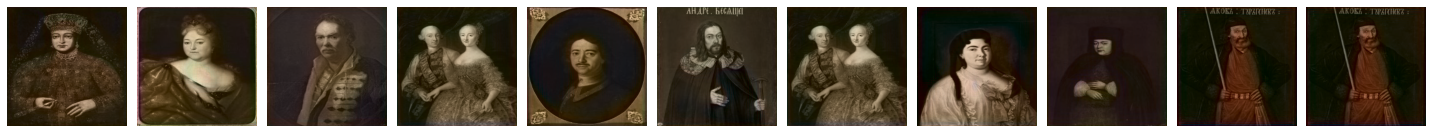

In [ ]:
plt.figure(figsize=(20, 6))
for i in range(11):
    # grayscale
    plt.subplot(1, 11, i + 1)
    plt.imshow(pred_imgs[i])
    plt.gray()
    plt.axis('off')
 
''' 
   # recolorization
    plt.subplot(3, 16, i + 1 +16)
    plt.imshow(decoded_imgs[i].reshape(256, 256,3))
    plt.axis('off')
    
    # original
    plt.subplot(3, 16, i + 1 + 32)
    plt.imshow(X_test[i].reshape(256, 256,3))
    plt.axis('off')
'''
plt.tight_layout()
plt.show()

# Creating Video

In [ ]:
class CustomDataset_test(Dataset):
    def __init__(self, frames, process_type):
        #self.root_dir = root_dir
        #self.files = [f for f in os.listdir(root_dir)]
        self.files = frames
        self.process_type = process_type
        print('File[0]:',self.files[0],'| Total Files:', len(self.files), '| Process:',self.process_type,)

    def __len__(self):
        return (len(self.files))

    def __getitem__(self, index):
             #*** Read the image from file ***
            print(index)
            self.img = np.array(self.files[index])
            self.img = self.img.astype(np.float32) 
            self.img /= 255.0 
            
            self.encoder_img = cv2.resize(self.img, (224, 224))
            self.inception_img = cv2.resize(self.img, (300, 300))

            l_encoder_img = self.encoder_img/50.0 - 1.0
            l_encoder_img = torchvision.transforms.ToTensor()(l_encoder_img)
            l_encoder_img = l_encoder_img.expand(3,-1,-1)
            l_inception_img = self.inception_img/50.0 - 1.0
            l_inception_img = torchvision.transforms.ToTensor()(l_inception_img)
            l_inception_img = l_inception_img.expand(3,-1,-1)         
            return l_encoder_img, l_inception_img
        

    def show_rgb(self, index):
        self.__getitem__(index)
        print("RGB image size:", self.rgb_img.shape)        
        cv2.imshow('RGB image',self.rgb_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    def show_lab_encoder(self, index):
        self.__getitem__(index)
        print("Encoder Lab image size:", self.lab_encoder_img.shape)
        cv2.imshow('Encoder Lab image',self.lab_encoder_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    def show_lab_inception(self, index):
        self.__getitem__(index)
        print("Inception Lab image size:", self.lab_inception_img.shape)
        cv2.imshow('Inception Lab image',self.lab_inception_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    def show_other_images(self, index):
        a,b,c,d,_ = self.__getitem__(index)
        print("Encoder l channel image size:",a.shape)
        cv2.imshow('Encoder l channel image',a.detach().numpy().transpose(1,2,0))
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Encoder ab channel image size:",b.shape)
        cv2.imshow('Encoder a channel image',b.detach().numpy().transpose(1,2,0)[:,:,0])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.imshow('Encoder b channel image',b.detach().numpy().transpose(1,2,0)[:,:,1])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Inception l channel image size:",c.shape)
        cv2.imshow('Inception l channel image',c.detach().numpy().transpose(1,2,0))
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Color resized image size:",d.shape)
        cv2.imshow('Color resized image',d.detach().numpy().transpose(1,2,0))
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [ ]:
def concatente_and_colorize(im_lab, img_ab):
    # Assumption is that im_lab is of size [1,3,224,224]
    #print(im_lab.size(),img_ab.size())
    np_img = im_lab[0].detach().numpy().transpose(1,2,0)
    lab = np.empty([*np_img.shape[0:2], 3],dtype=np.float32)
    lab[:, :, 0] = np.squeeze(((np_img + 1) * 50))
    lab[:, :, 1:] = img_ab[0].cpu().detach().numpy().transpose(1,2,0) * 127
    np_img = cv2.cvtColor(lab,cv2.COLOR_Lab2RGB) 
    color_im = torch.stack([torchvision.transforms.ToTensor()(np_img)],dim=0)
    return color_im

In [ ]:
def make_video_color(frames):
  test_dataset = CustomDataset_test(frames,'test')
  test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=0)
  print('Test: ',len(test_dataloader), '| Total Image:',len(test_dataloader))
  out_frame = []
  for idx,(img_l_encoder,img_l_inception) in enumerate(test_dataloader):
        #*** Skip bad data ***
        if not img_l_encoder.ndim:
            continue
            
        #*** Intialize Model to Eval Mode ***
        model.eval()
        
        #*** Forward Propagation ***
        img_embs = inception_model(img_l_inception.float())
        output_ab = model(img_l_encoder,img_embs)
        
        np_out = output_ab[0].detach().numpy().transpose(1,2,0)
        print(np_out.shape)
       
        #*** Adding l channel to ab channels ***
        color_img = concatente_and_colorize(torch.stack([img_l_encoder[:,0,:,:]],dim=1),output_ab)
        color_img_jpg = color_img[0].detach().numpy().transpose(1,2,0)
        color_img_jpg = cv2.resize(color_img_jpg, (1280, 720))
        out_frame.append(color_img_jpg)
  return out_frame
  '''
  w,h = frame.shape[0],frame.shape[1]
  model.eval()

  encoder_img = cv2.resize(frame, (224, 224))
  inception_img = cv2.resize(frame, (300, 300))
  l_encoder_img = encoder_img/50.0 - 1.0
  l_encoder_img = torchvision.transforms.ToTensor()(l_encoder_img)
  l_encoder_img = l_encoder_img.expand(3,-1,-1)
  l_inception_img = inception_img/50.0 - 1.0
  l_inception_img = torchvision.transforms.ToTensor()(l_inception_img)
  l_inception_img = l_inception_img.expand(3,-1,-1)
  
  l_inception_img = torch.unsqueeze(l_inception_img,0) 
  img_embs = inception_model(l_inception_img.float())
  output_ab = model(l_encoder_img,img_embs)
  np_out = output_ab[0].detach().numpy().transpose(1,2,0)
  print(np_out.shape)
  color_img = concatente_and_colorize(torch.stack([l_encoder_img[:,0,:,:]],dim=1),output_ab)
  color_img_jpg = color_img[0].detach().numpy().transpose(1,2,0)
  
  decoded_imgs = resize(color_img_jpg, (w, h), mode='constant', preserve_range=True)
  return decoded_imgs
'''    


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


cap = cv2.VideoCapture('/content/drive/My Drive/AIP/Video_output.avi')

ret, frame = cap.read()
print('ret =', ret, 'W =', frame.shape[1], 'H =', frame.shape[0], 'channel =', frame.shape[2])



frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    
    #print(frame.shape)
    # check for successfulness of cap.read()
    if not ret: break
    frames.append(frame[:,:,0])
  
    if cv2.waitKey(1) & 0xFF == ord('q'):
         break
cap.release()     

'''
    colorized = make_video_color(frame)
    #print((frame.dtype))
    #print(frame.shape)
    # Save the video
    frame = (colorized - np.min(colorized))/(np.max(colorized) - np.min(colorized)) # this set the range from 0 till 1
    frame = img_as_ubyte(frame*255)
    out.write((frame))
'''


ret = True W = 1280 H = 720 channel = 3


'\n    colorized = make_video_color(frame)\n    #print((frame.dtype))\n    #print(frame.shape)\n    # Save the video\n    frame = (colorized - np.min(colorized))/(np.max(colorized) - np.min(colorized)) # this set the range from 0 till 1\n    frame = img_as_ubyte(frame*255)\n    out.write((frame))\n'

In [ ]:
print(frames[0])

[[45 46 48 ... 77 77 77]
 [45 46 48 ... 77 77 77]
 [45 46 48 ... 77 77 77]
 ...
 [83 85 88 ... 52 54 54]
 [82 84 87 ... 45 47 48]
 [82 84 87 ... 43 44 45]]


In [ ]:
colorized_frames = make_video_color(frames)

File[0]: [[45 46 48 ... 77 77 77]
 [45 46 48 ... 77 77 77]
 [45 46 48 ... 77 77 77]
 ...
 [83 85 88 ... 52 54 54]
 [82 84 87 ... 45 47 48]
 [82 84 87 ... 43 44 45]] | Total Files: 639 | Process: test
Test:  639 | Total Image: 639
0
(224, 224, 2)
1
(224, 224, 2)
2
(224, 224, 2)
3
(224, 224, 2)
4
(224, 224, 2)
5
(224, 224, 2)
6
(224, 224, 2)
7
(224, 224, 2)
8
(224, 224, 2)
9
(224, 224, 2)
10
(224, 224, 2)
11
(224, 224, 2)
12
(224, 224, 2)
13
(224, 224, 2)
14
(224, 224, 2)
15
(224, 224, 2)
16
(224, 224, 2)
17
(224, 224, 2)
18
(224, 224, 2)
19
(224, 224, 2)
20
(224, 224, 2)
21
(224, 224, 2)
22
(224, 224, 2)
23
(224, 224, 2)
24
(224, 224, 2)
25
(224, 224, 2)
26
(224, 224, 2)
27
(224, 224, 2)
28
(224, 224, 2)
29
(224, 224, 2)
30
(224, 224, 2)
31
(224, 224, 2)
32
(224, 224, 2)
33
(224, 224, 2)
34
(224, 224, 2)
35
(224, 224, 2)
36
(224, 224, 2)
37
(224, 224, 2)
38
(224, 224, 2)
39
(224, 224, 2)
40
(224, 224, 2)
41
(224, 224, 2)
42
(224, 224, 2)
43
(224, 224, 2)
44
(224, 224, 2)
45
(224, 224, 2

In [ ]:
print(frames[0])

[[[45 45 45]
  [46 46 46]
  [48 48 48]
  ...
  [77 77 77]
  [77 77 77]
  [77 77 77]]

 [[45 45 45]
  [46 46 46]
  [48 48 48]
  ...
  [77 77 77]
  [77 77 77]
  [77 77 77]]

 [[45 45 45]
  [46 46 46]
  [48 48 48]
  ...
  [77 77 77]
  [77 77 77]
  [77 77 77]]

 ...

 [[83 83 83]
  [85 85 85]
  [88 88 88]
  ...
  [52 52 52]
  [54 54 54]
  [54 54 54]]

 [[82 82 82]
  [84 84 84]
  [87 87 87]
  ...
  [45 45 45]
  [47 47 47]
  [48 48 48]]

 [[82 82 82]
  [84 84 84]
  [87 87 87]
  ...
  [43 43 43]
  [44 44 44]
  [45 45 45]]]


In [ ]:
print(i)

[[[0.14723173 0.         0.0405501 ]
  [0.14723173 0.         0.0405501 ]
  [0.14723173 0.         0.0405501 ]
  ...
  [0.05817454 0.00025353 0.        ]
  [0.05817454 0.00025353 0.        ]
  [0.05817454 0.00025353 0.        ]]

 [[0.14723173 0.         0.0405501 ]
  [0.14723173 0.         0.0405501 ]
  [0.14723173 0.         0.0405501 ]
  ...
  [0.05817454 0.00025353 0.        ]
  [0.05817454 0.00025353 0.        ]
  [0.05817454 0.00025353 0.        ]]

 [[0.14723173 0.         0.0405501 ]
  [0.14723173 0.         0.0405501 ]
  [0.14723173 0.         0.0405501 ]
  ...
  [0.05817454 0.00025353 0.        ]
  [0.05817454 0.00025353 0.        ]
  [0.05817454 0.00025353 0.        ]]

 ...

 [[0.0887598  0.         0.        ]
  [0.0887598  0.         0.        ]
  [0.0887598  0.         0.        ]
  ...
  [0.         0.01881953 0.        ]
  [0.         0.01881953 0.        ]
  [0.         0.01881953 0.        ]]

 [[0.08872898 0.         0.        ]
  [0.08872898 0.         0.        ]


(720, 1280, 3)


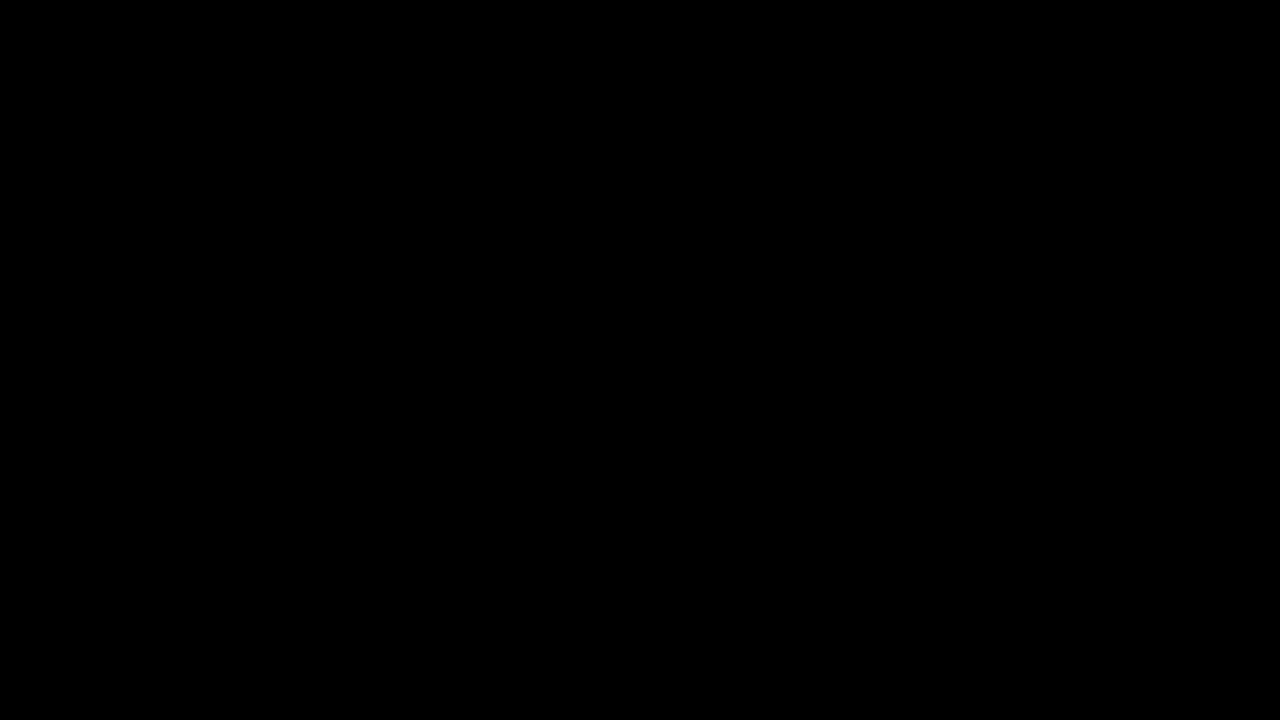

(720, 1280, 3)


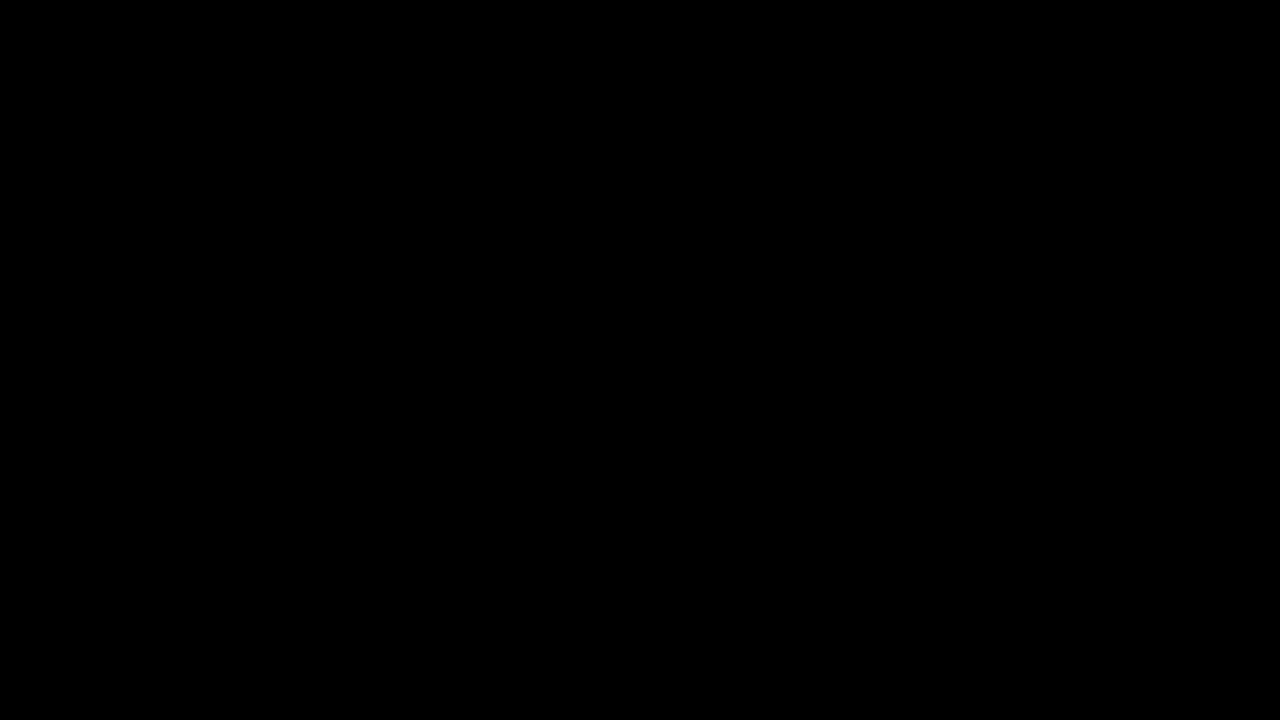

(720, 1280, 3)


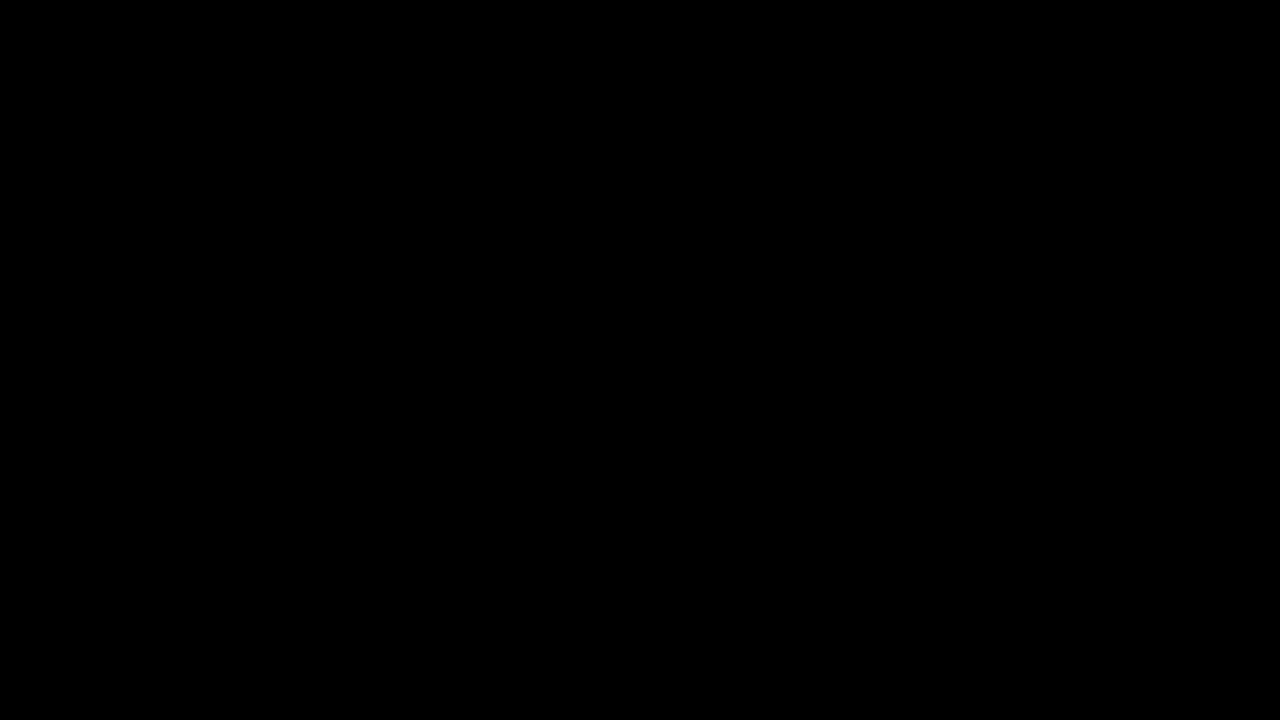

(720, 1280, 3)


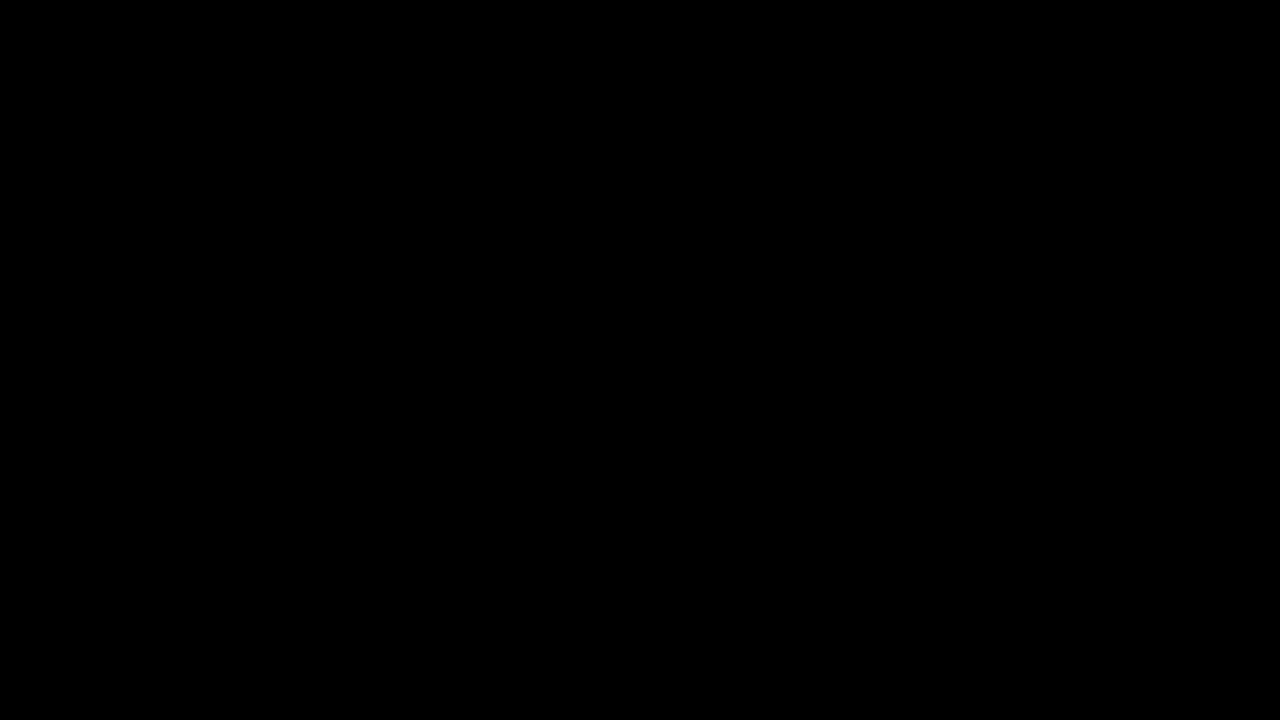

(720, 1280, 3)


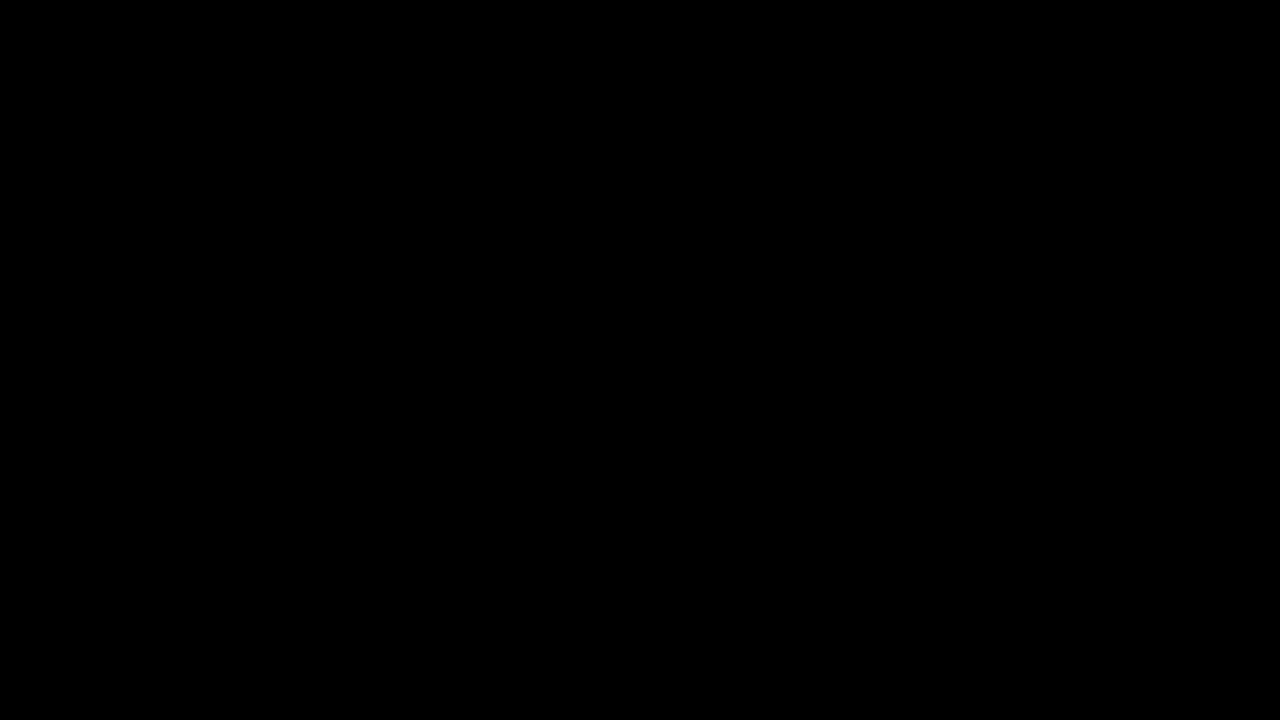

(720, 1280, 3)


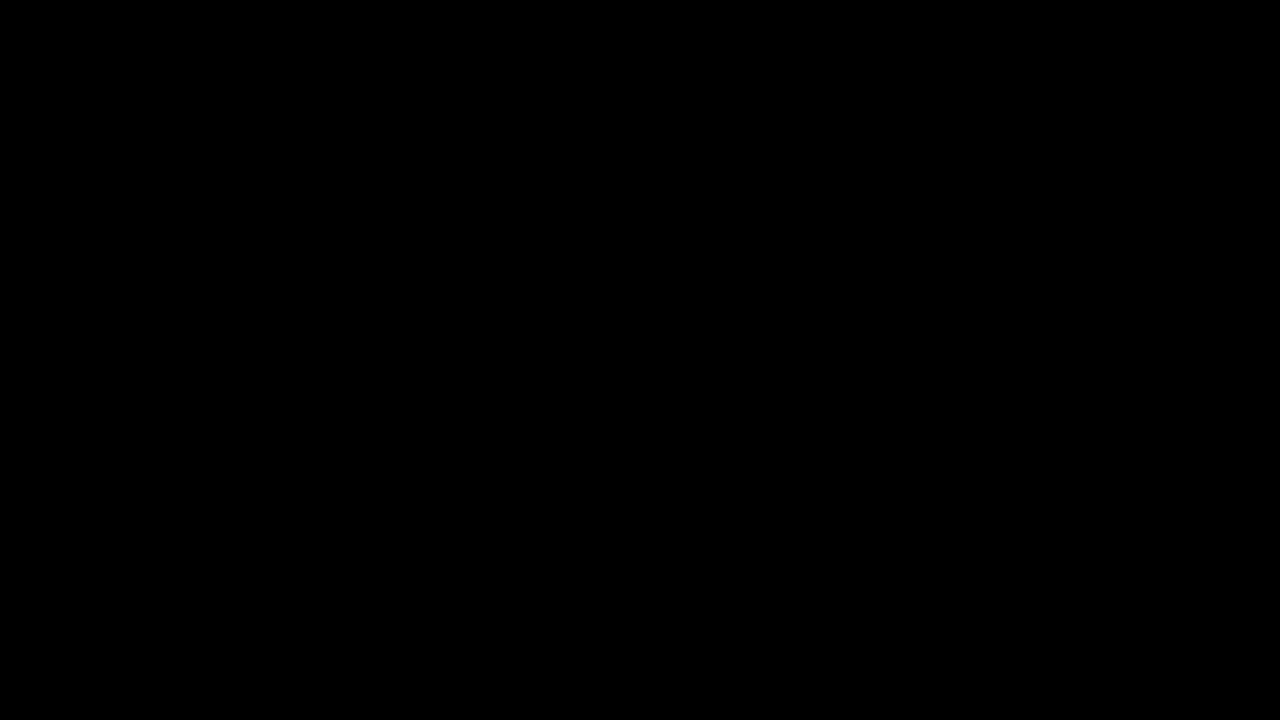

(720, 1280, 3)


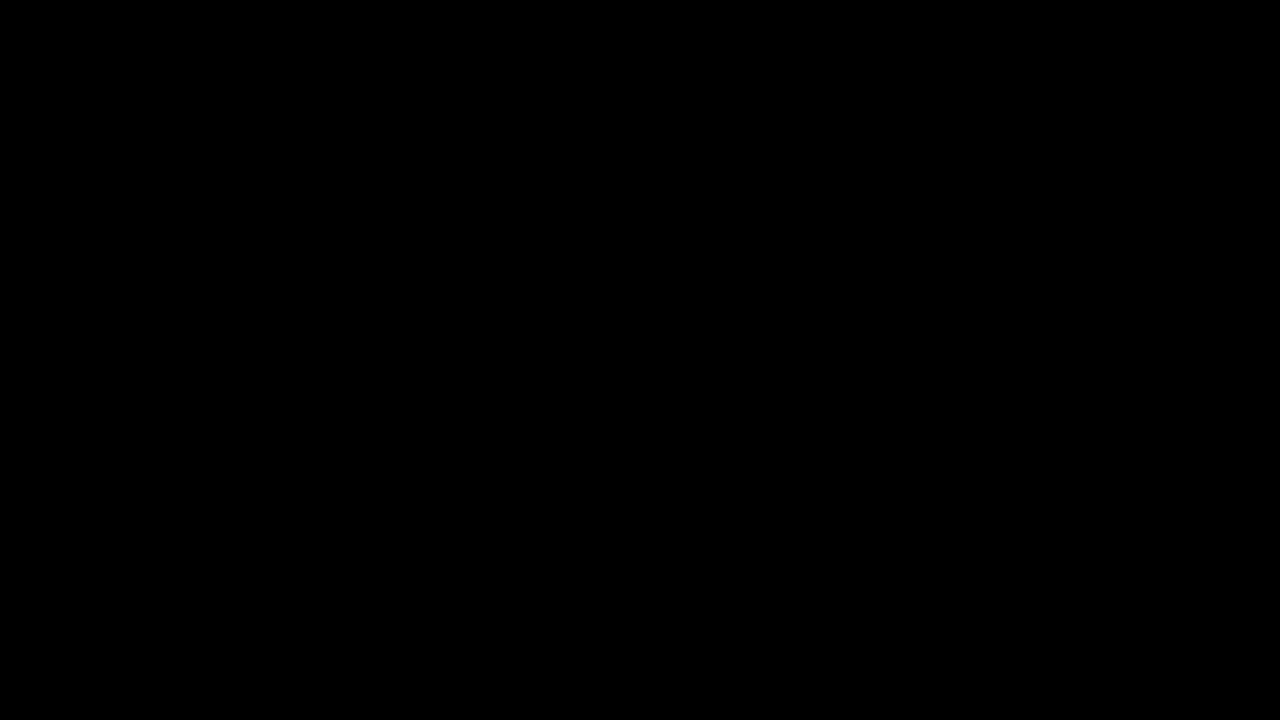

(720, 1280, 3)


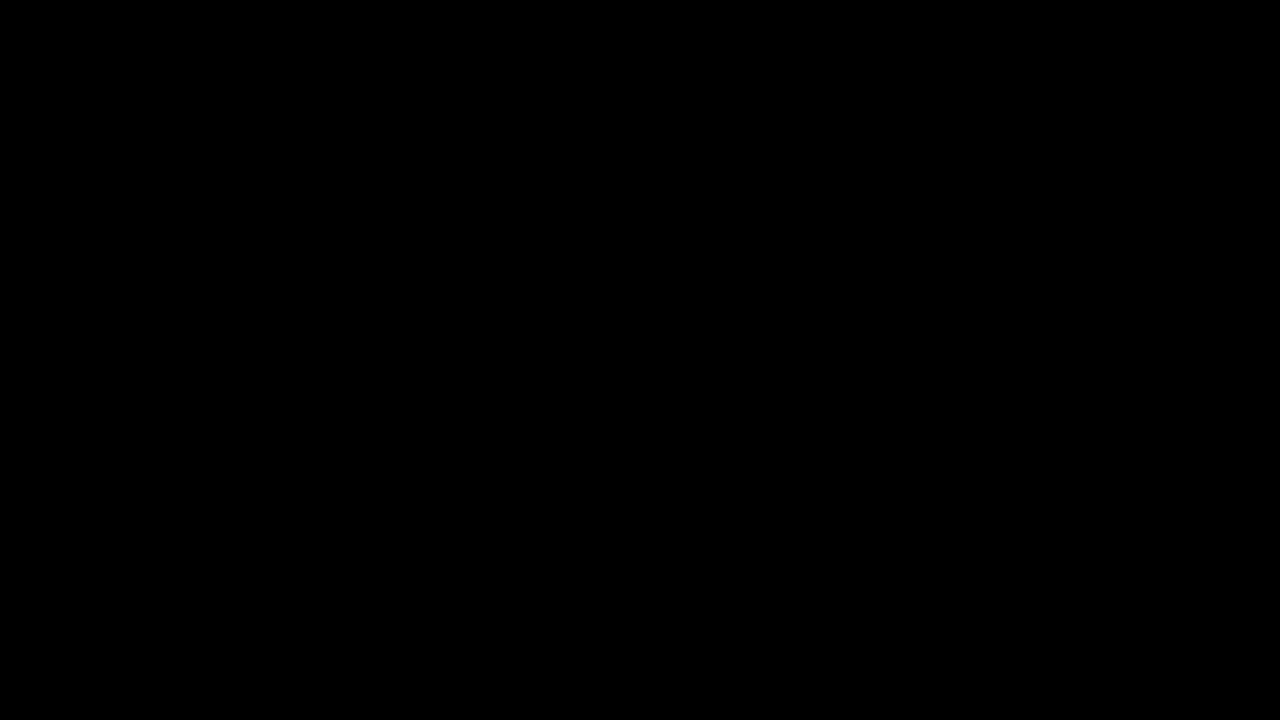

(720, 1280, 3)


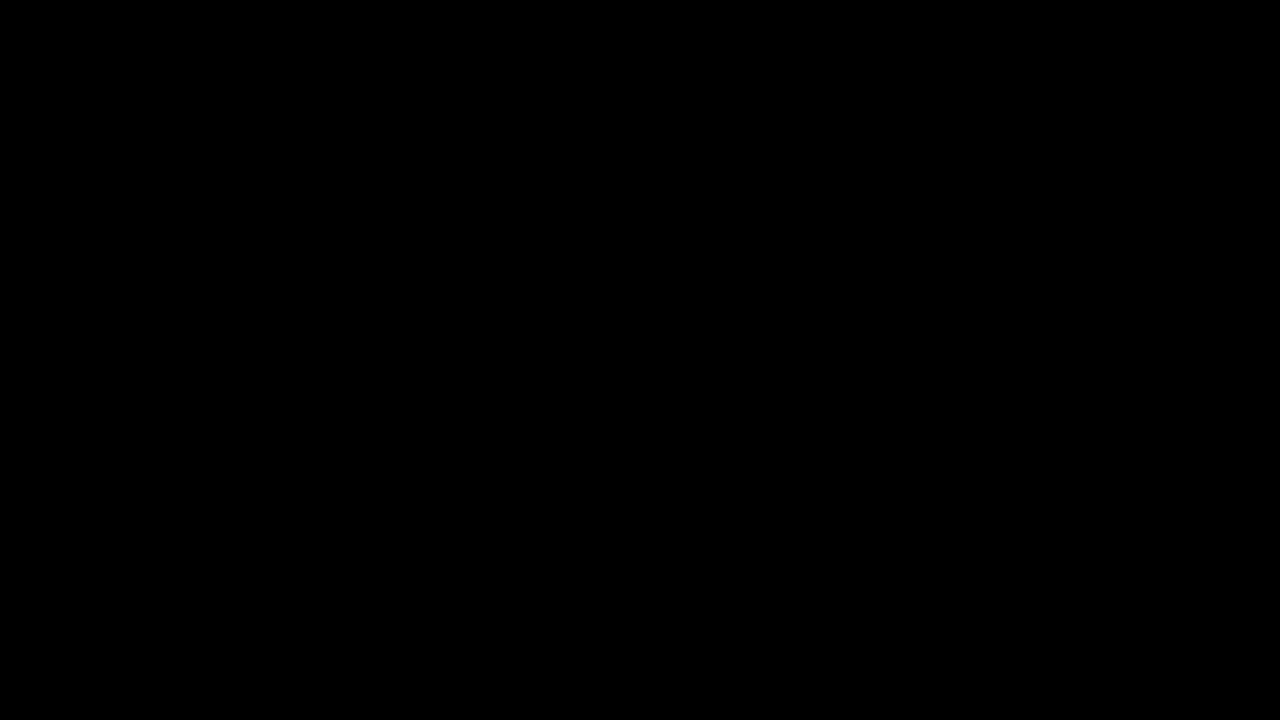

(720, 1280, 3)


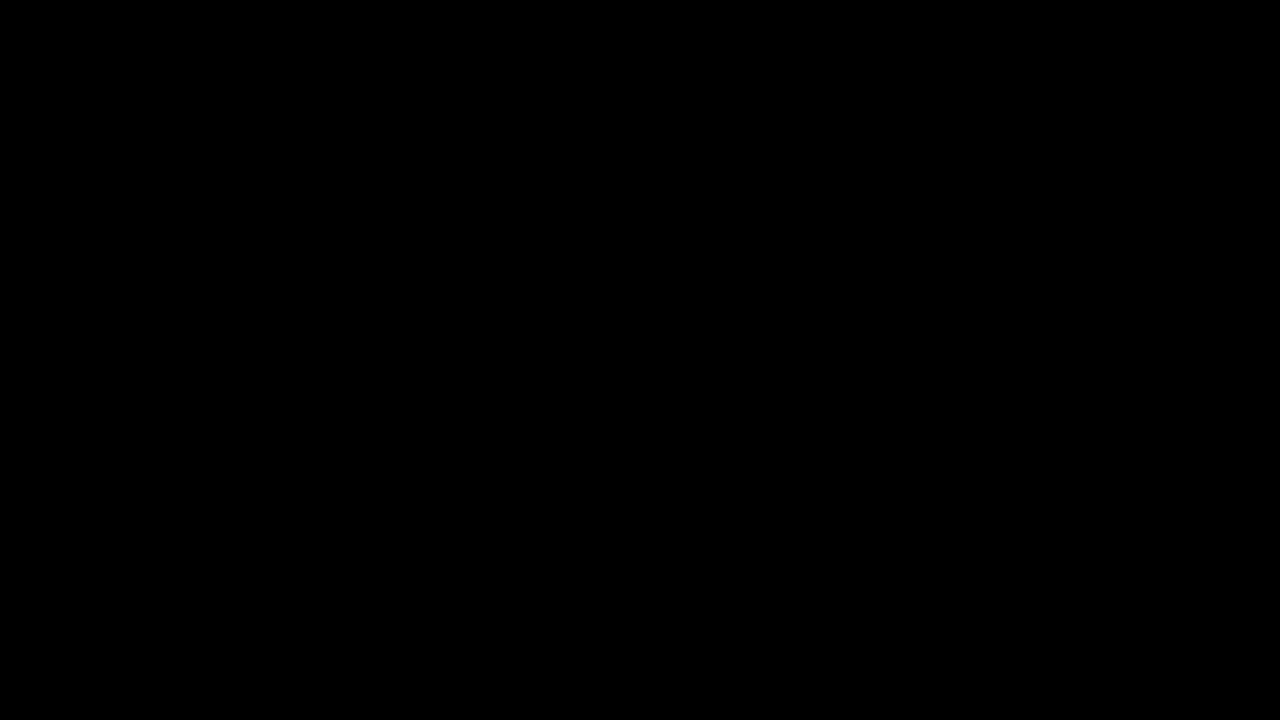

(720, 1280, 3)


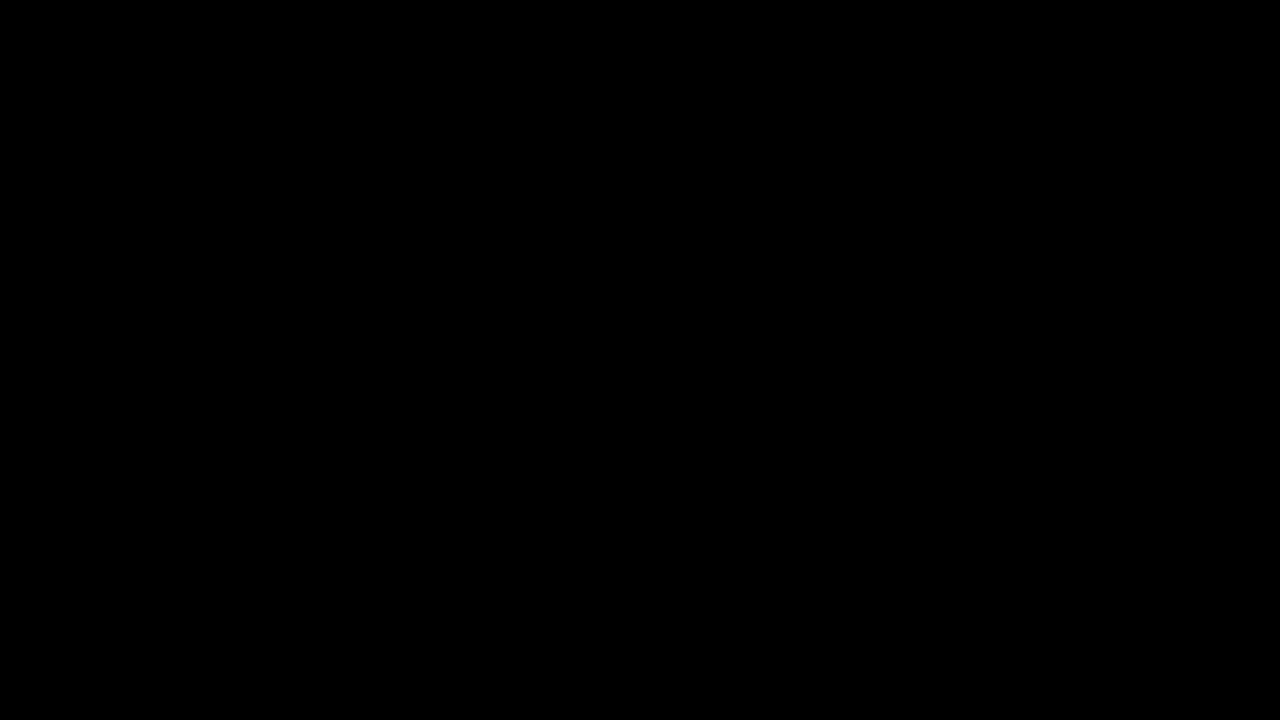

(720, 1280, 3)


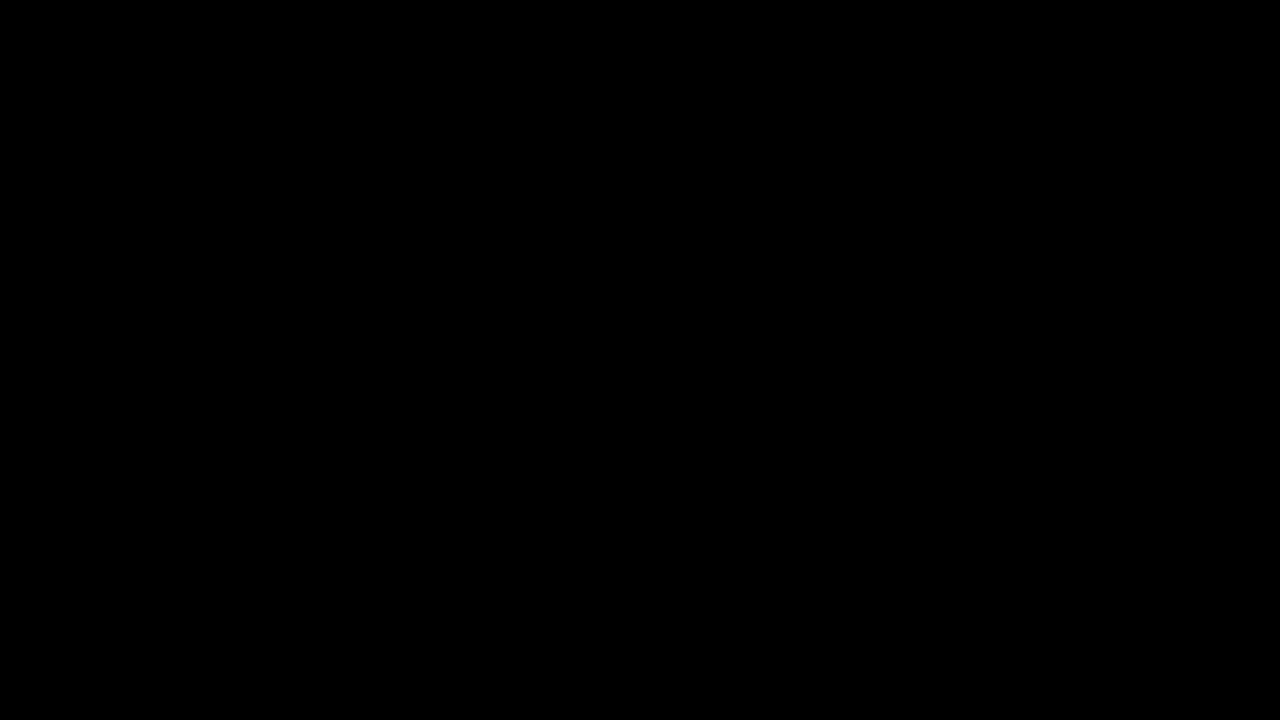

(720, 1280, 3)


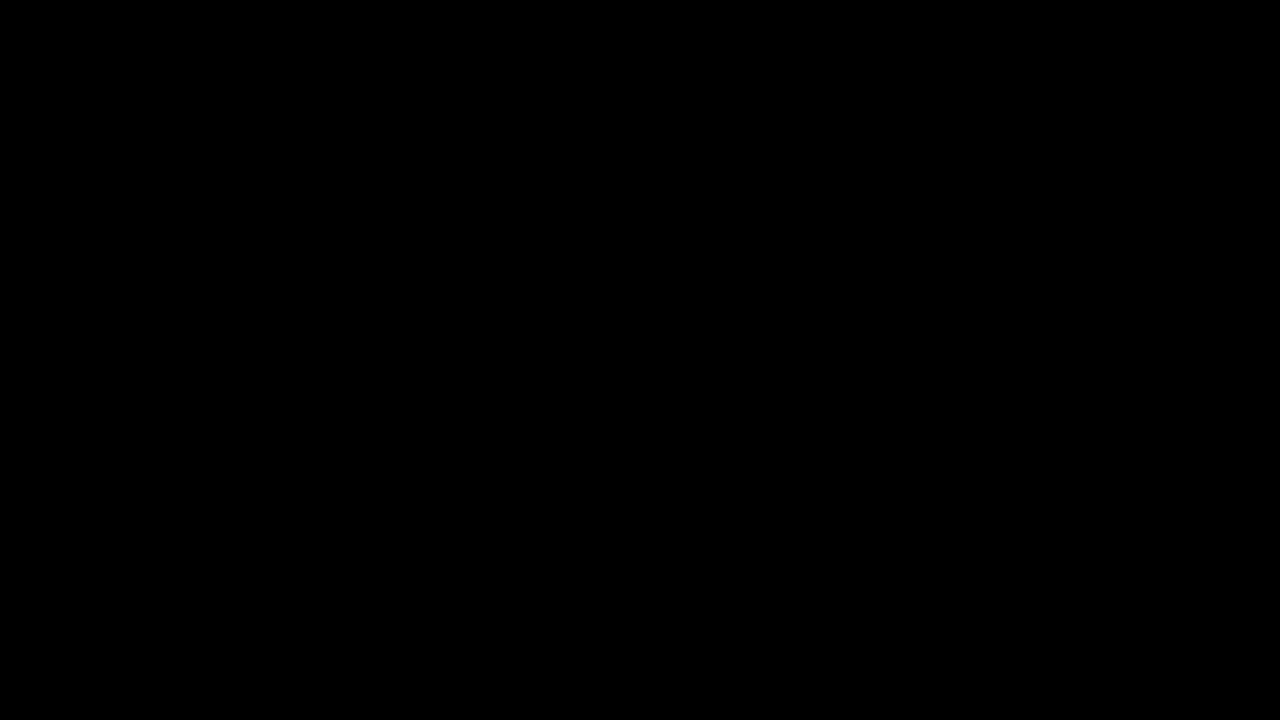

(720, 1280, 3)


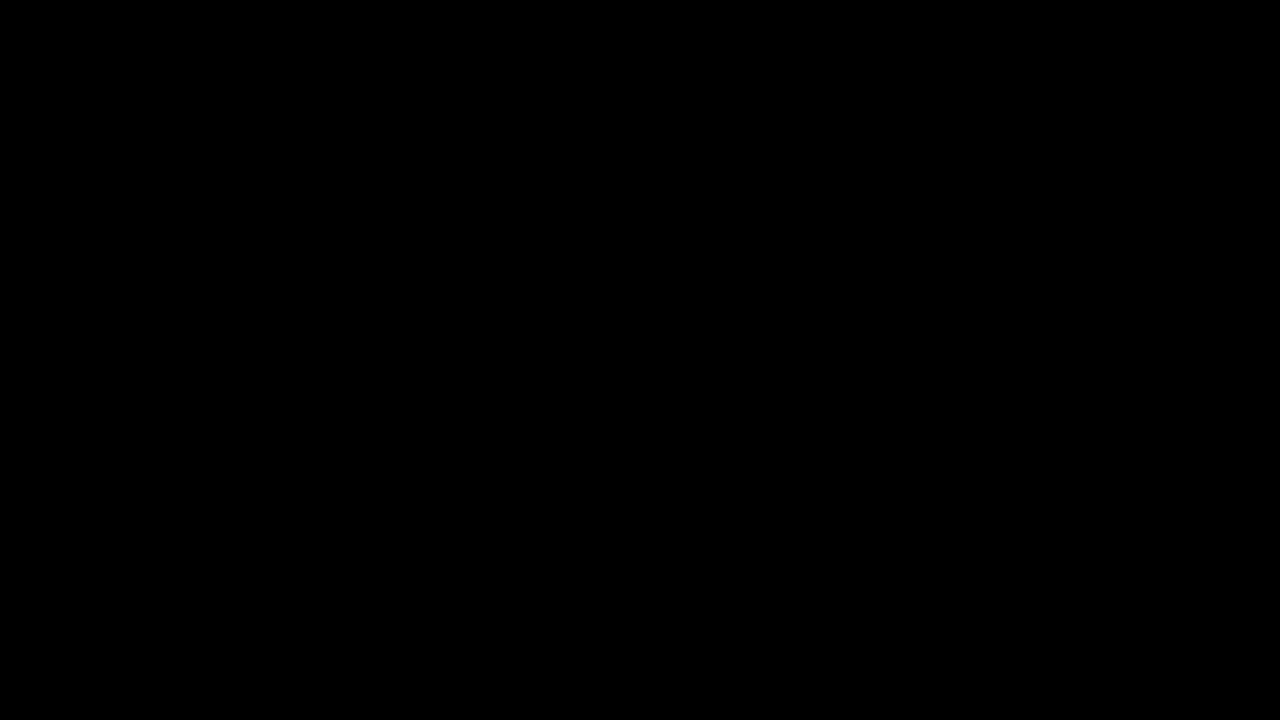

(720, 1280, 3)


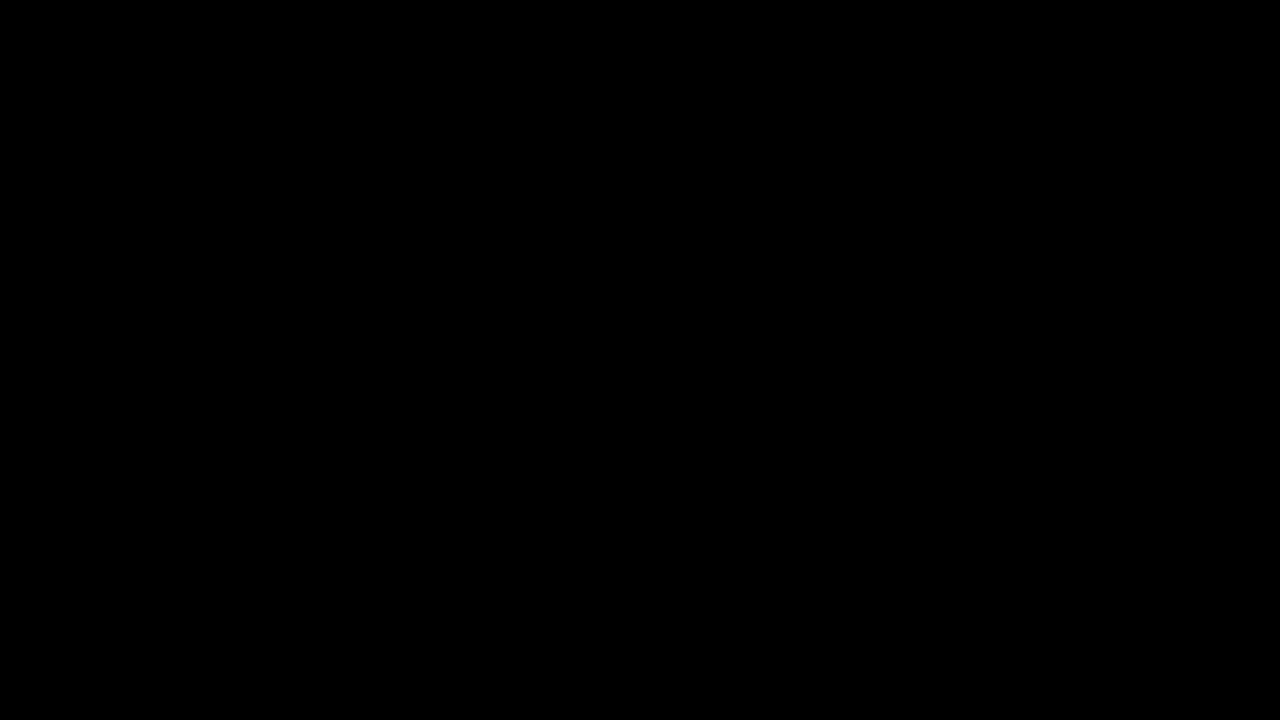

(720, 1280, 3)


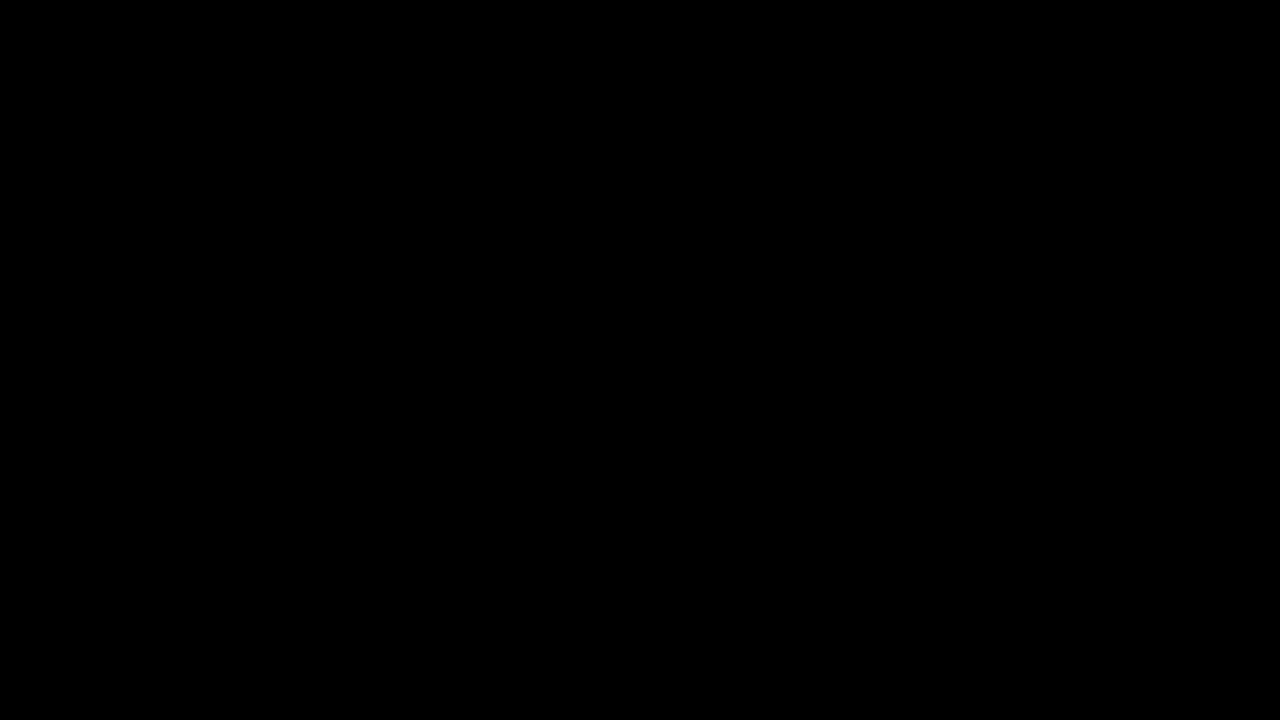

(720, 1280, 3)


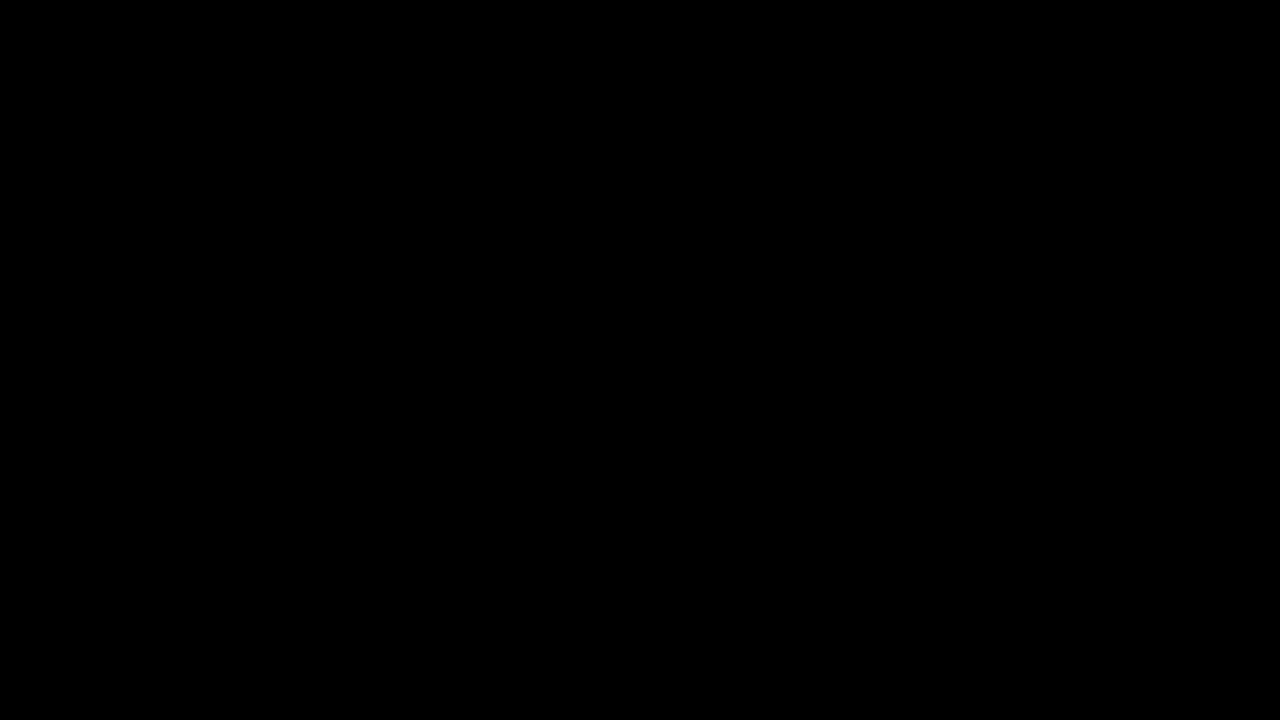

(720, 1280, 3)


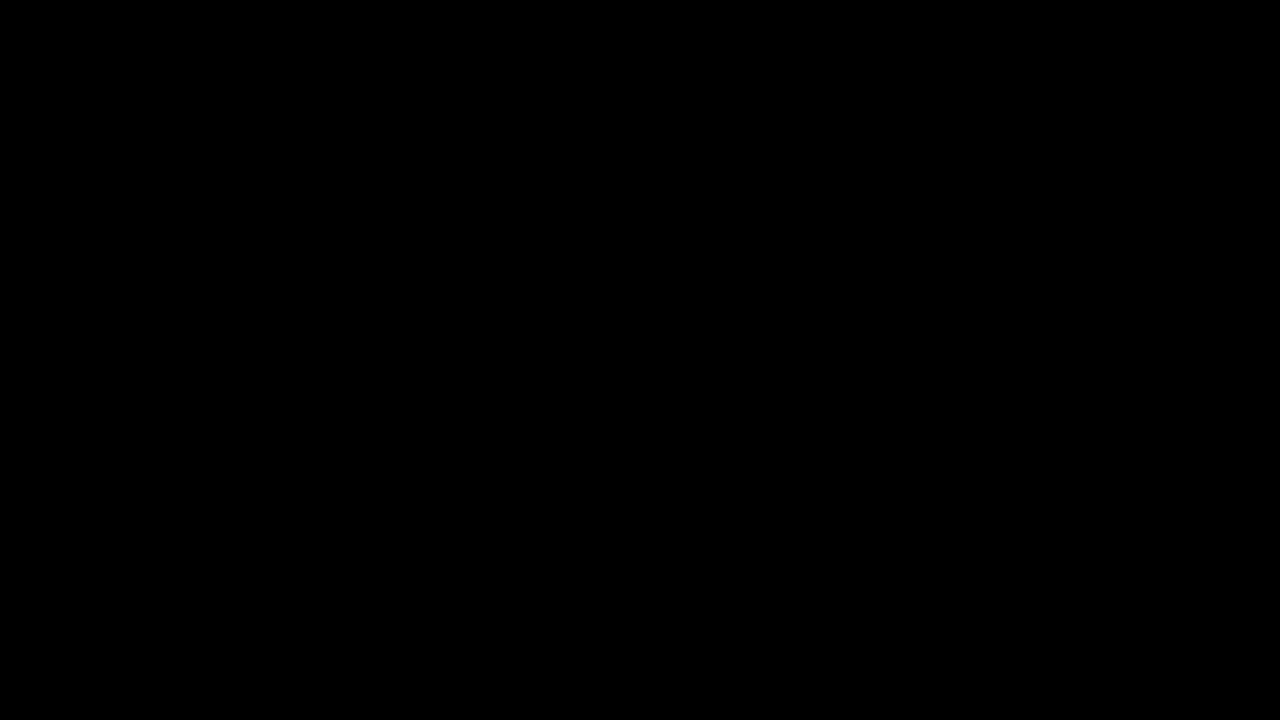

(720, 1280, 3)


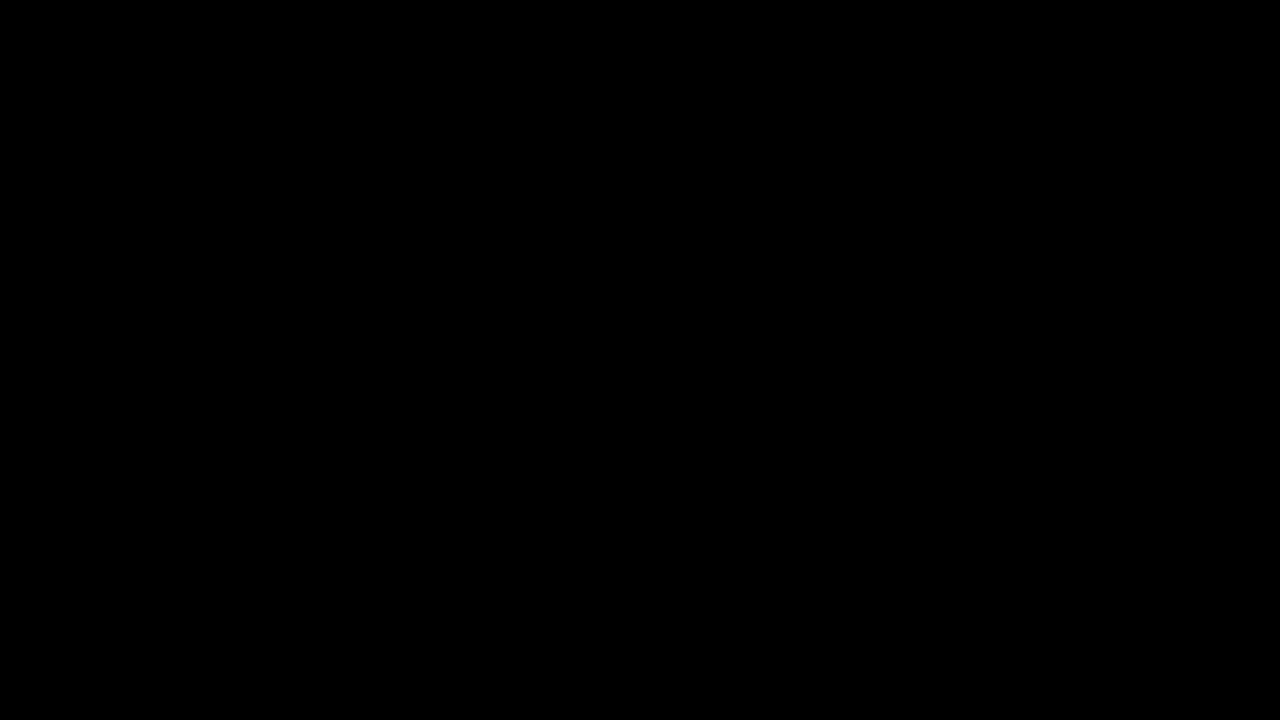

(720, 1280, 3)


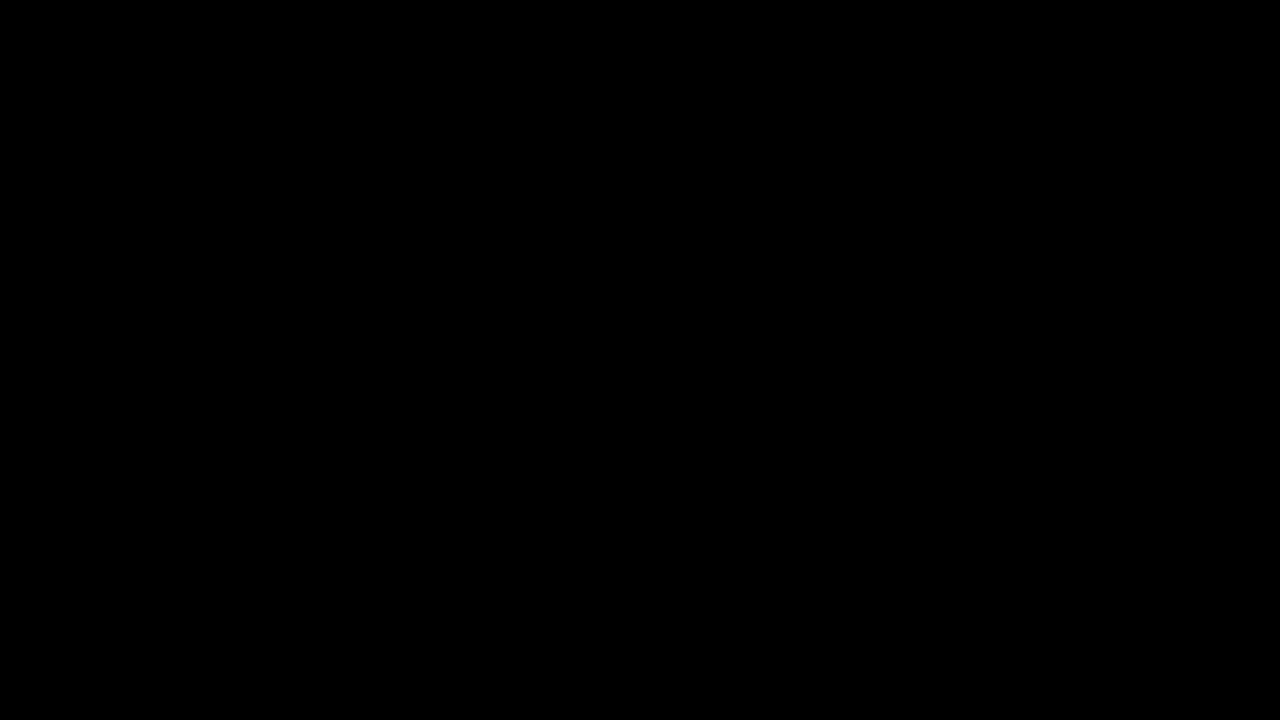

(720, 1280, 3)


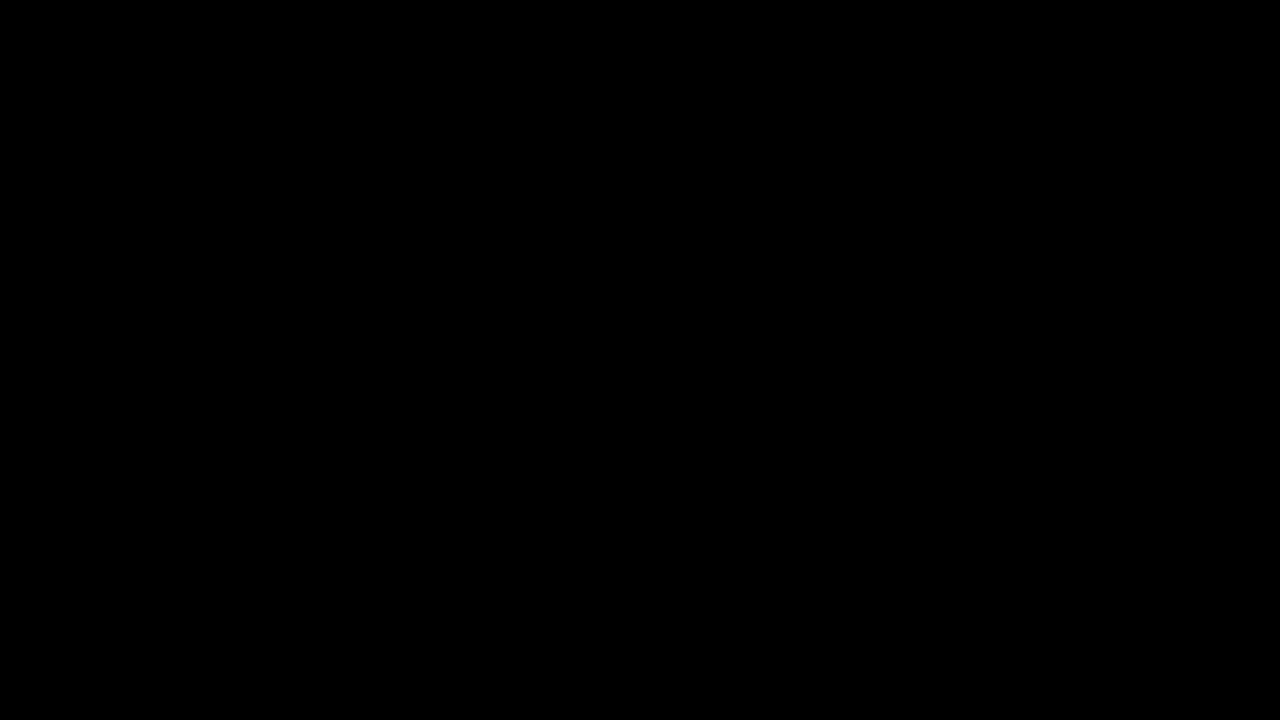

(720, 1280, 3)


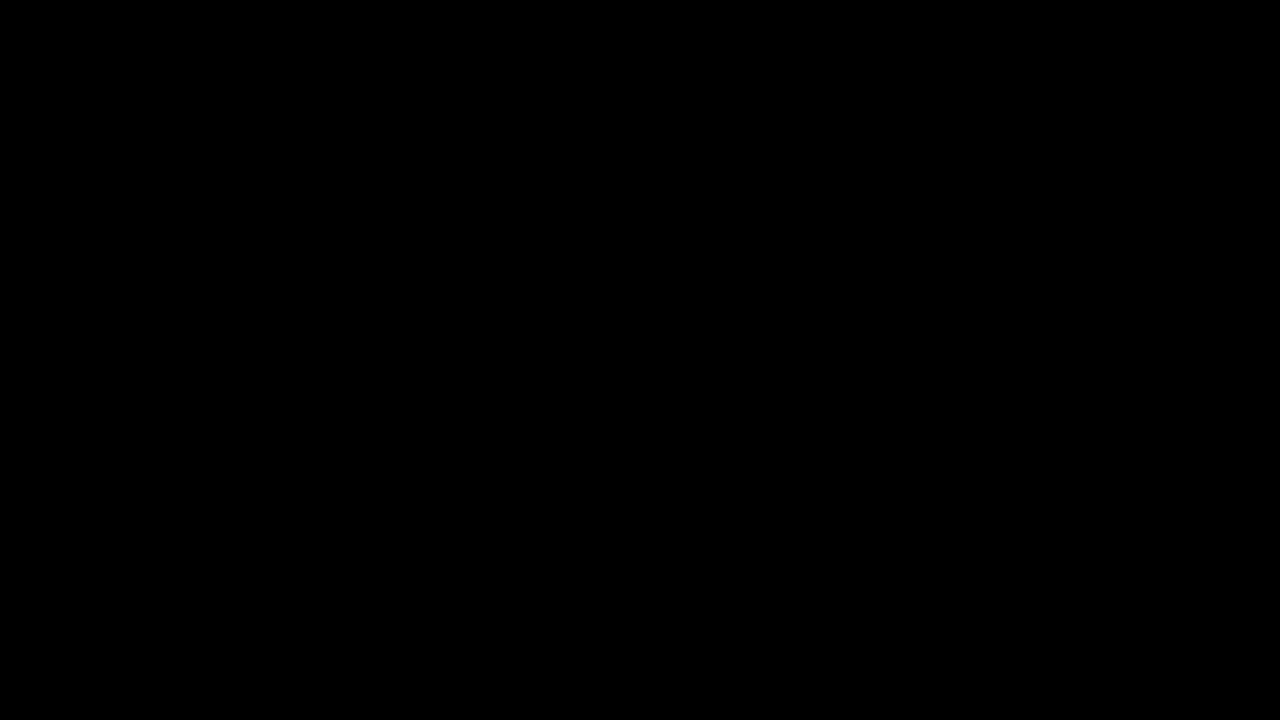

(720, 1280, 3)


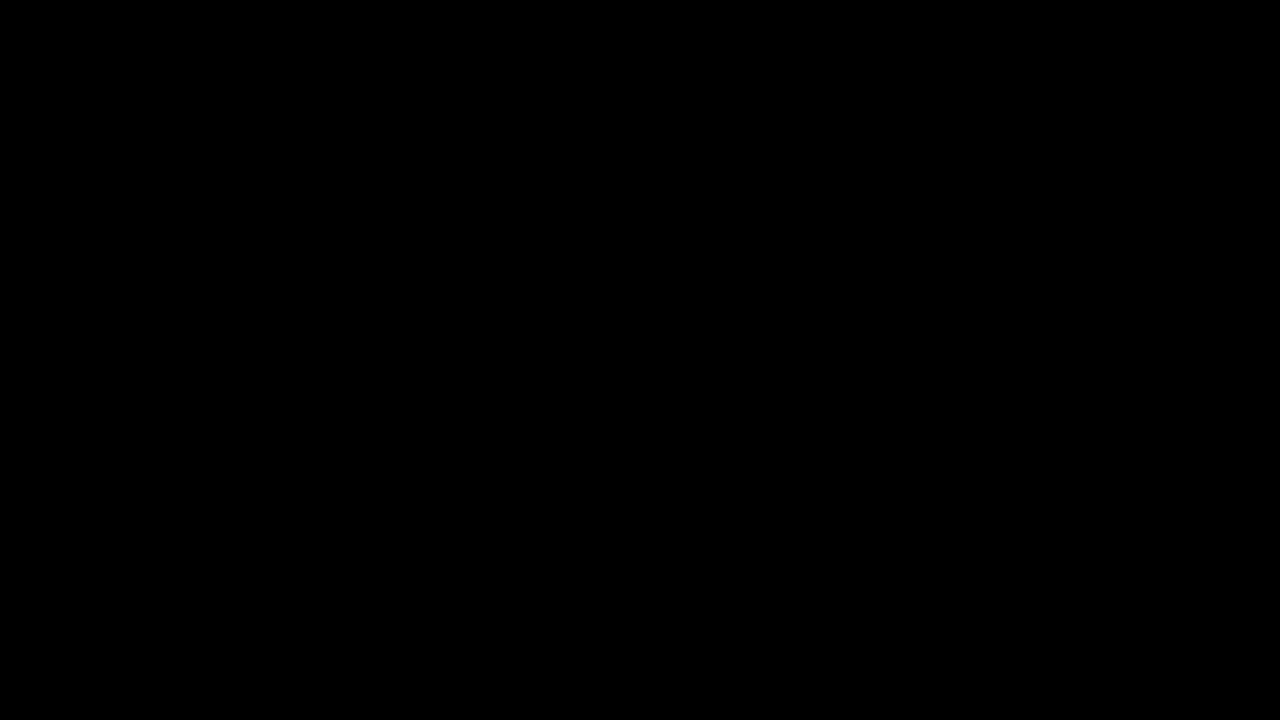

(720, 1280, 3)


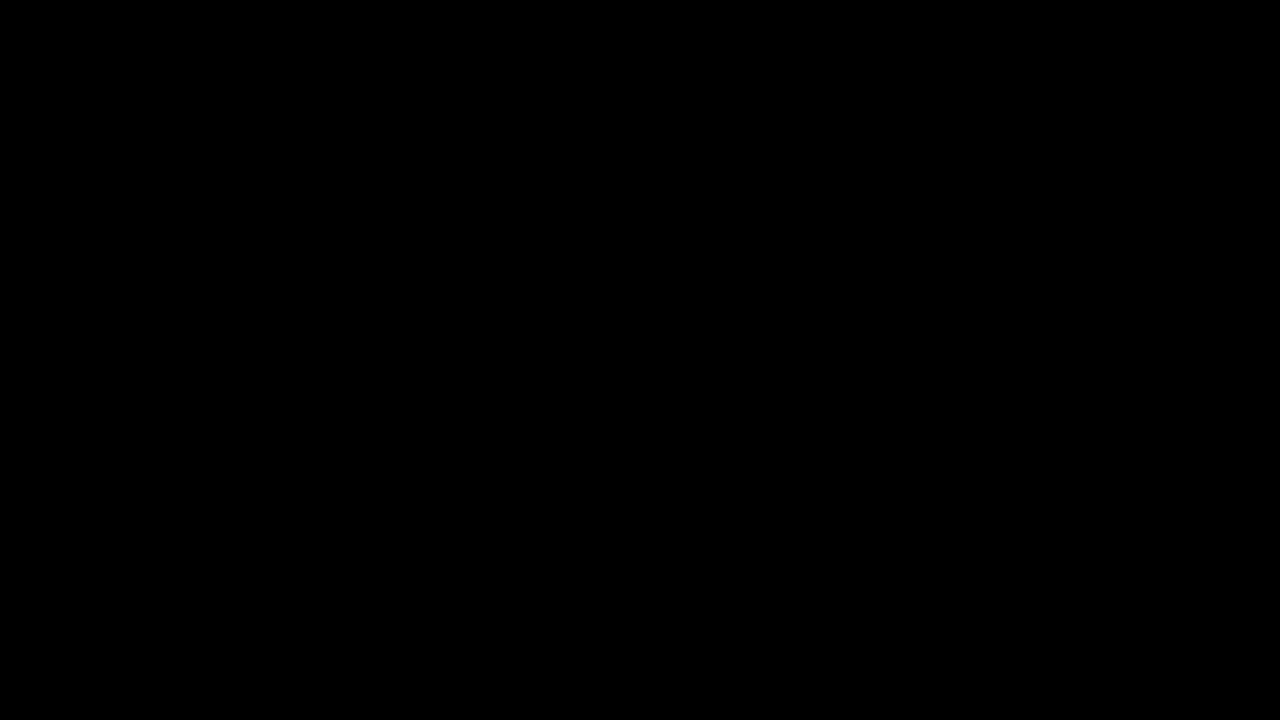

(720, 1280, 3)


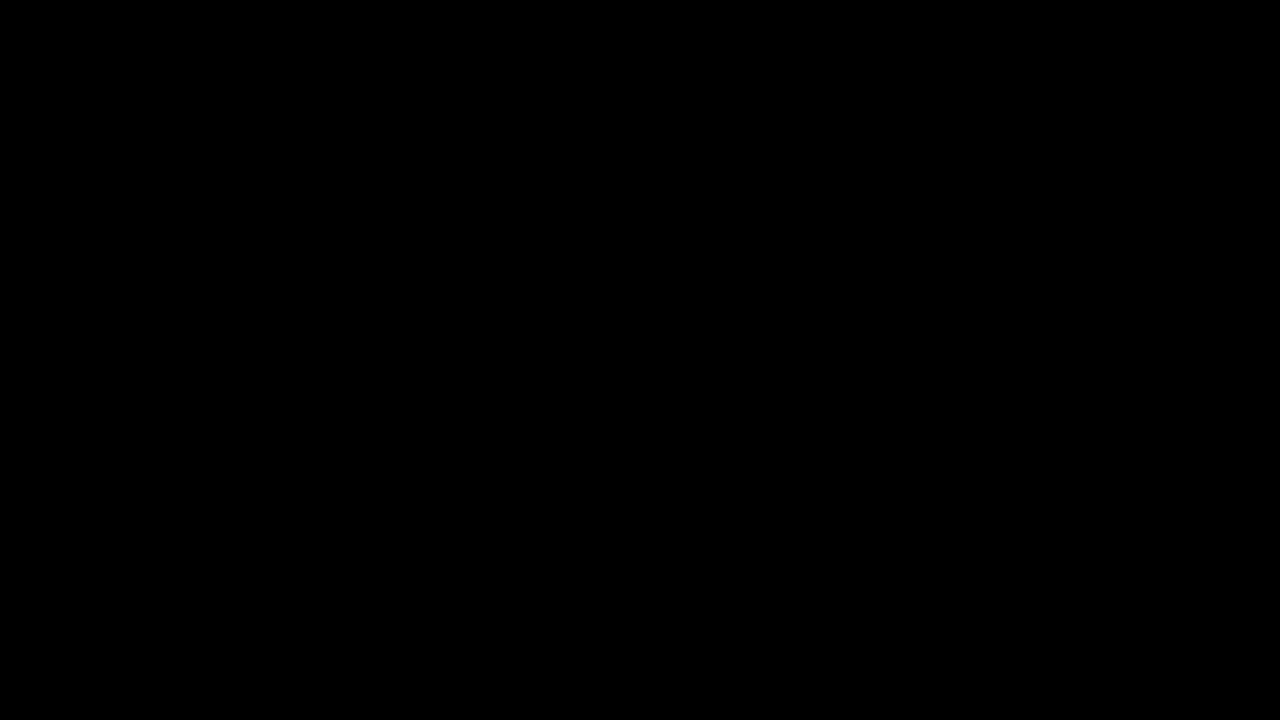

(720, 1280, 3)


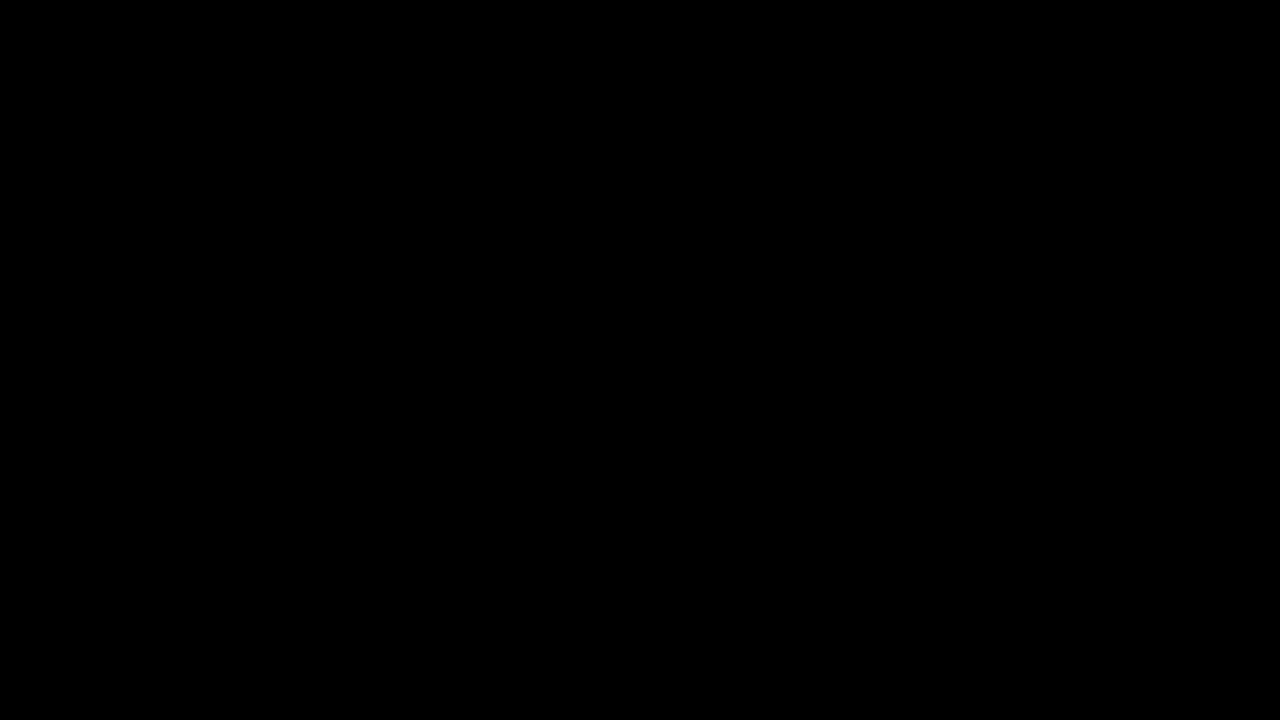

(720, 1280, 3)


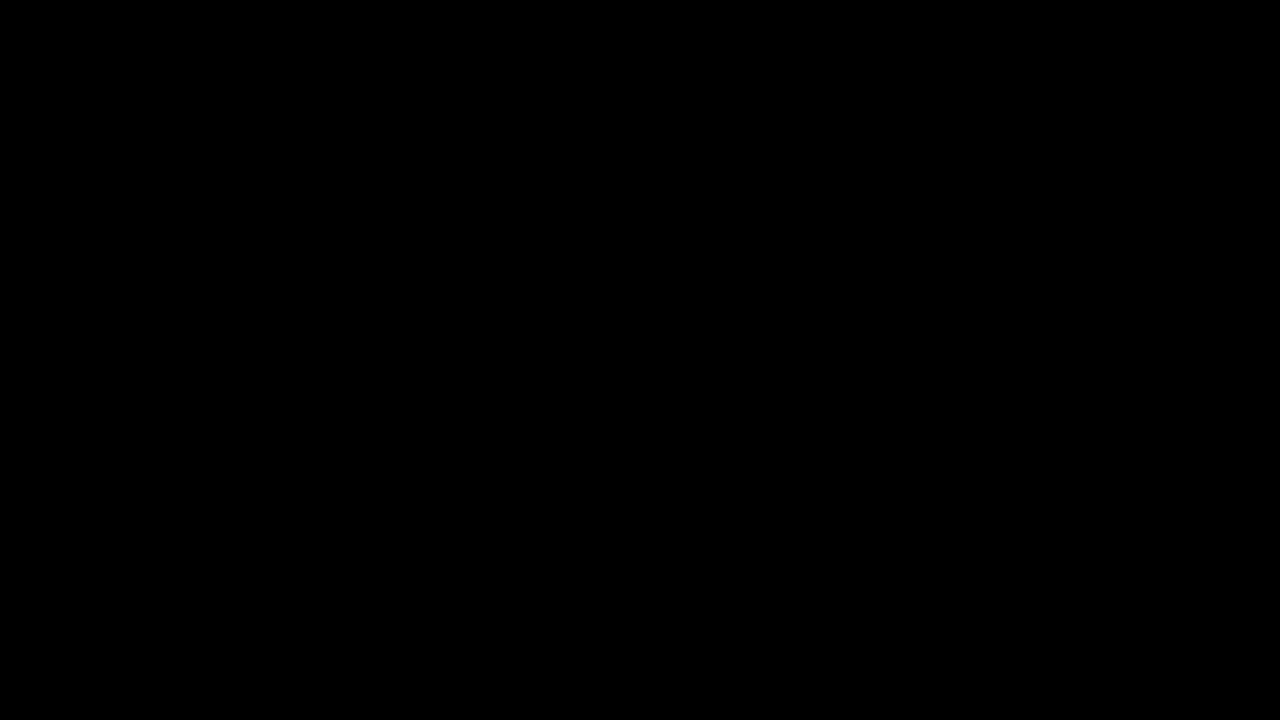

(720, 1280, 3)


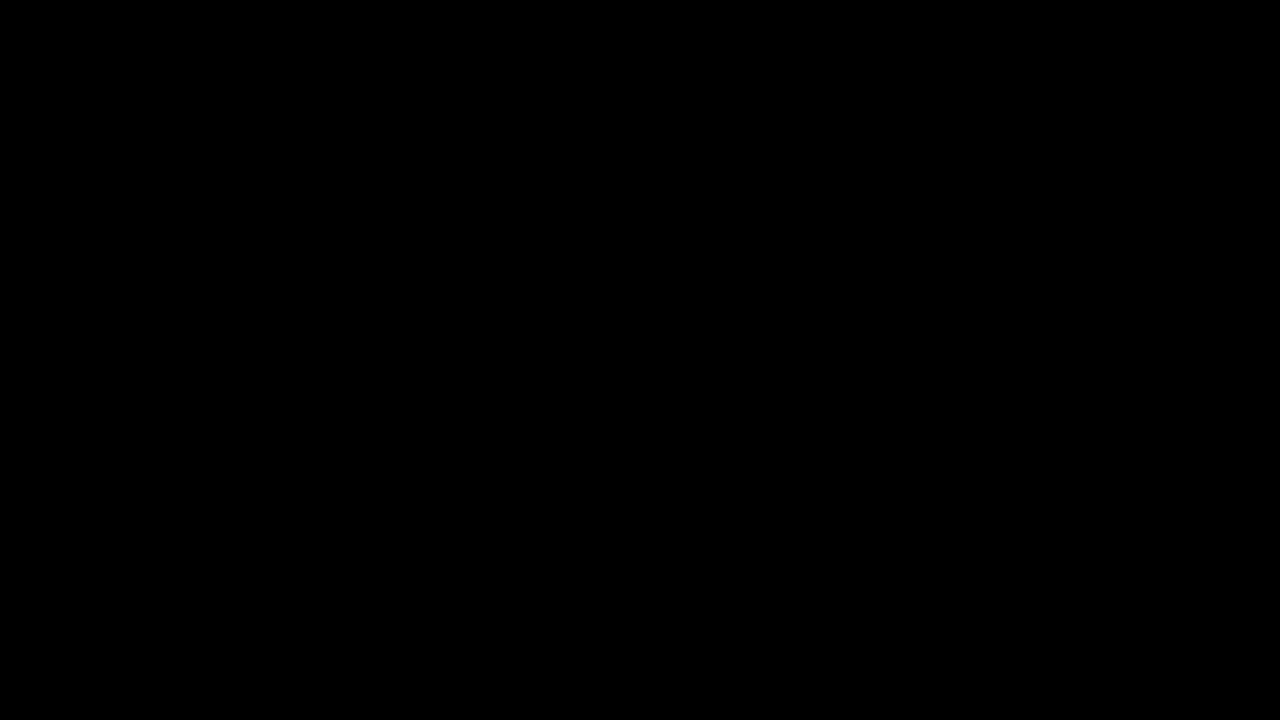

(720, 1280, 3)


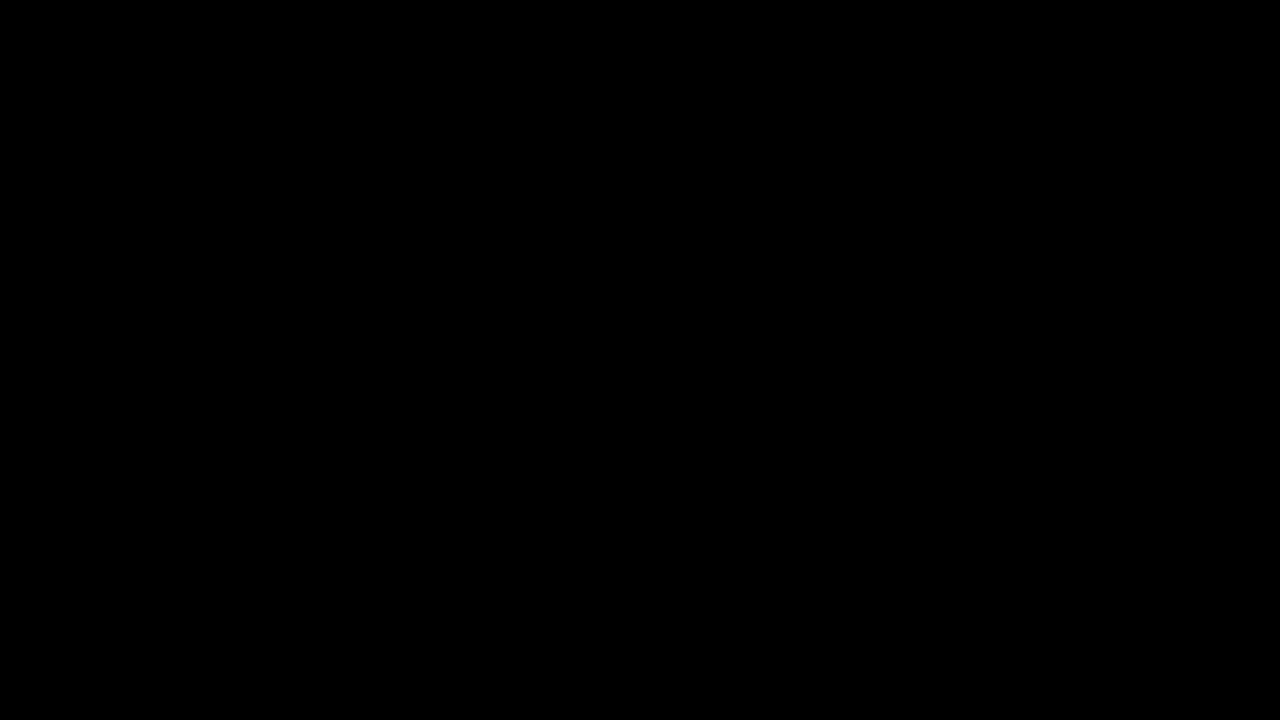

(720, 1280, 3)


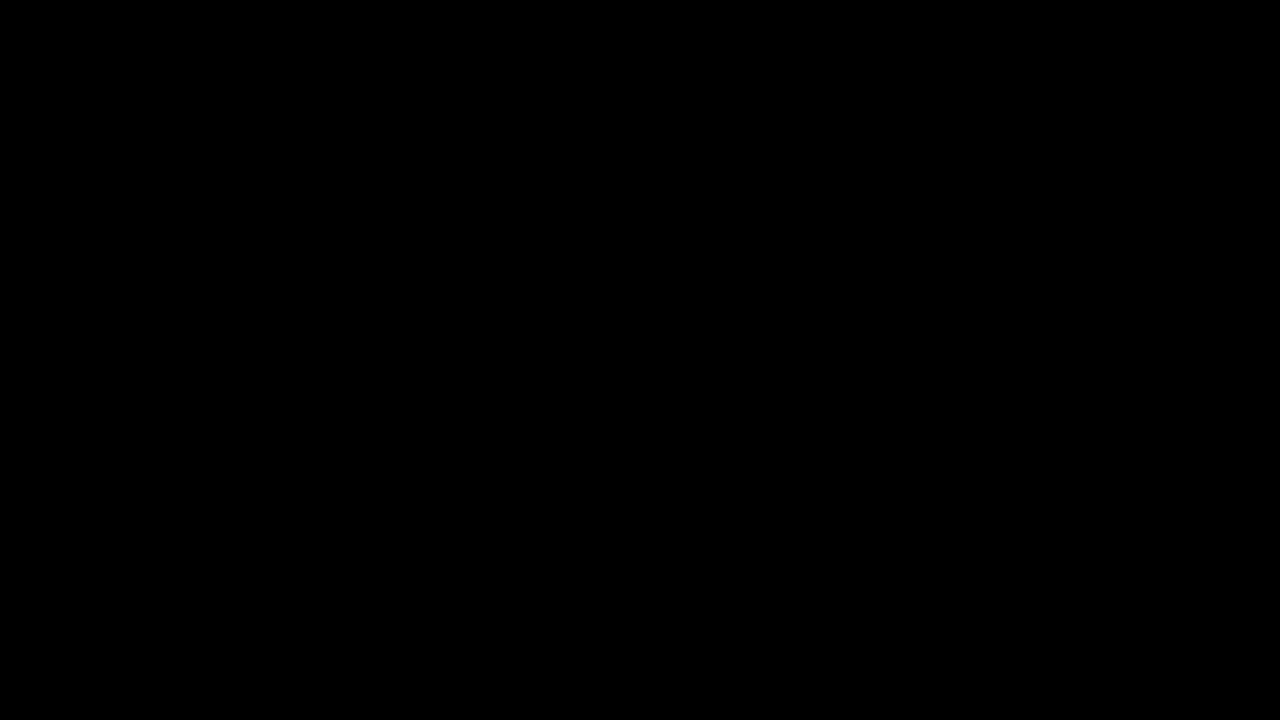

(720, 1280, 3)


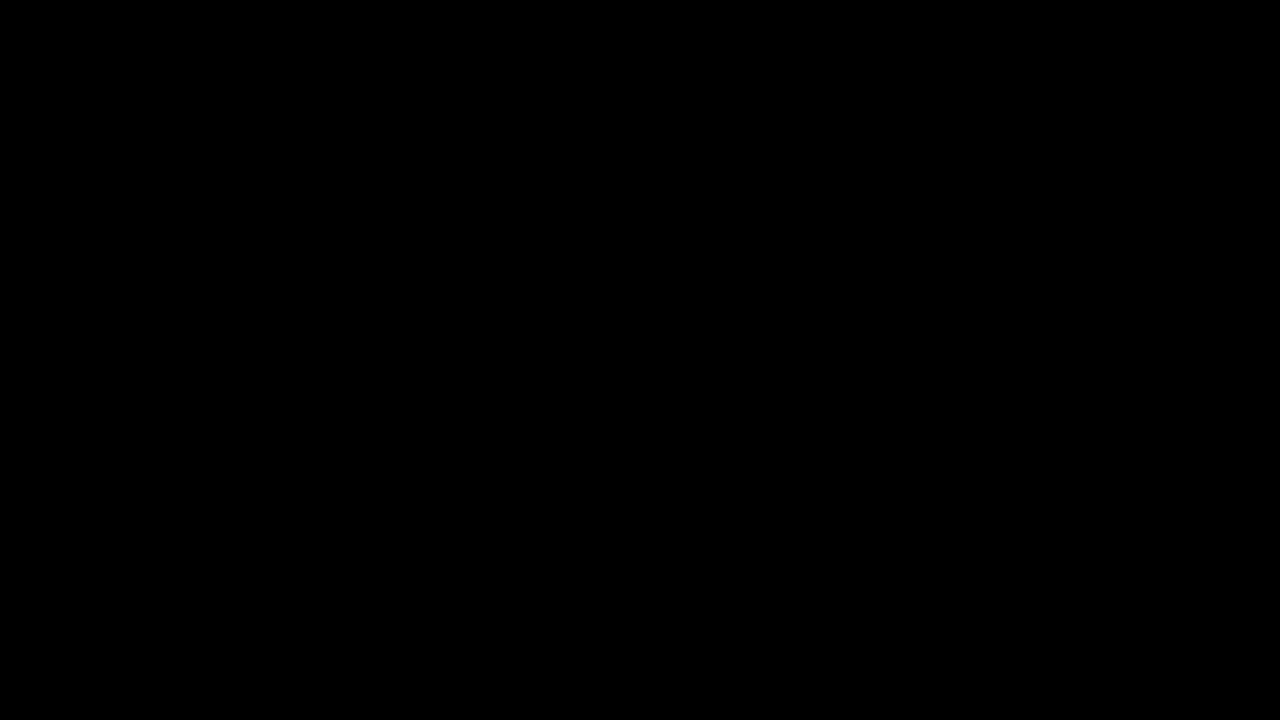

(720, 1280, 3)


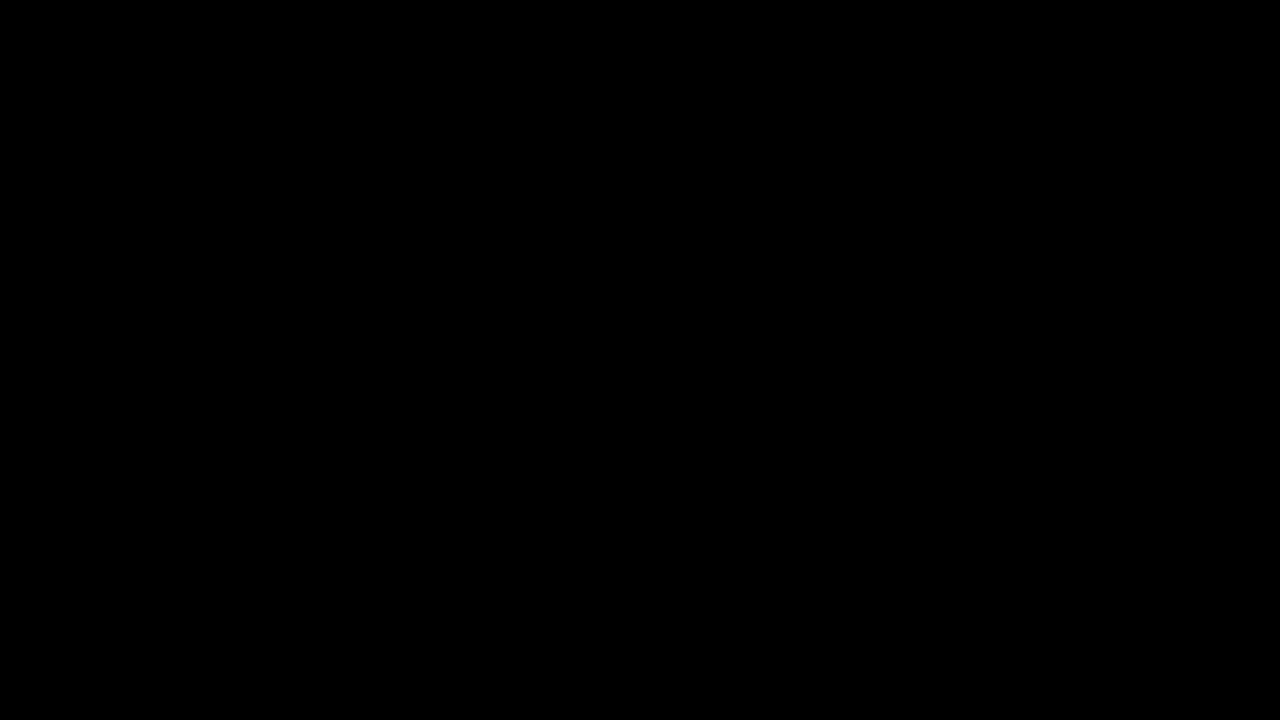

(720, 1280, 3)


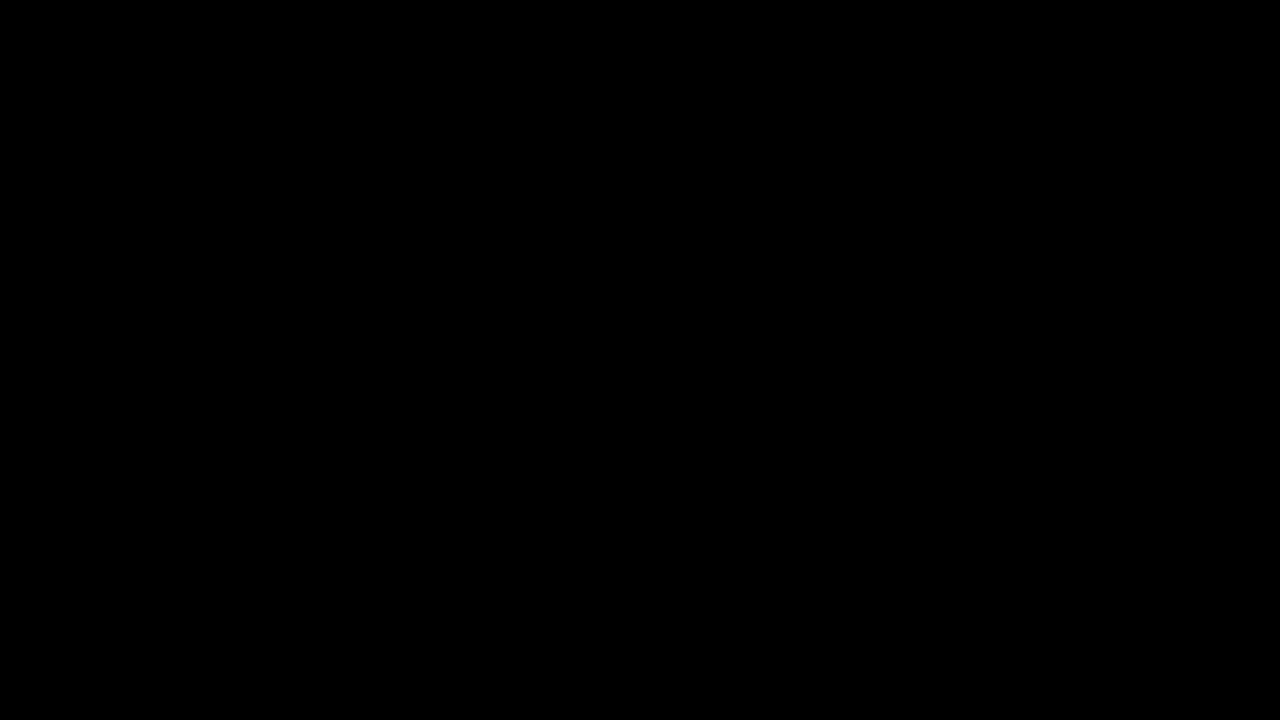

(720, 1280, 3)


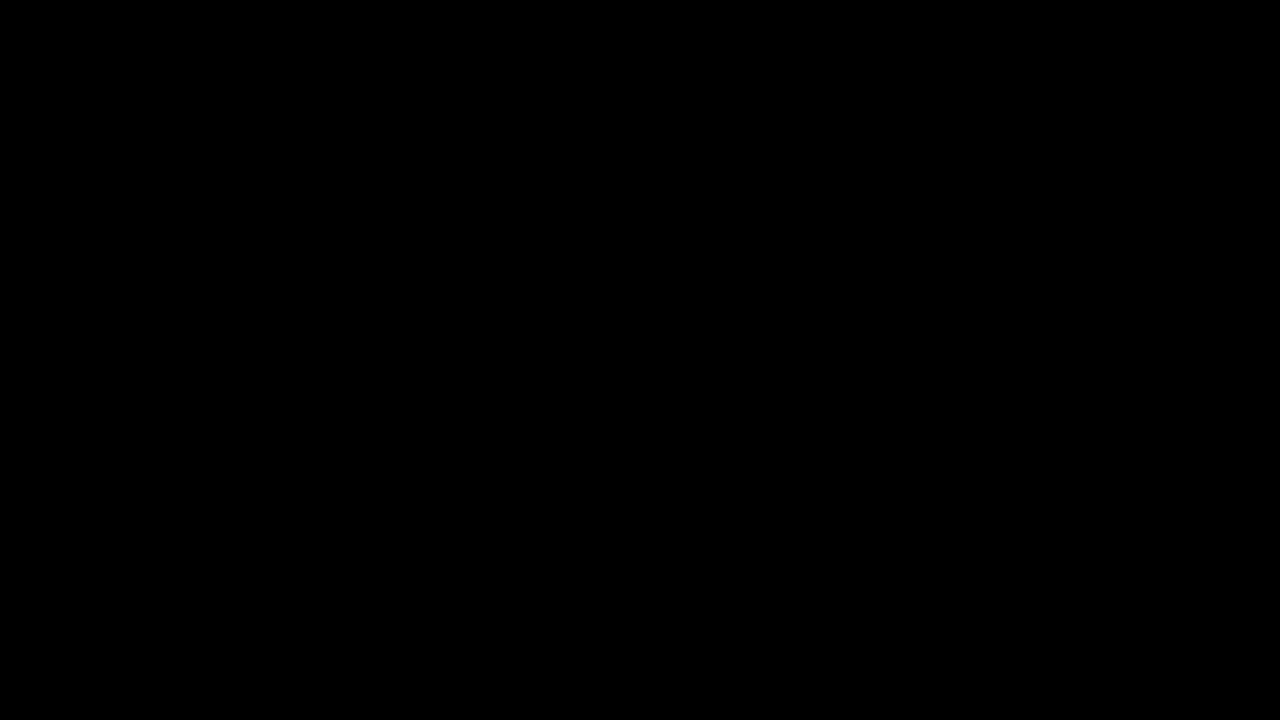

(720, 1280, 3)


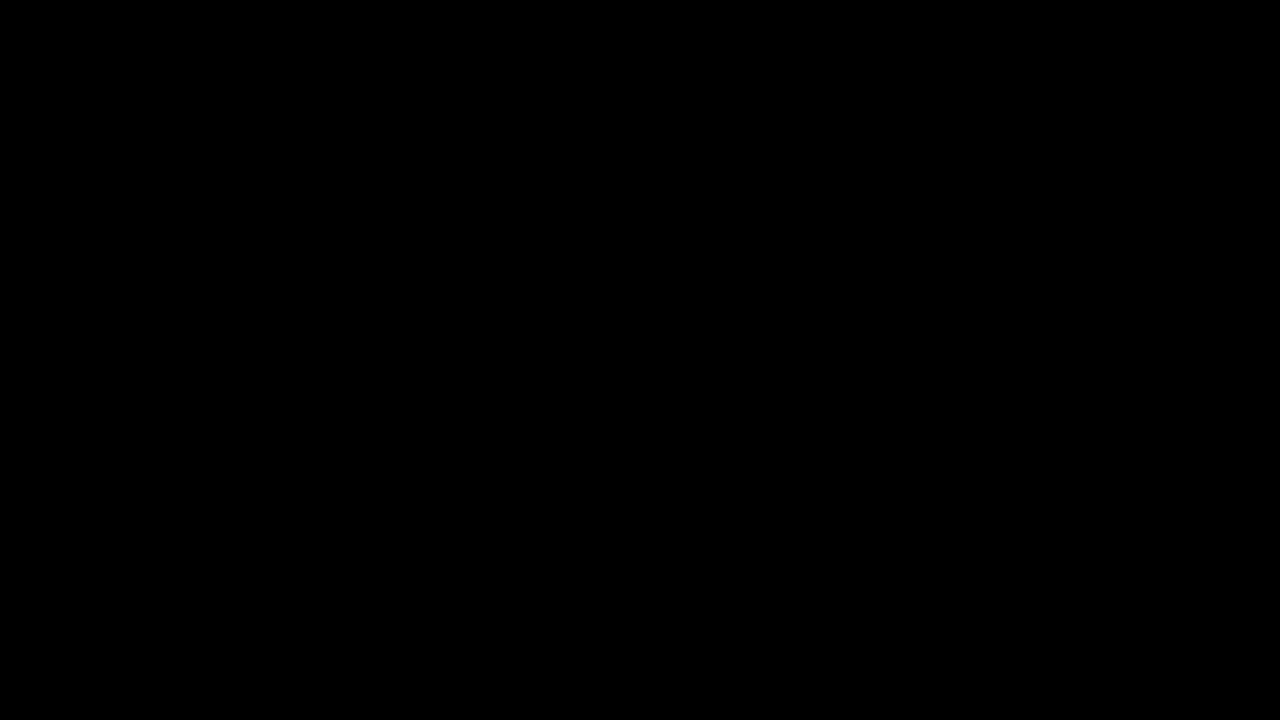

(720, 1280, 3)


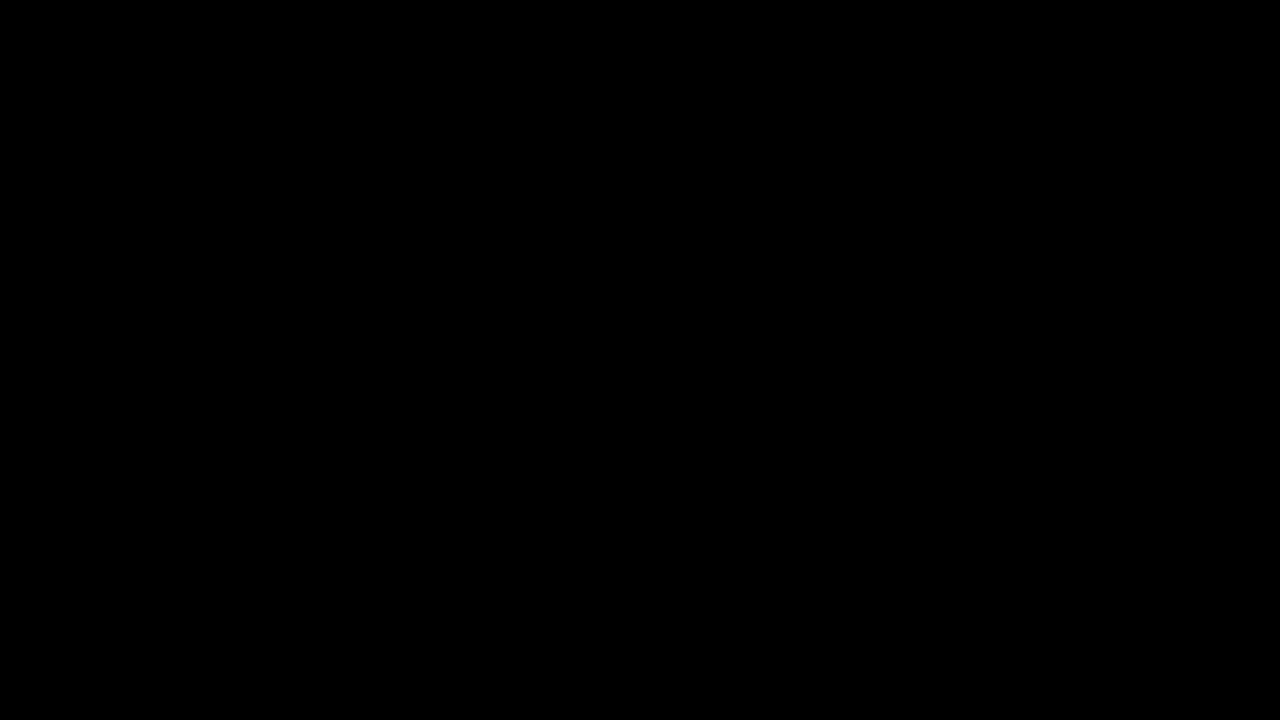

(720, 1280, 3)


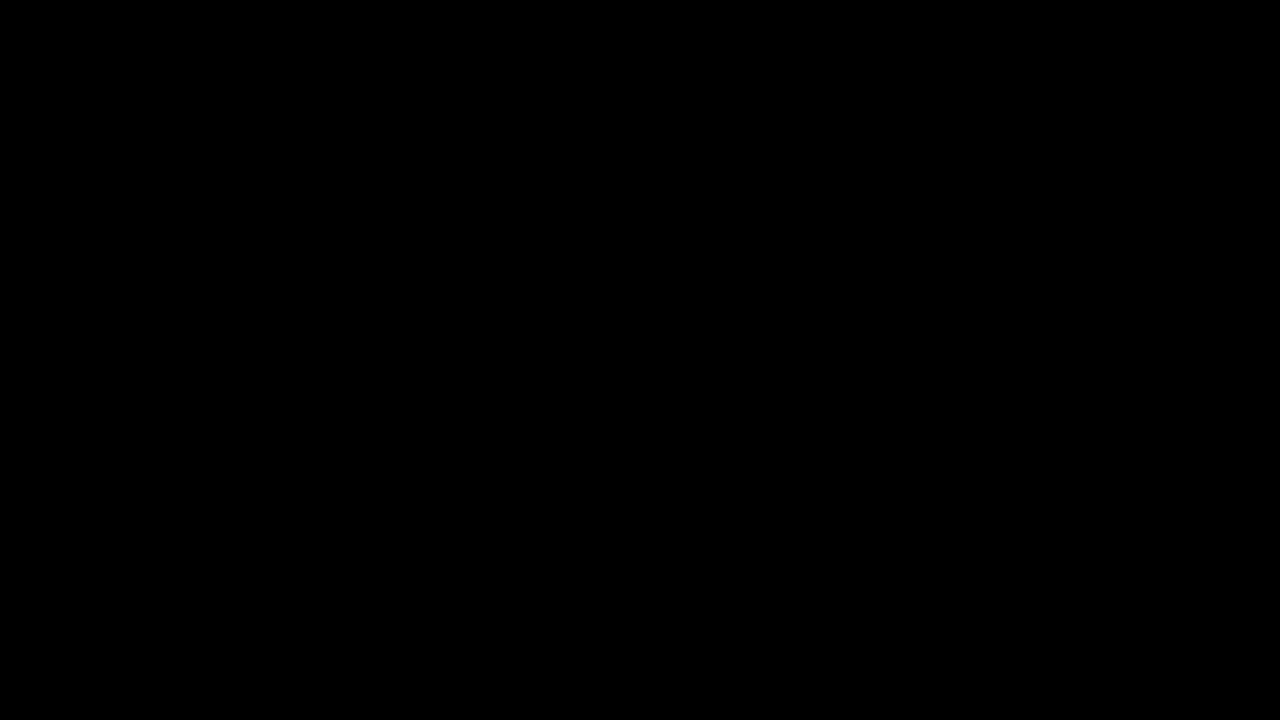

(720, 1280, 3)


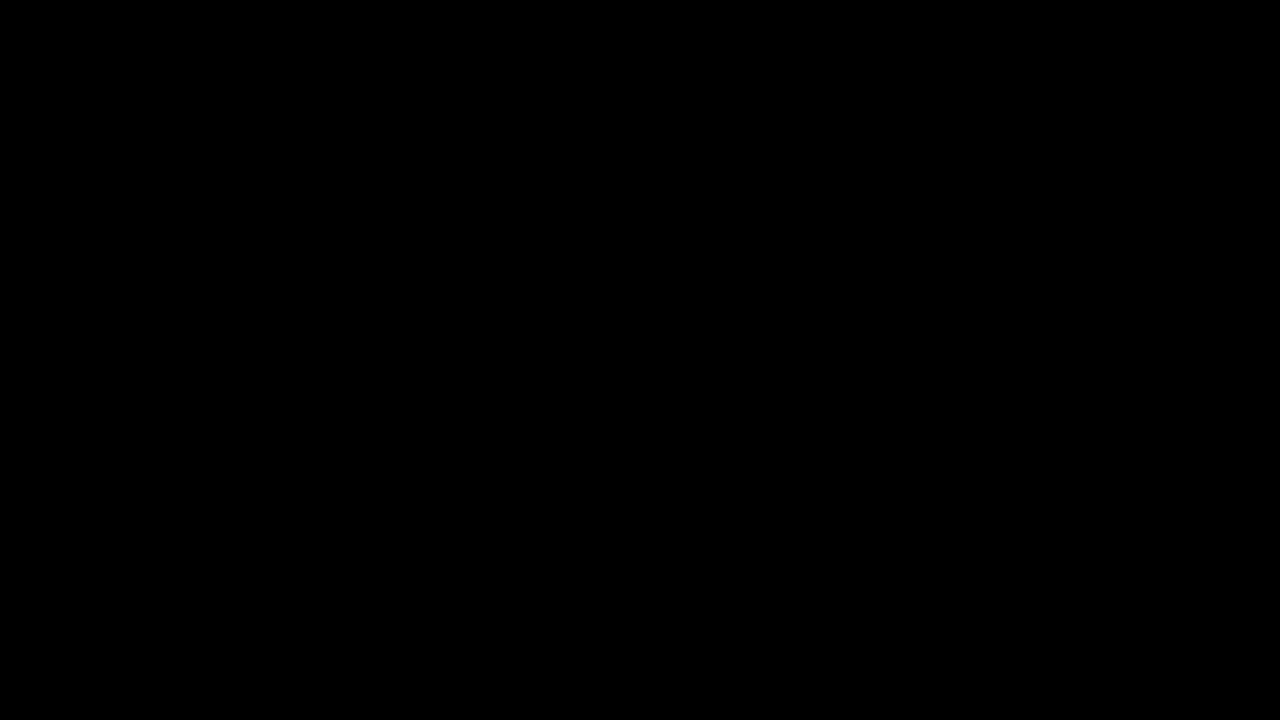

(720, 1280, 3)


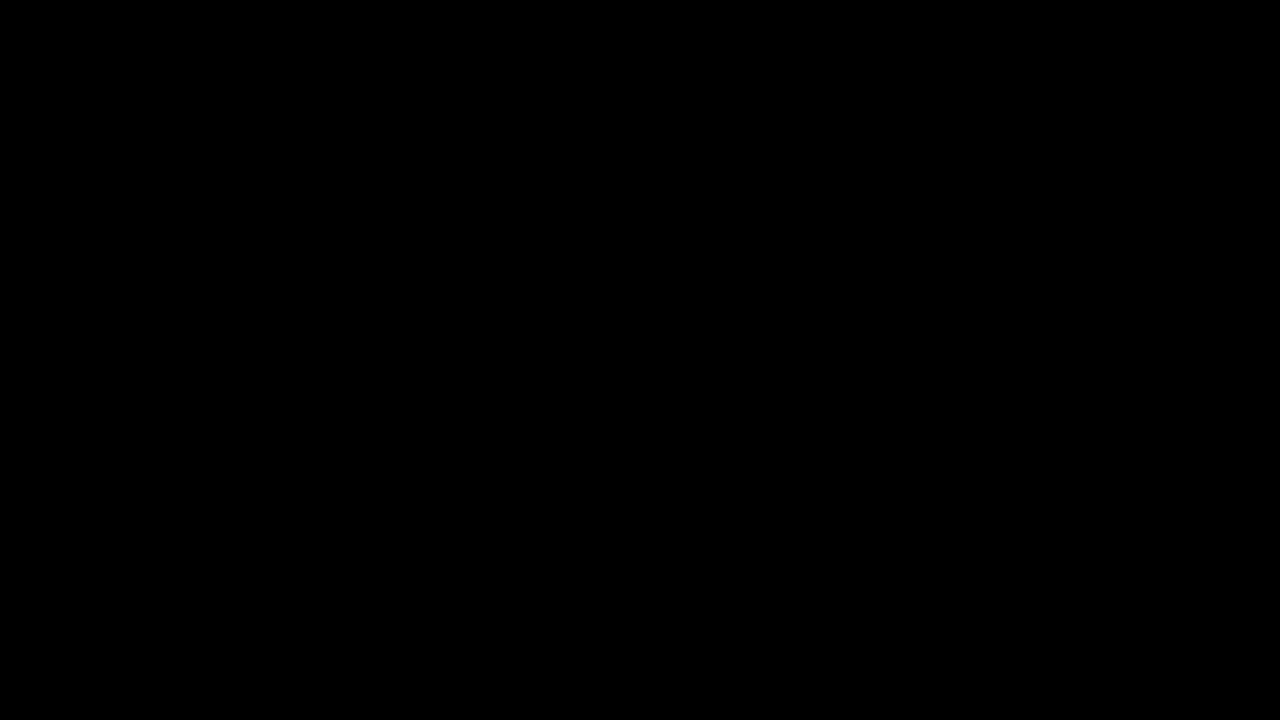

(720, 1280, 3)


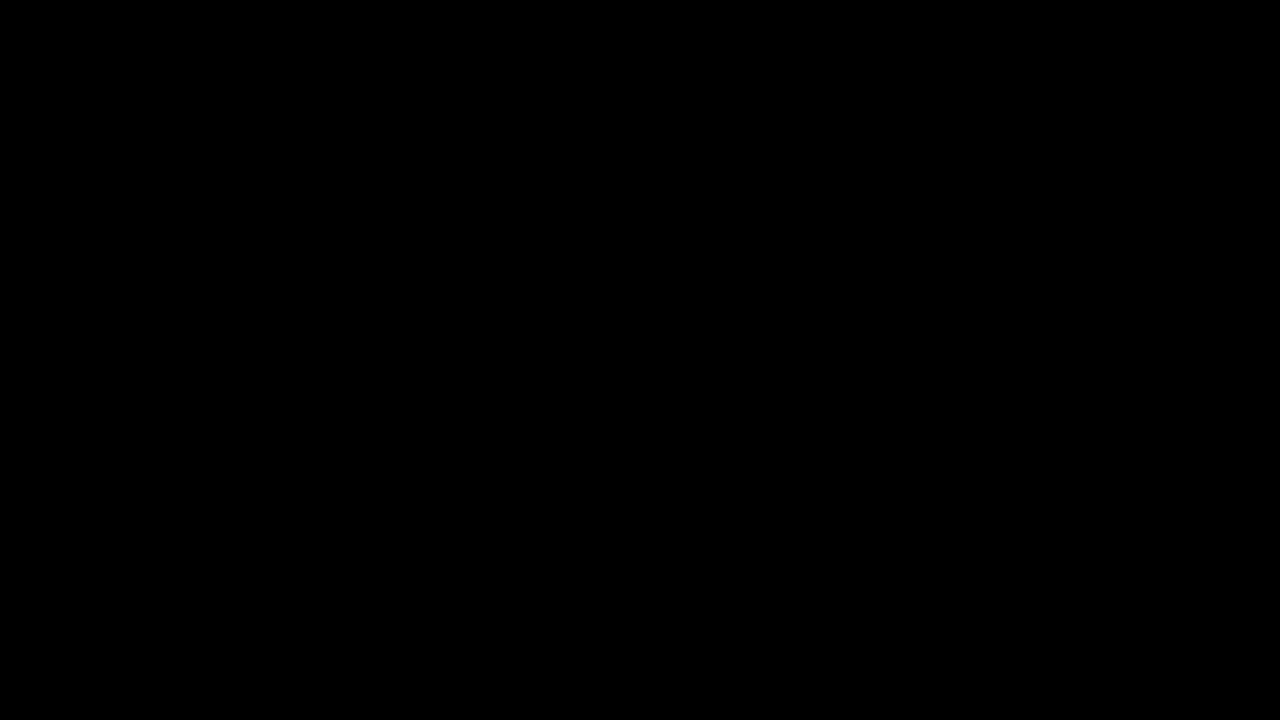

(720, 1280, 3)


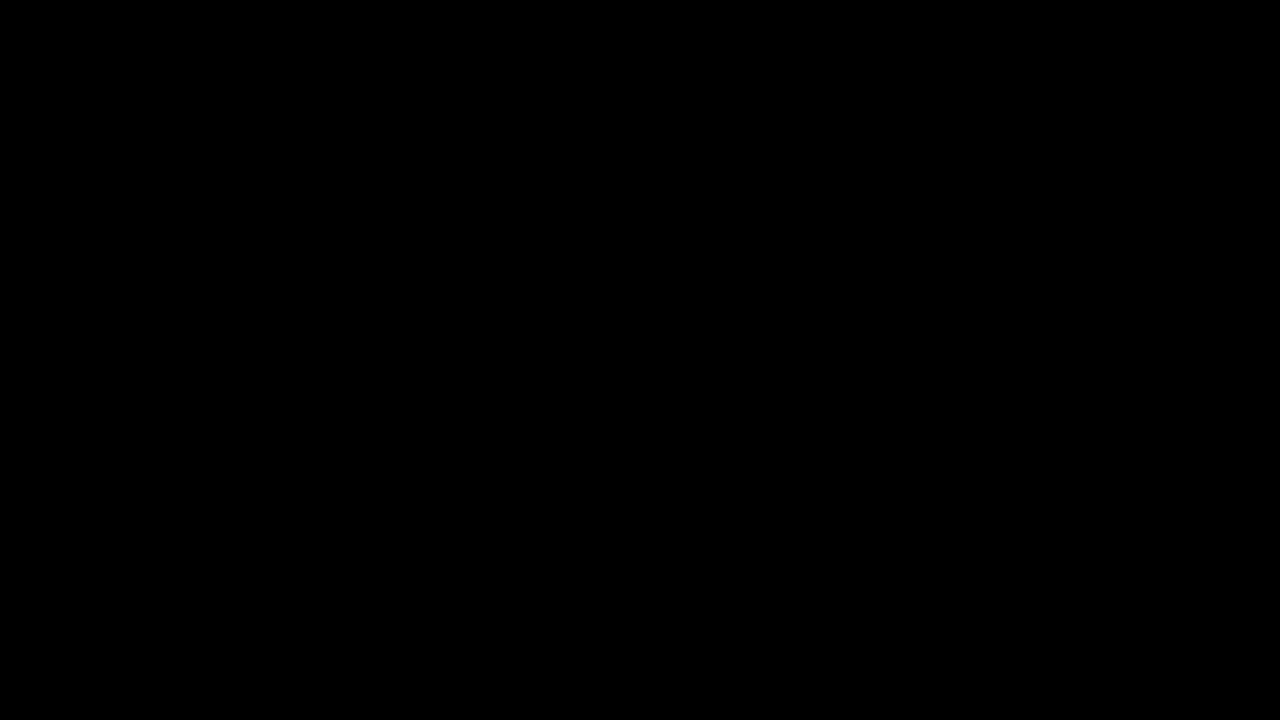

(720, 1280, 3)


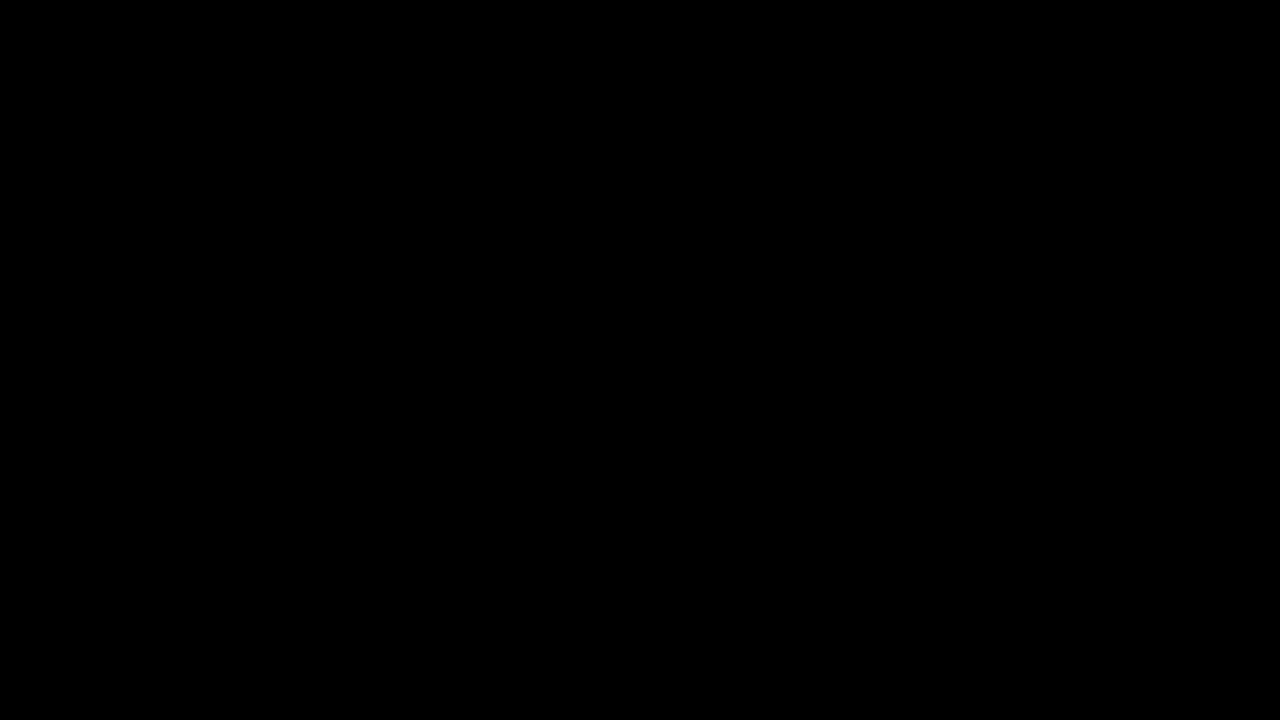

(720, 1280, 3)


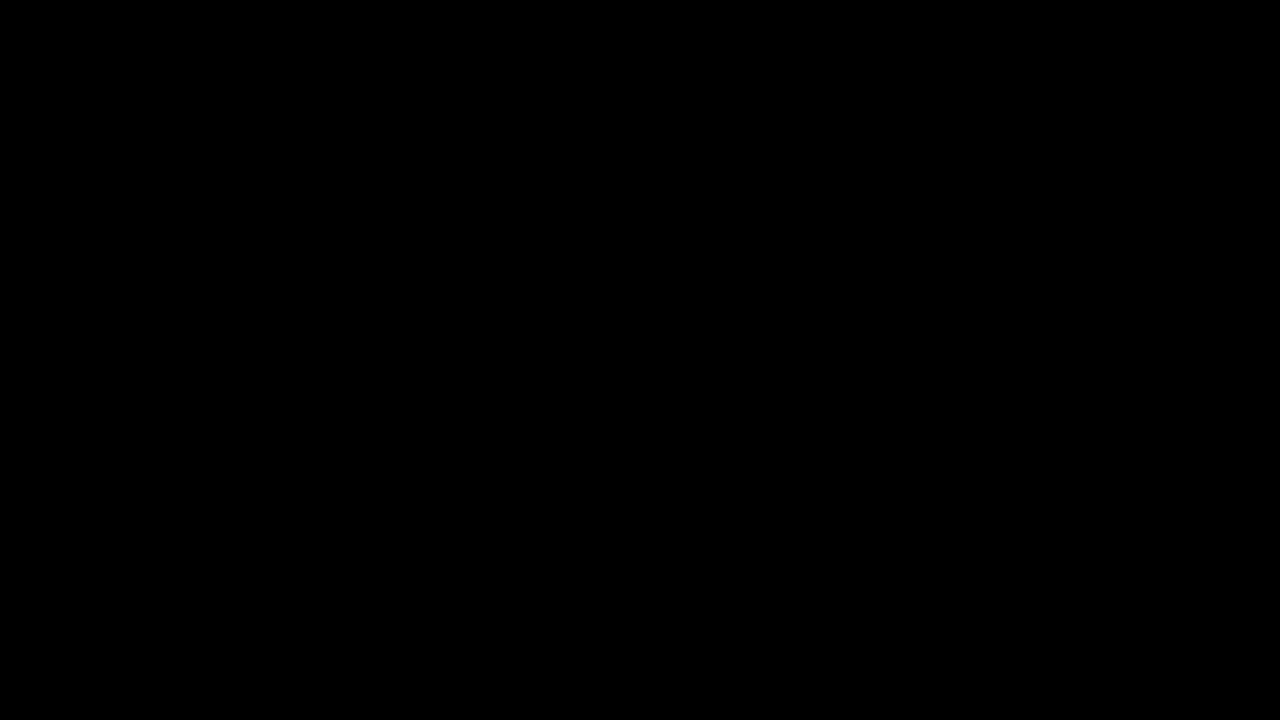

(720, 1280, 3)


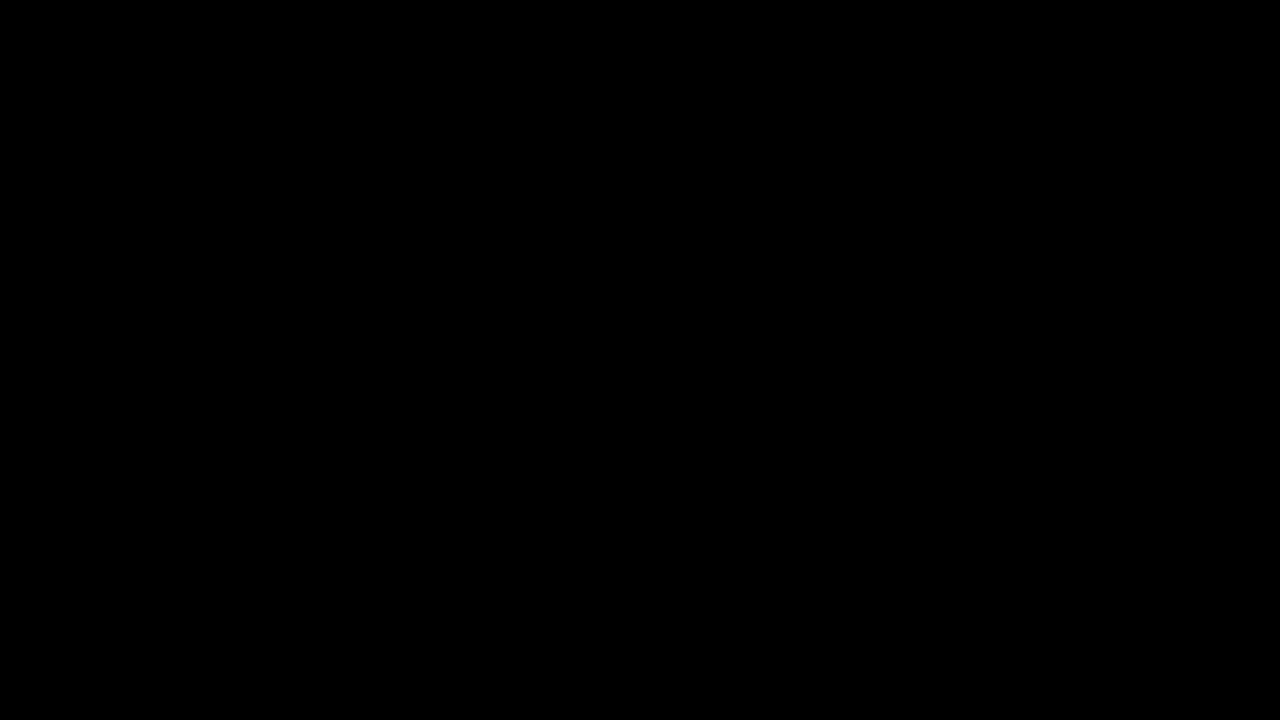

(720, 1280, 3)


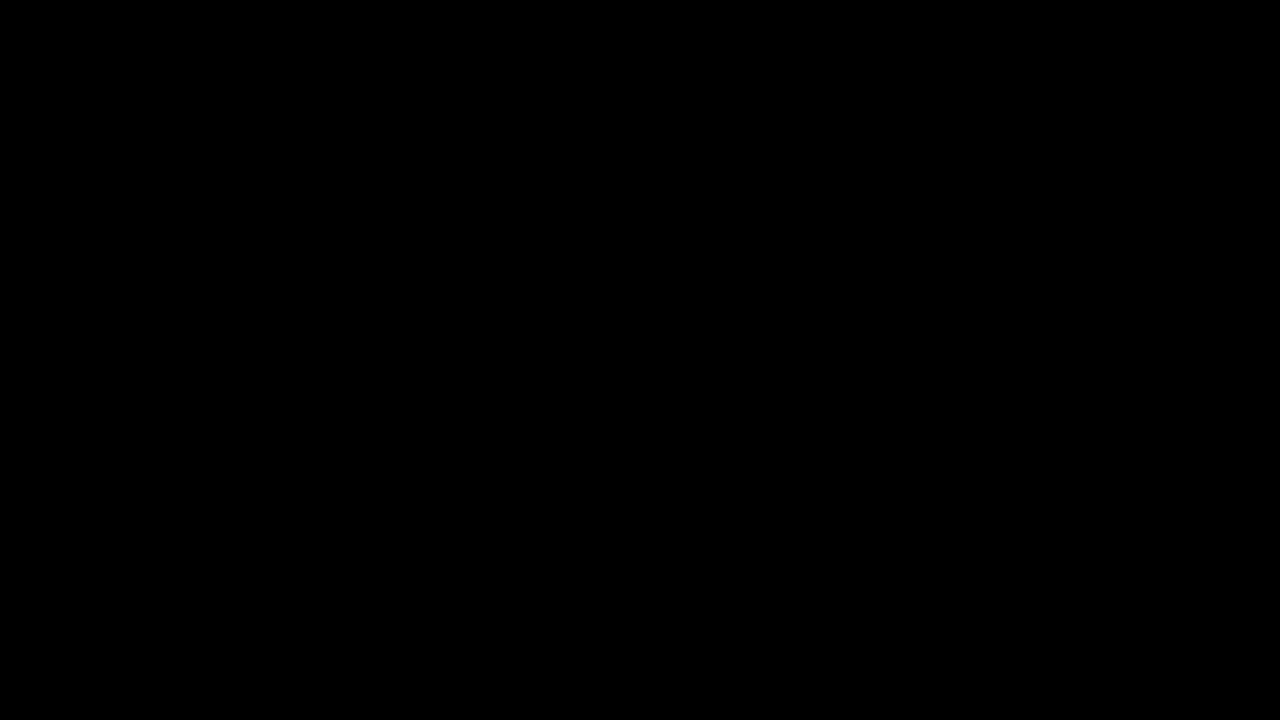

(720, 1280, 3)


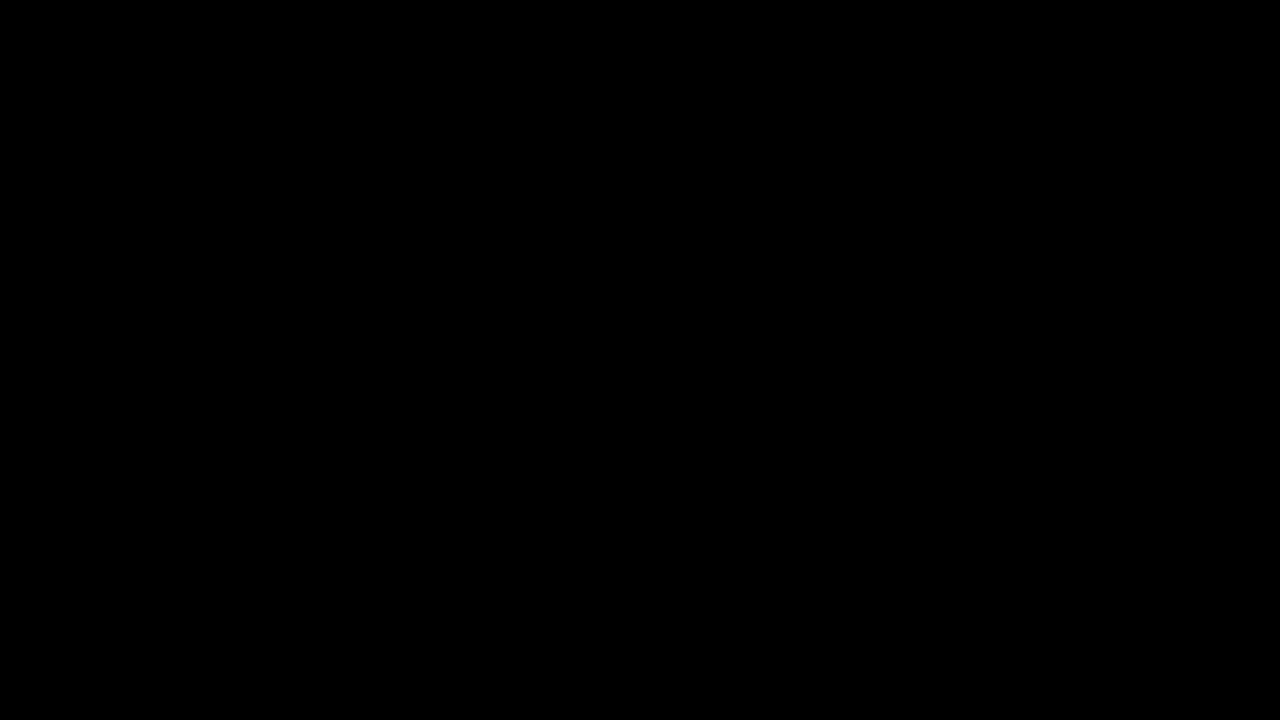

(720, 1280, 3)


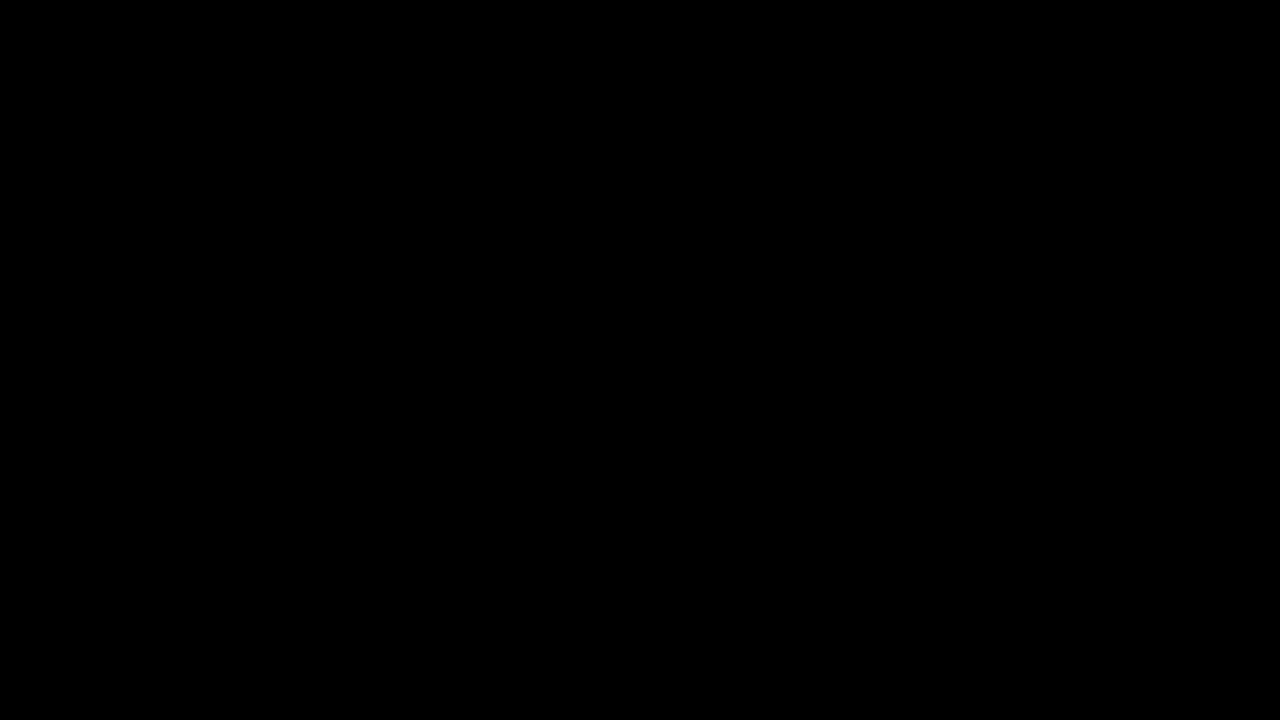

(720, 1280, 3)


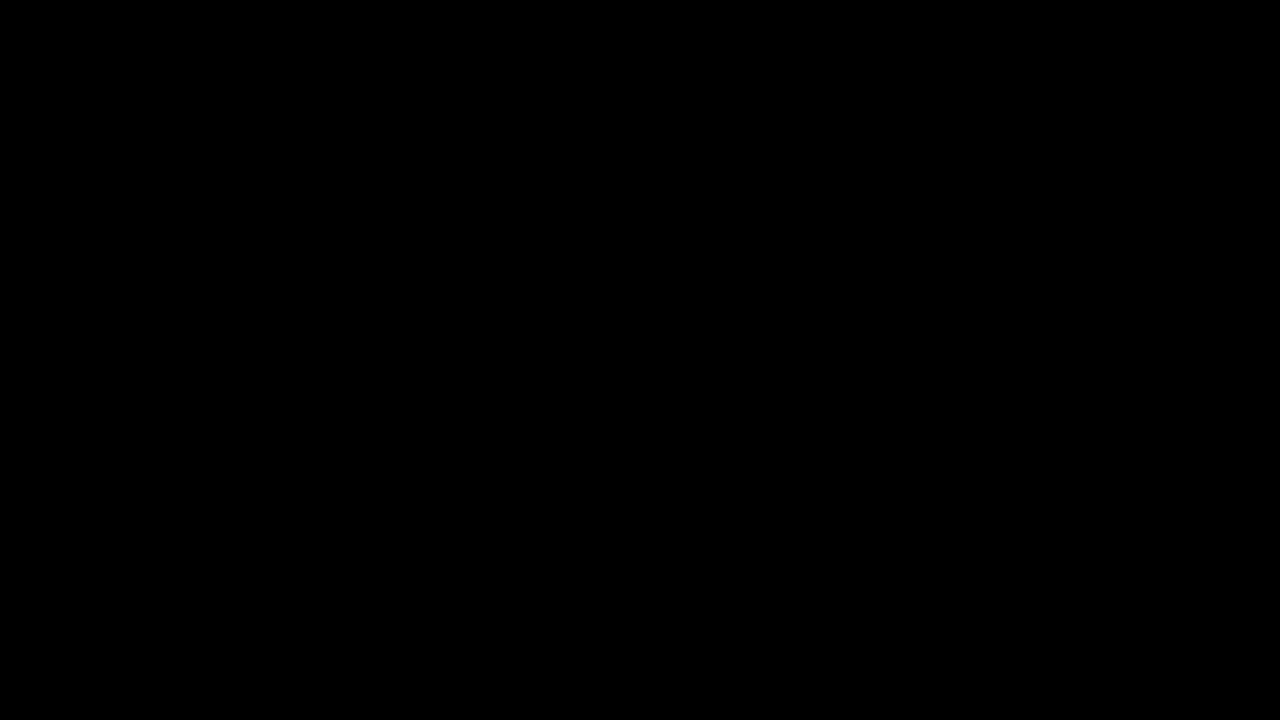

(720, 1280, 3)


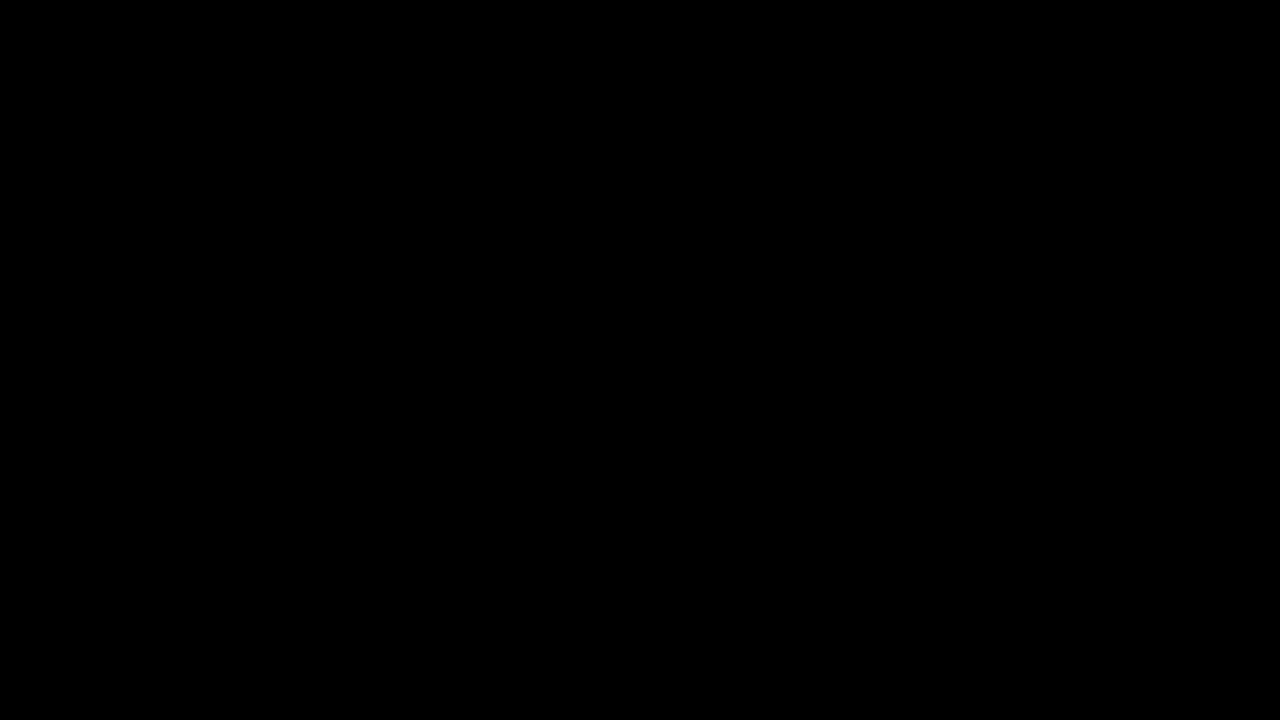

(720, 1280, 3)


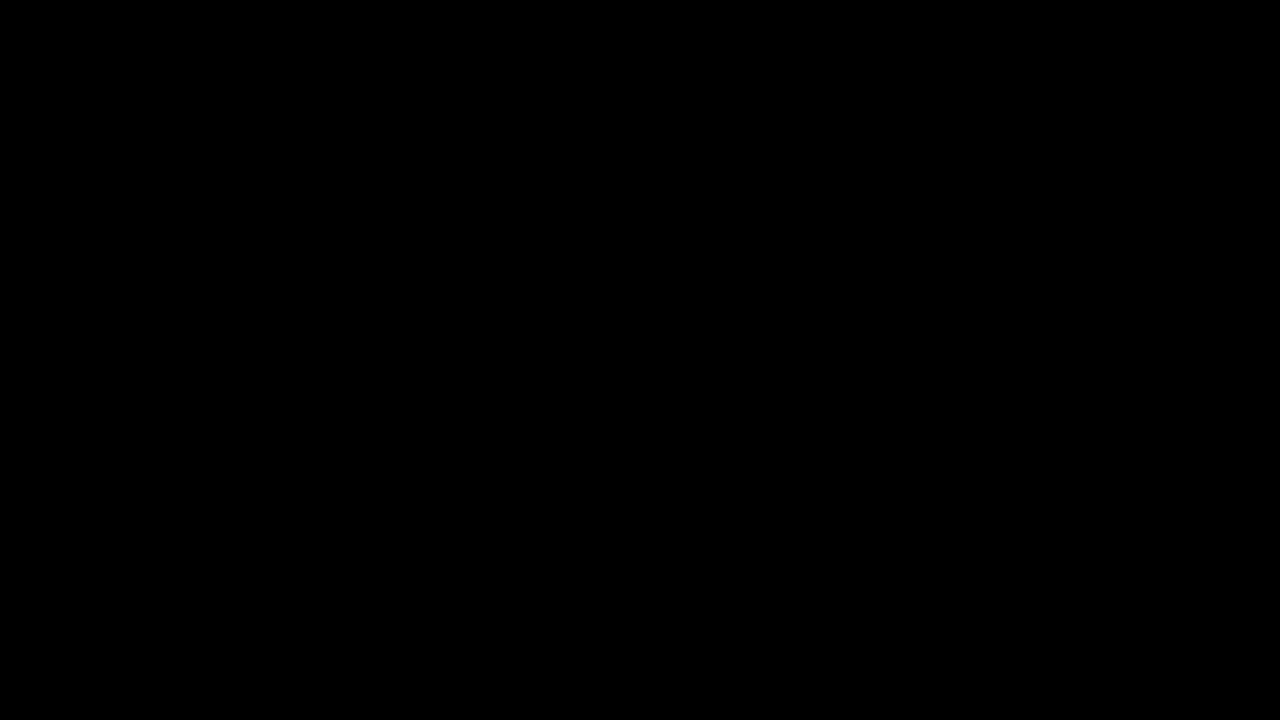

(720, 1280, 3)


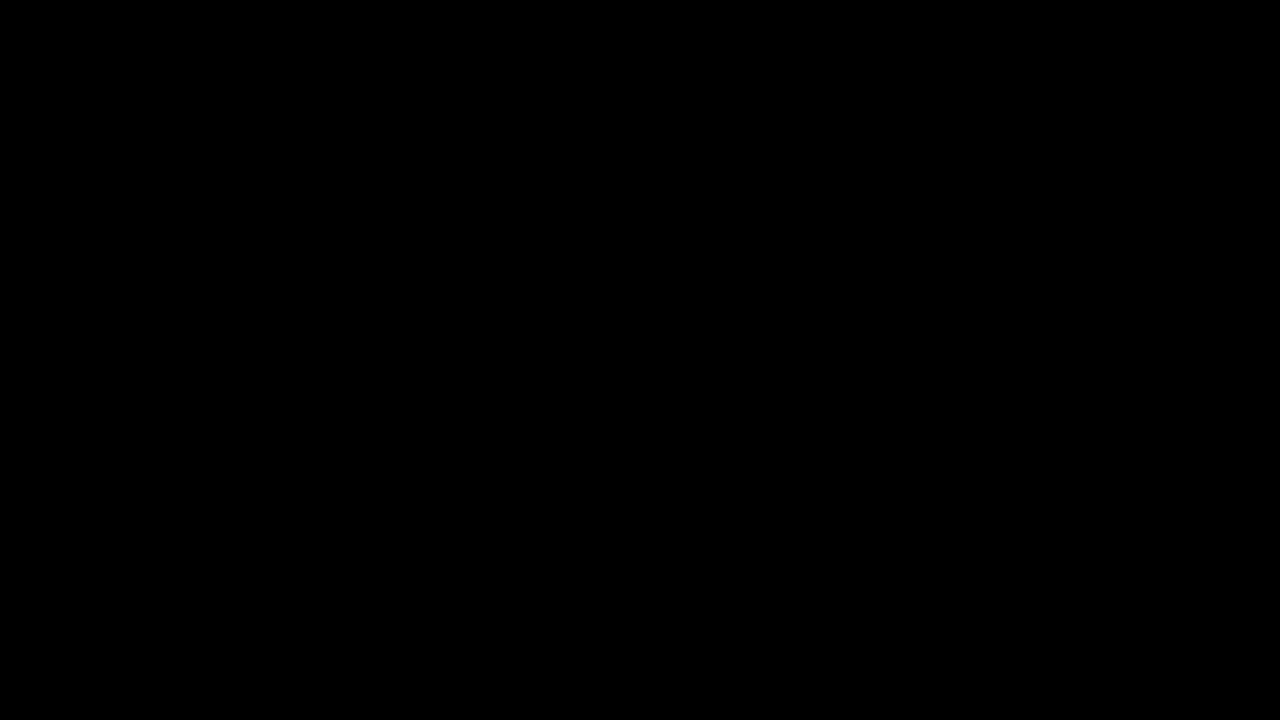

(720, 1280, 3)


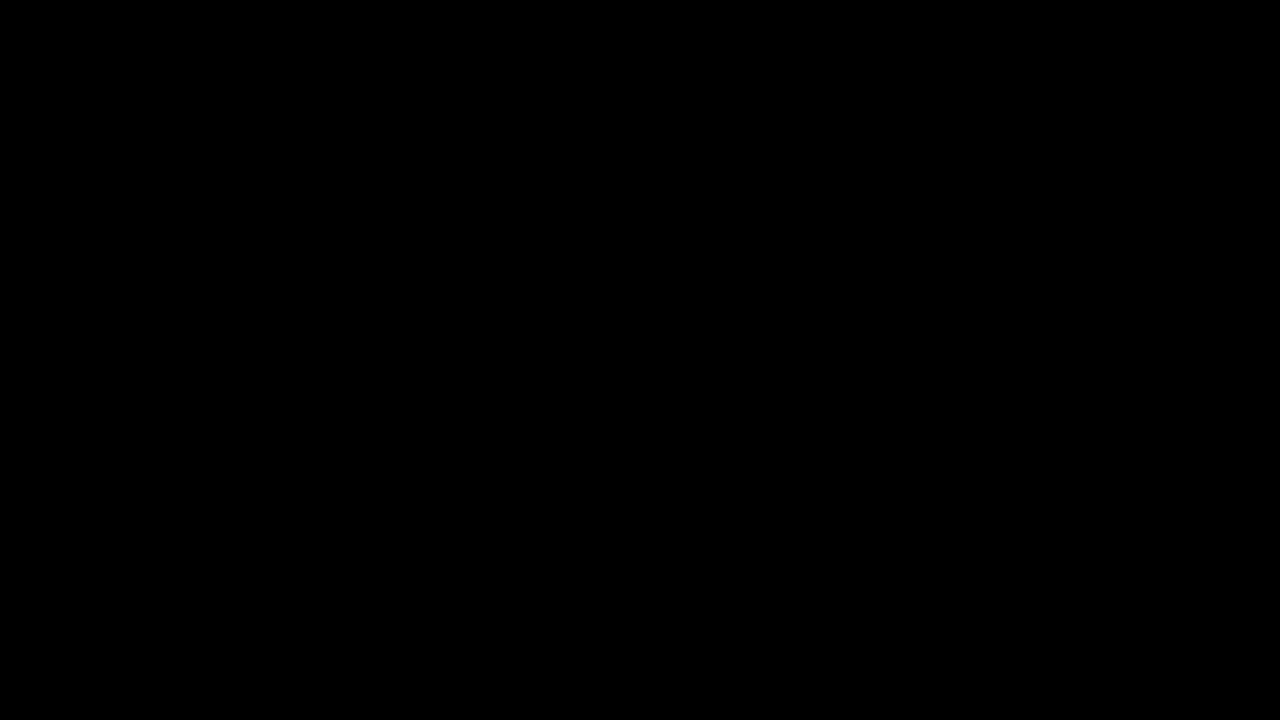

(720, 1280, 3)


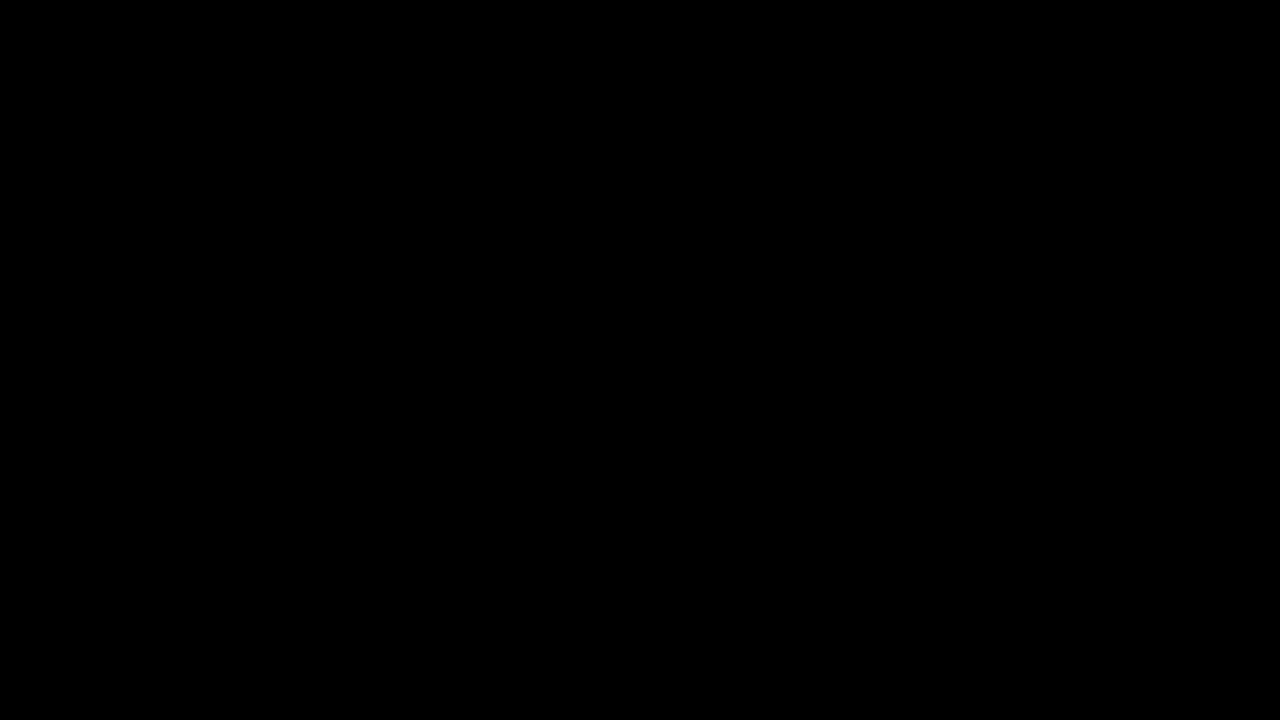

(720, 1280, 3)


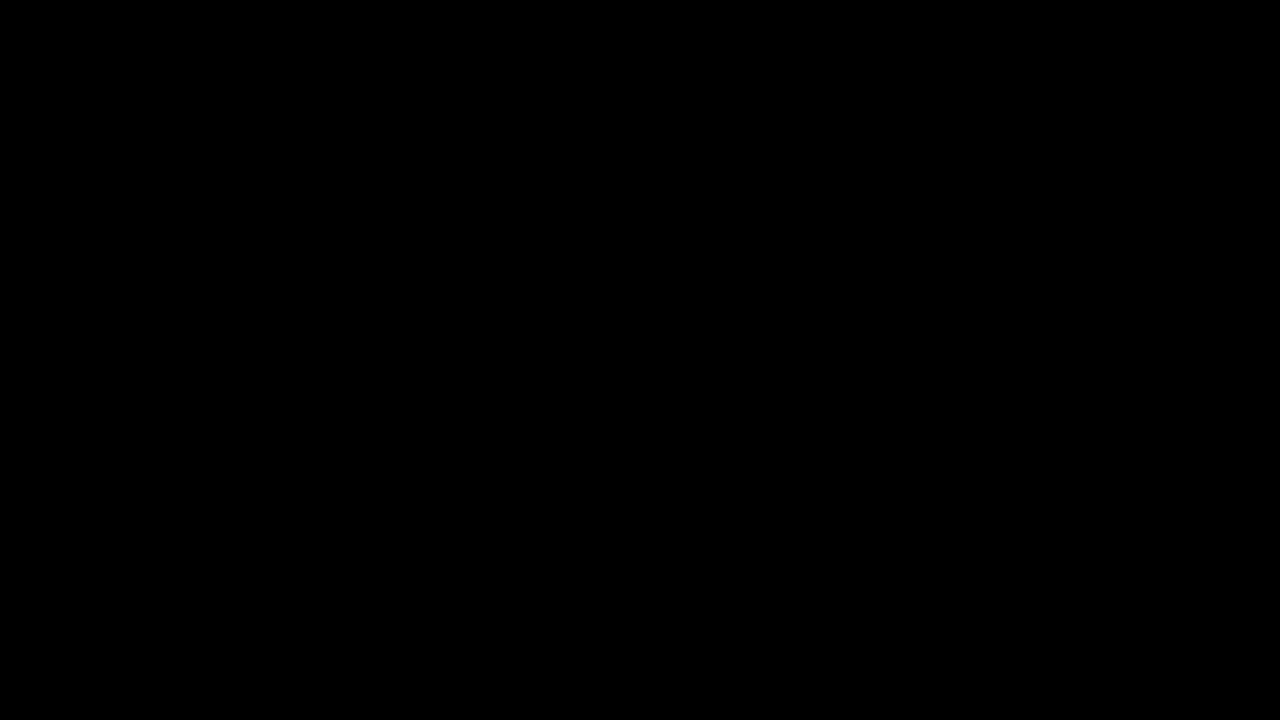

(720, 1280, 3)


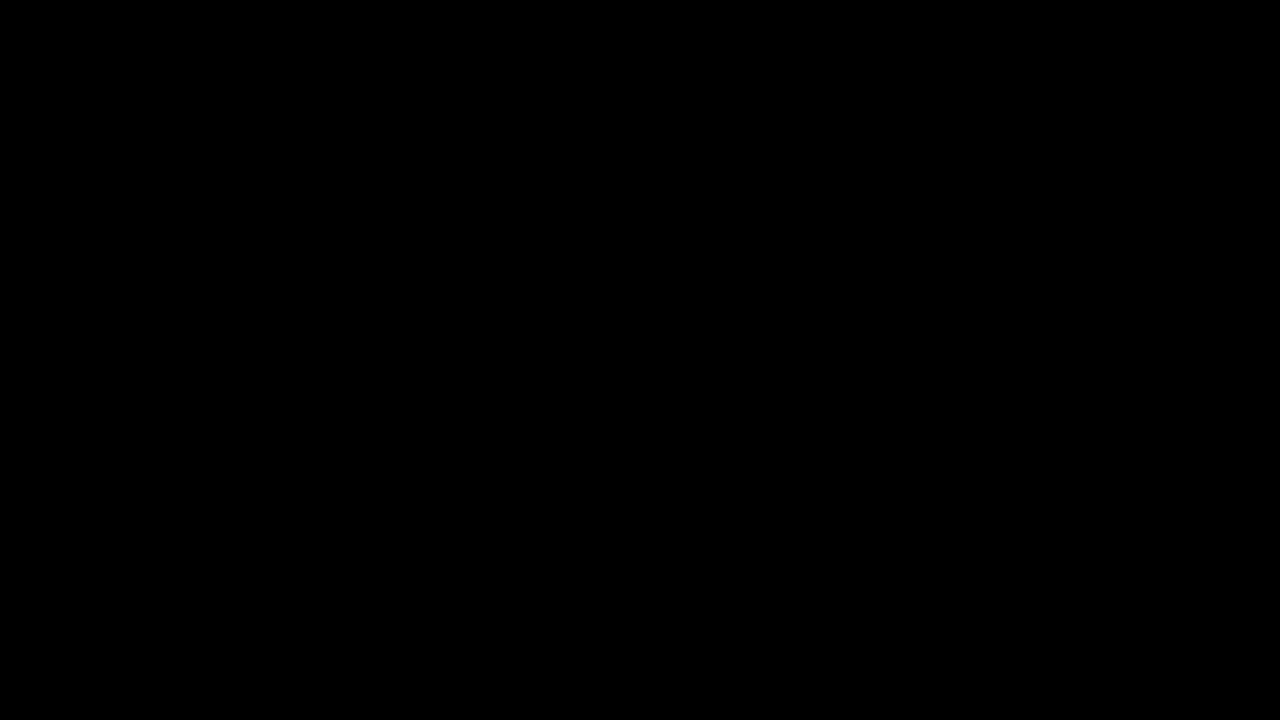

(720, 1280, 3)


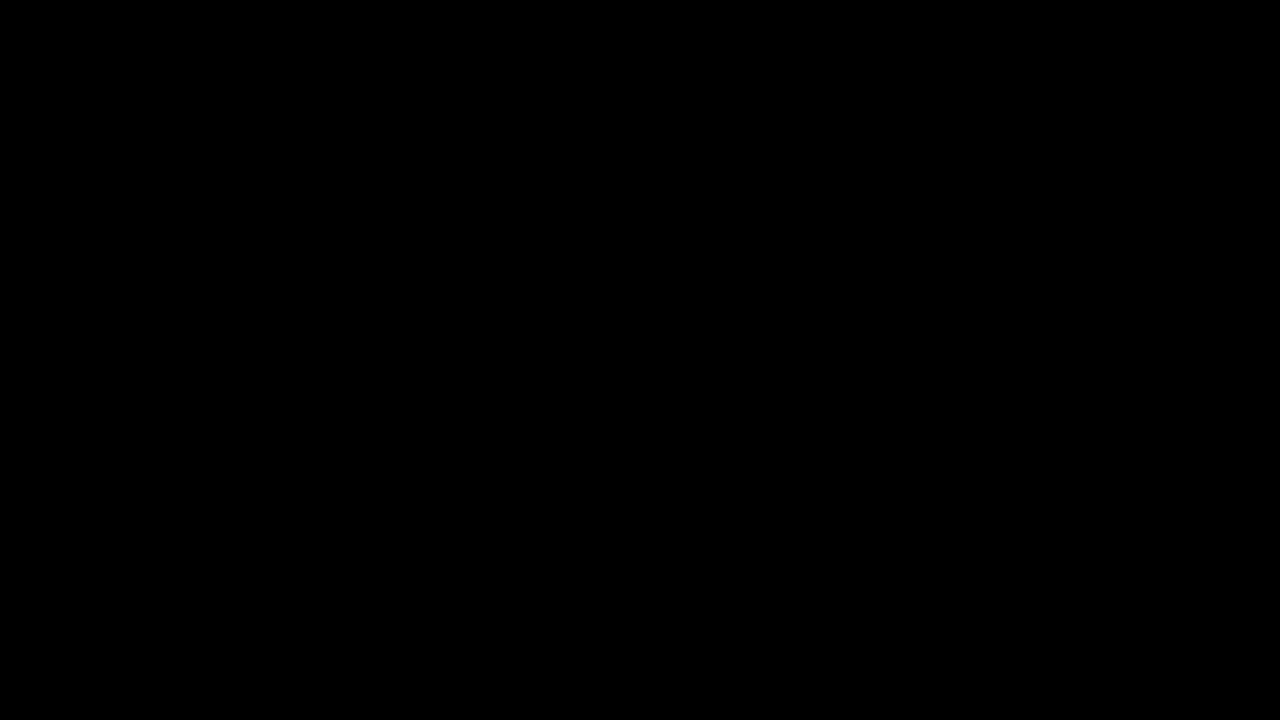

(720, 1280, 3)


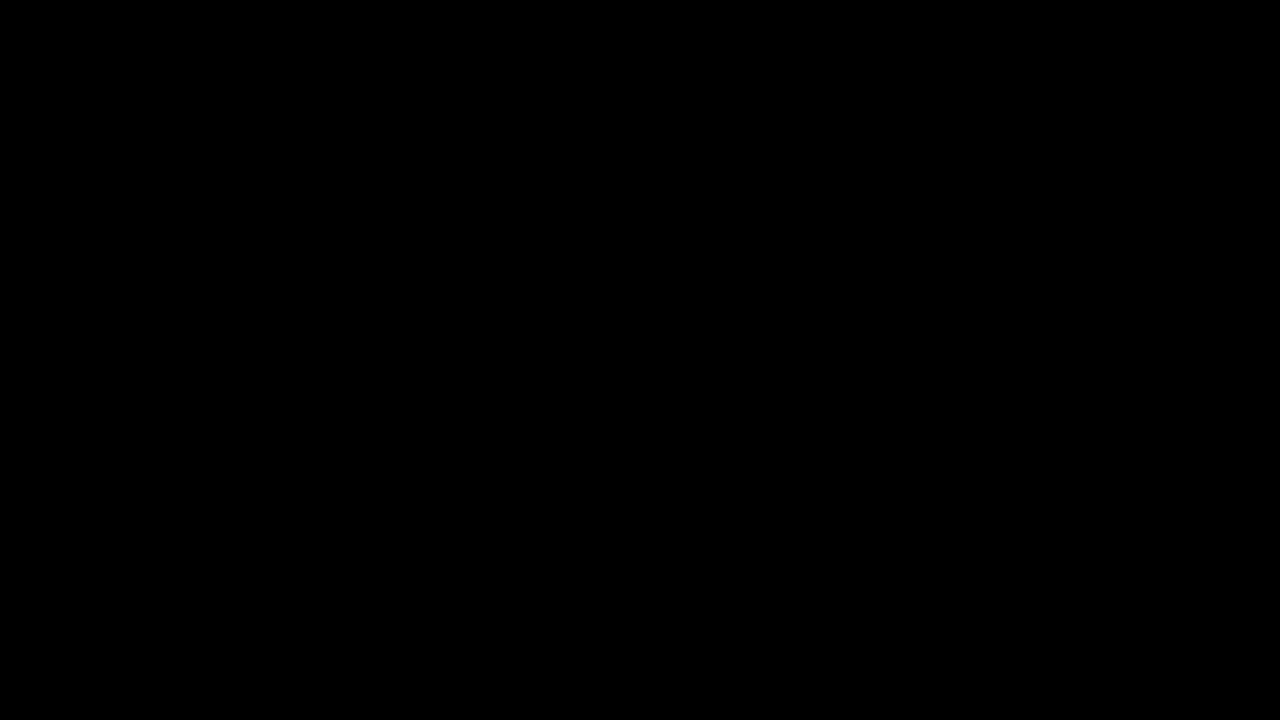

(720, 1280, 3)


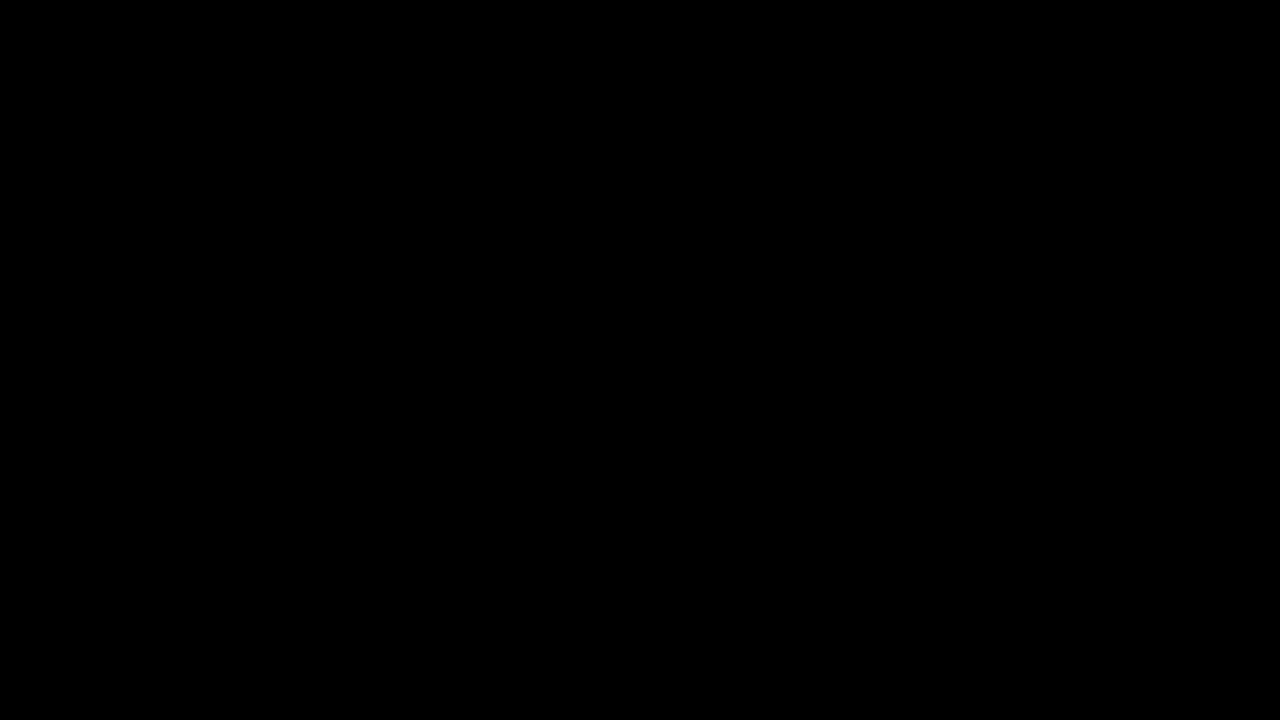

(720, 1280, 3)


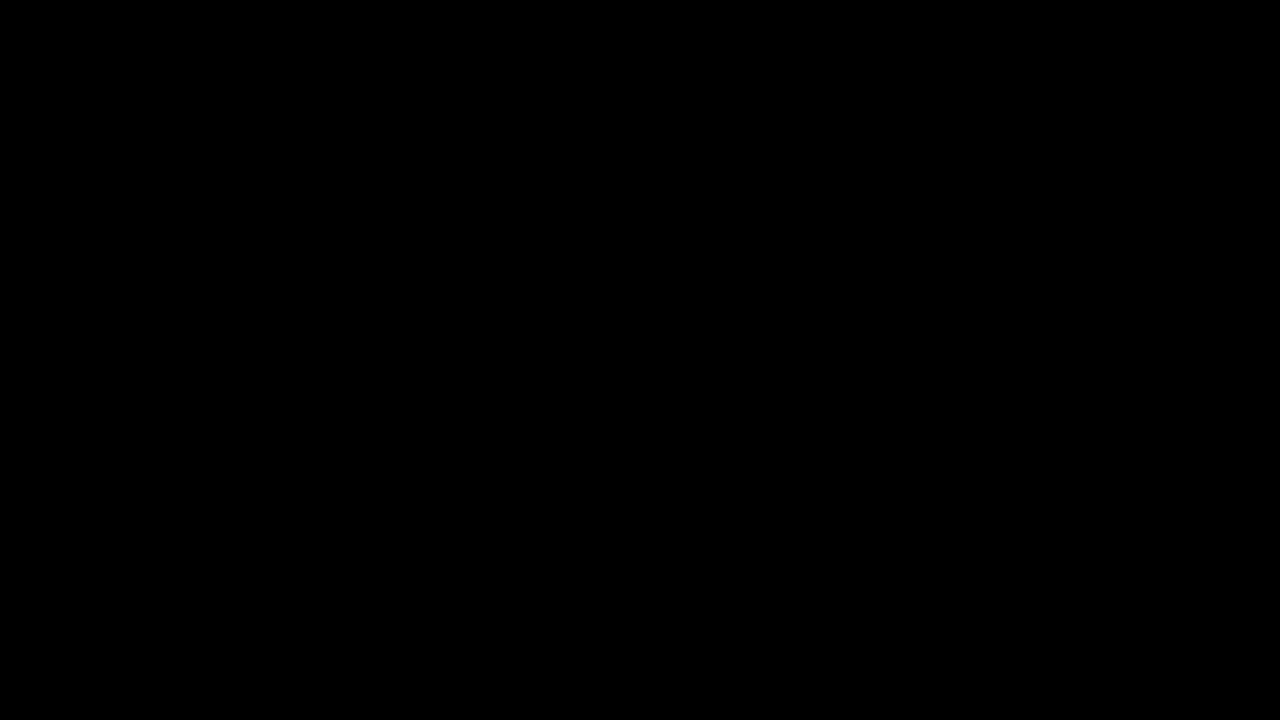

(720, 1280, 3)


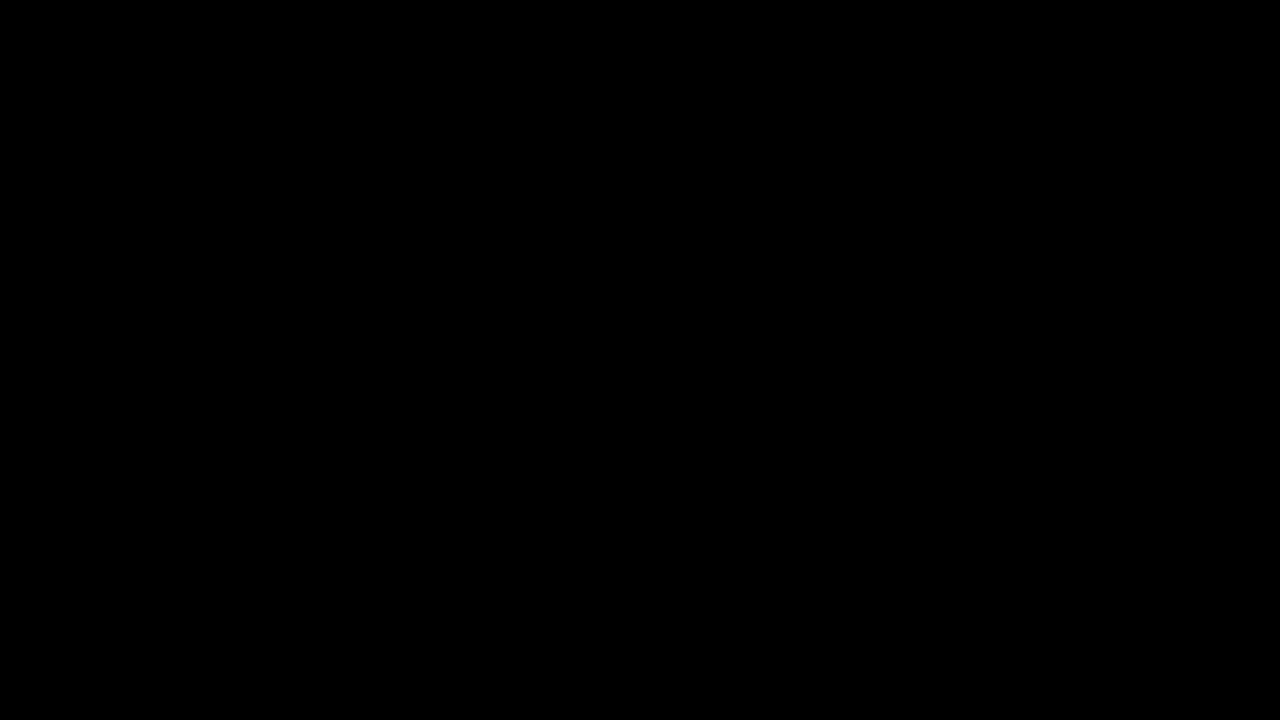

(720, 1280, 3)


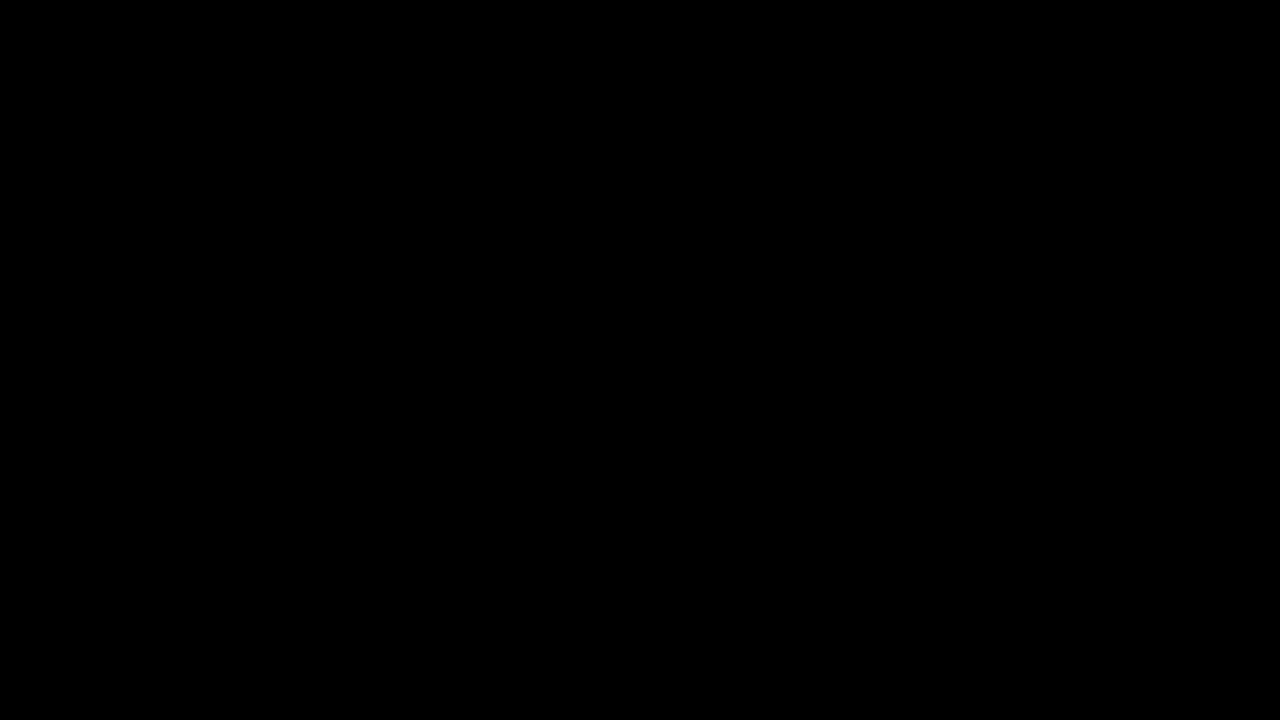

(720, 1280, 3)


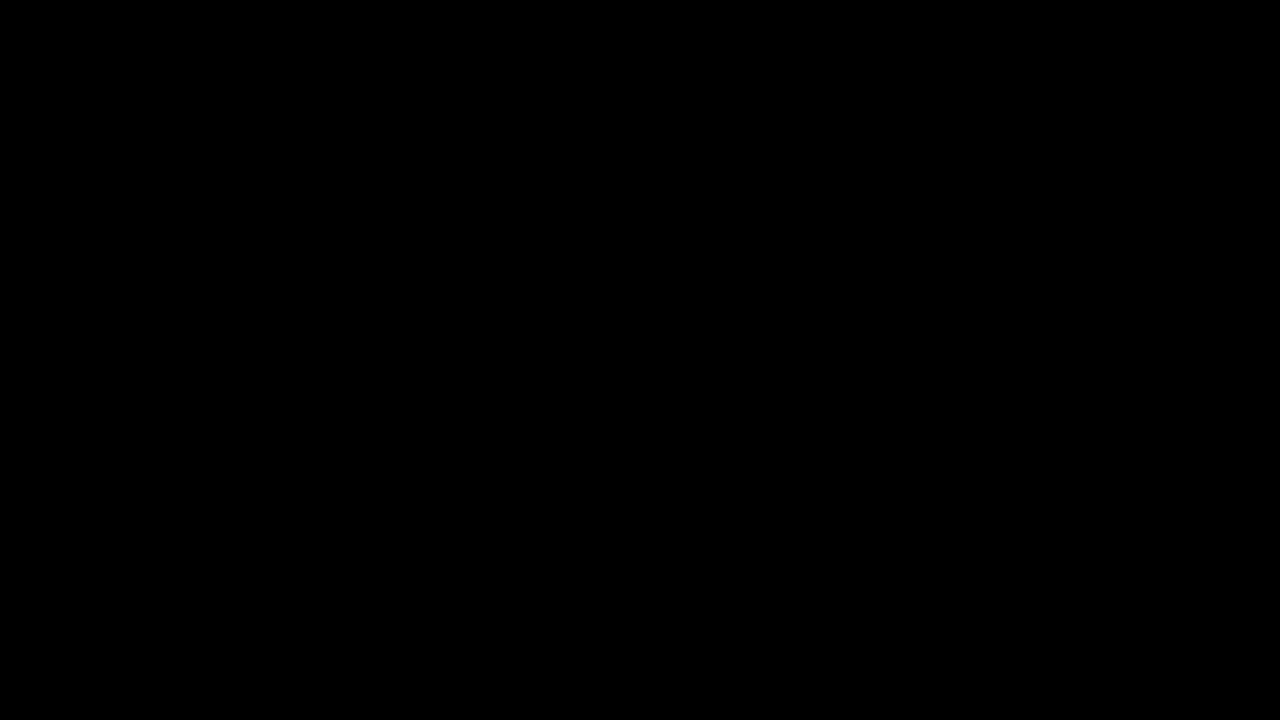

(720, 1280, 3)


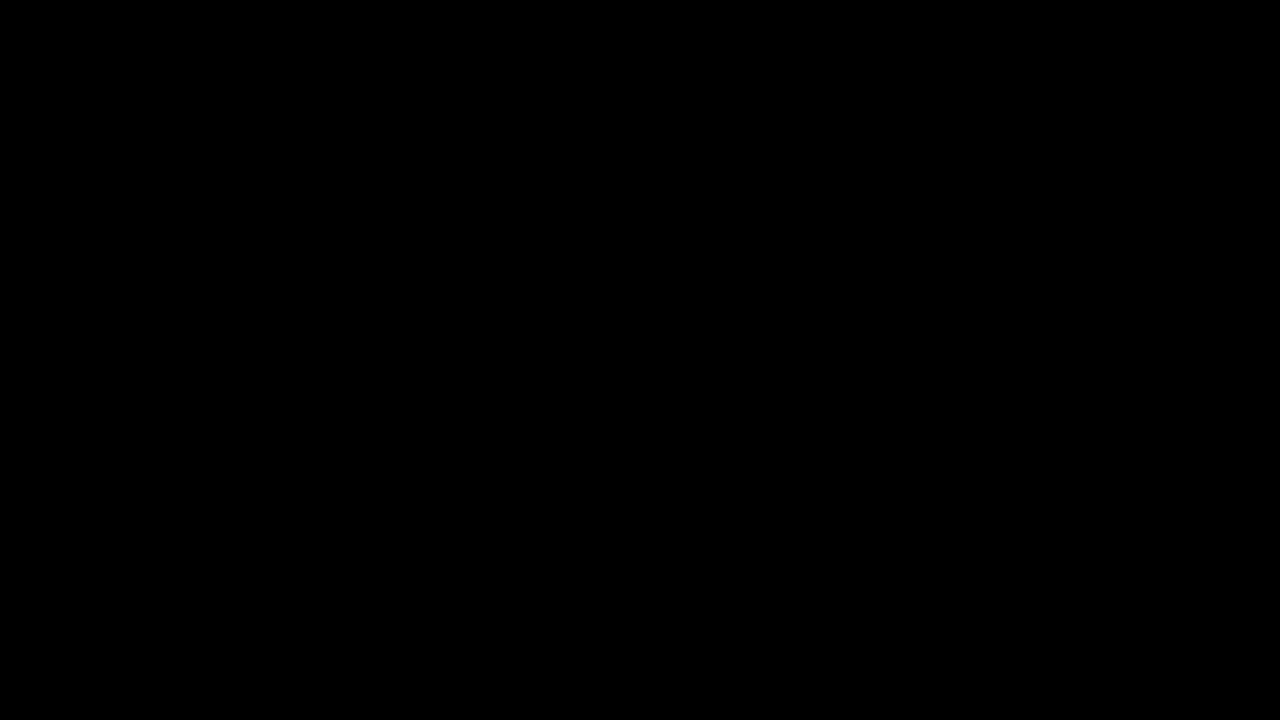

(720, 1280, 3)


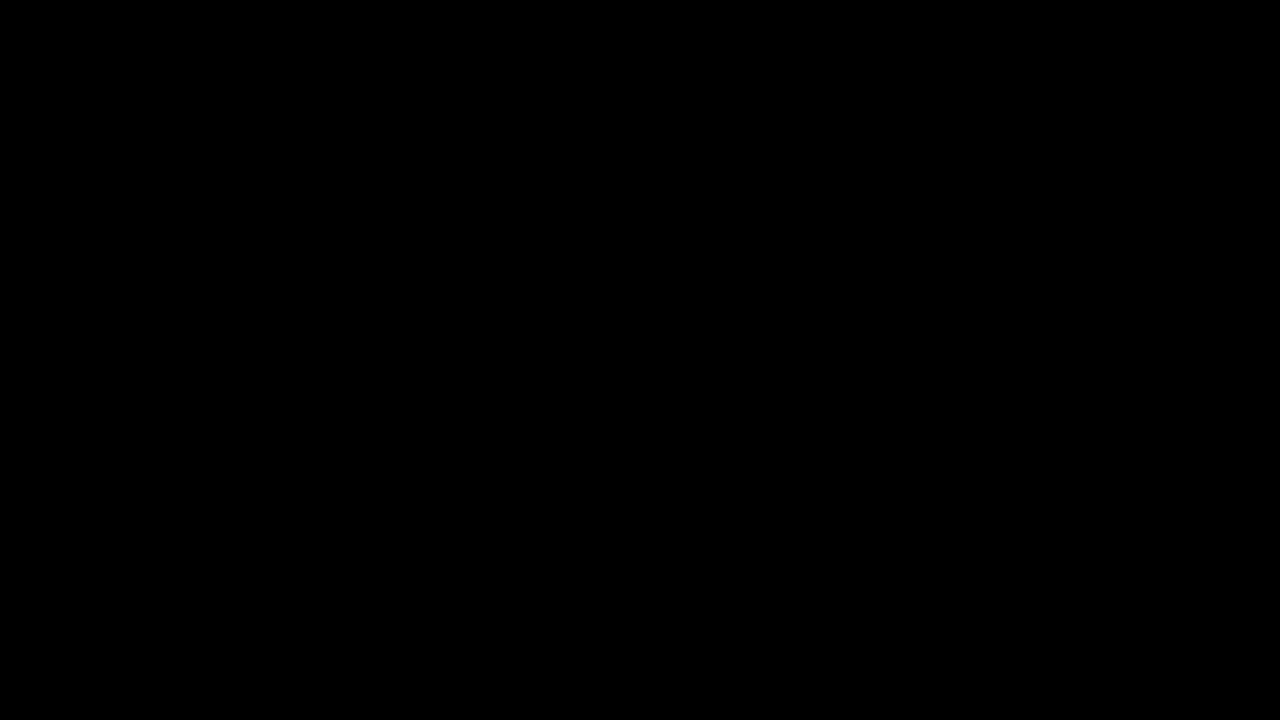

(720, 1280, 3)


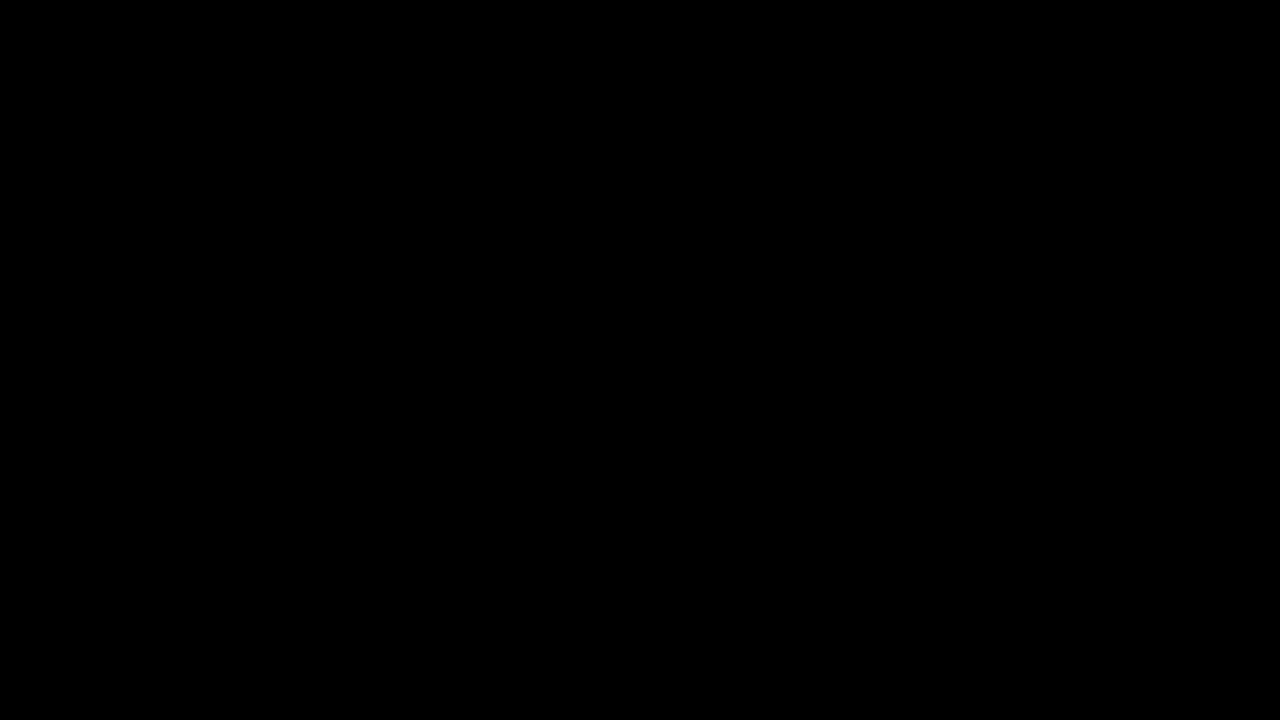

(720, 1280, 3)


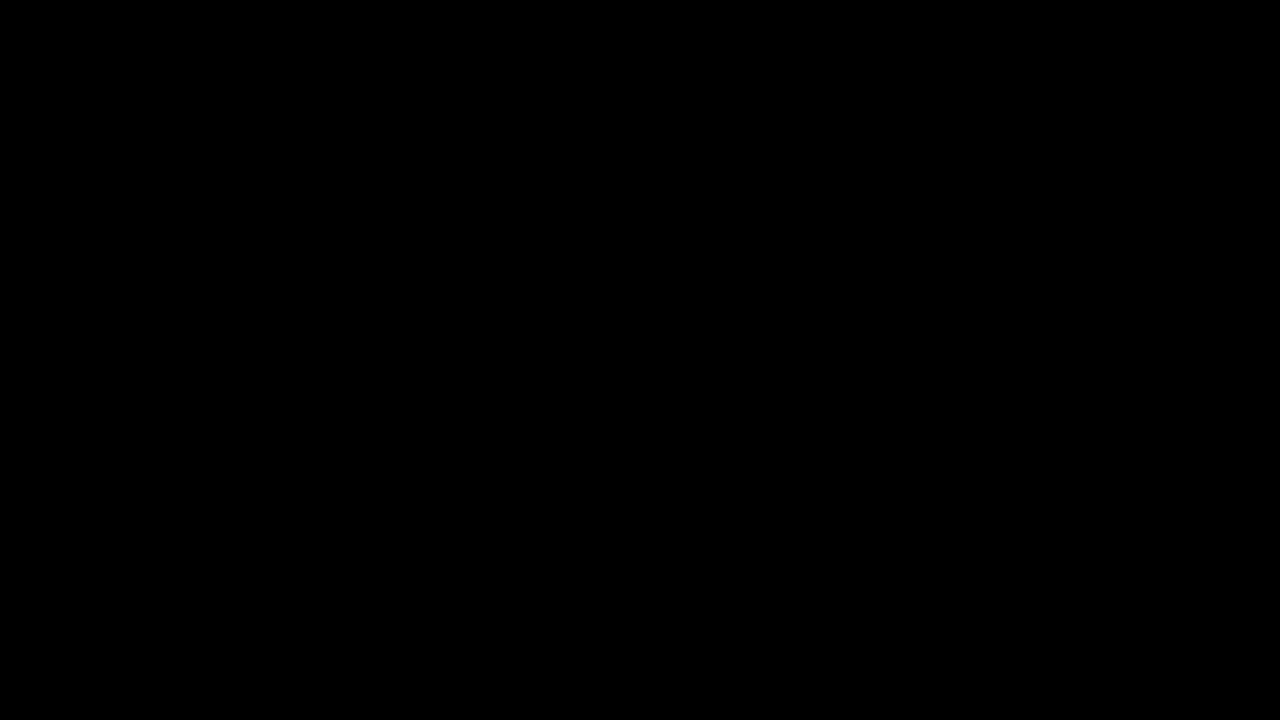

(720, 1280, 3)


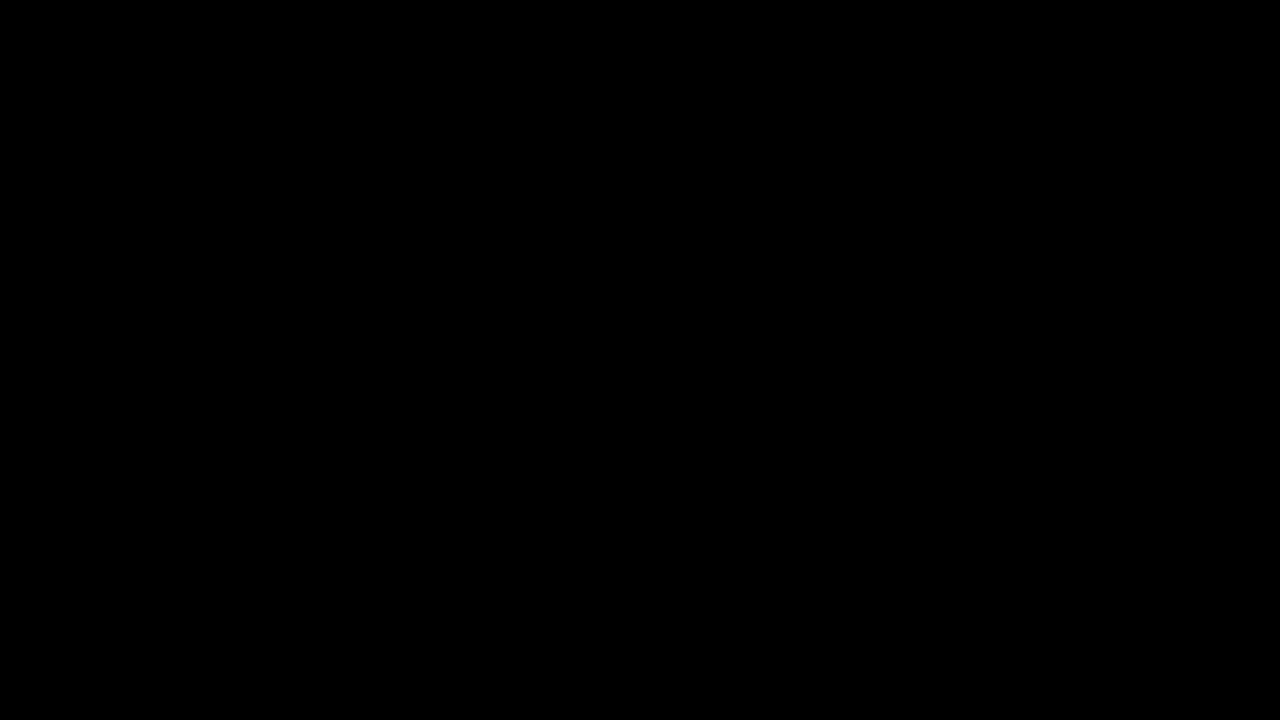

(720, 1280, 3)


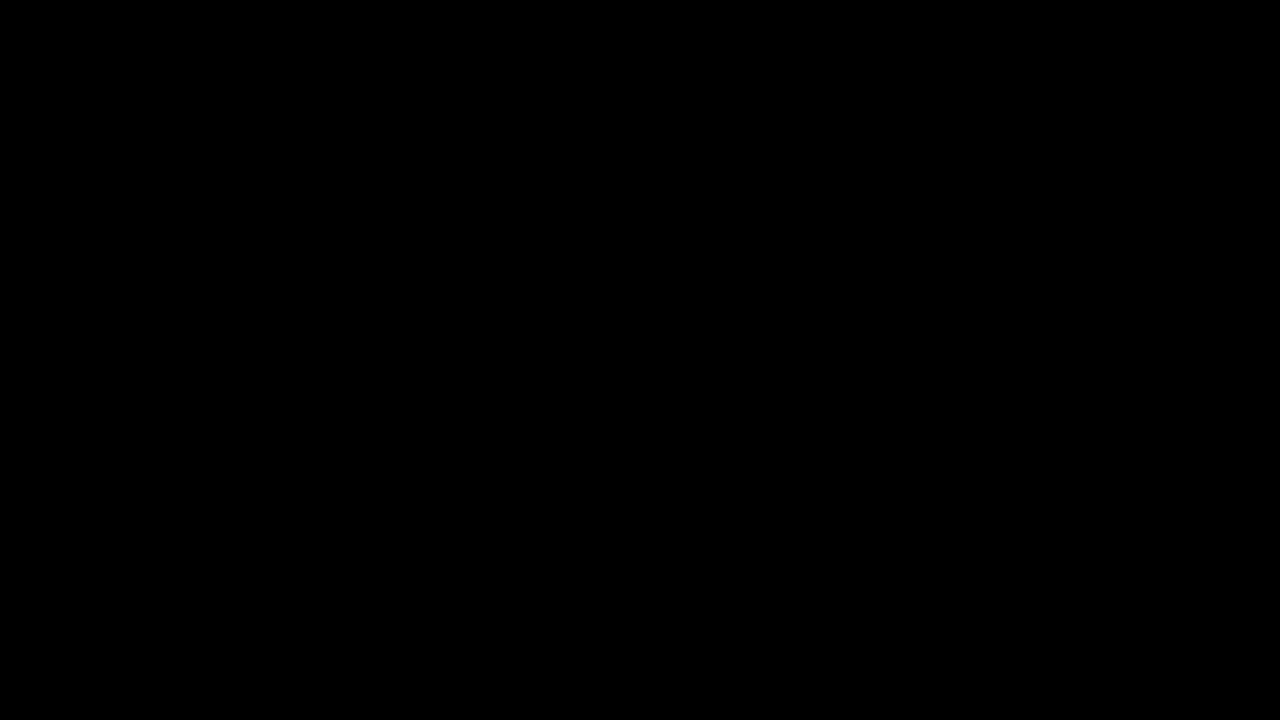

(720, 1280, 3)


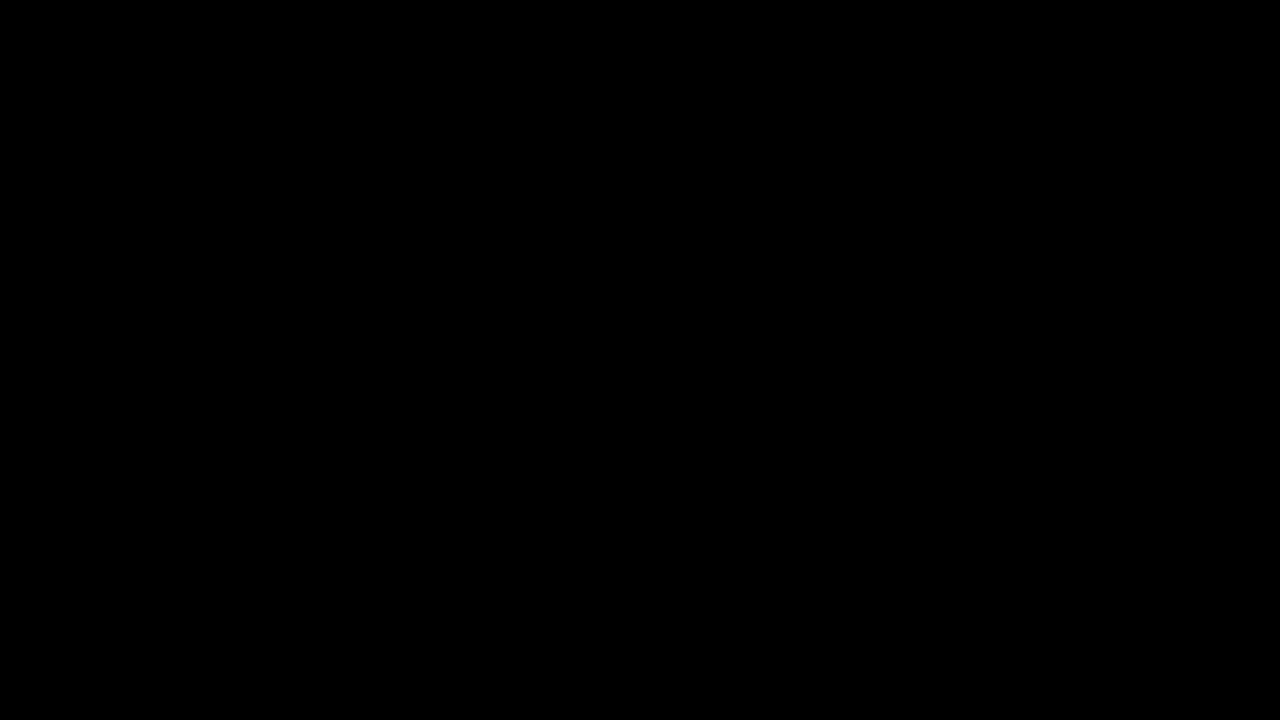

(720, 1280, 3)


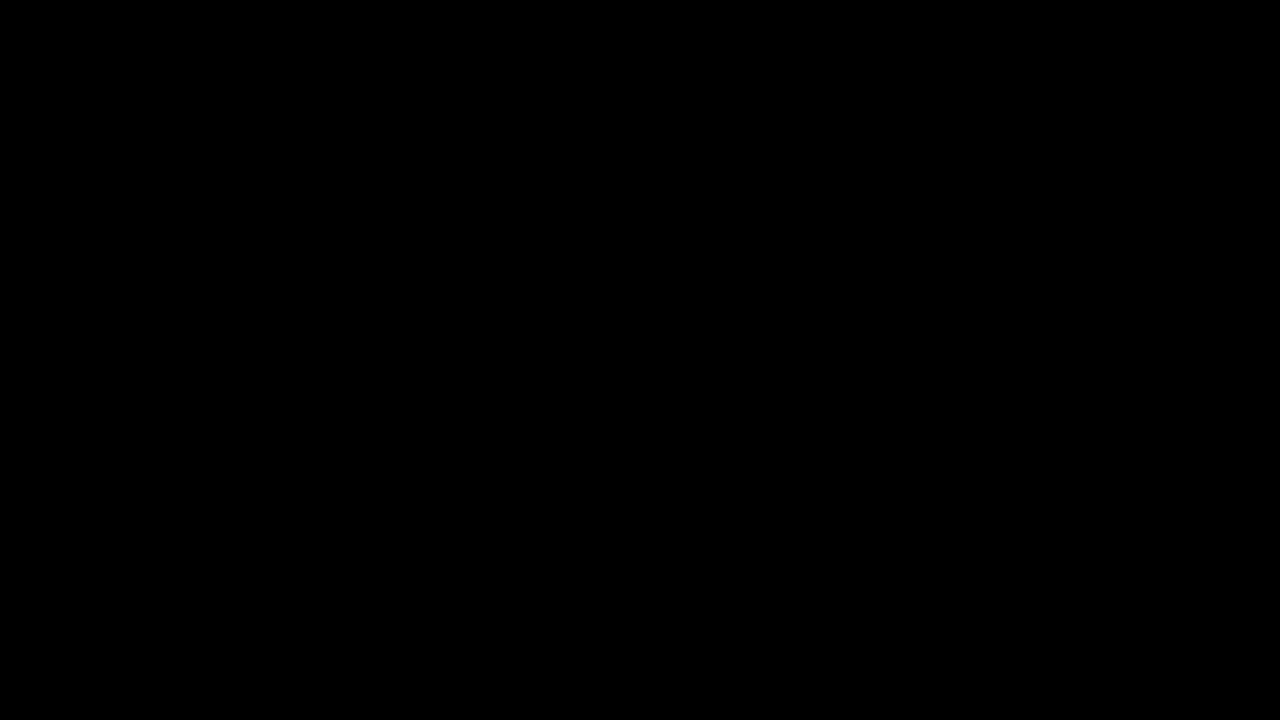

(720, 1280, 3)


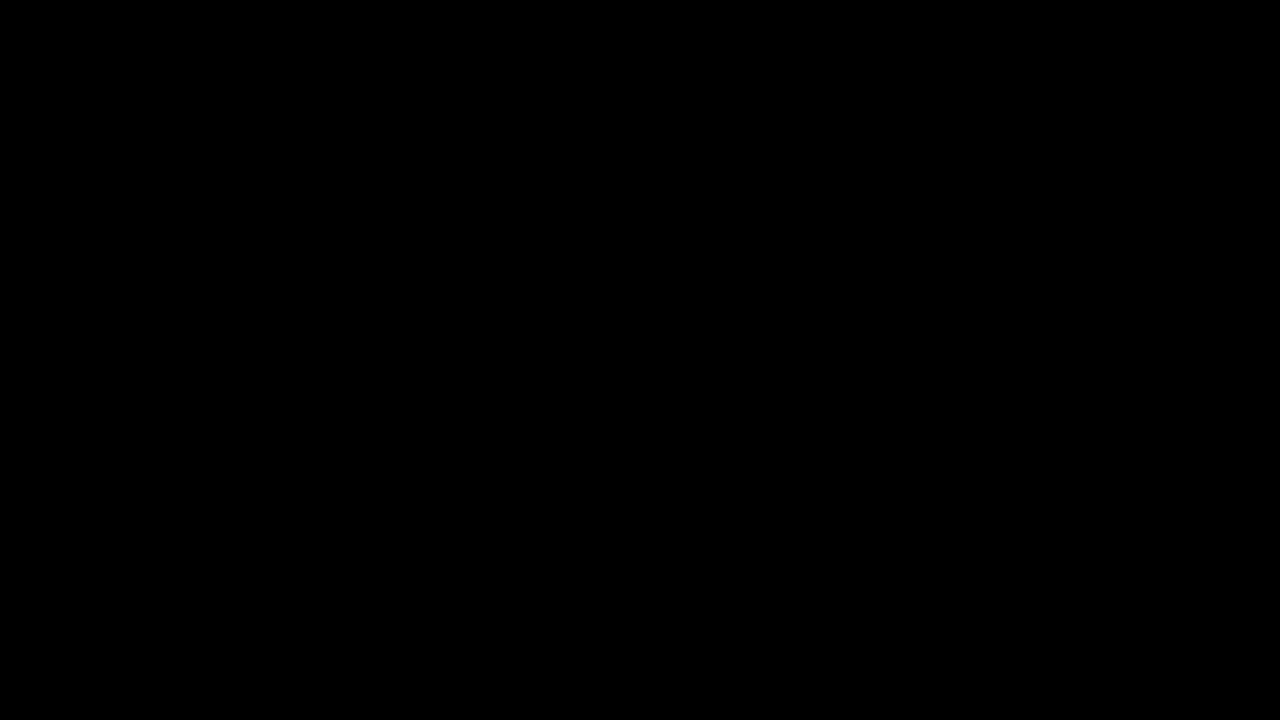

(720, 1280, 3)


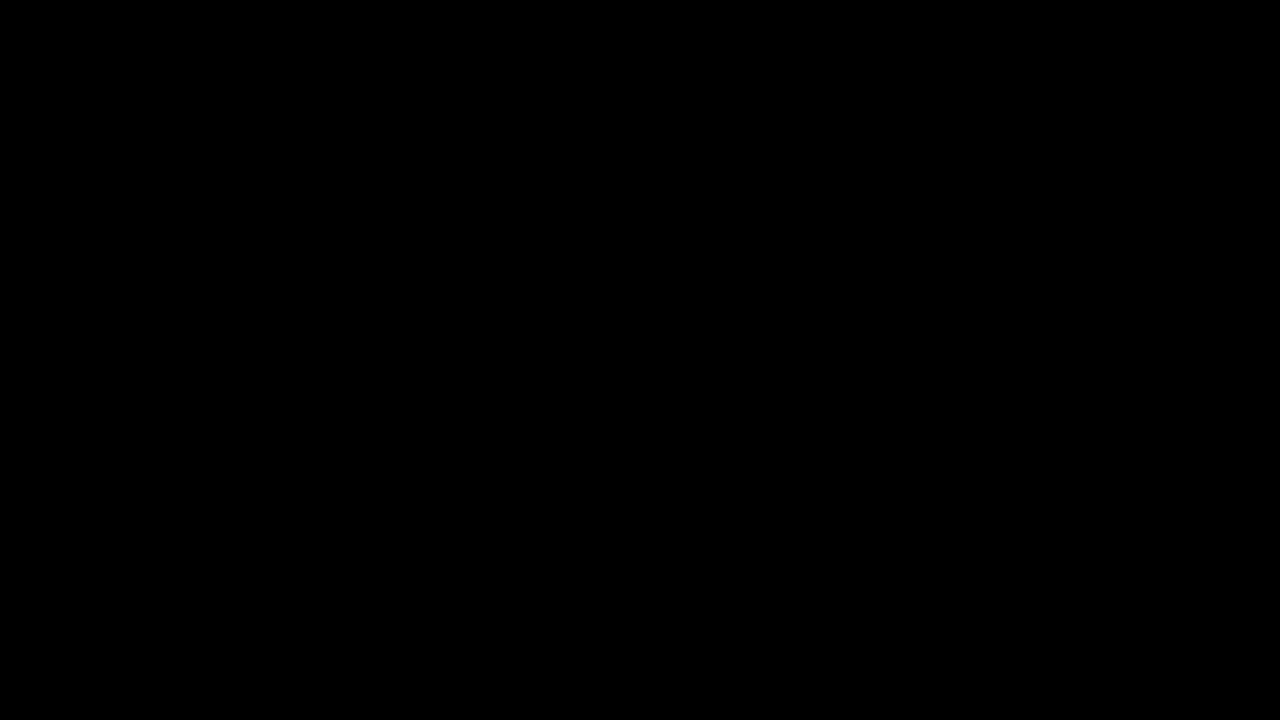

(720, 1280, 3)


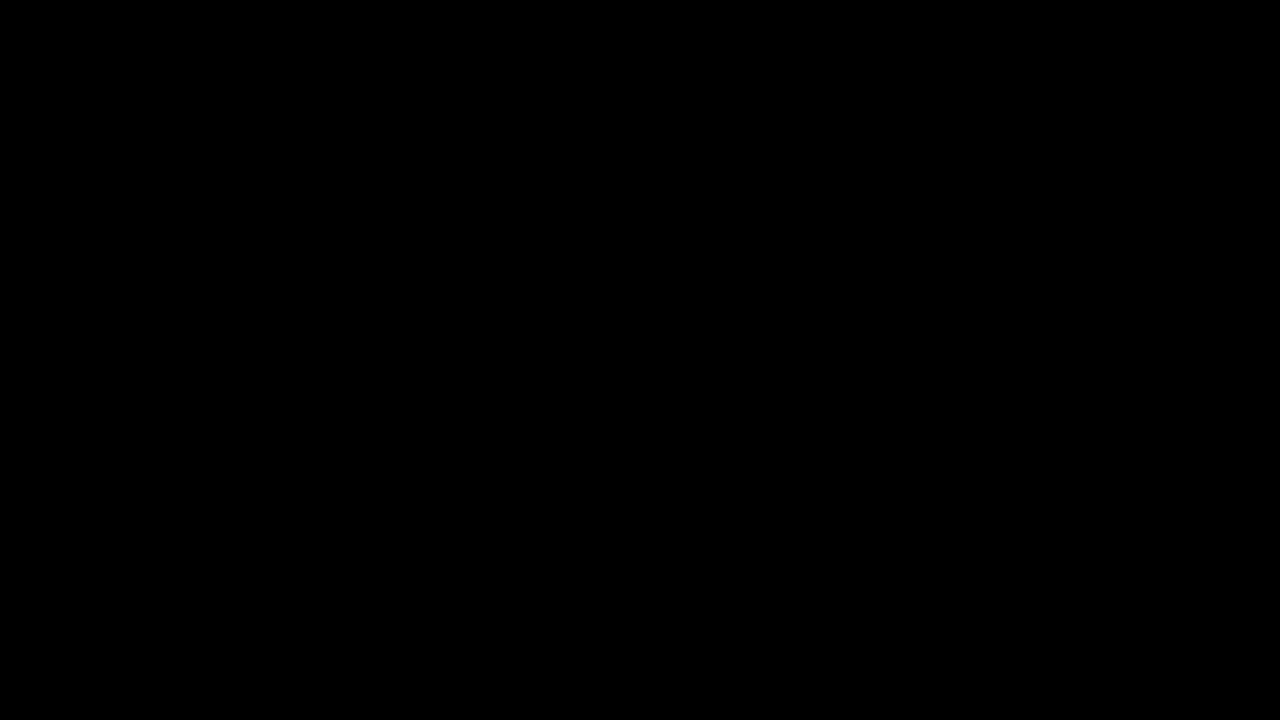

(720, 1280, 3)


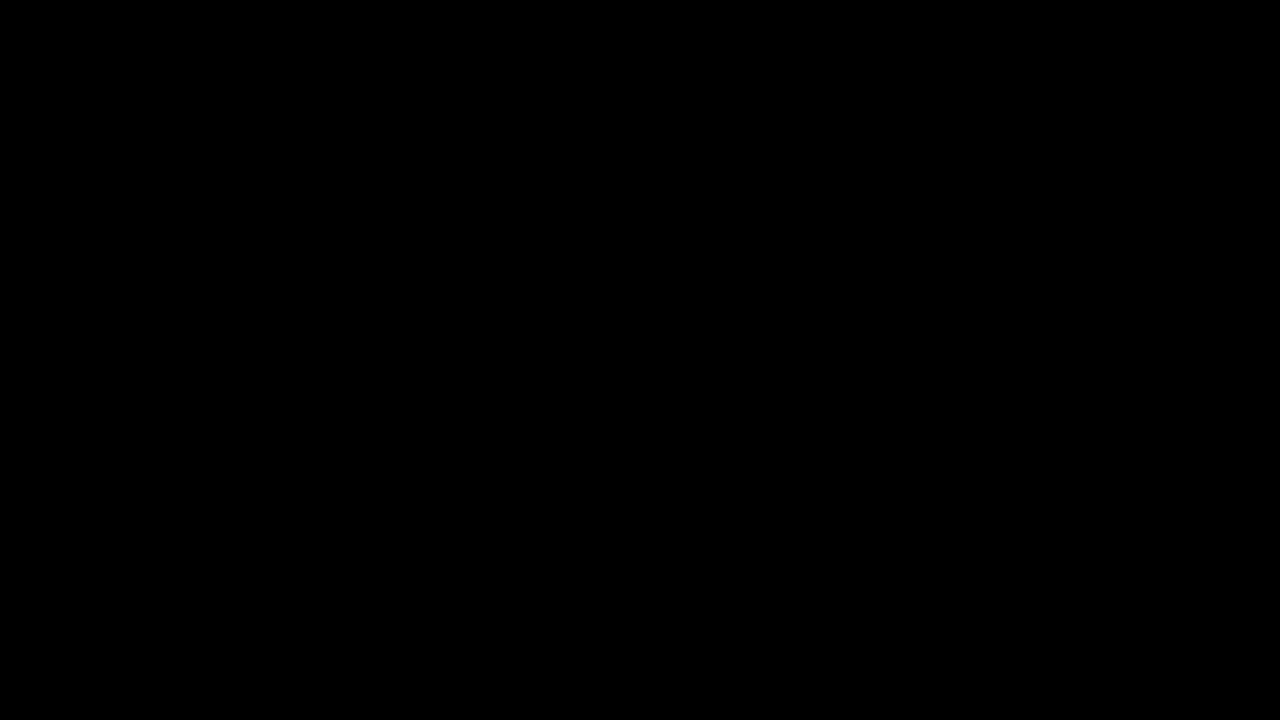

(720, 1280, 3)


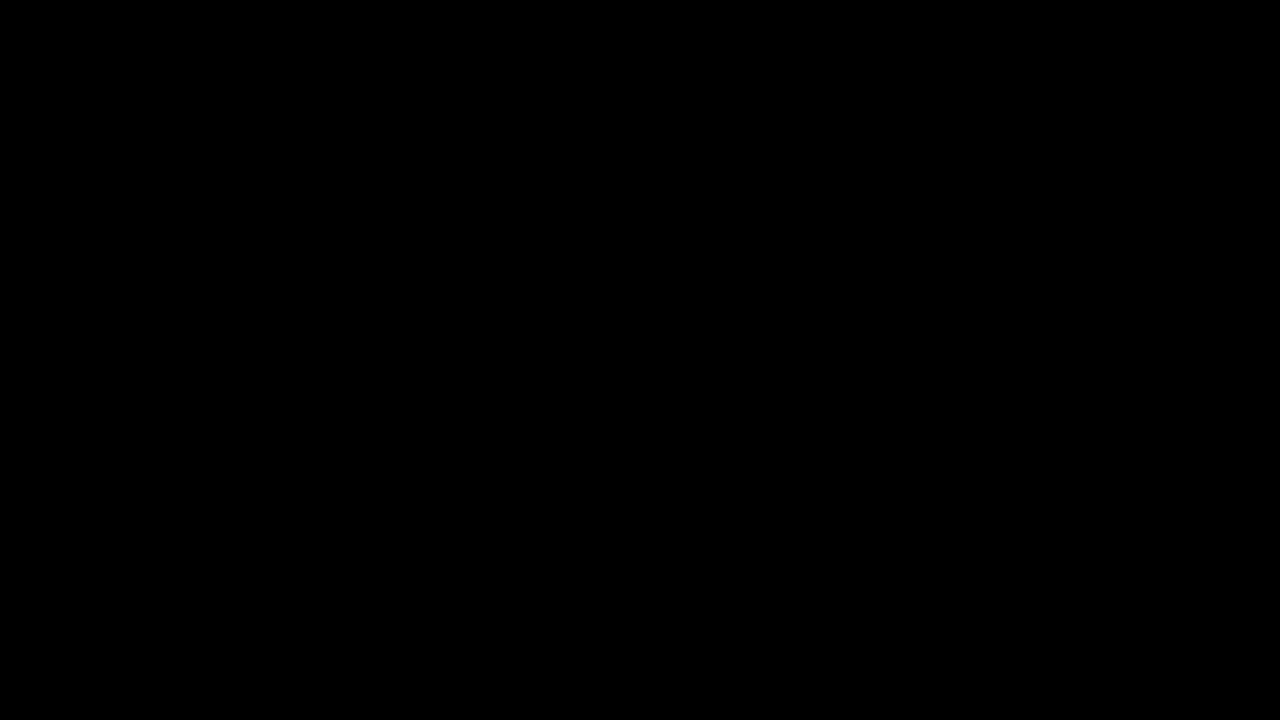

(720, 1280, 3)


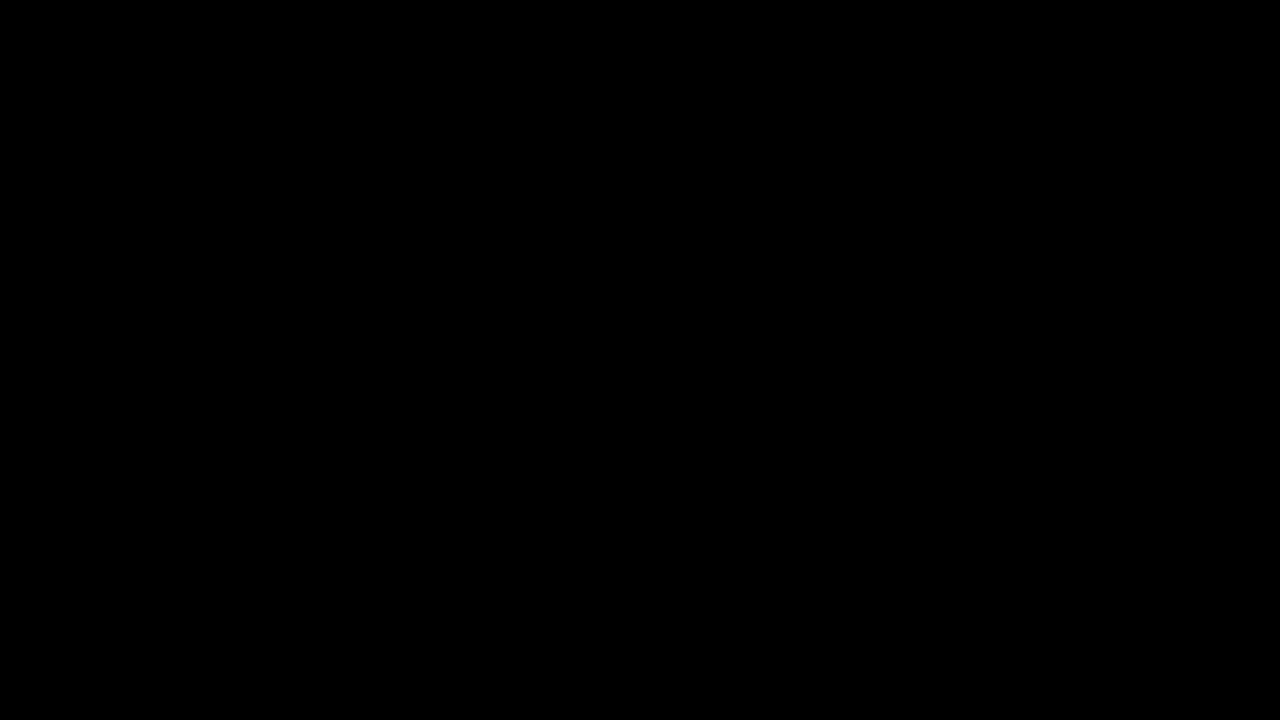

(720, 1280, 3)


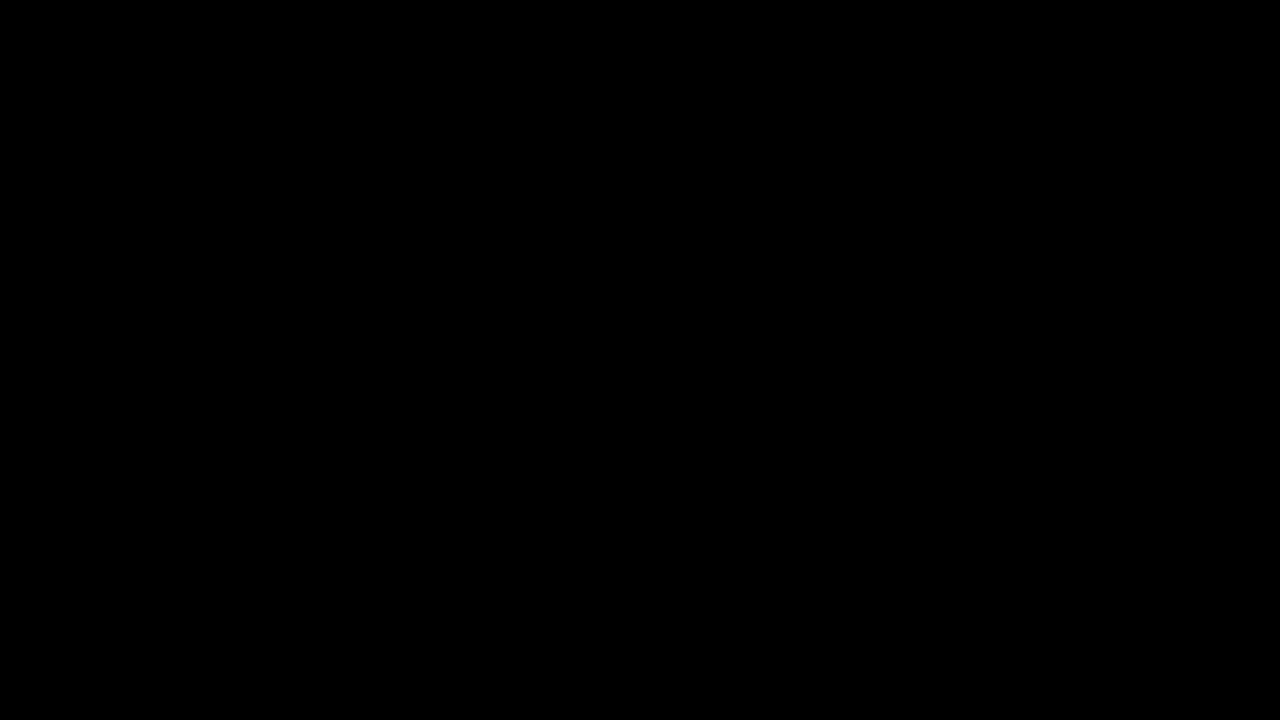

(720, 1280, 3)


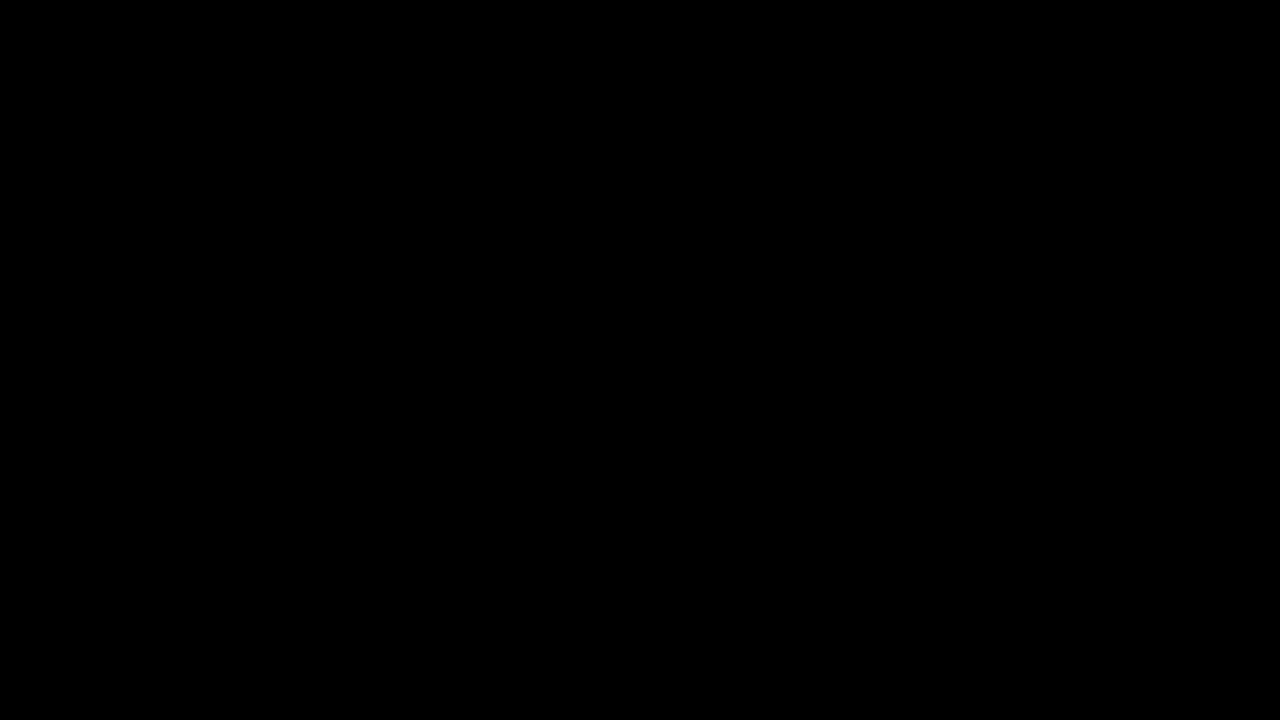

(720, 1280, 3)


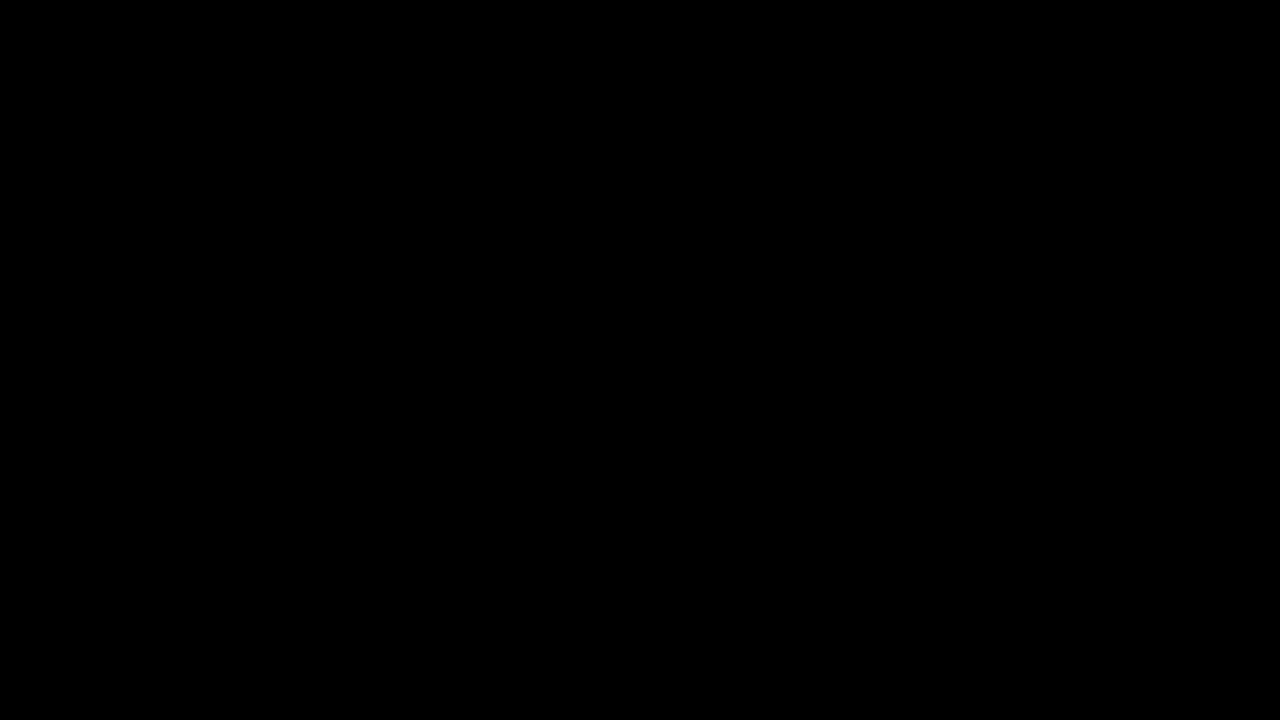

(720, 1280, 3)


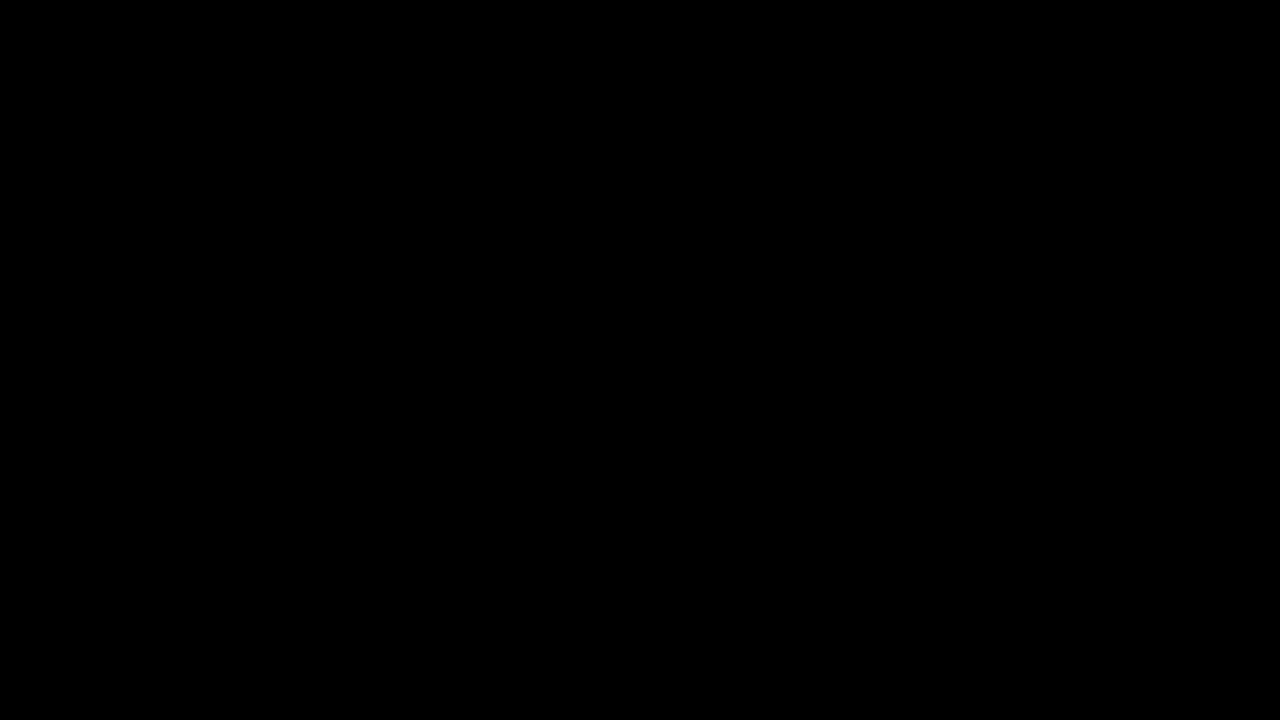

(720, 1280, 3)


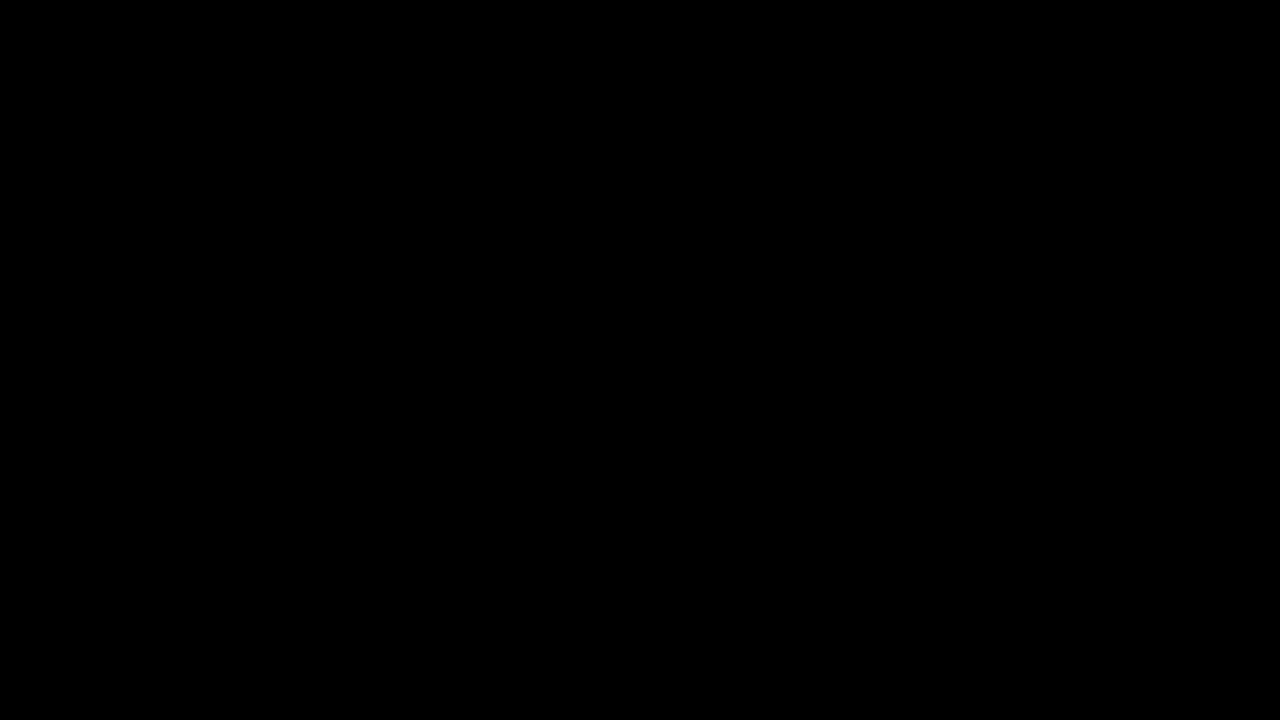

(720, 1280, 3)


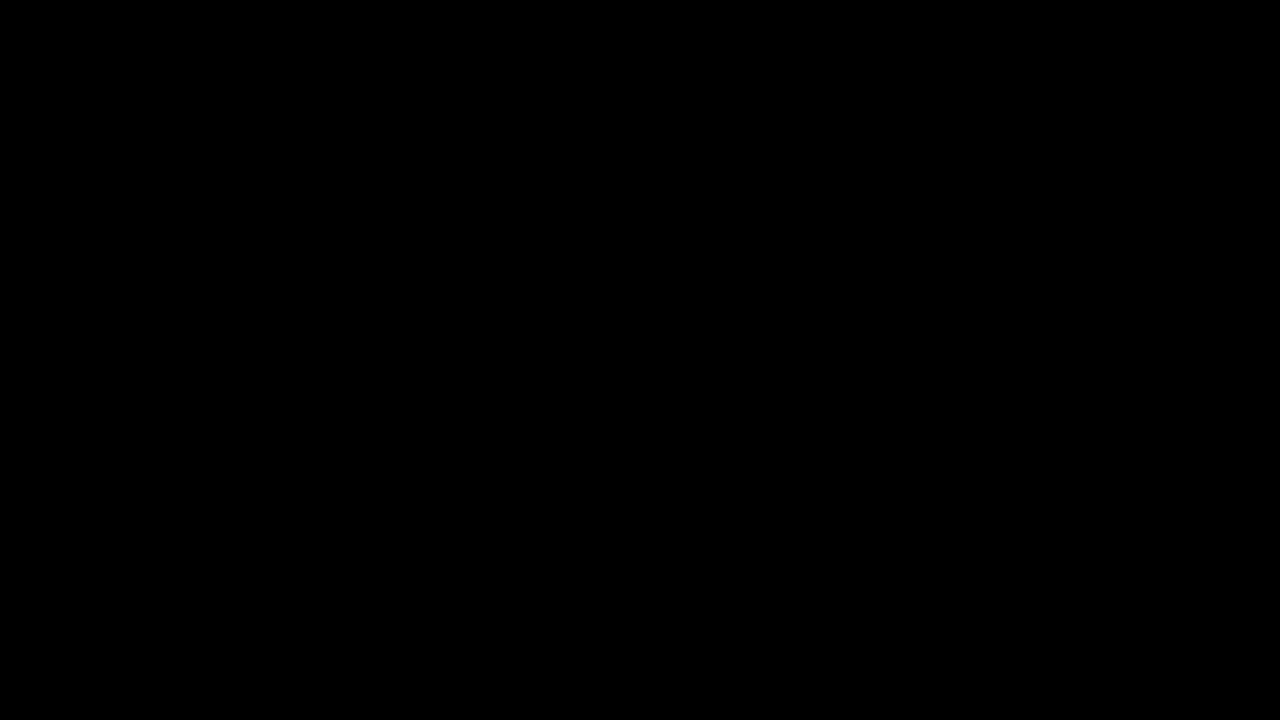

(720, 1280, 3)


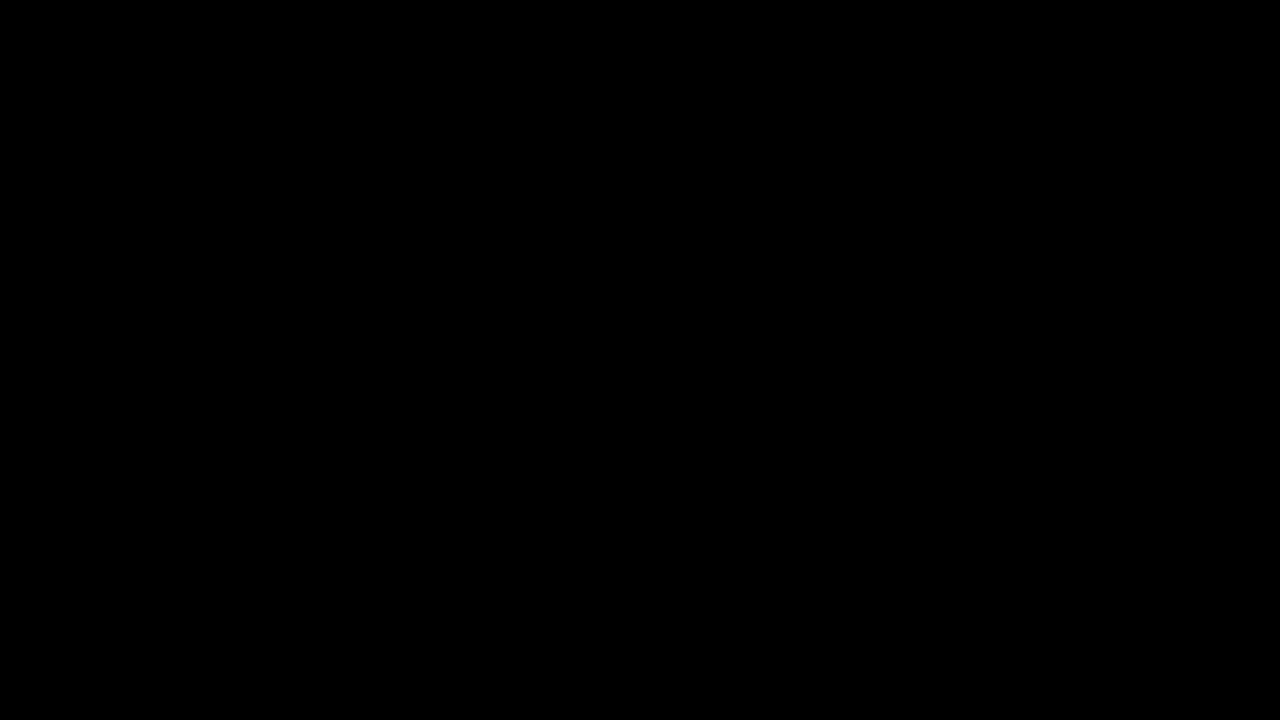

(720, 1280, 3)


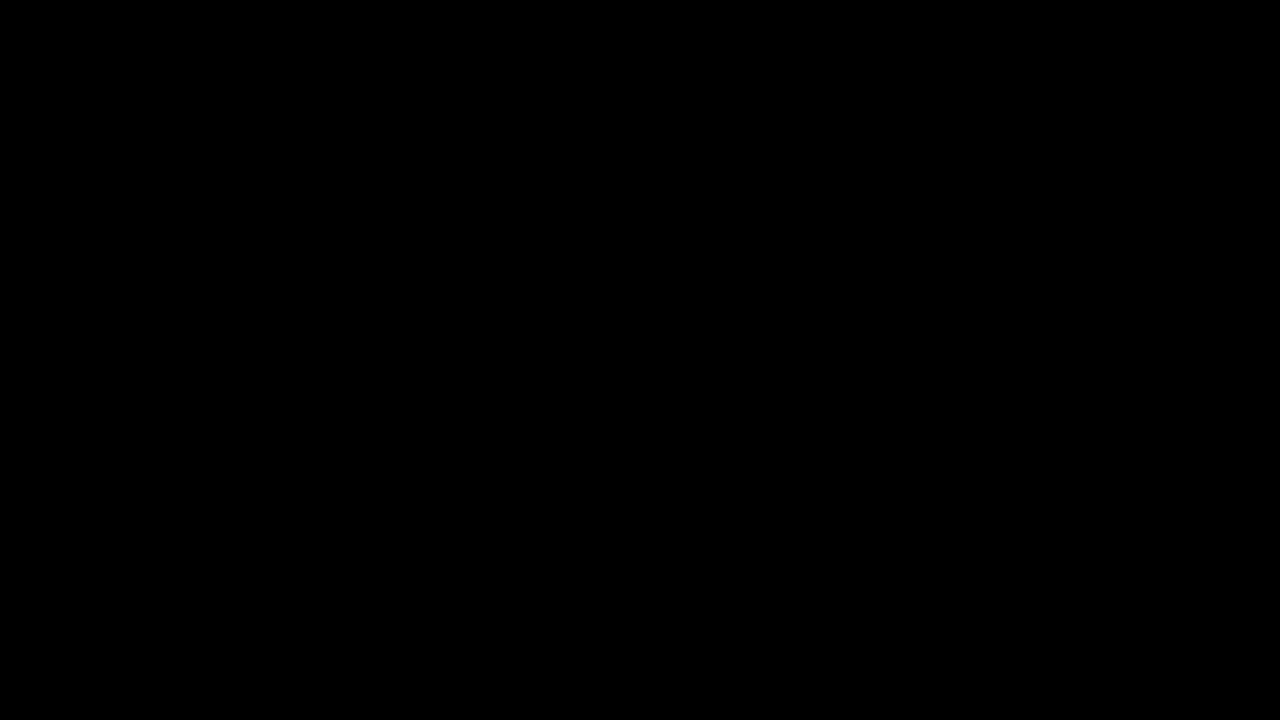

(720, 1280, 3)


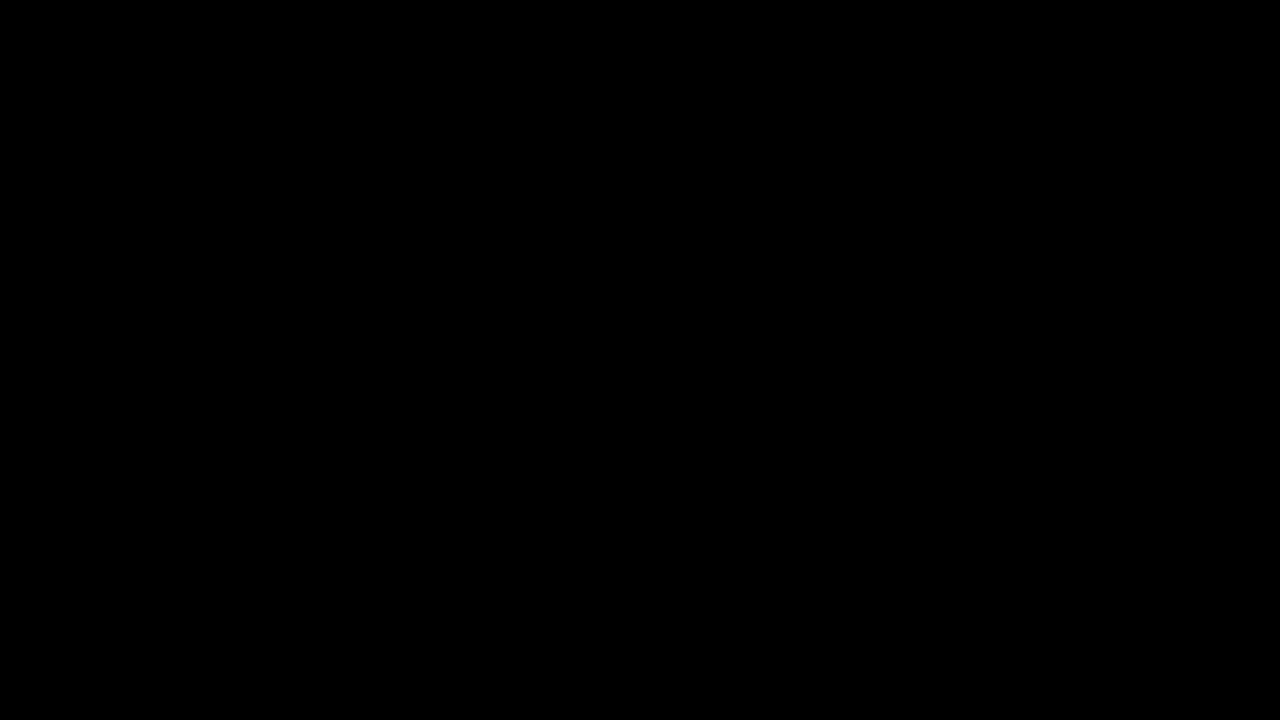

(720, 1280, 3)


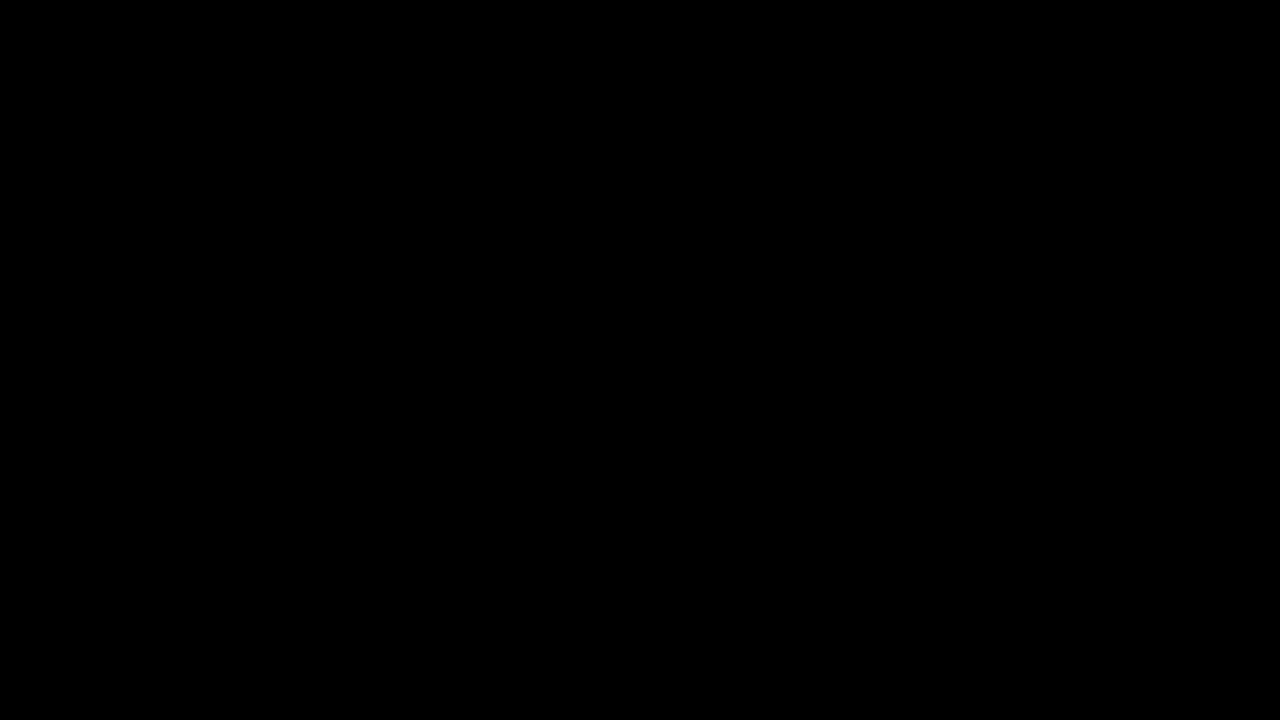

(720, 1280, 3)


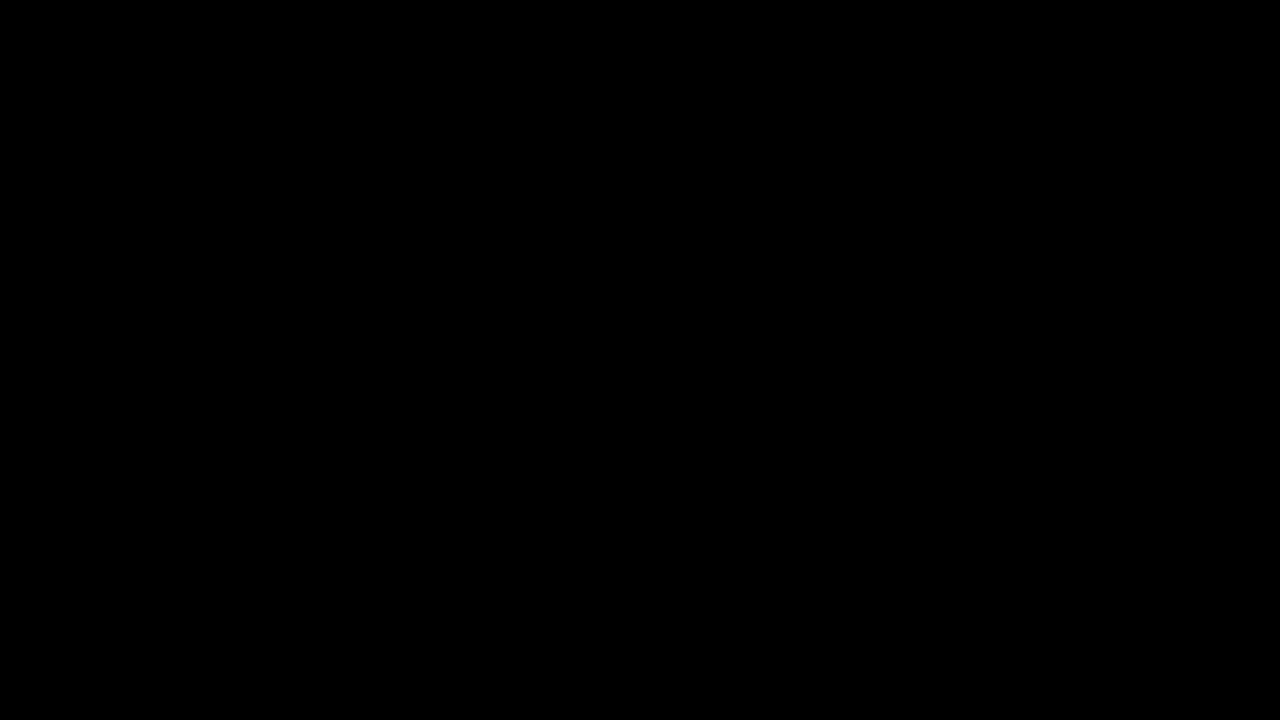

(720, 1280, 3)


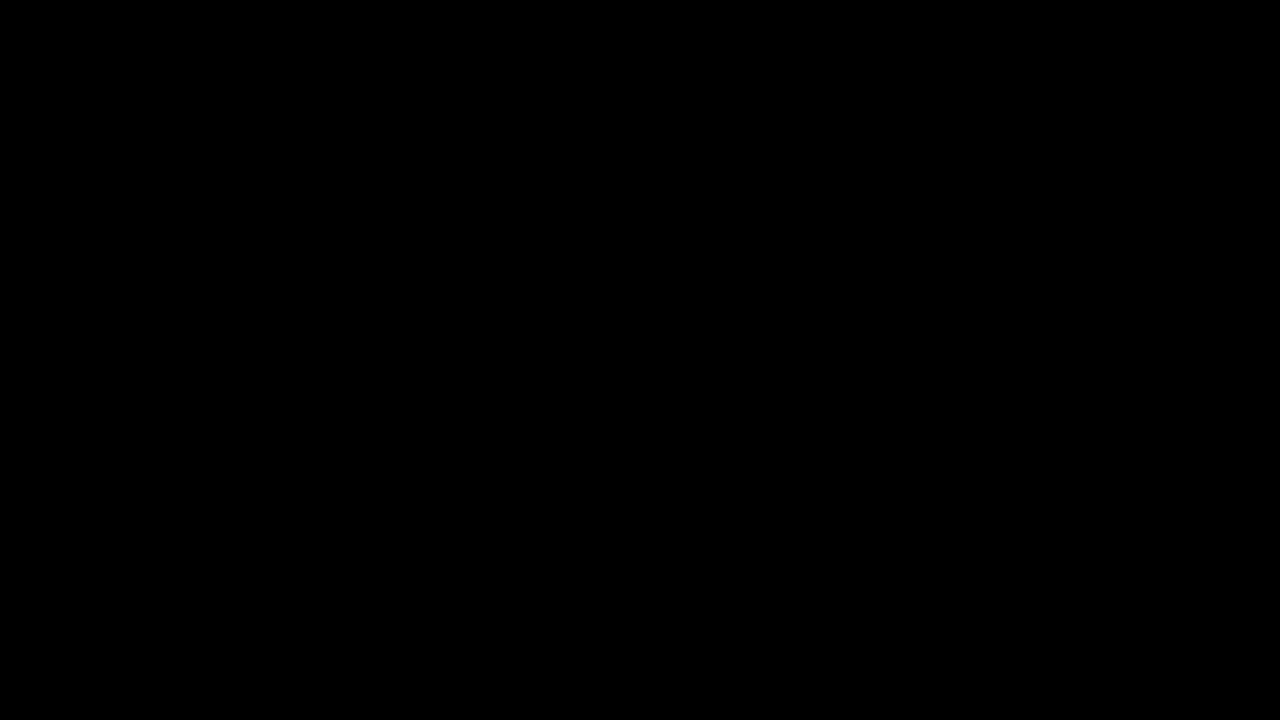

(720, 1280, 3)


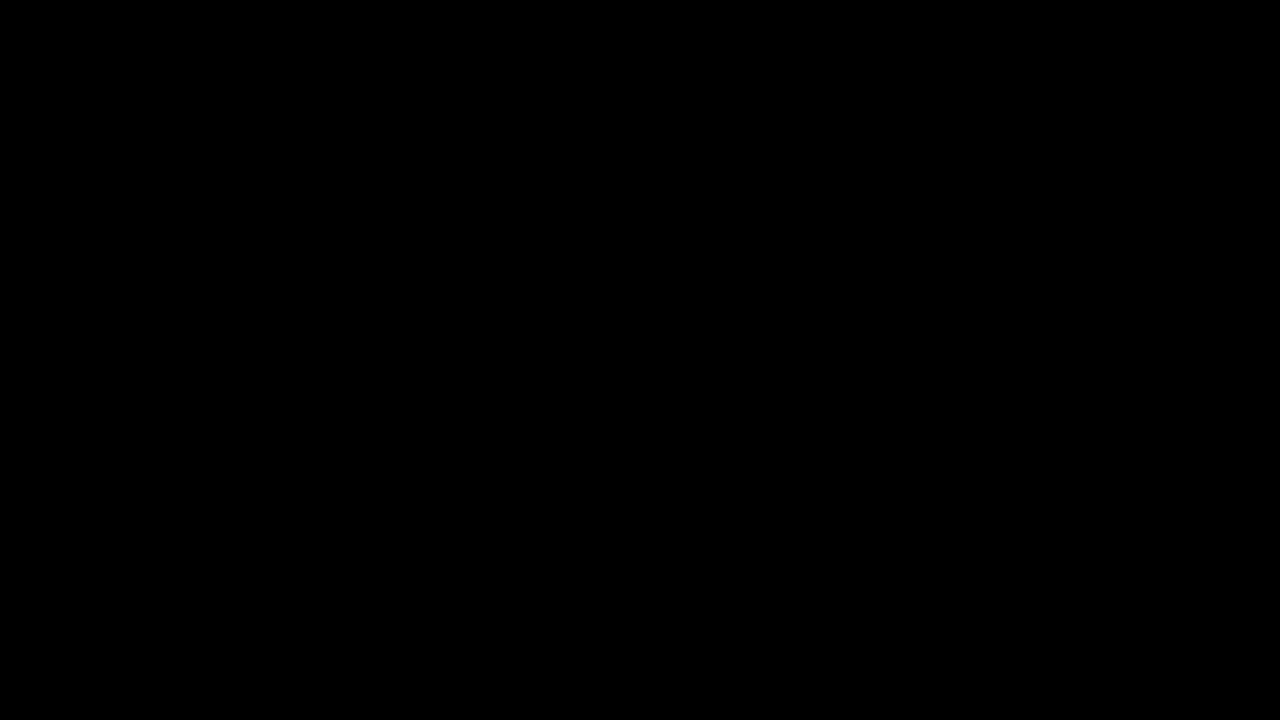

(720, 1280, 3)


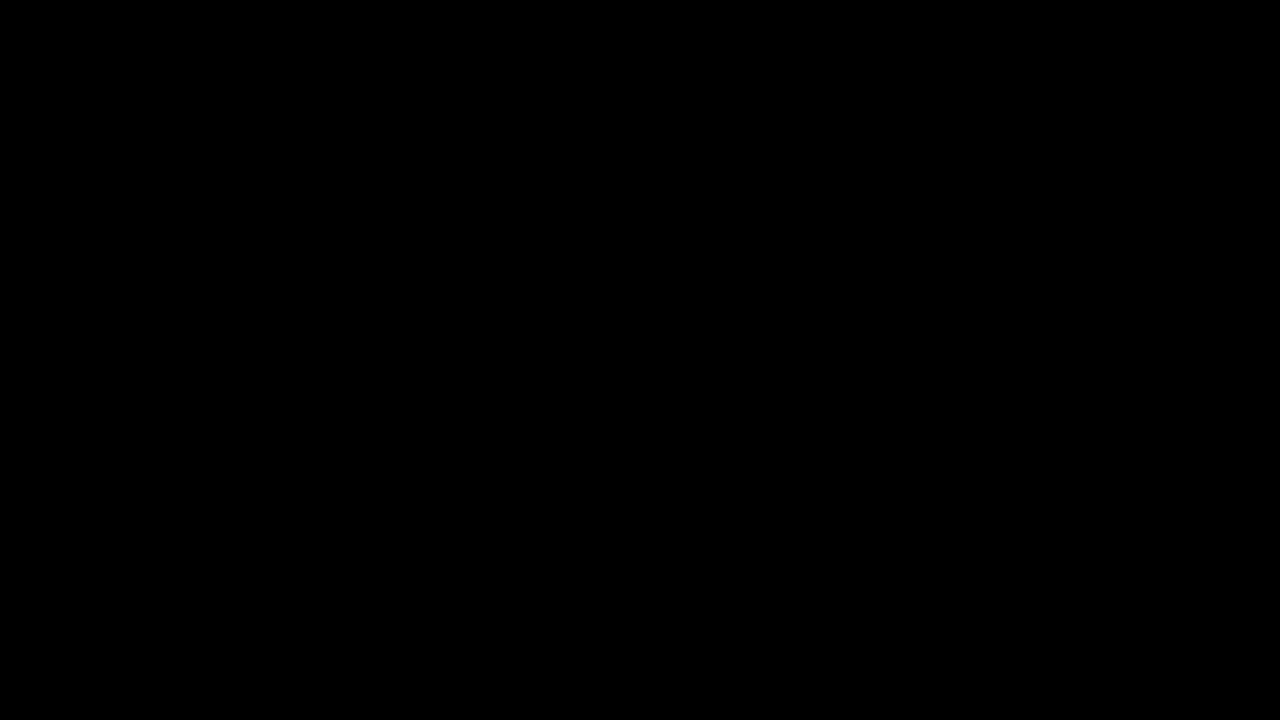

(720, 1280, 3)


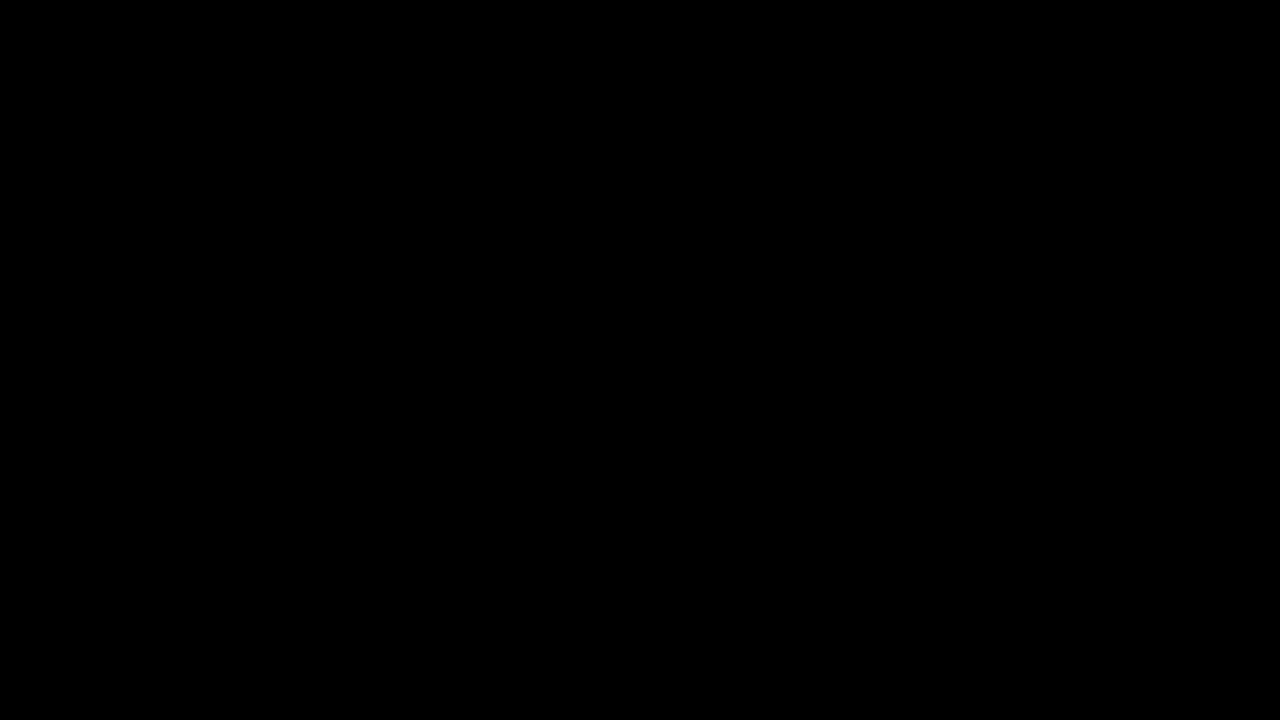

(720, 1280, 3)


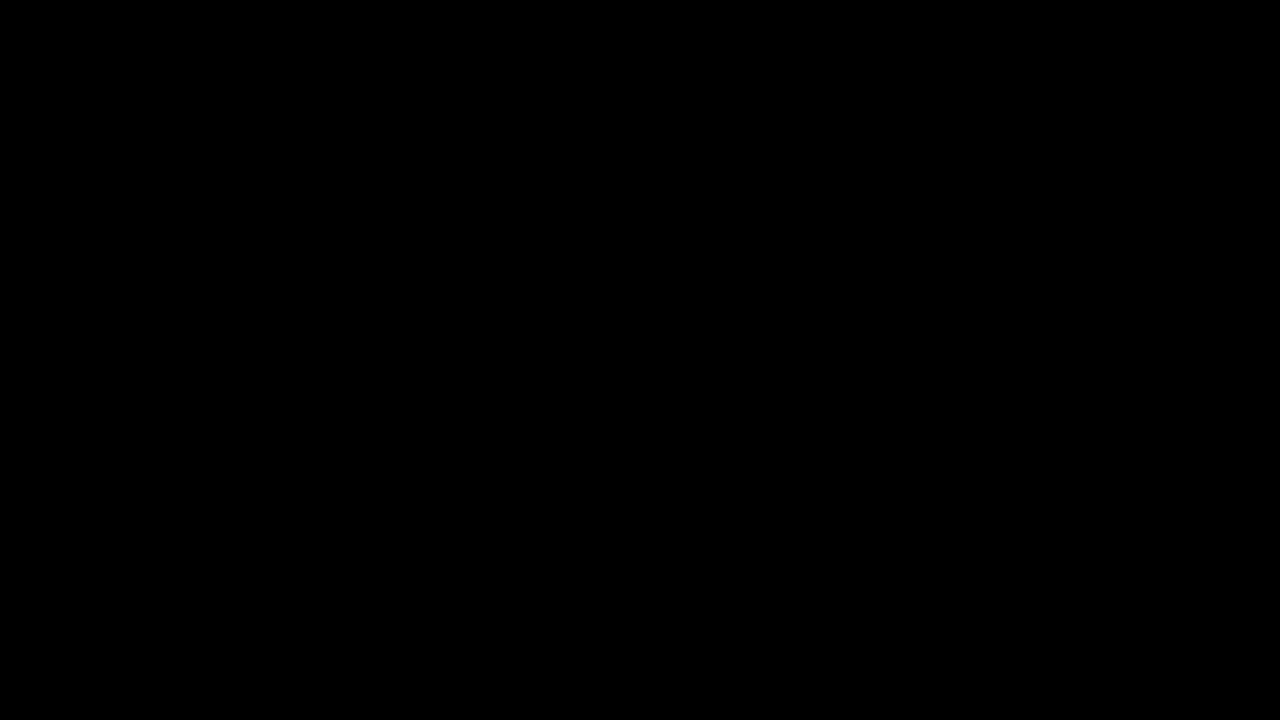

(720, 1280, 3)


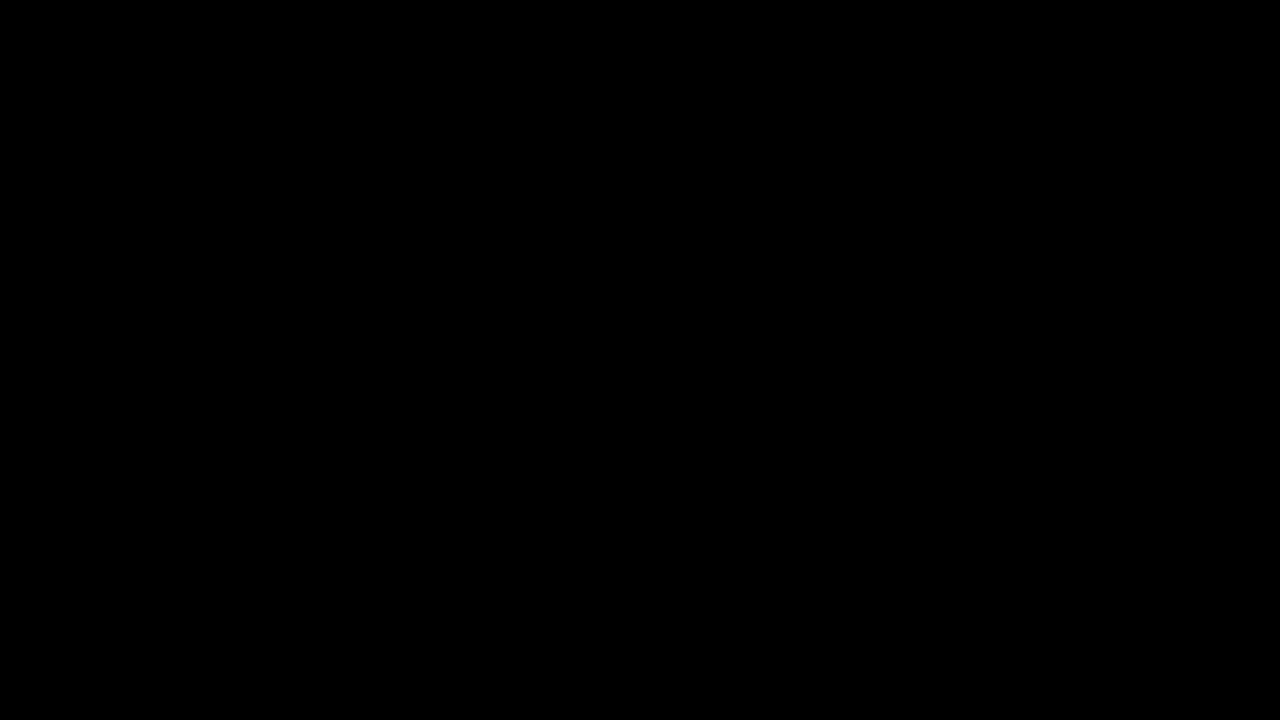

(720, 1280, 3)


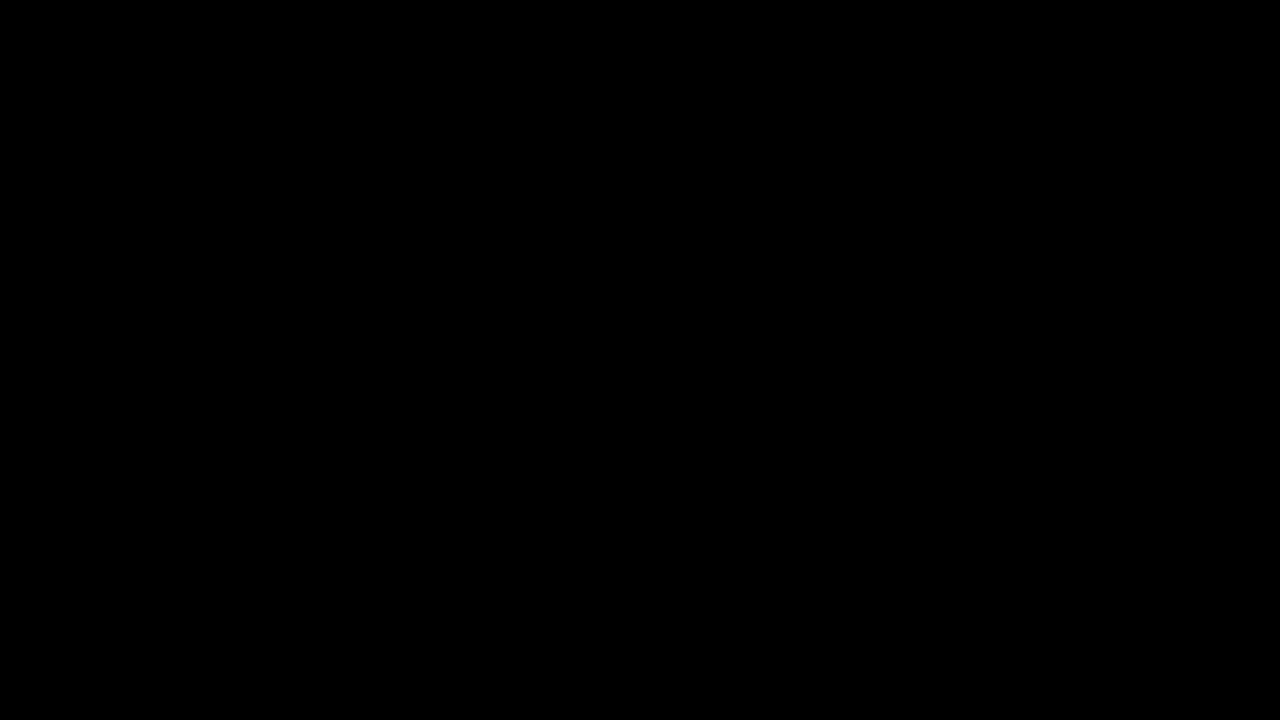

(720, 1280, 3)


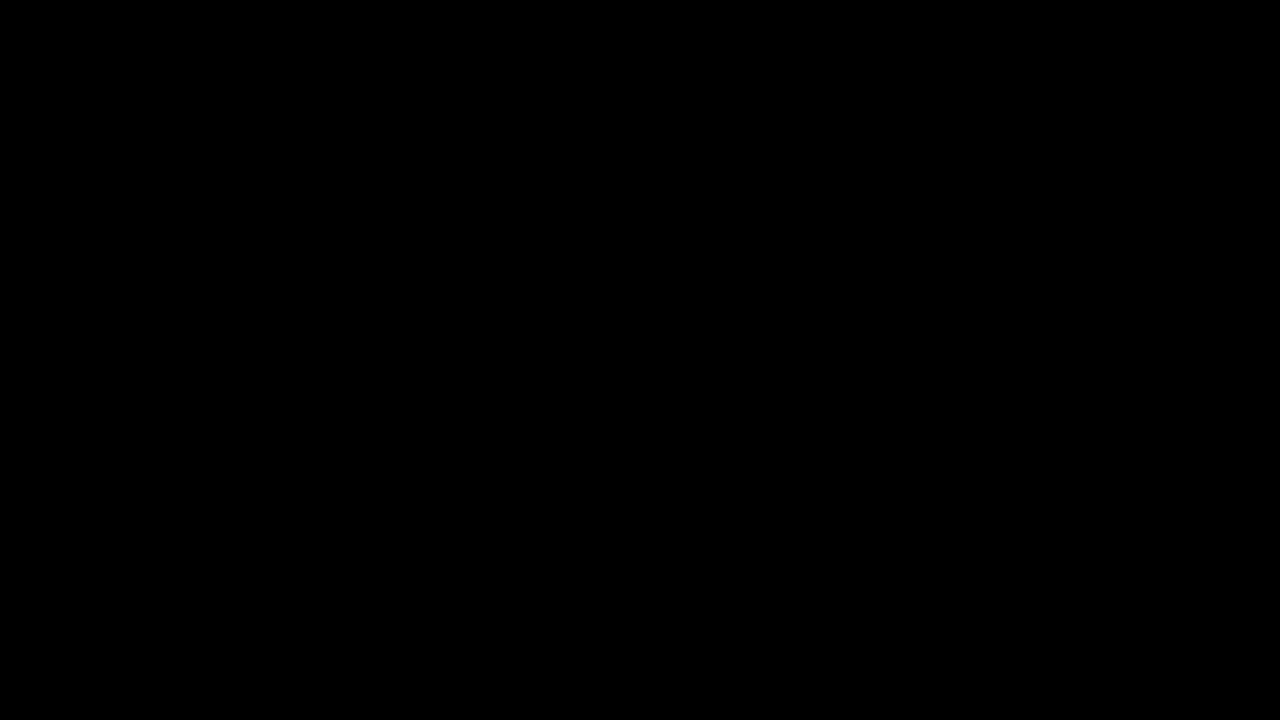

(720, 1280, 3)


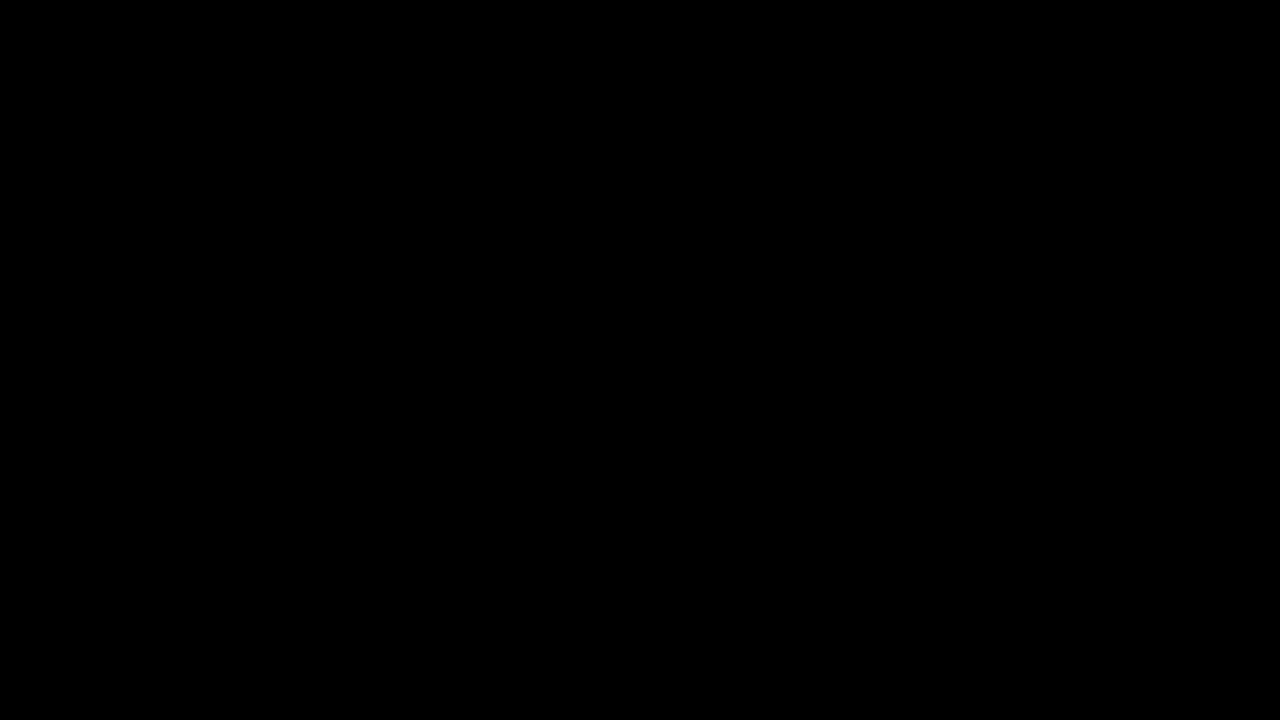

(720, 1280, 3)


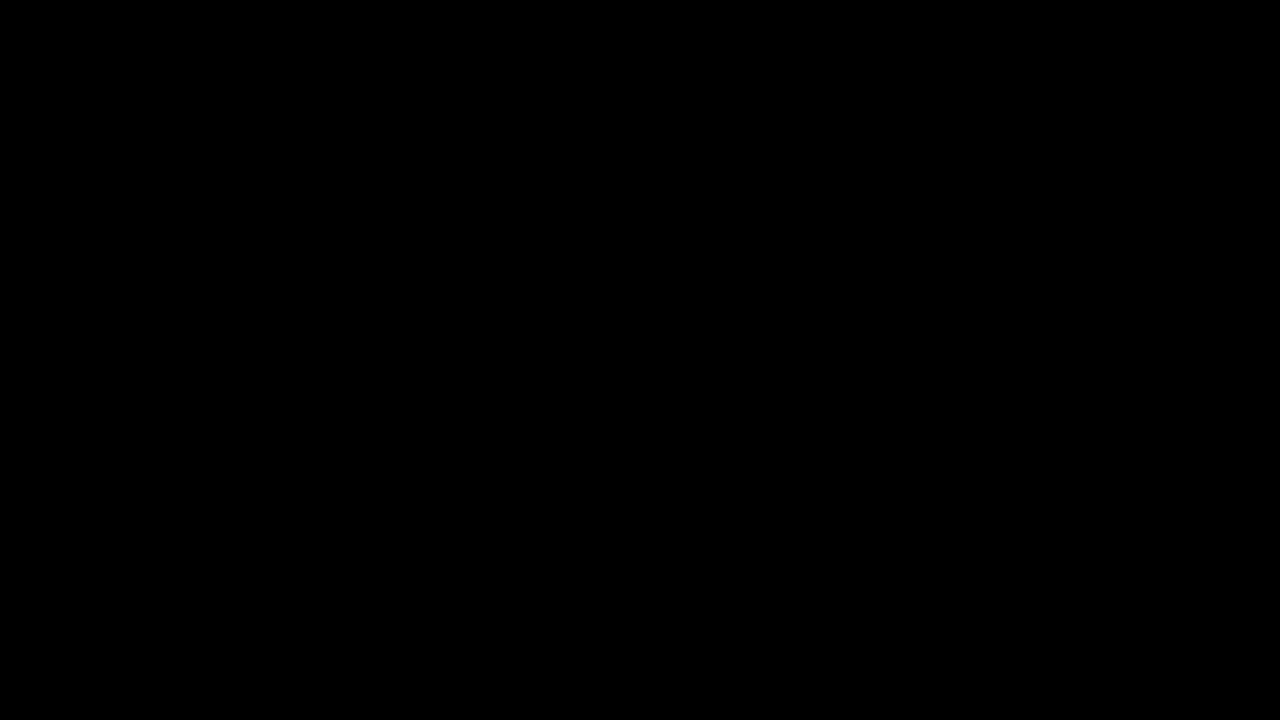

(720, 1280, 3)


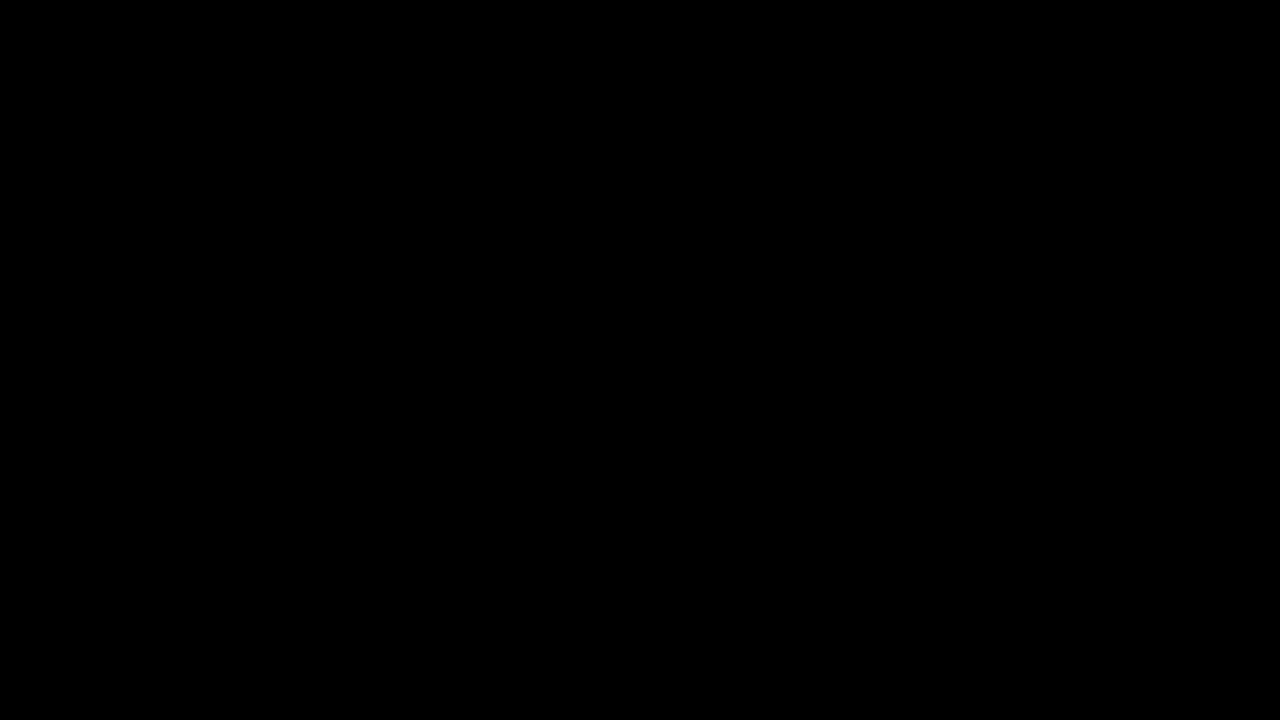

(720, 1280, 3)


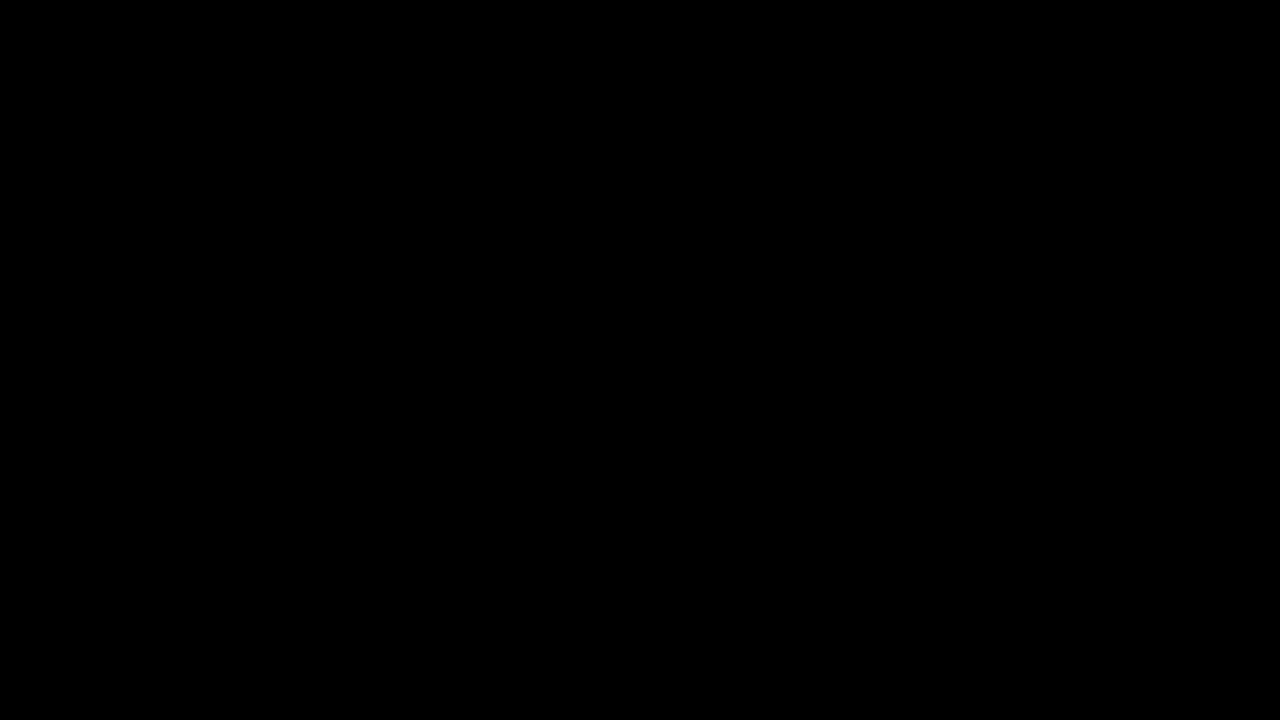

(720, 1280, 3)


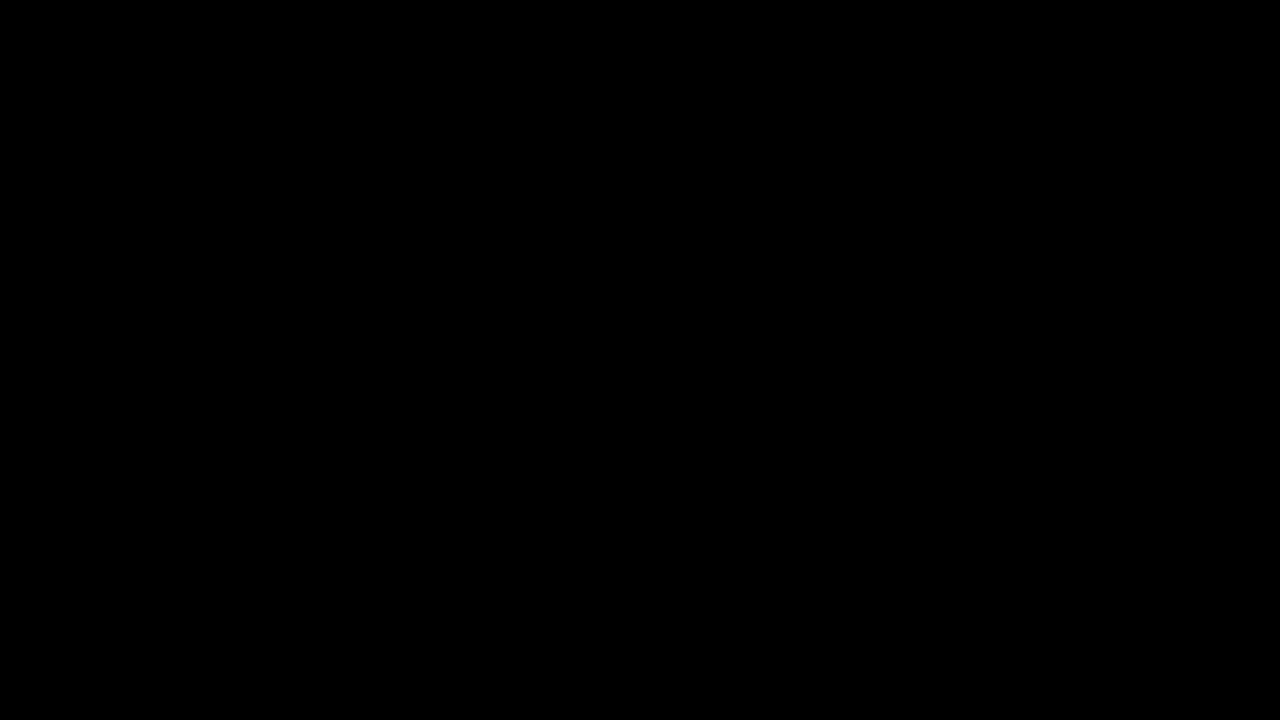

(720, 1280, 3)


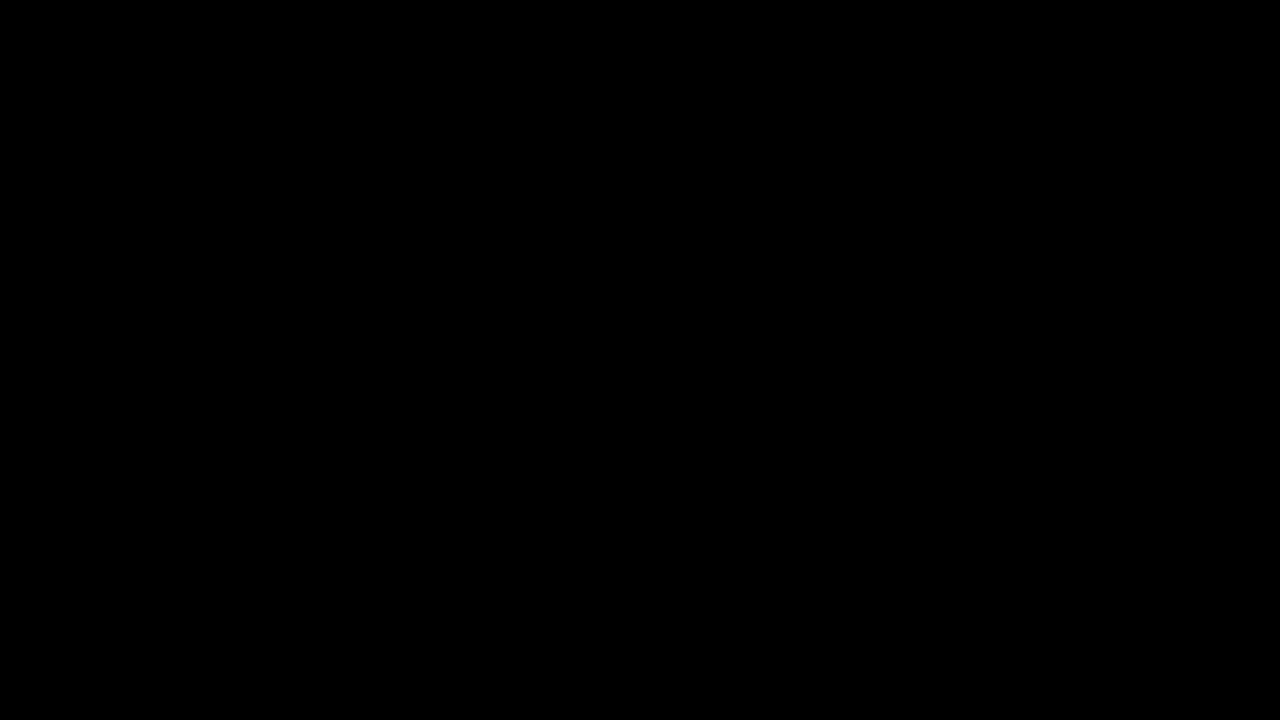

(720, 1280, 3)


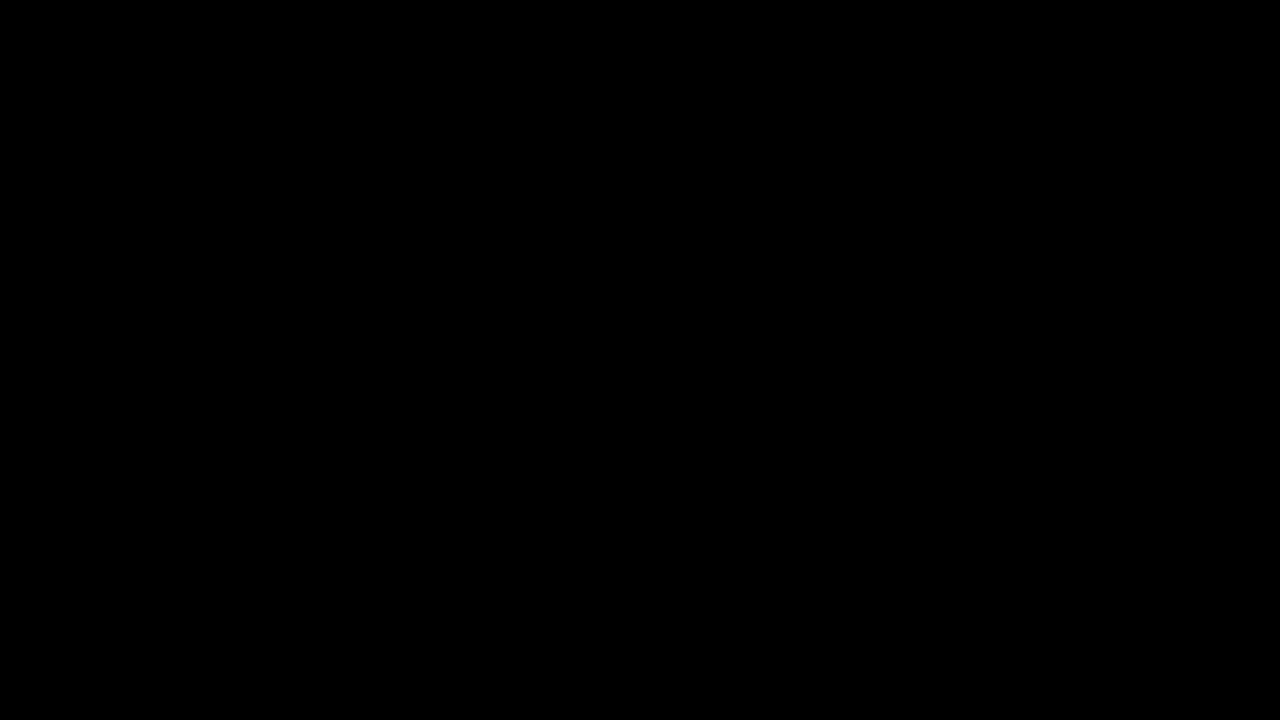

(720, 1280, 3)


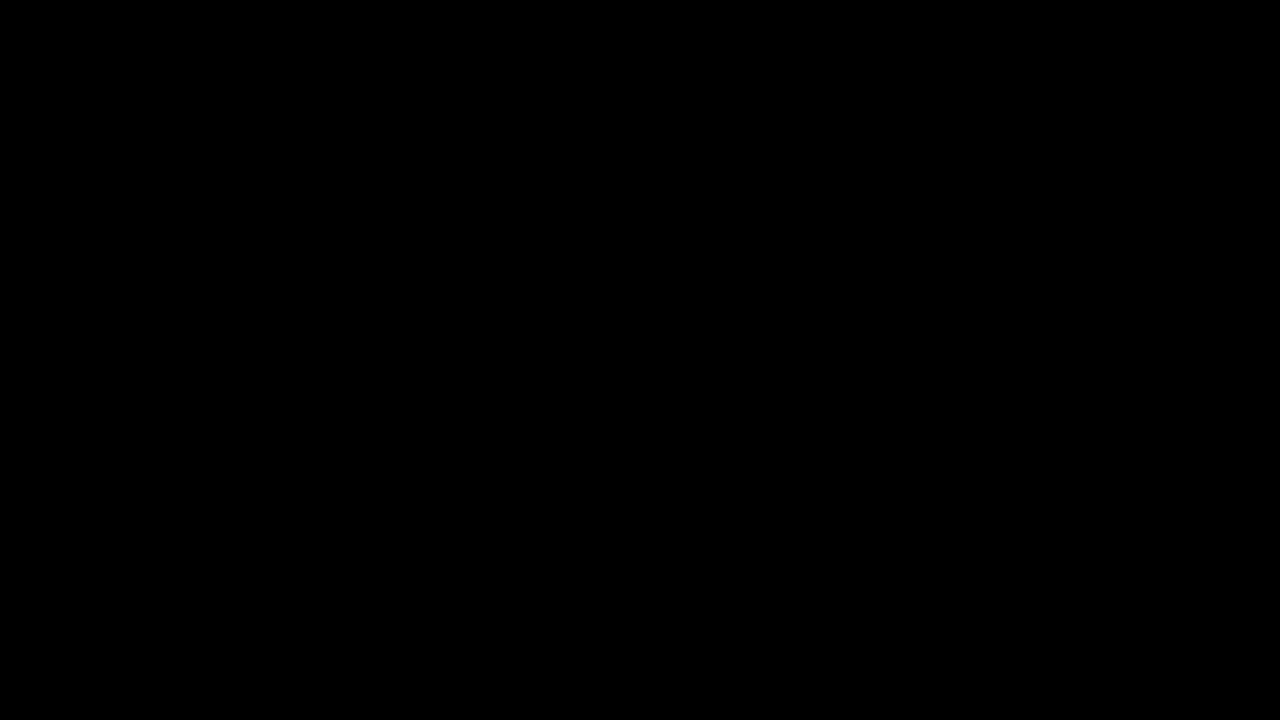

(720, 1280, 3)


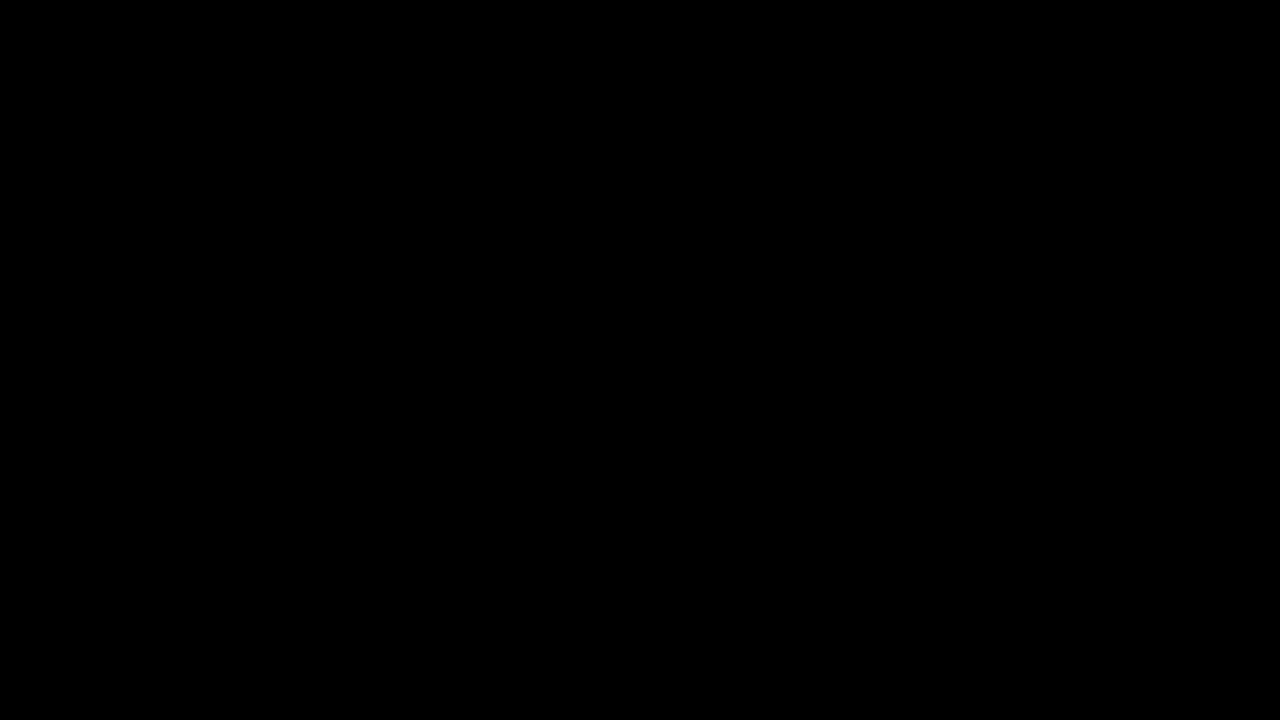

(720, 1280, 3)


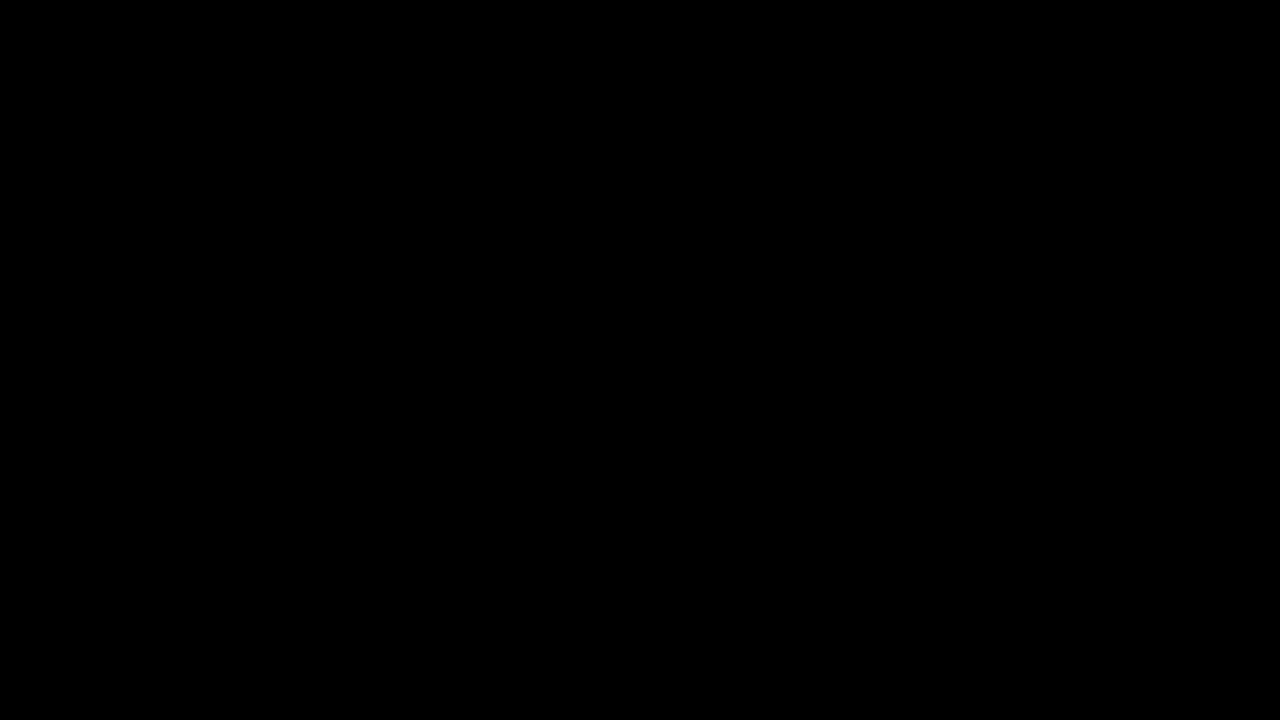

(720, 1280, 3)


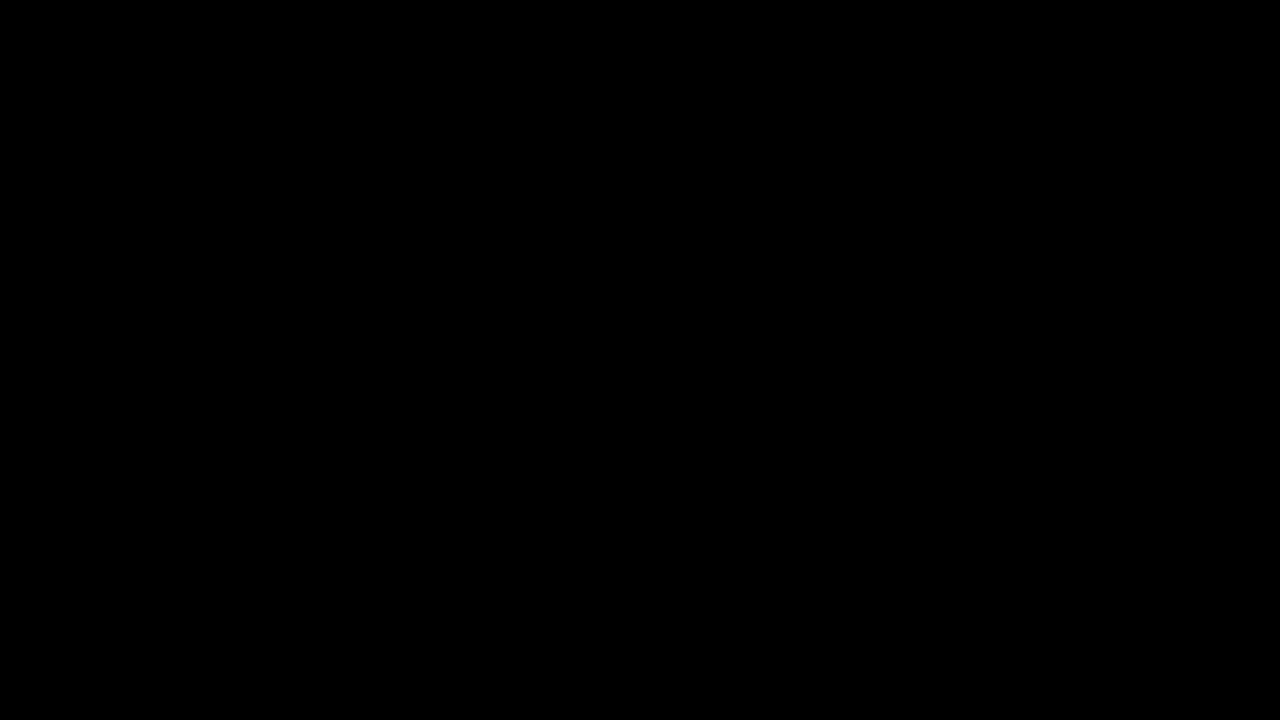

(720, 1280, 3)


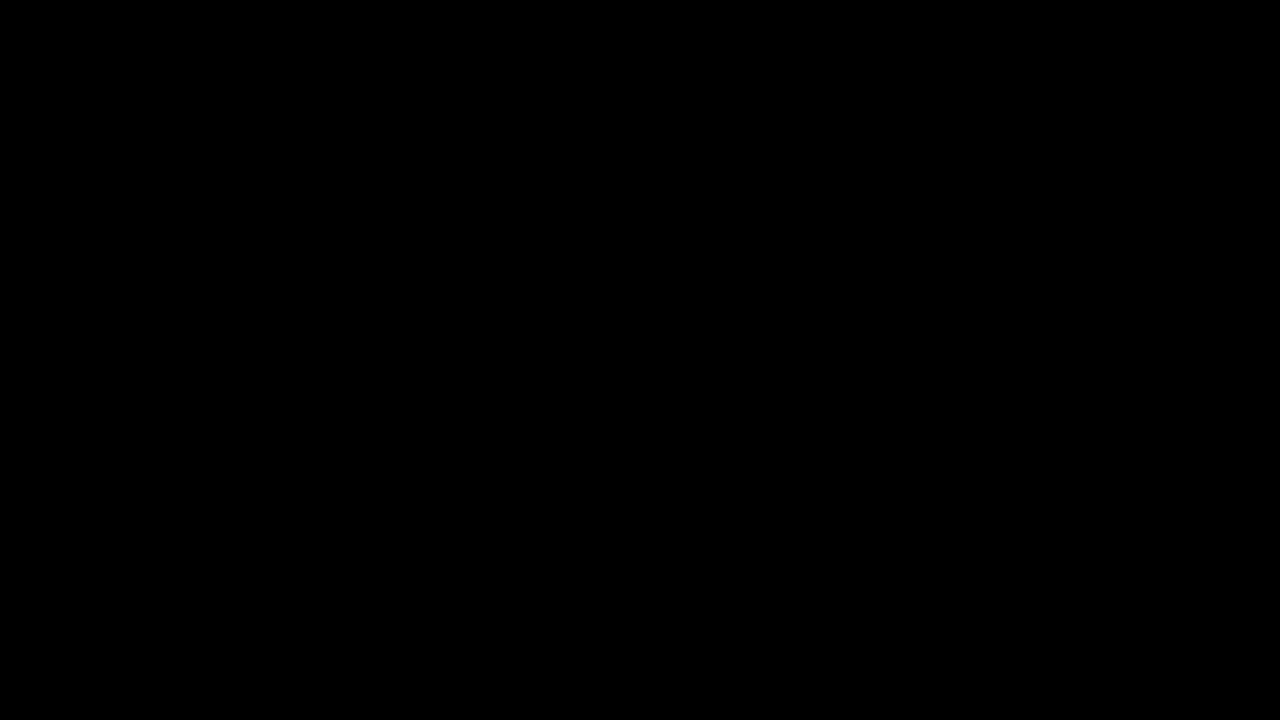

(720, 1280, 3)


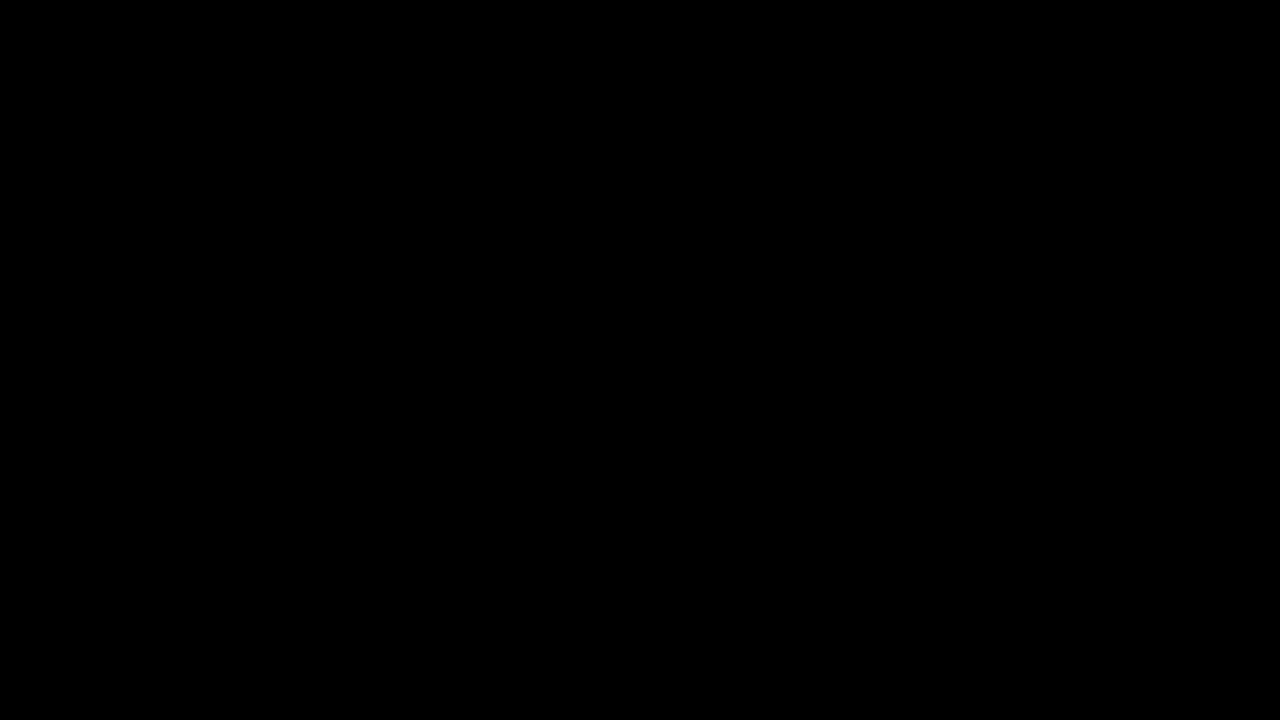

(720, 1280, 3)


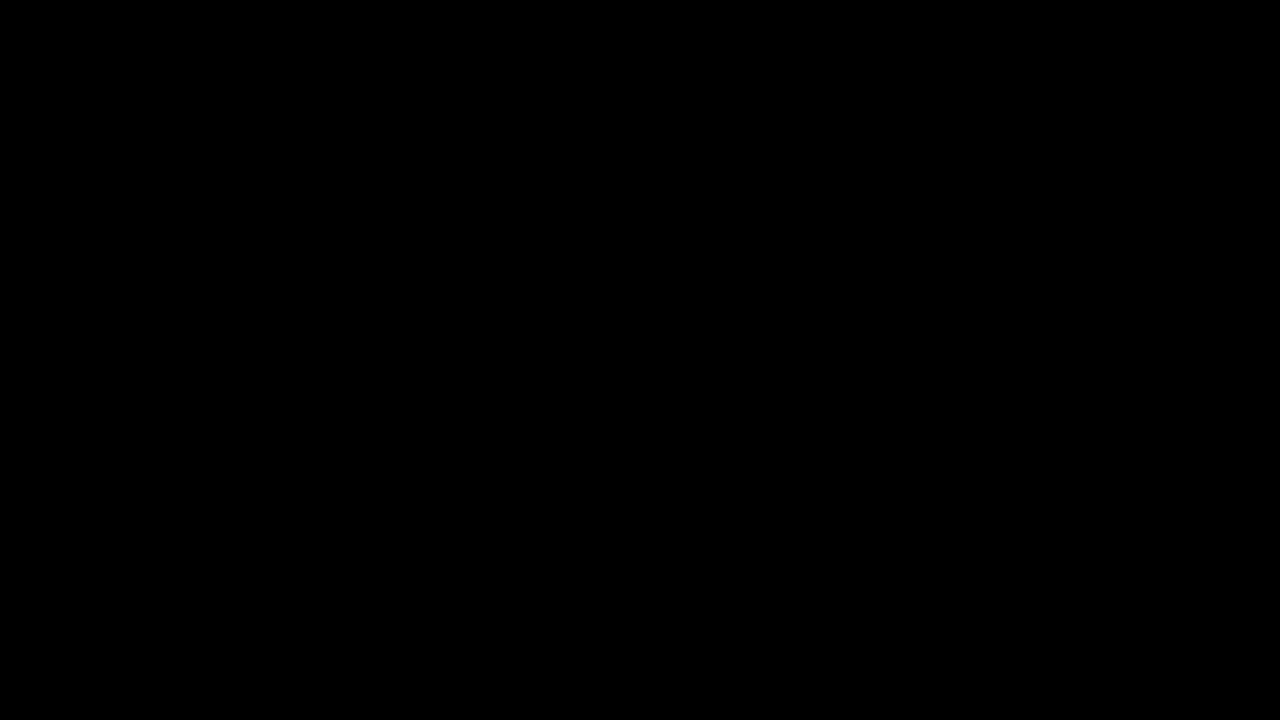

(720, 1280, 3)


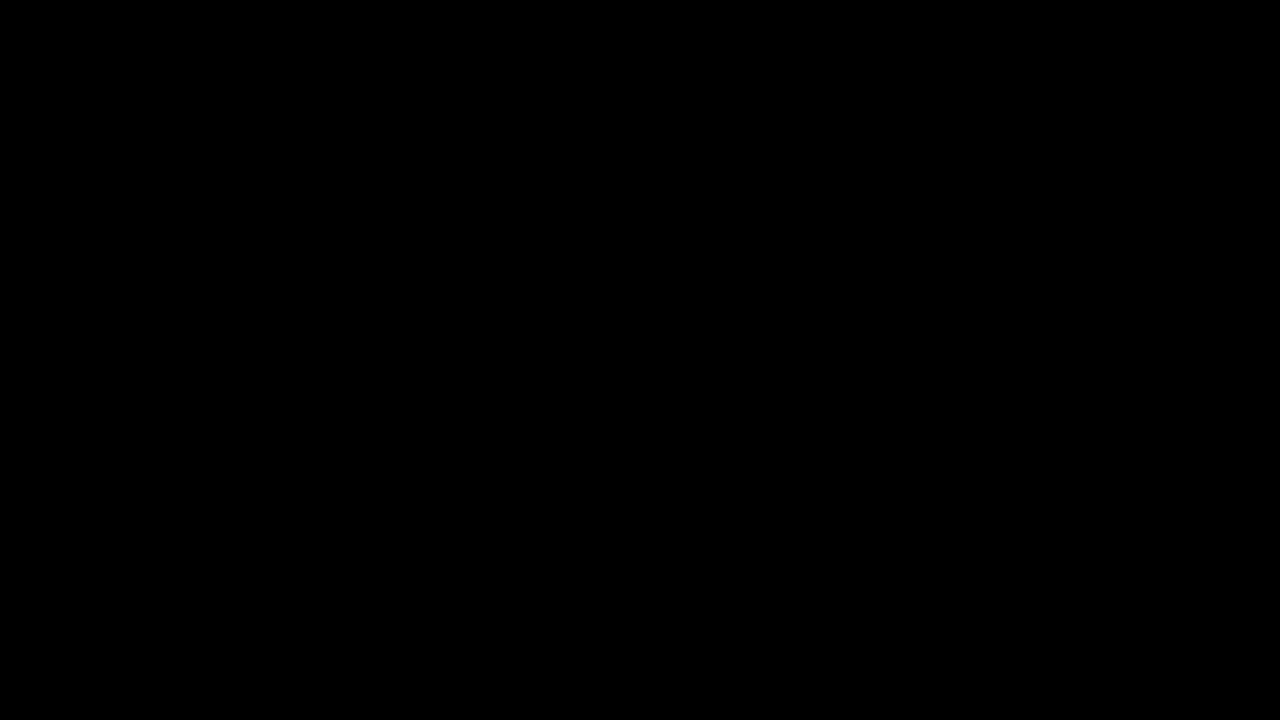

(720, 1280, 3)


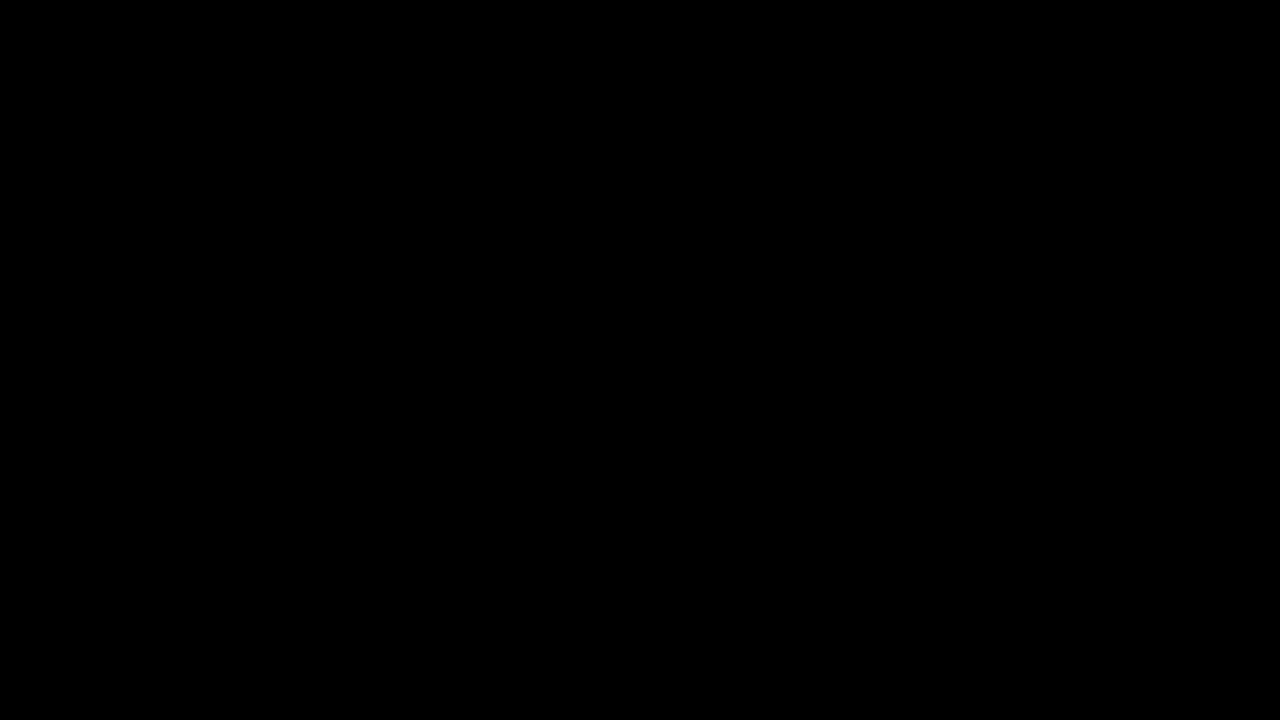

(720, 1280, 3)


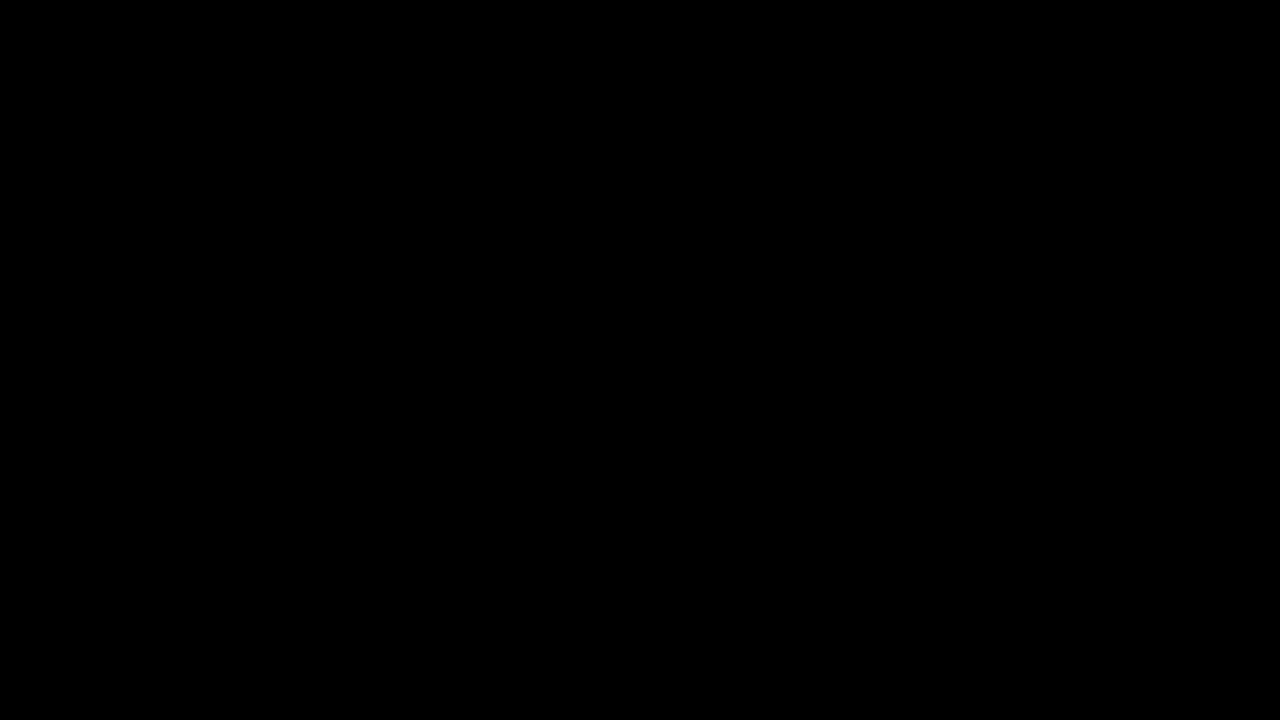

(720, 1280, 3)


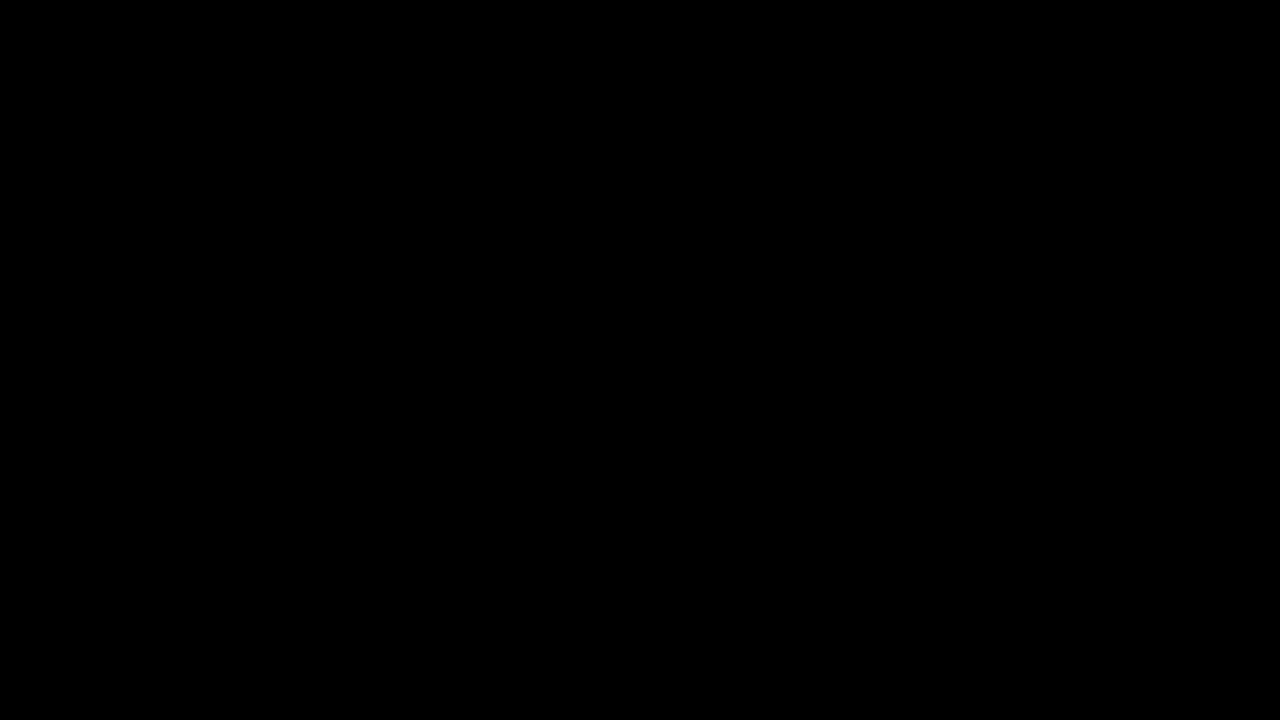

(720, 1280, 3)


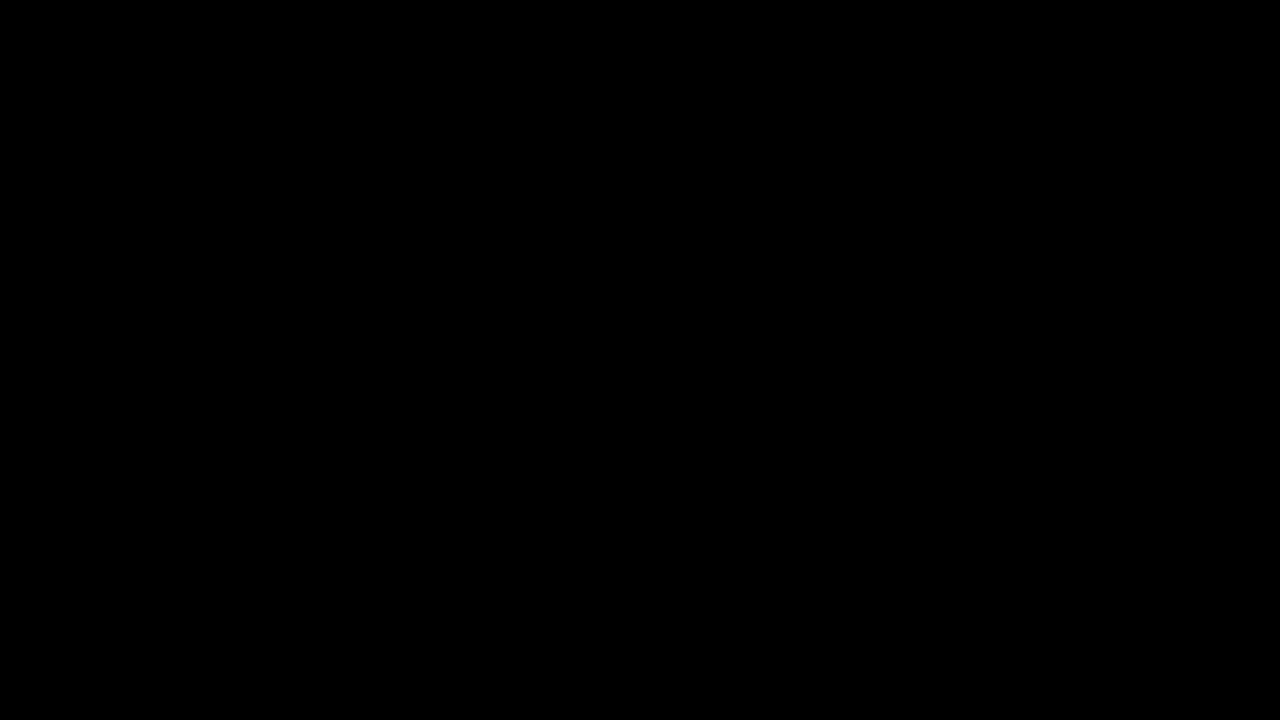

(720, 1280, 3)


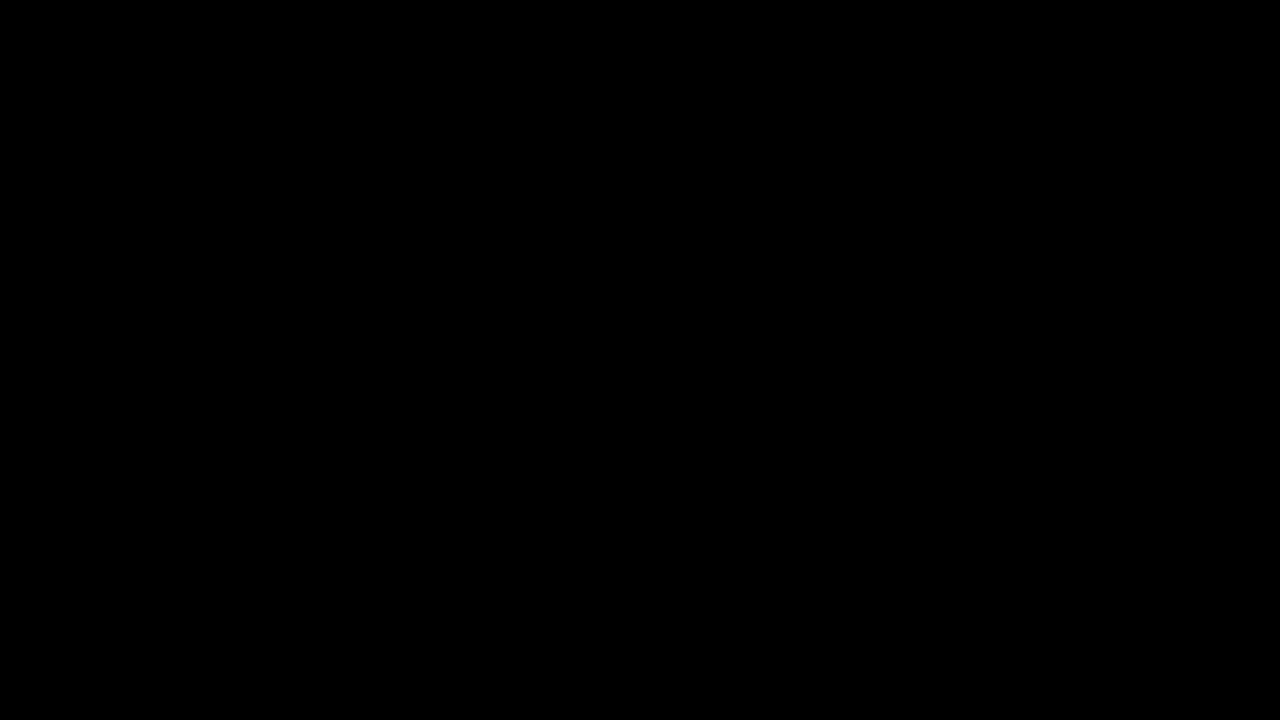

(720, 1280, 3)


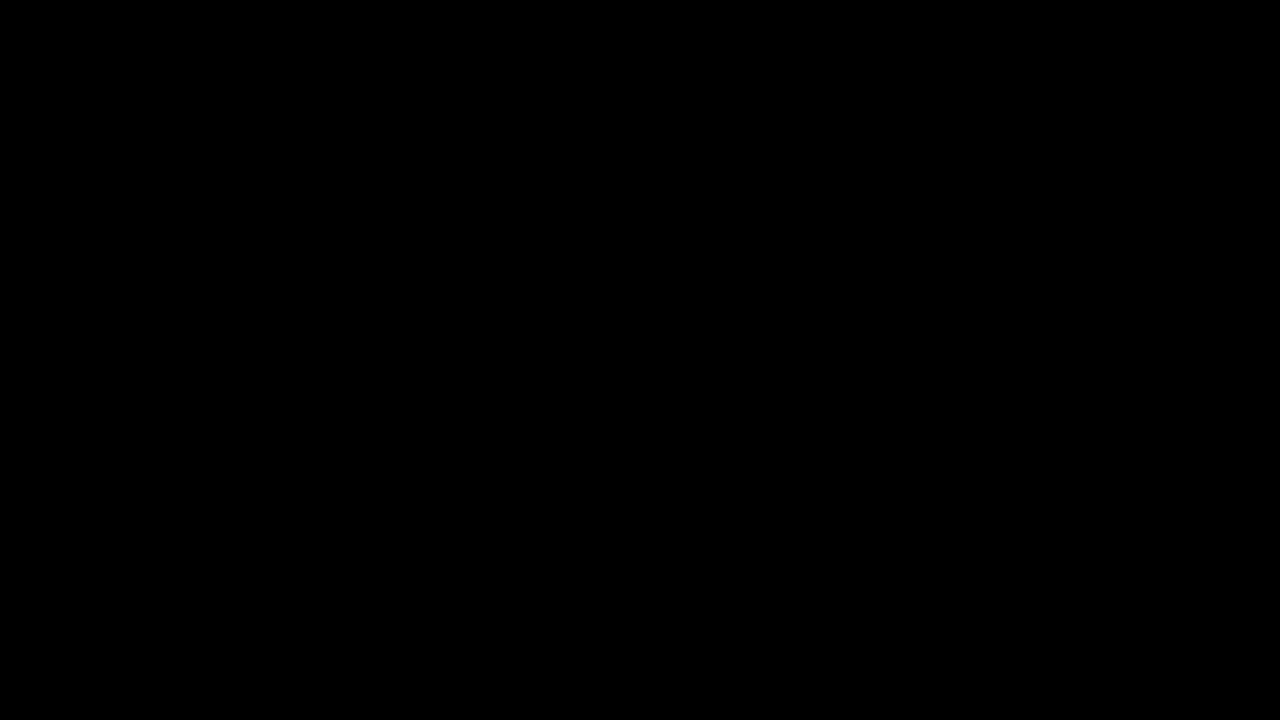

(720, 1280, 3)


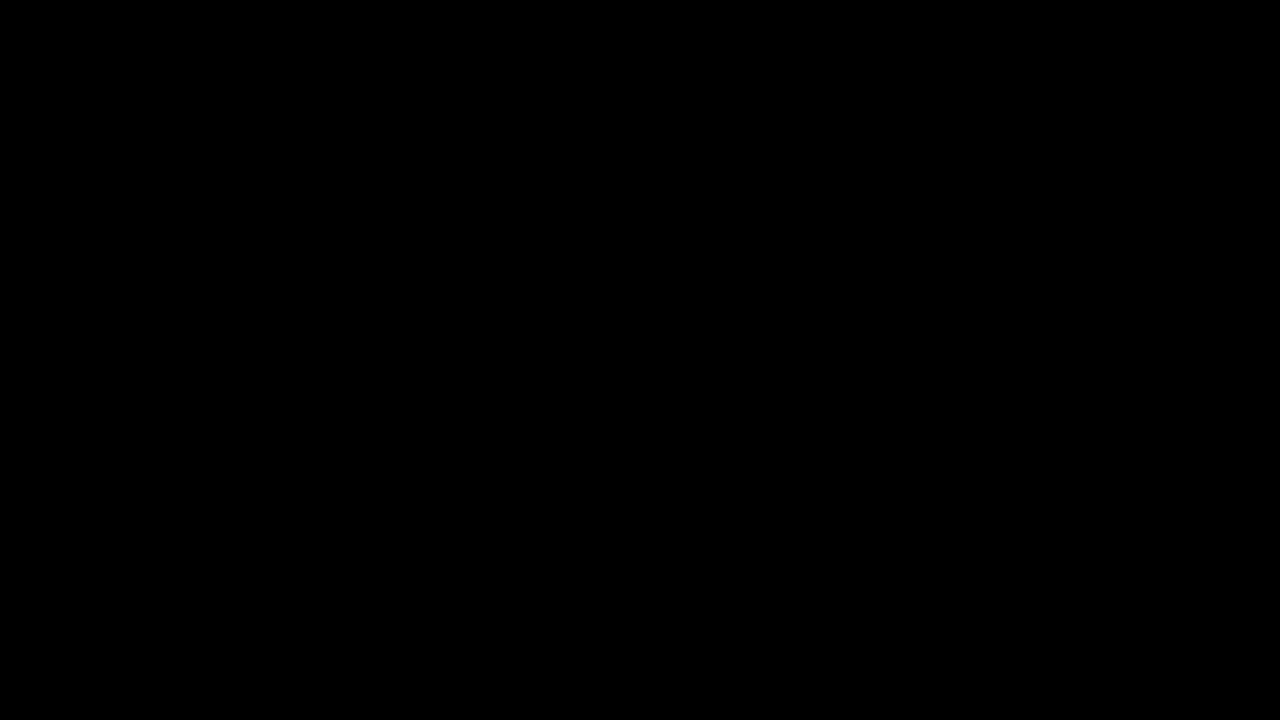

(720, 1280, 3)


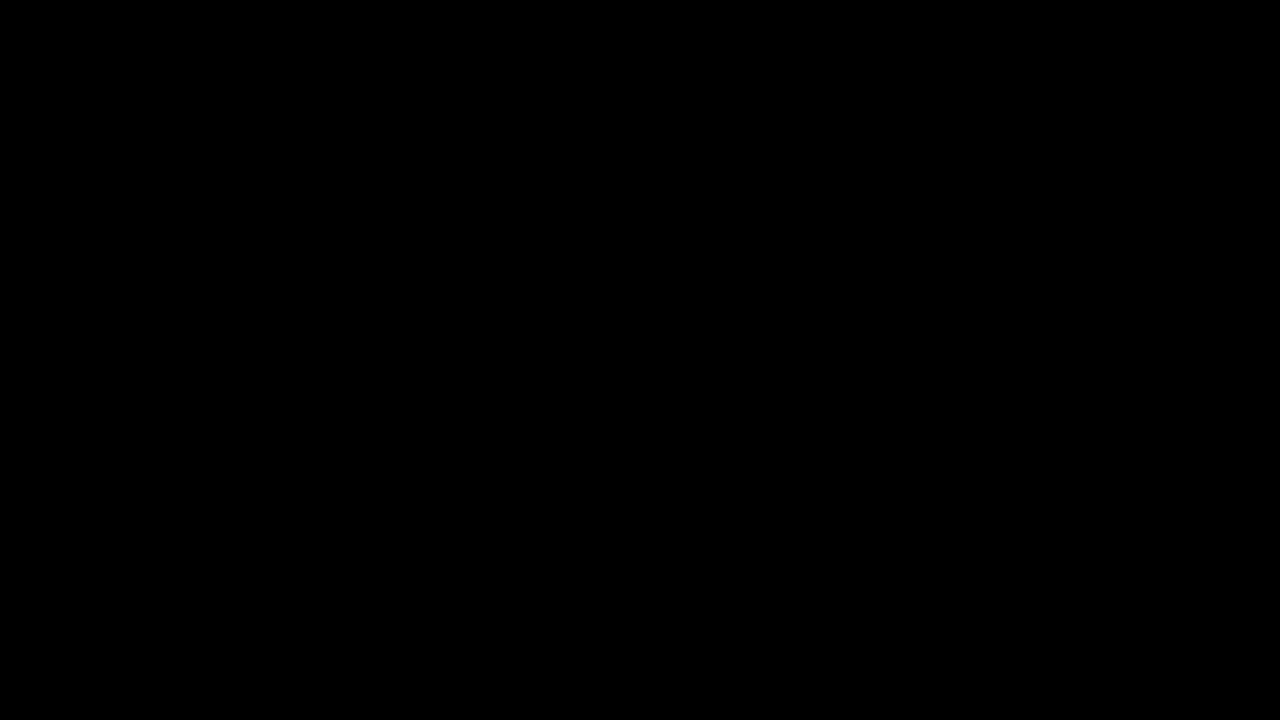

(720, 1280, 3)


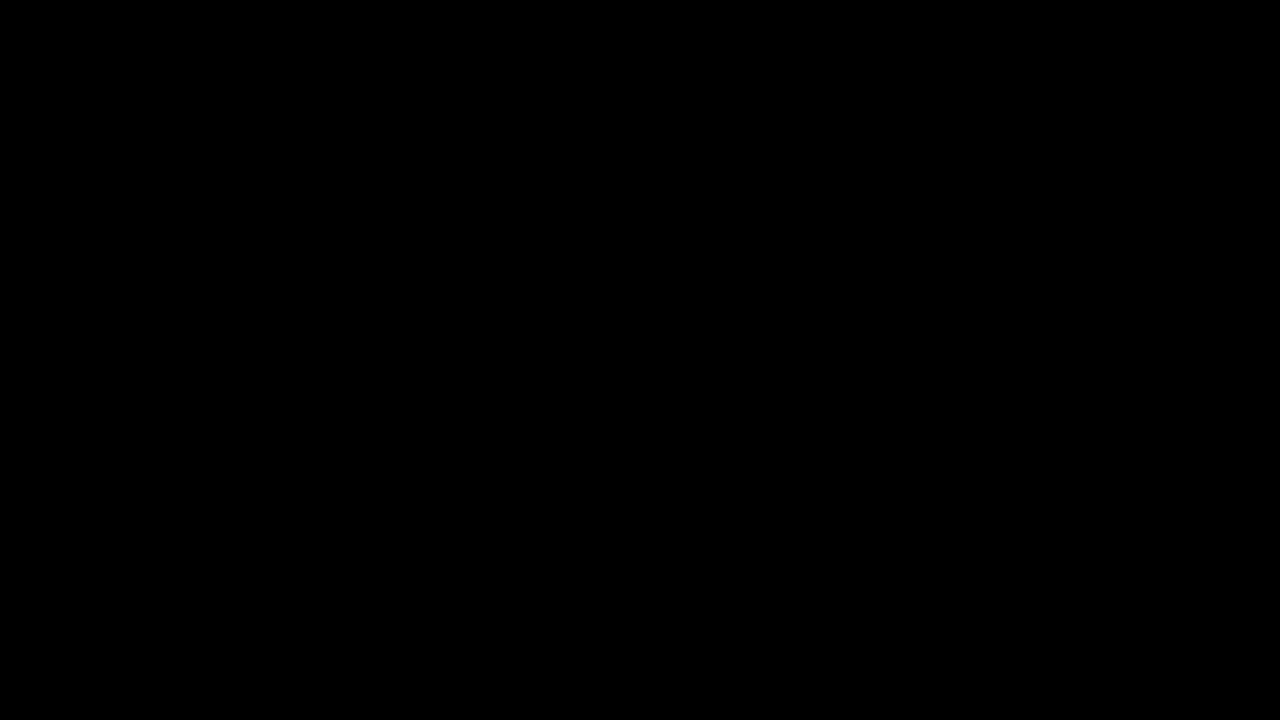

(720, 1280, 3)


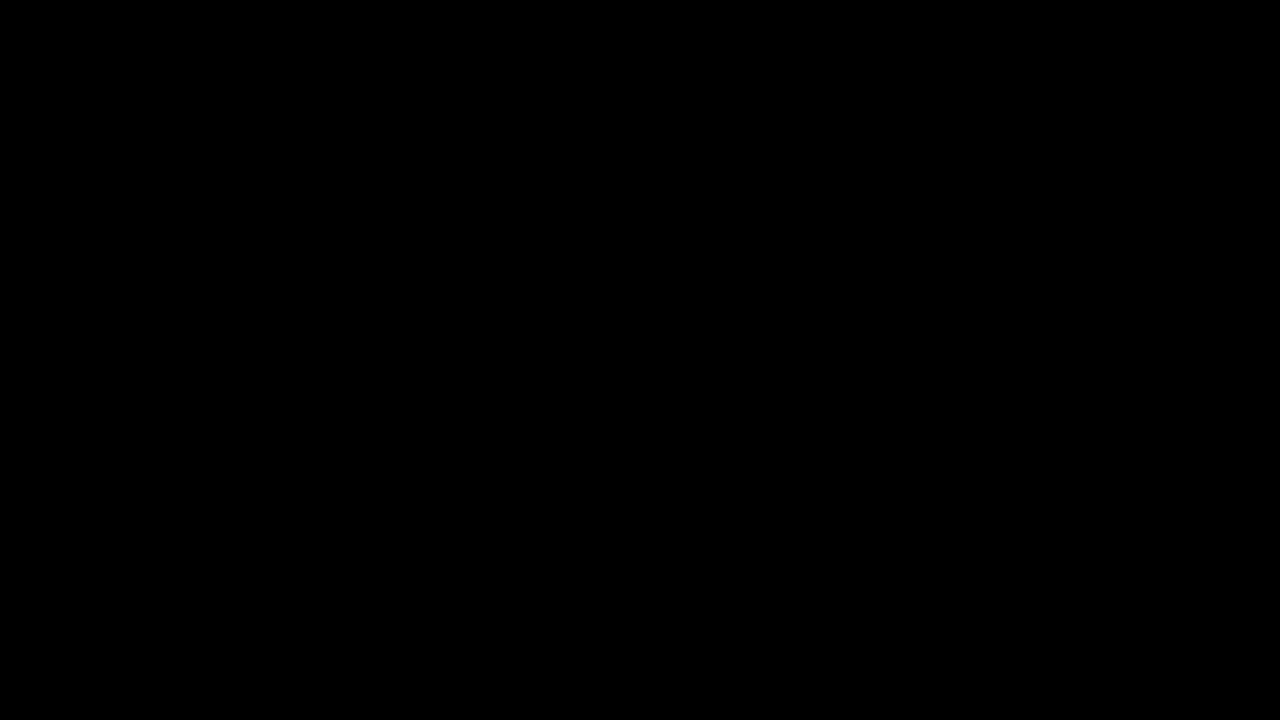

(720, 1280, 3)


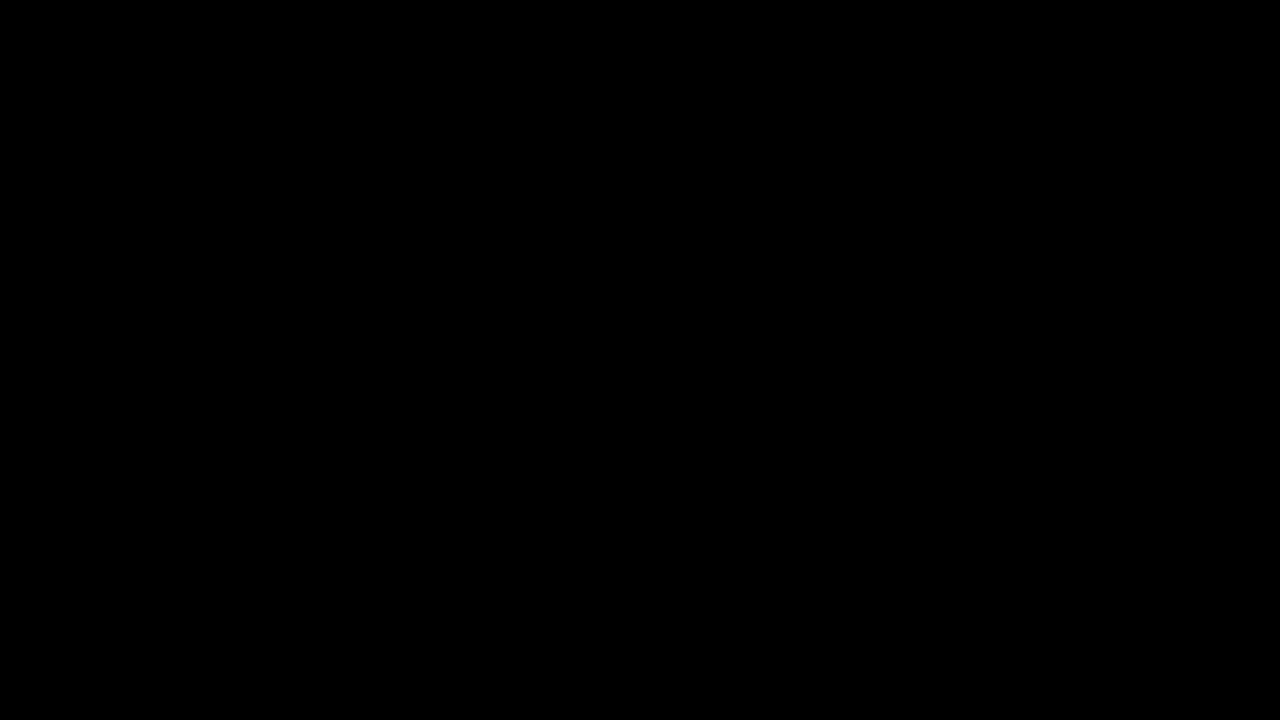

(720, 1280, 3)


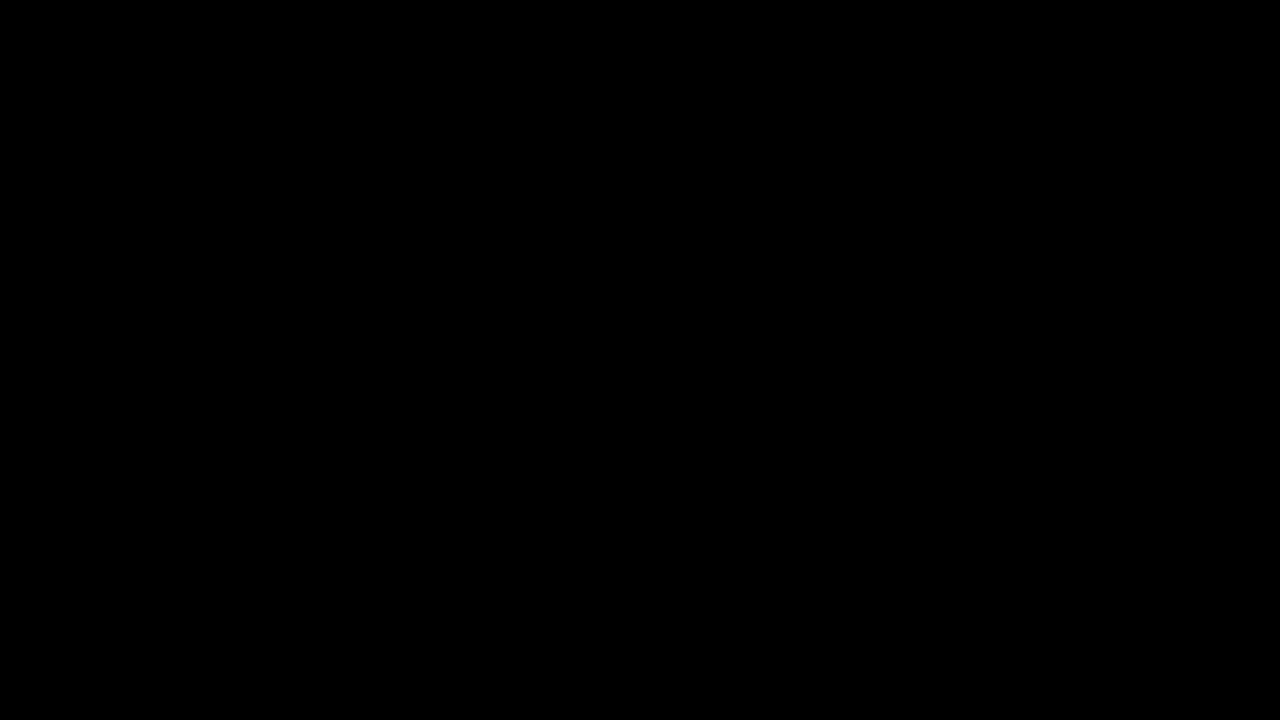

(720, 1280, 3)


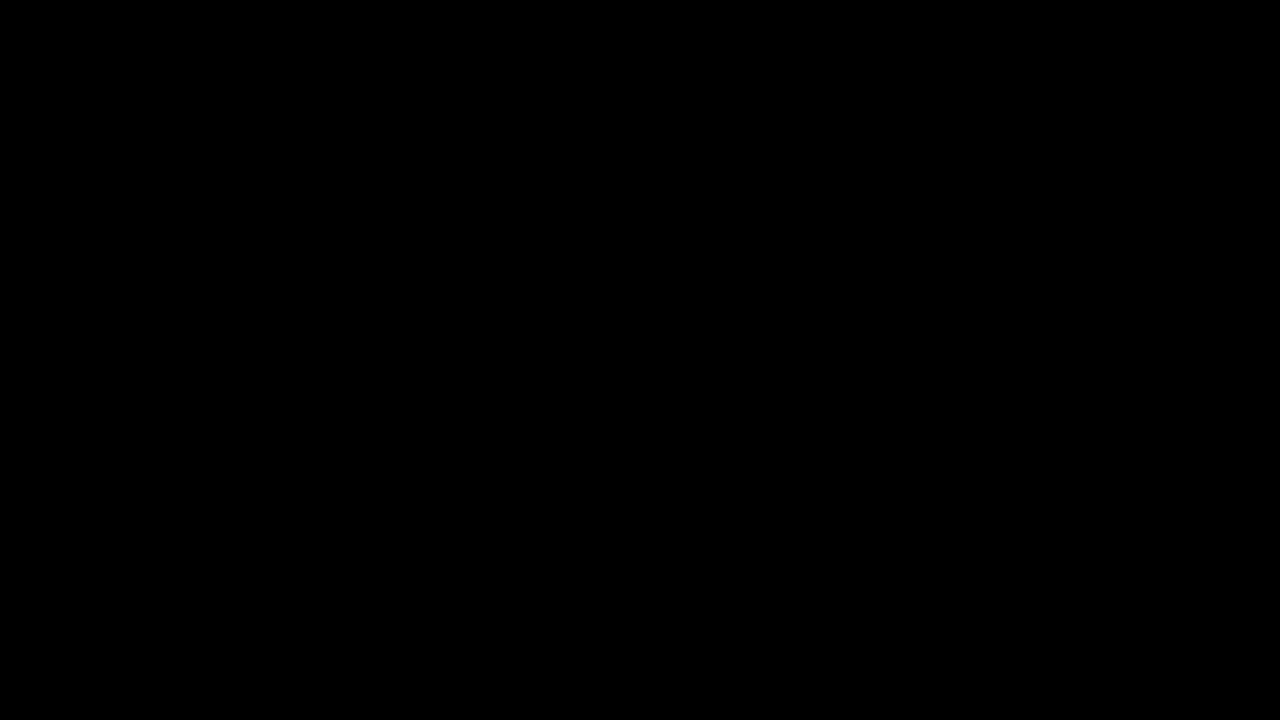

(720, 1280, 3)


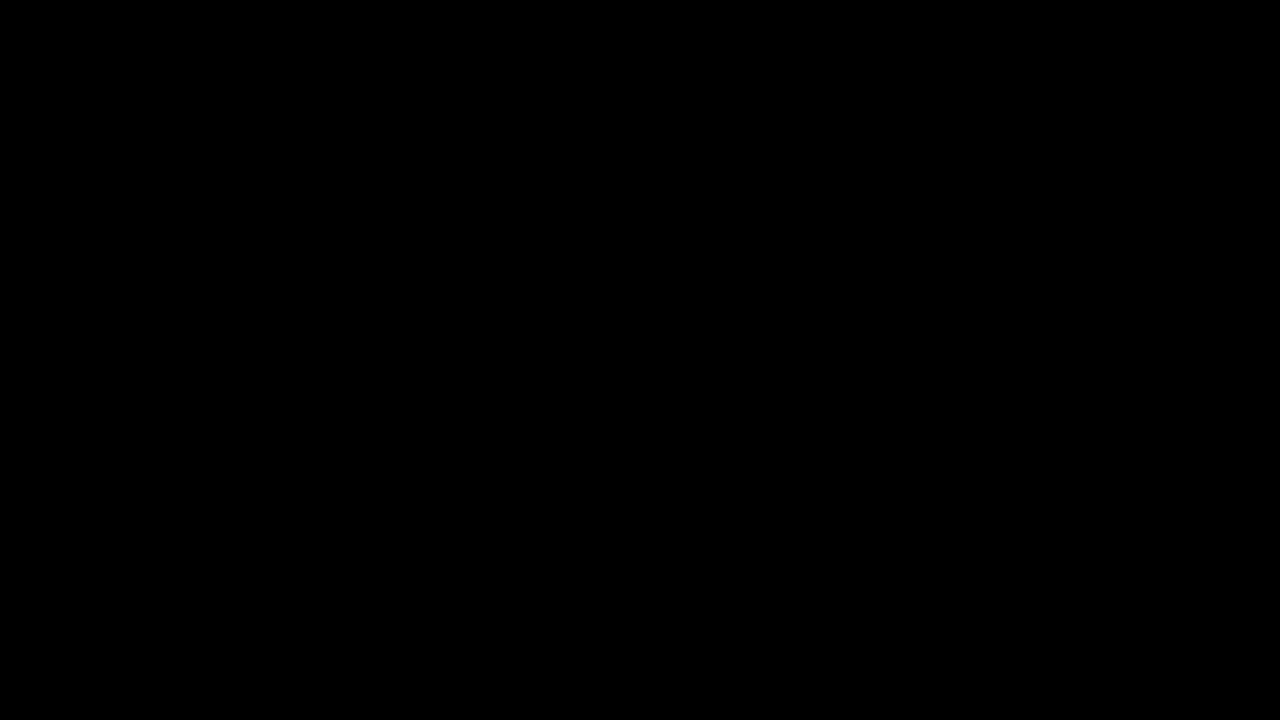

(720, 1280, 3)


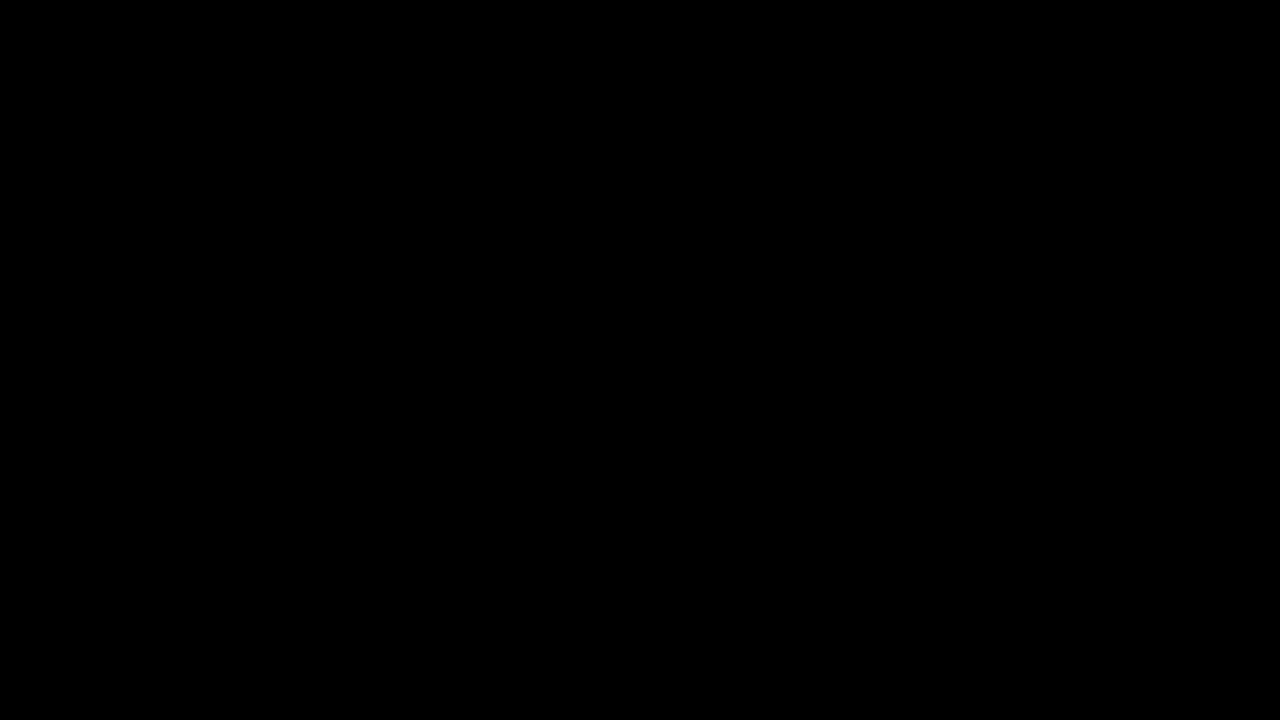

(720, 1280, 3)


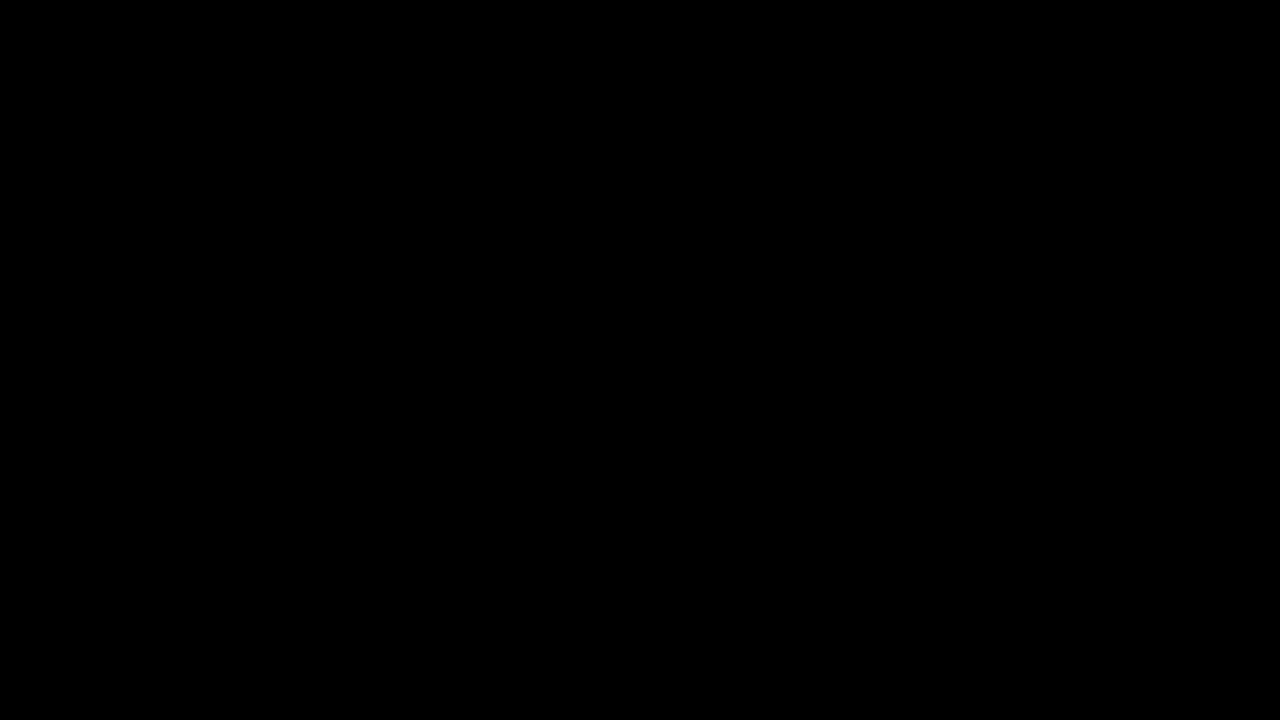

(720, 1280, 3)


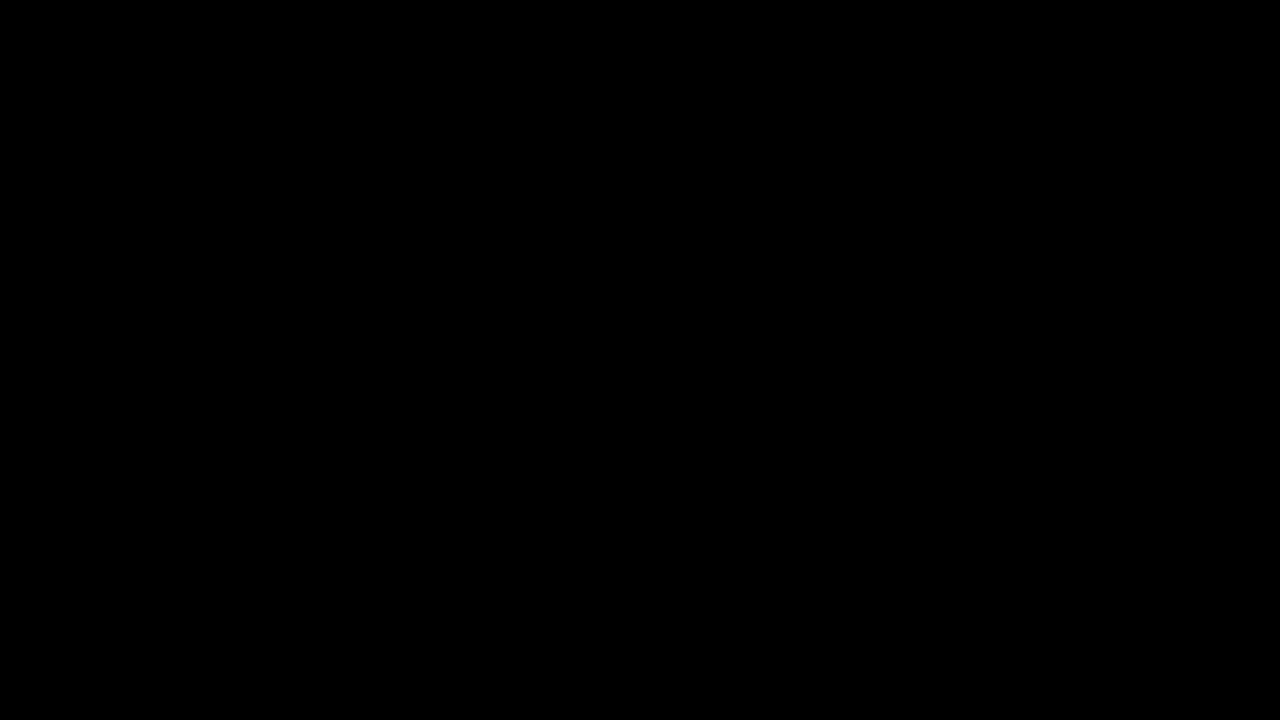

(720, 1280, 3)


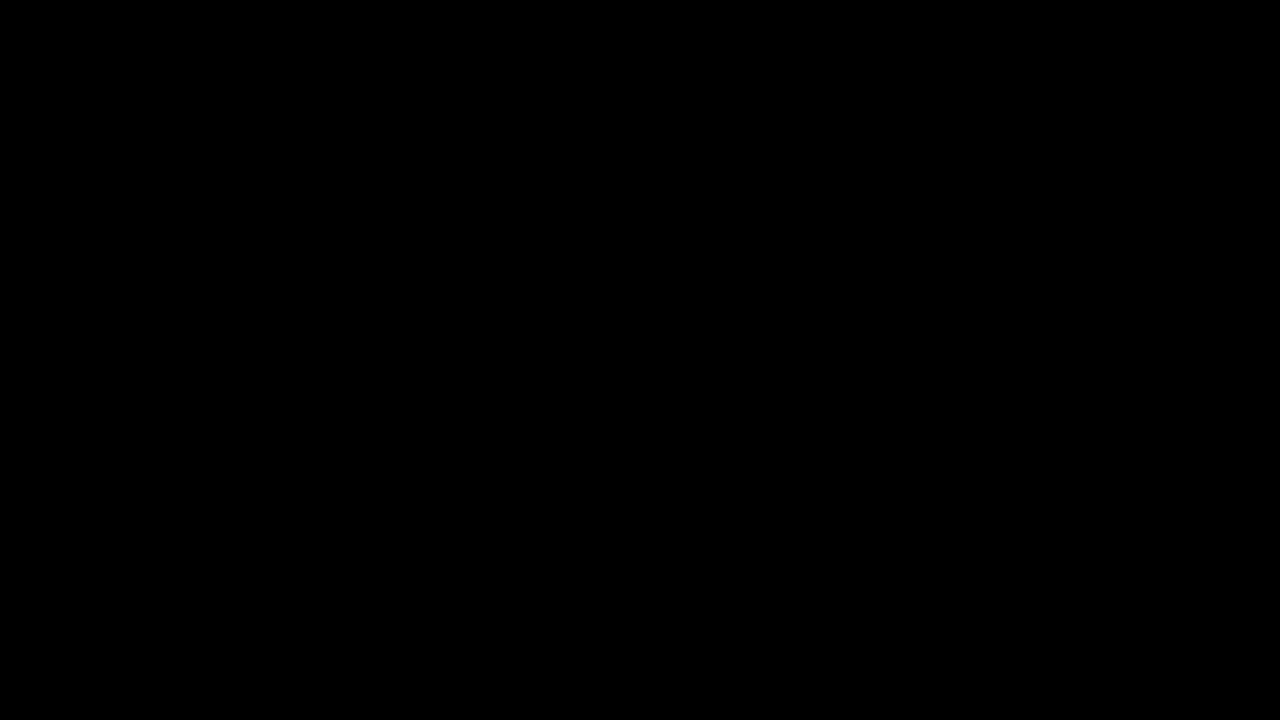

(720, 1280, 3)


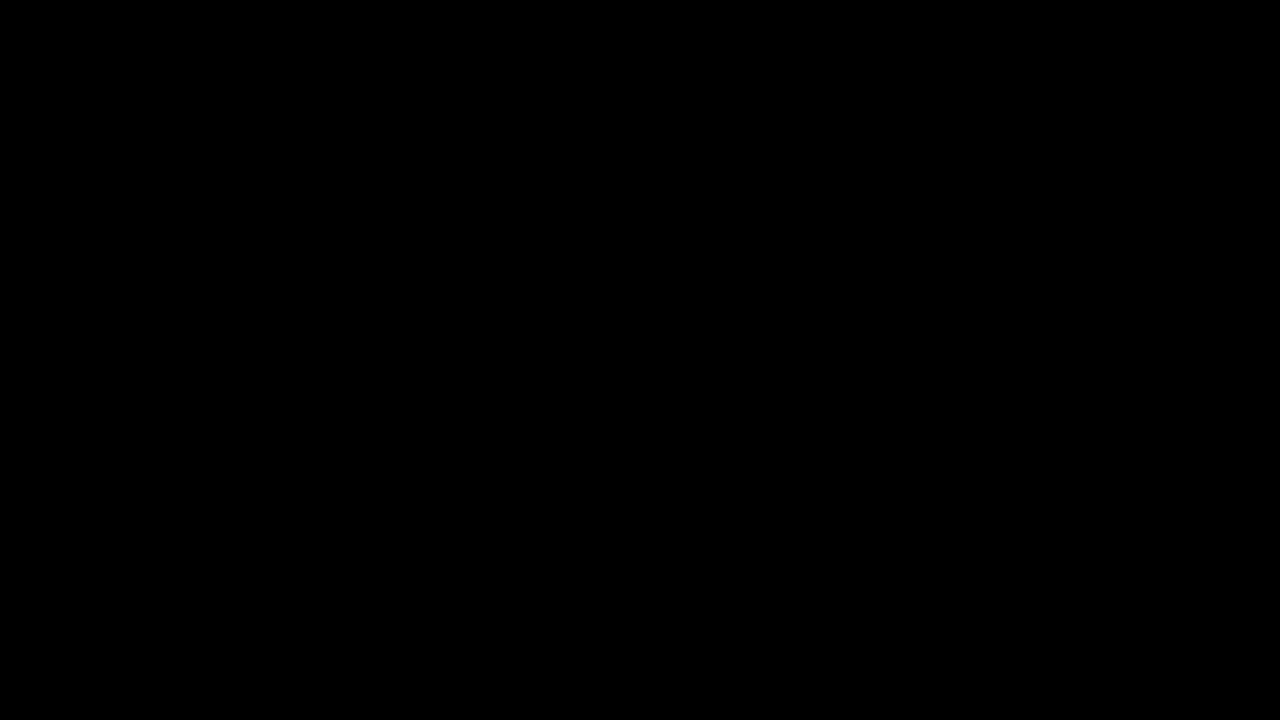

(720, 1280, 3)


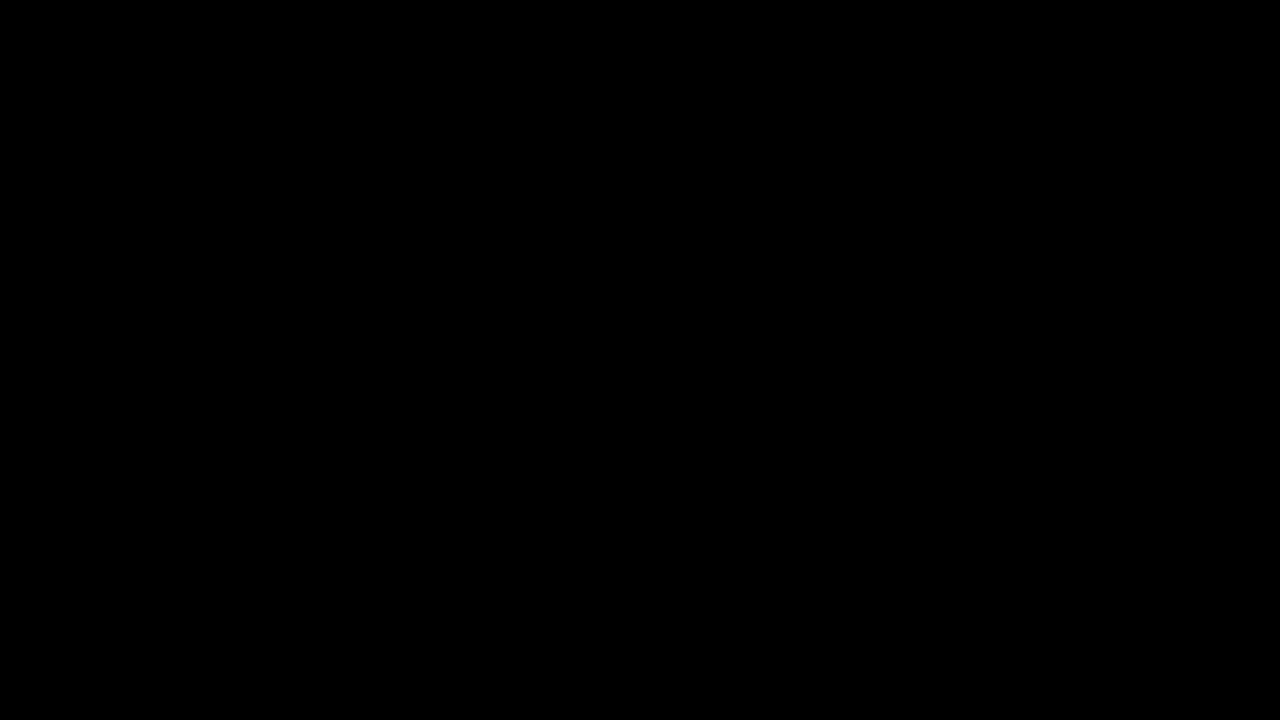

(720, 1280, 3)


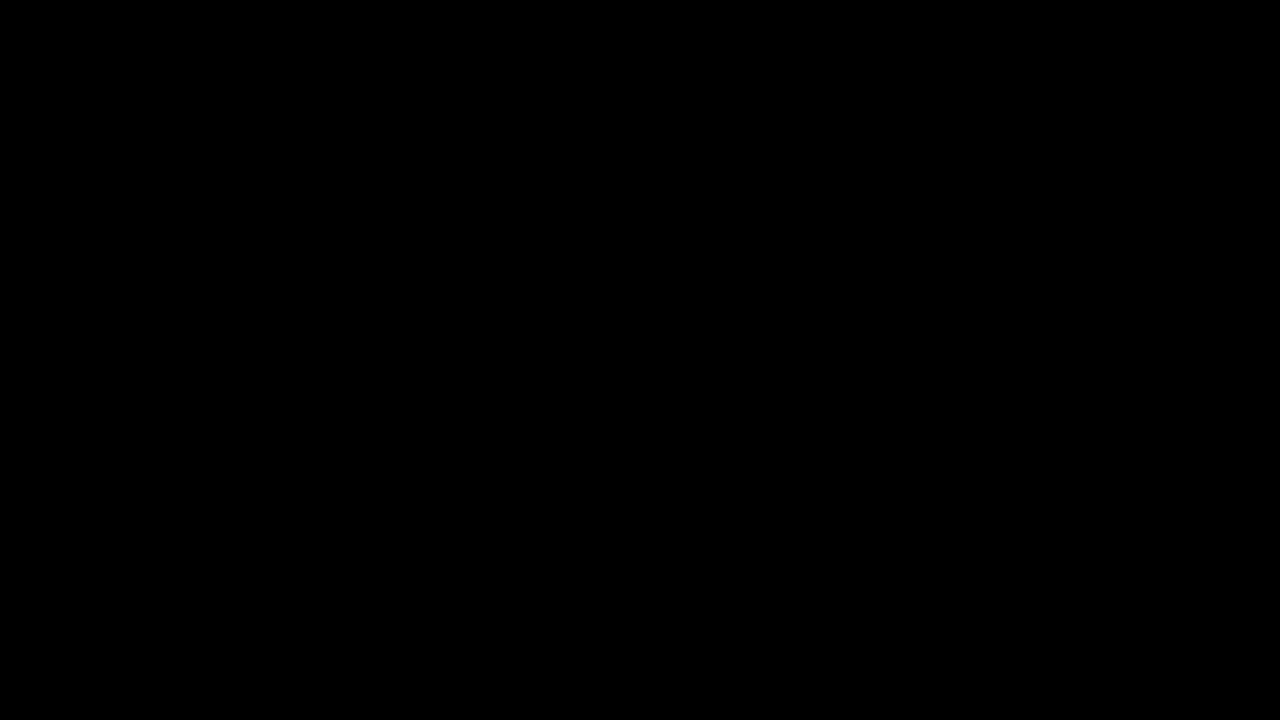

(720, 1280, 3)


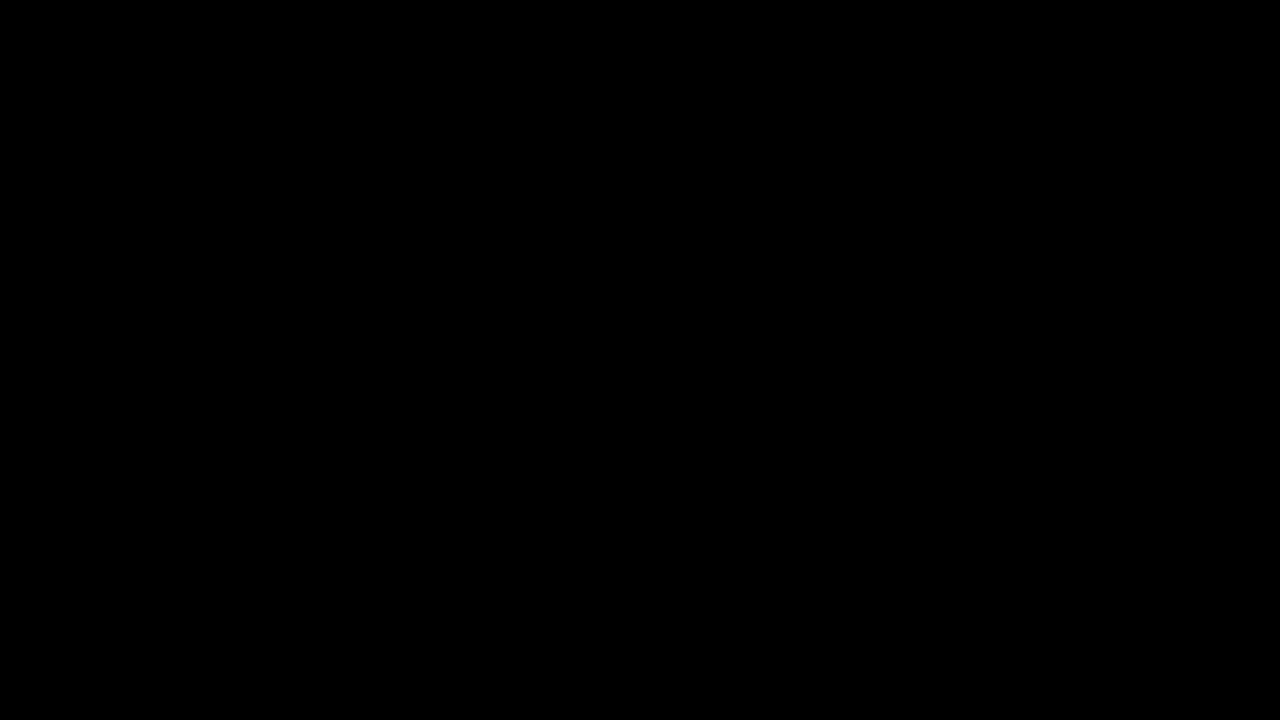

(720, 1280, 3)


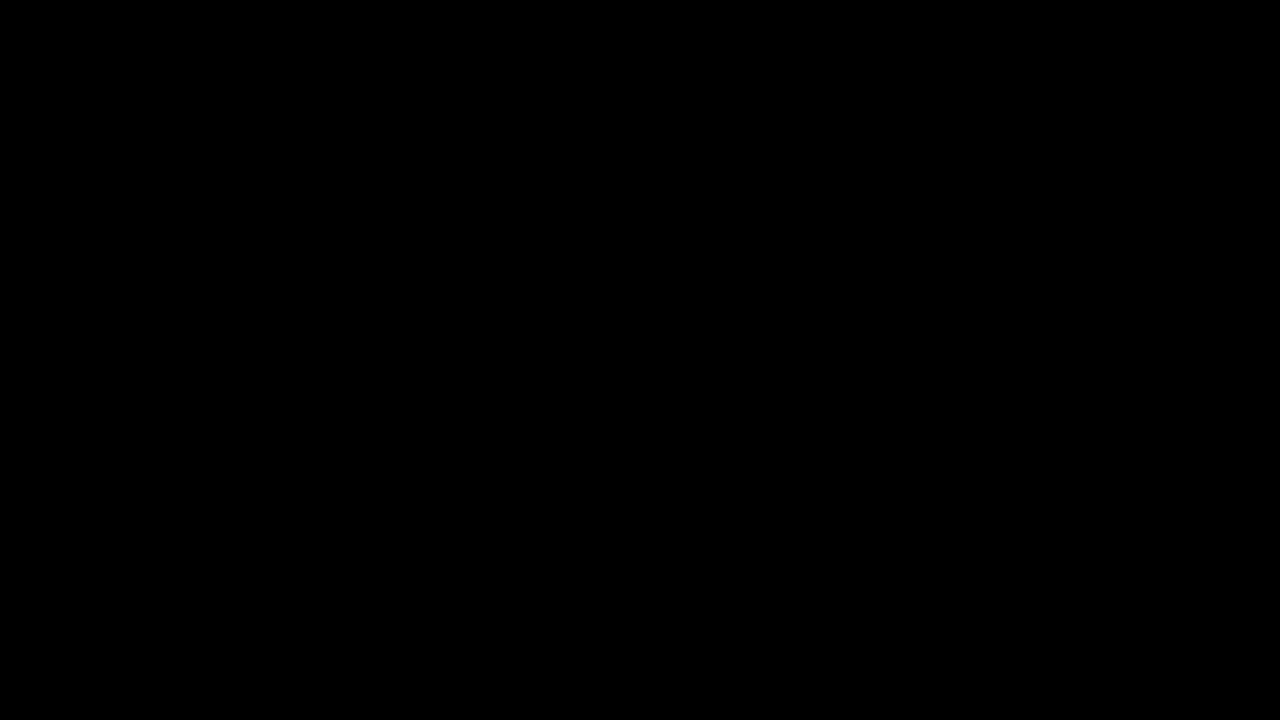

(720, 1280, 3)


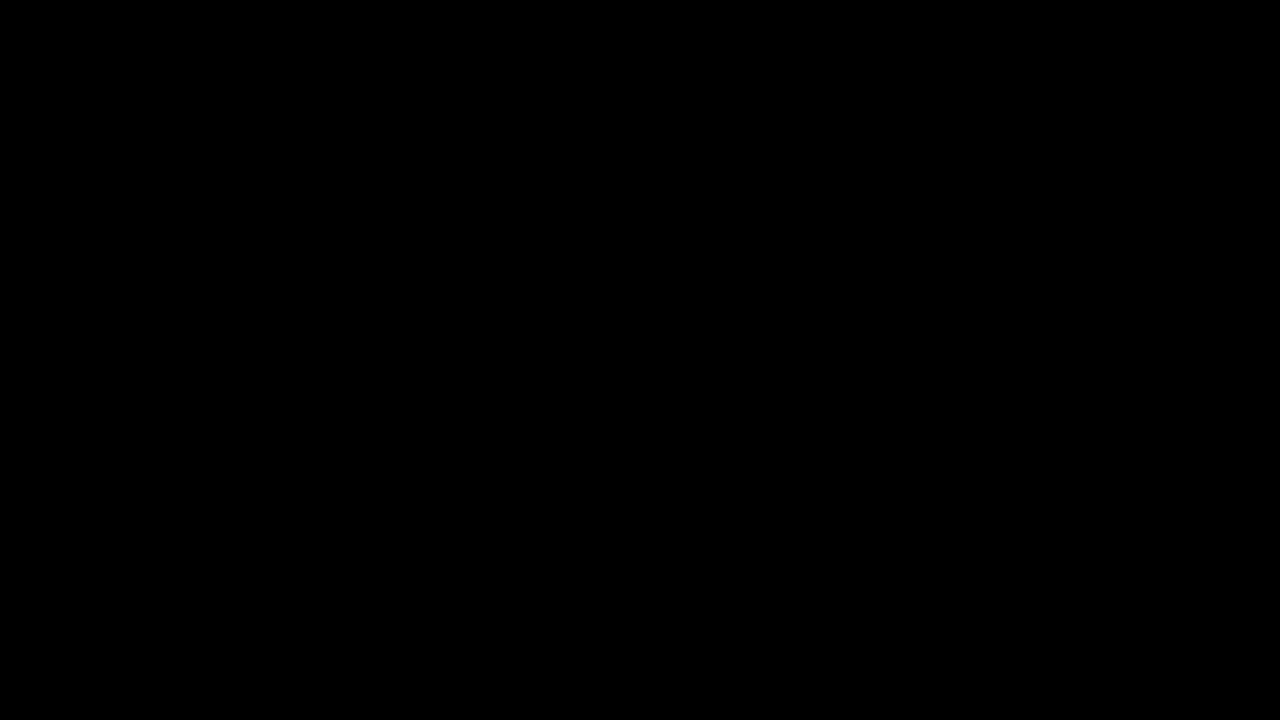

(720, 1280, 3)


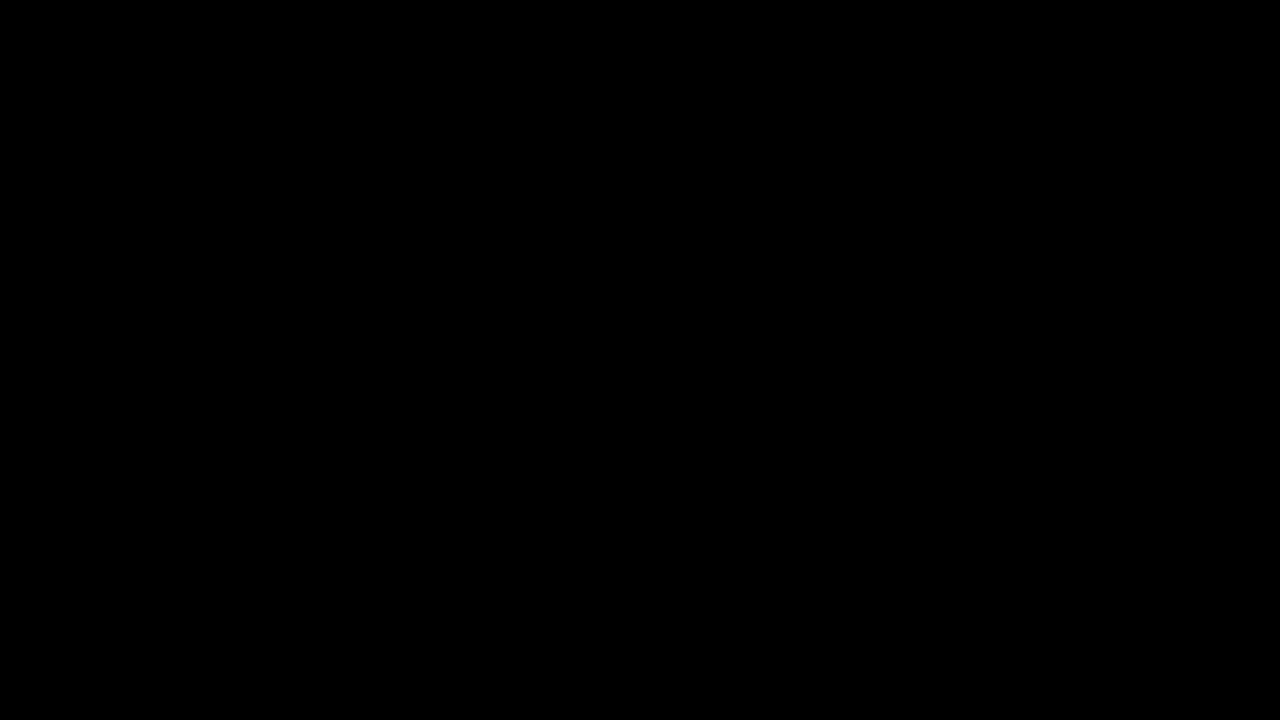

(720, 1280, 3)


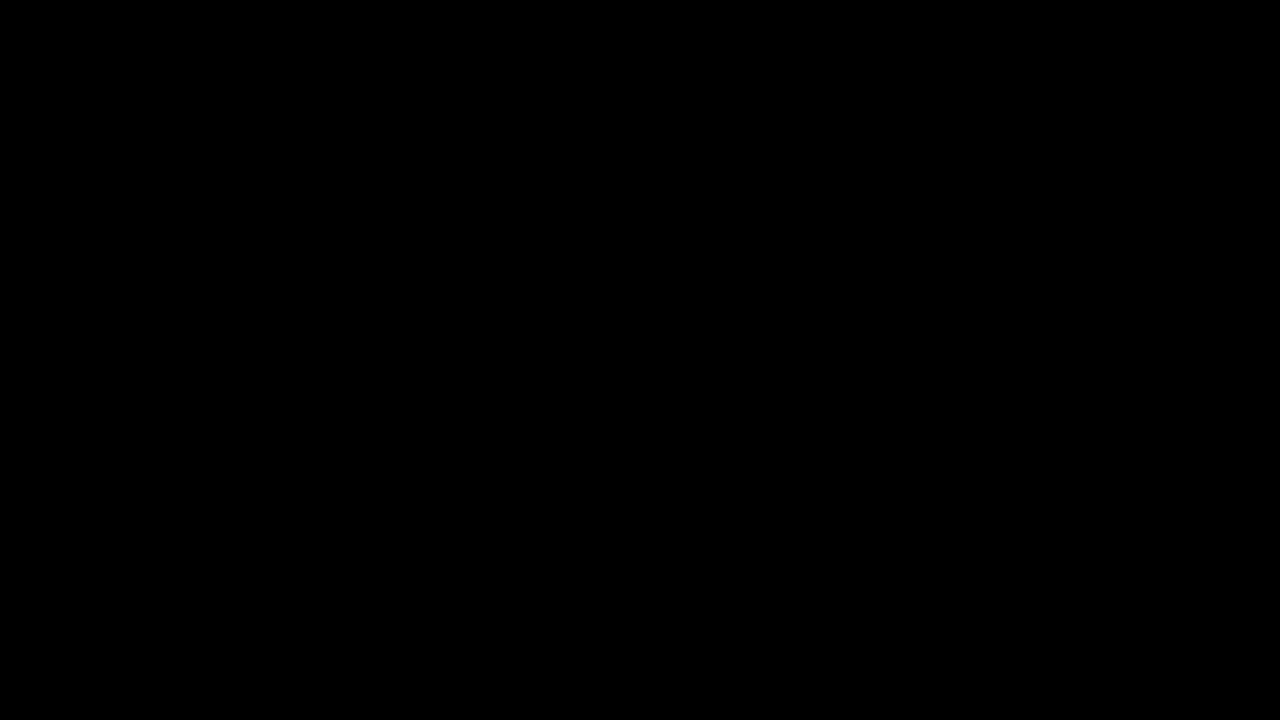

(720, 1280, 3)


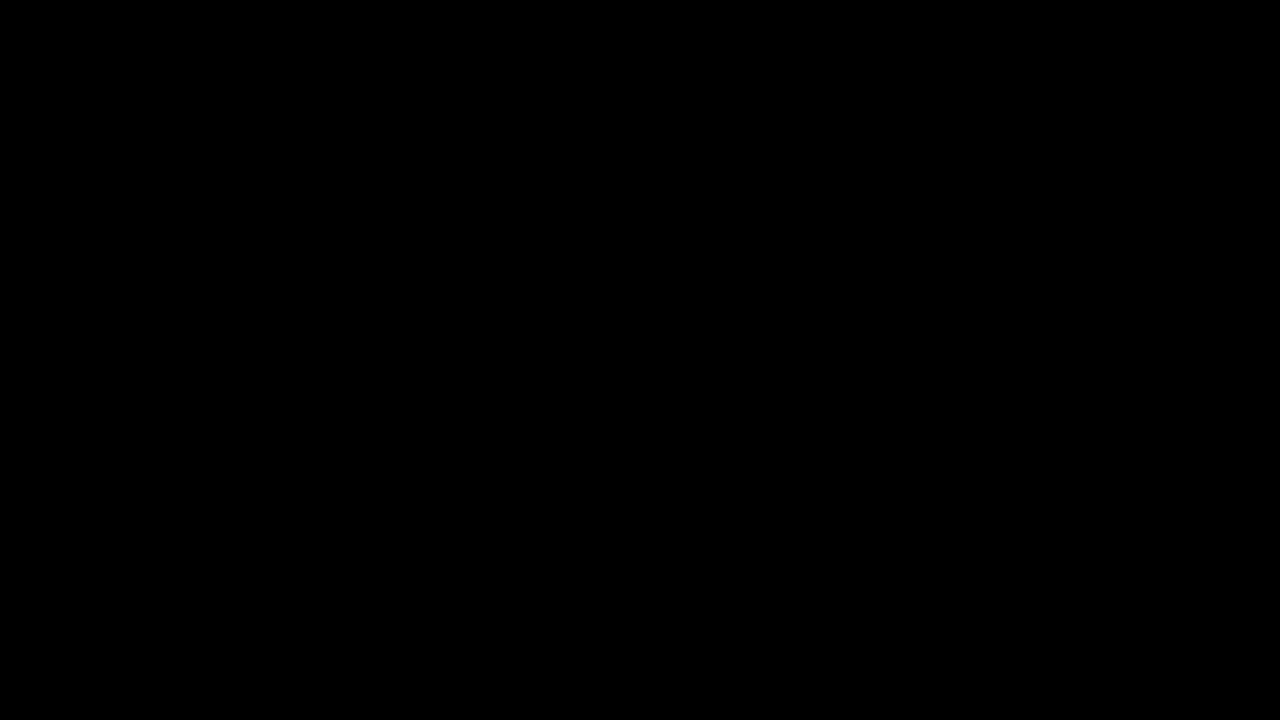

(720, 1280, 3)


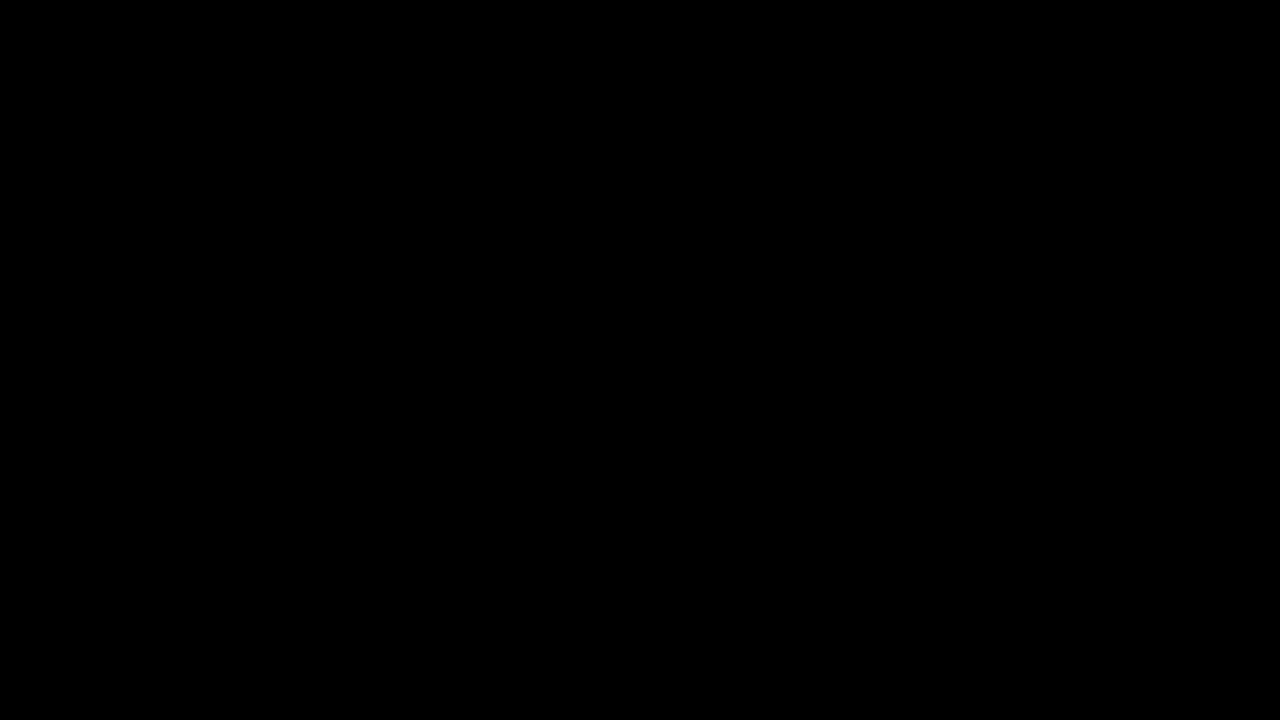

(720, 1280, 3)


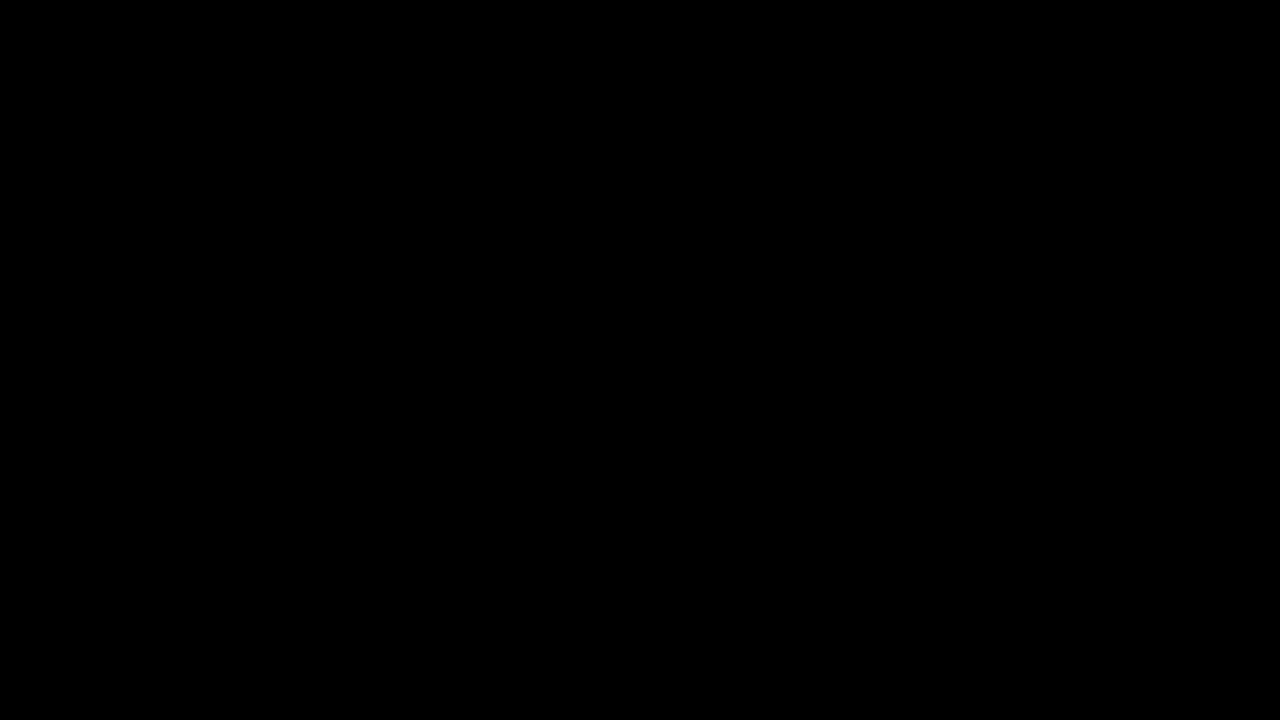

(720, 1280, 3)


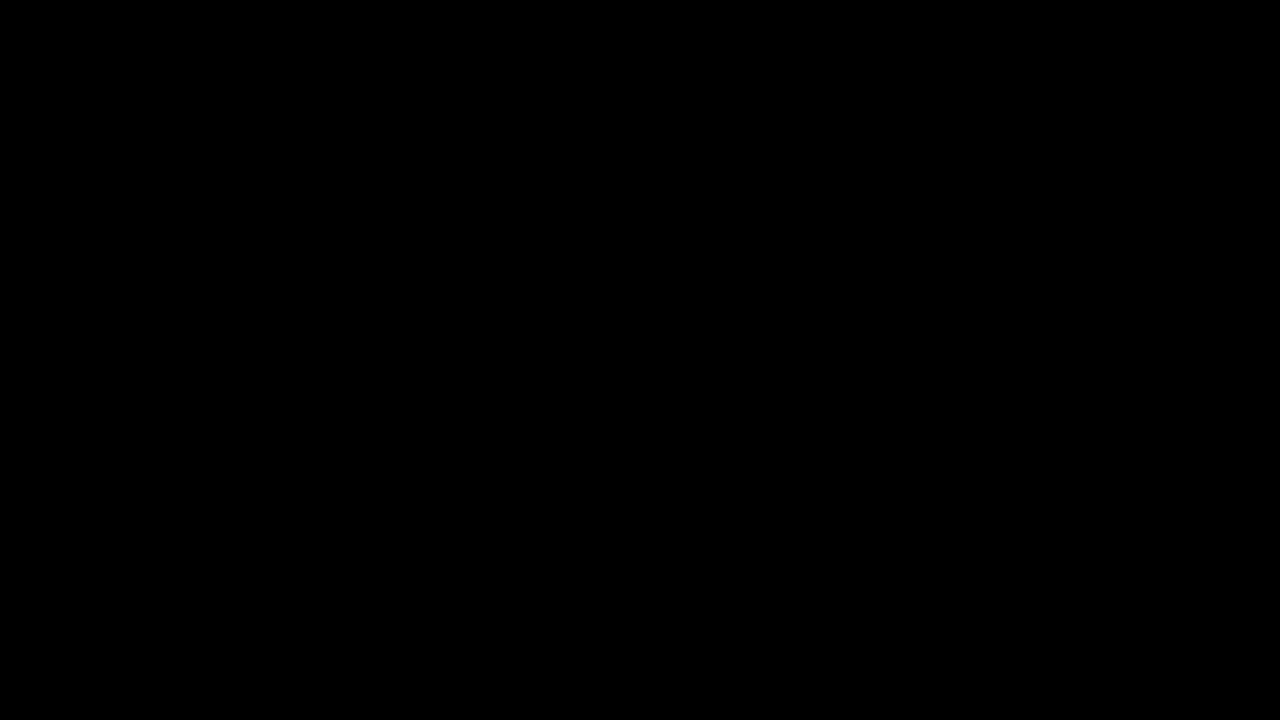

(720, 1280, 3)


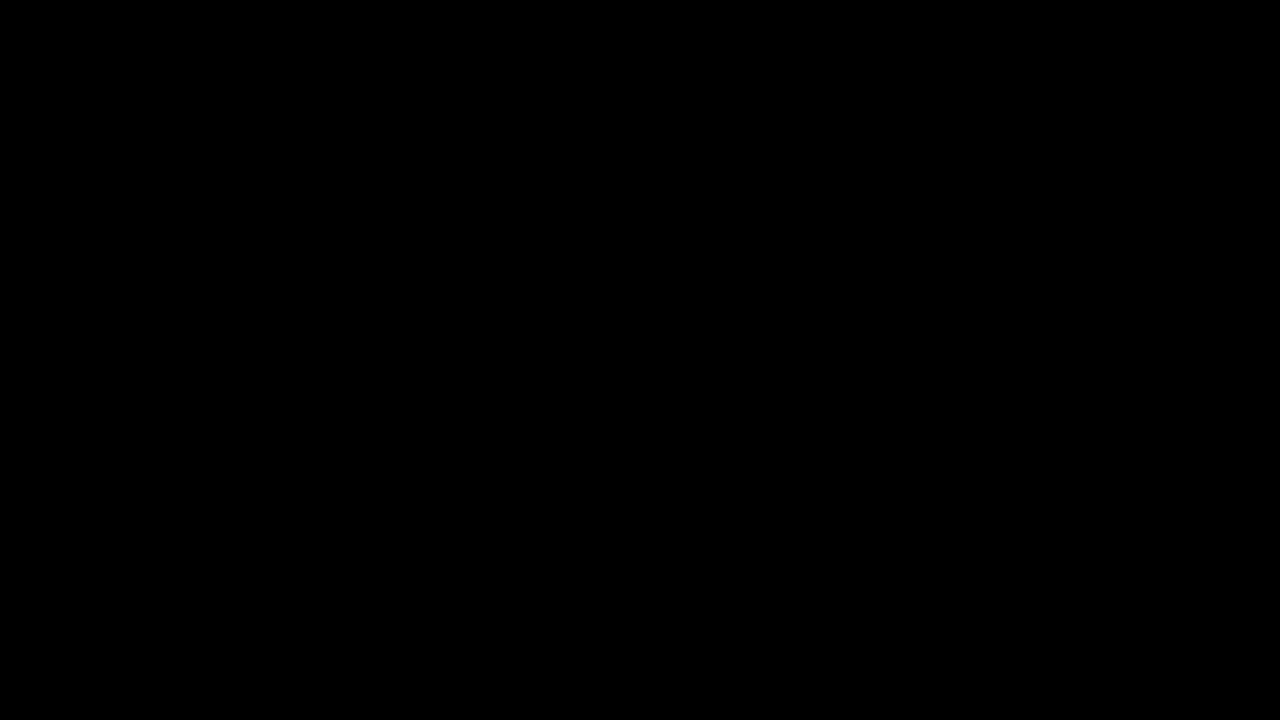

(720, 1280, 3)


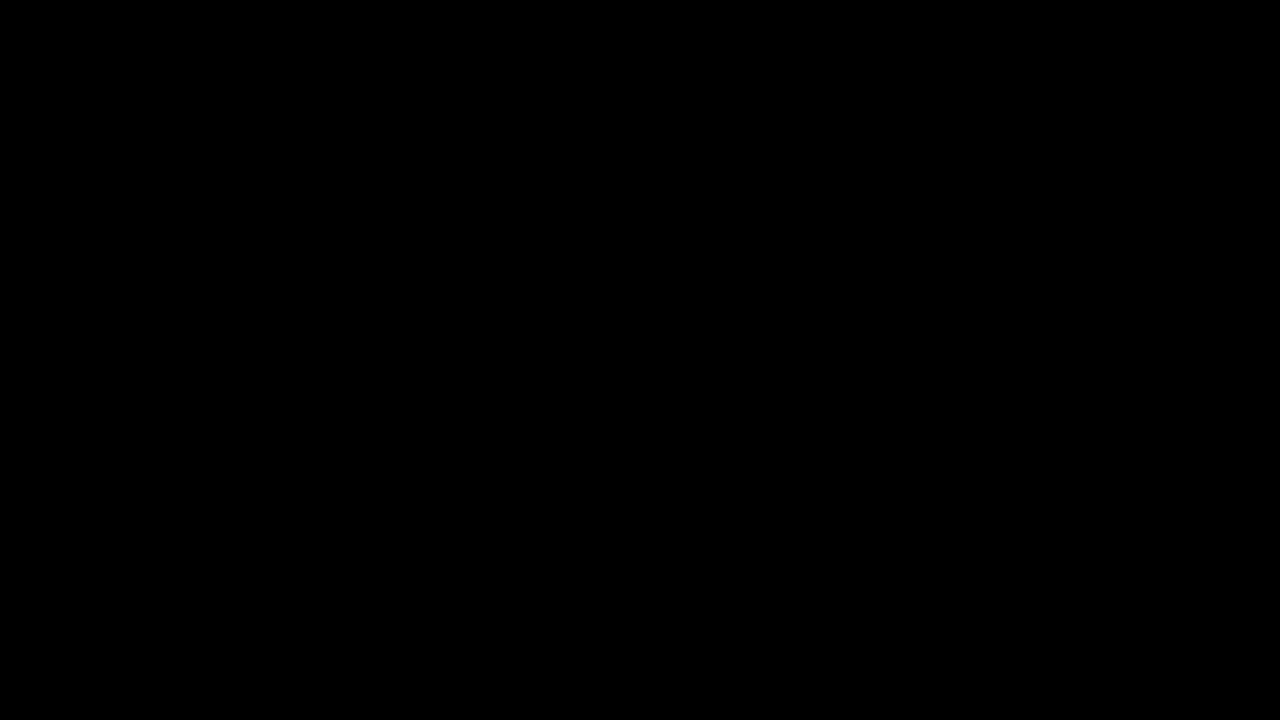

(720, 1280, 3)


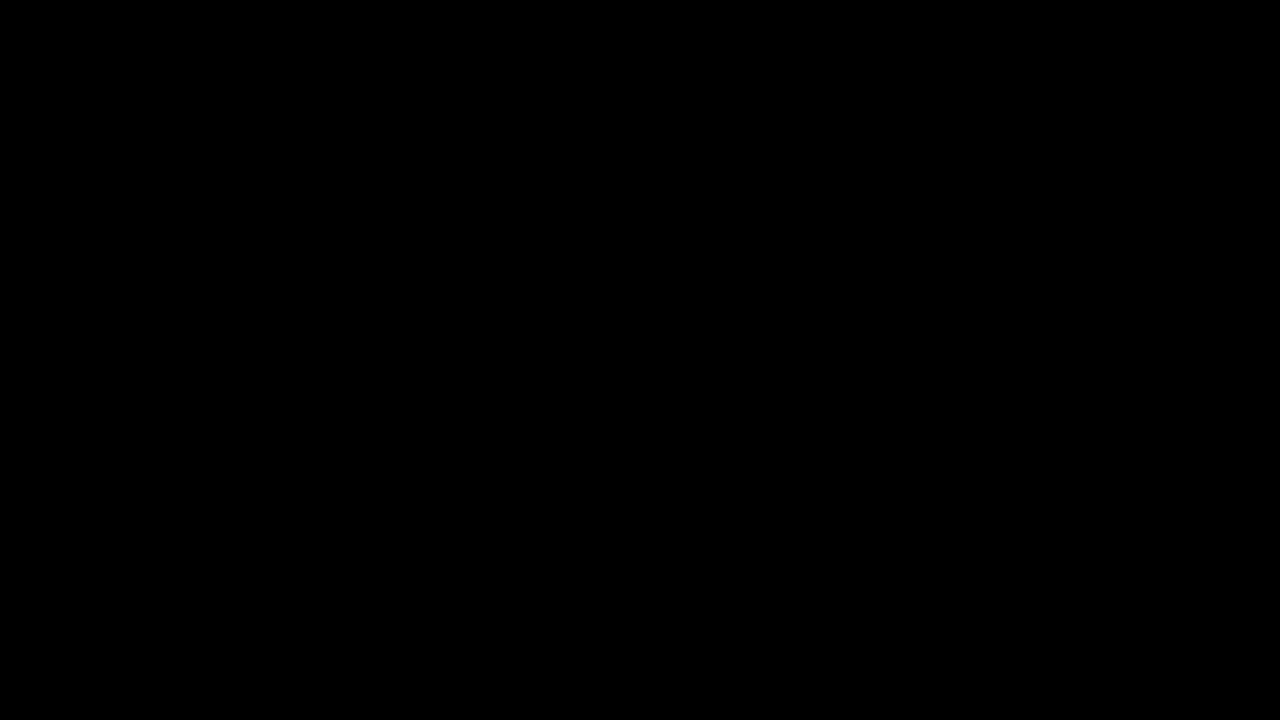

(720, 1280, 3)


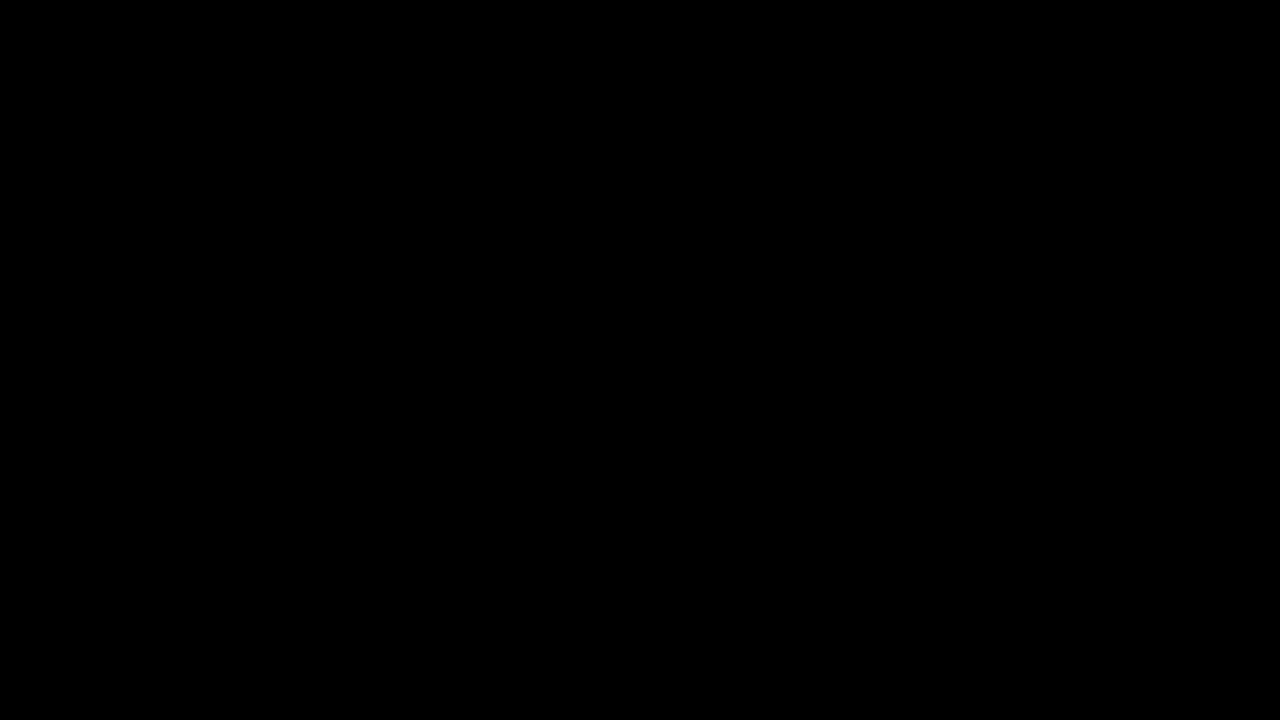

(720, 1280, 3)


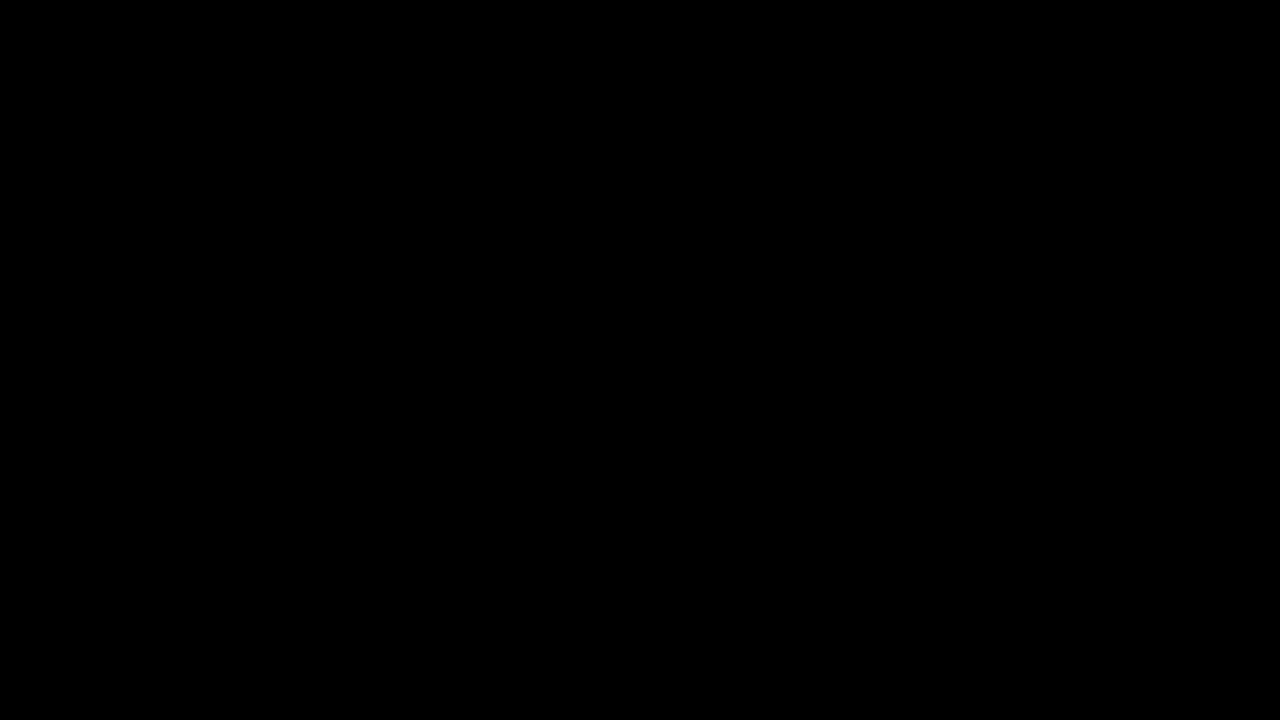

(720, 1280, 3)


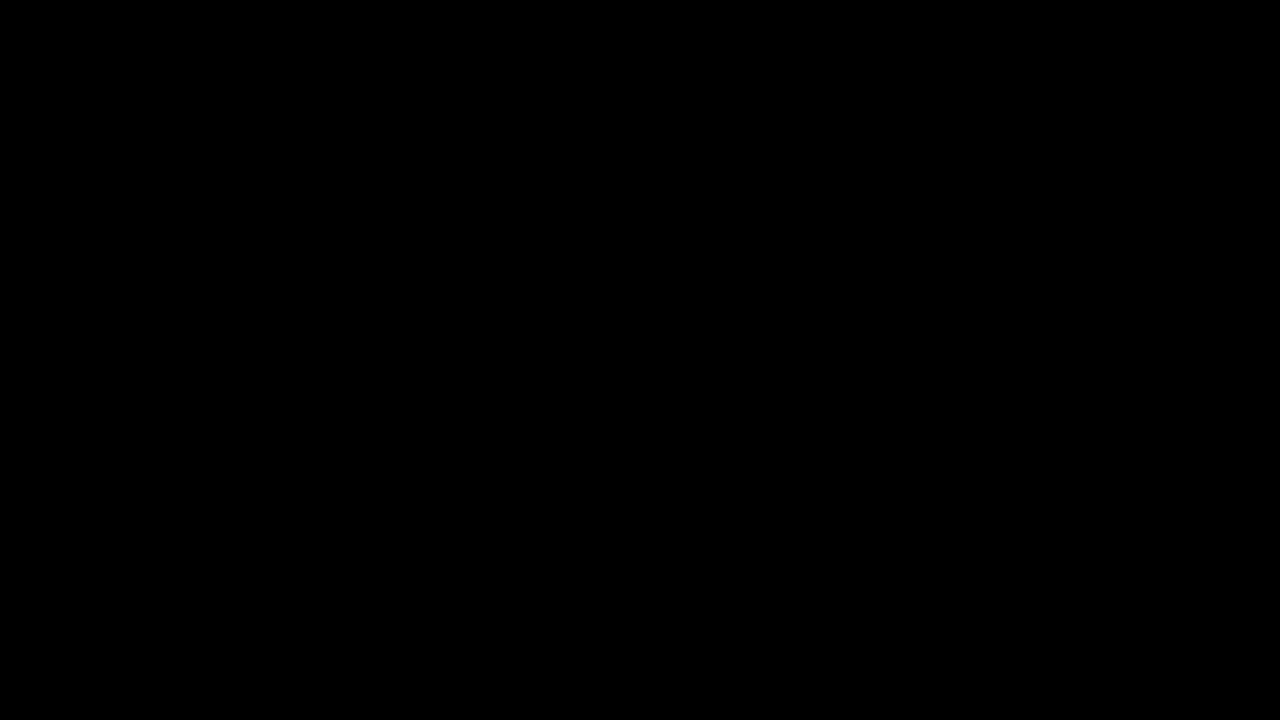

(720, 1280, 3)


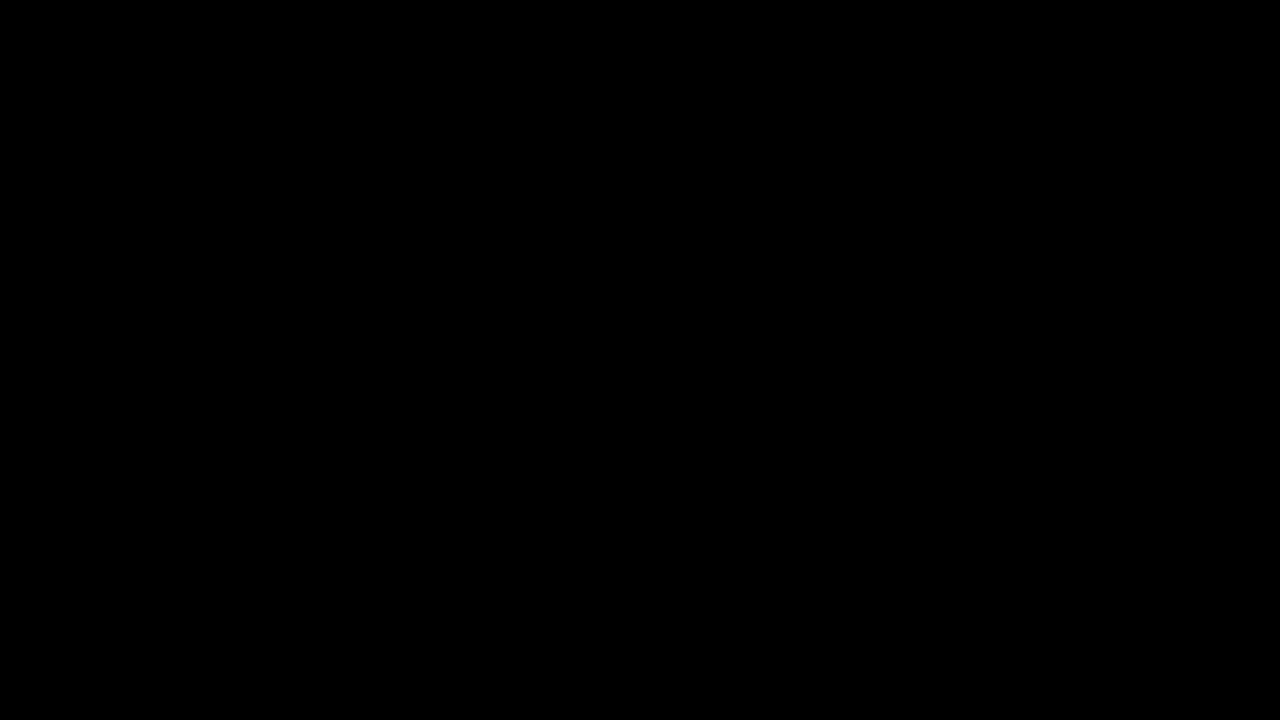

(720, 1280, 3)


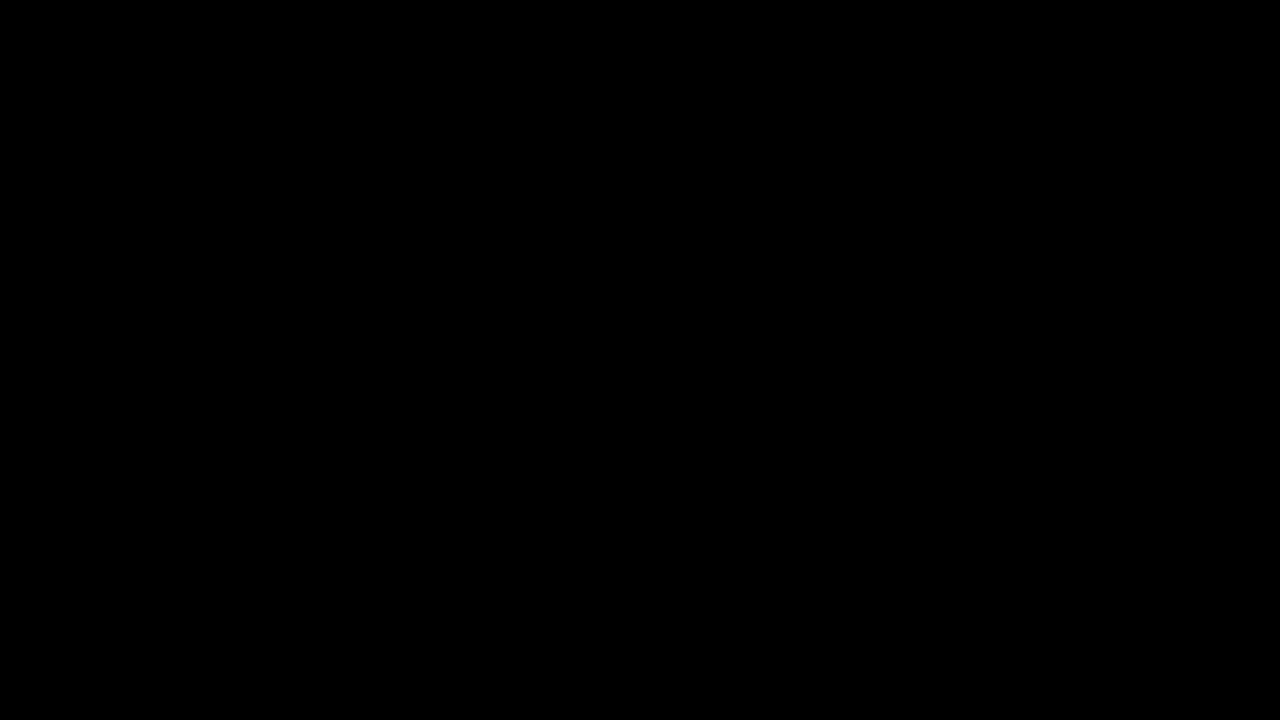

(720, 1280, 3)


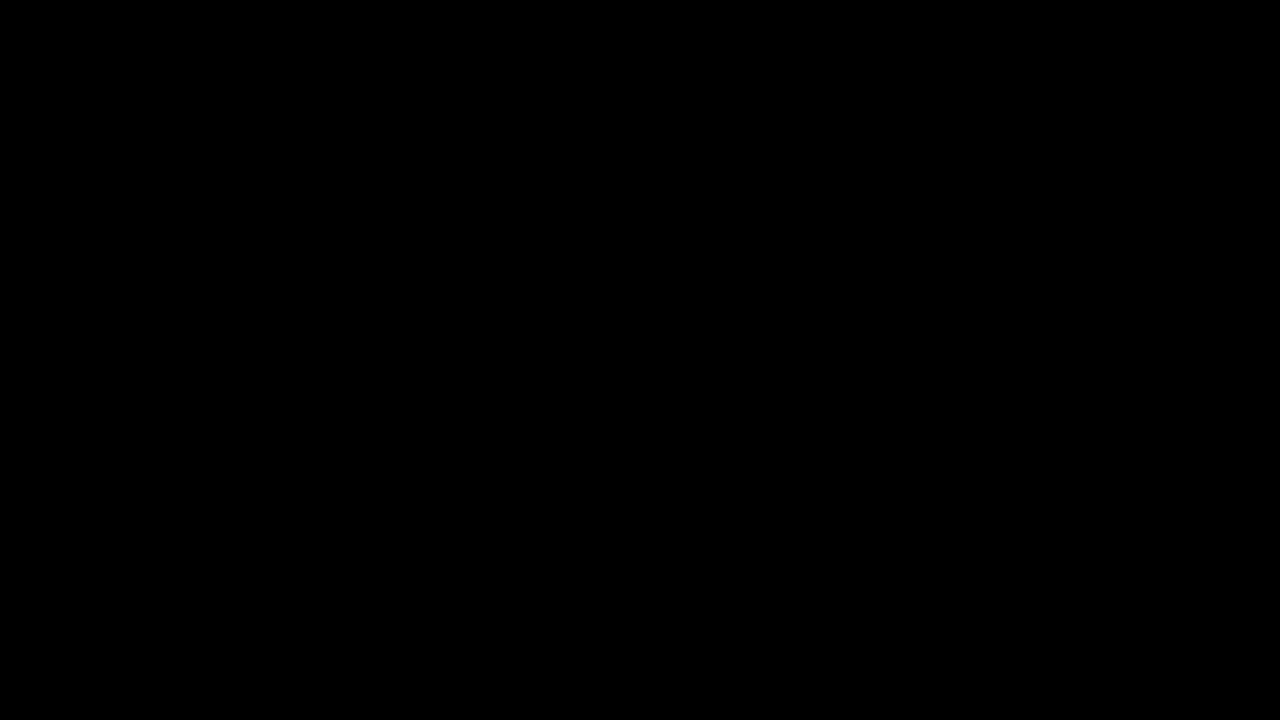

(720, 1280, 3)


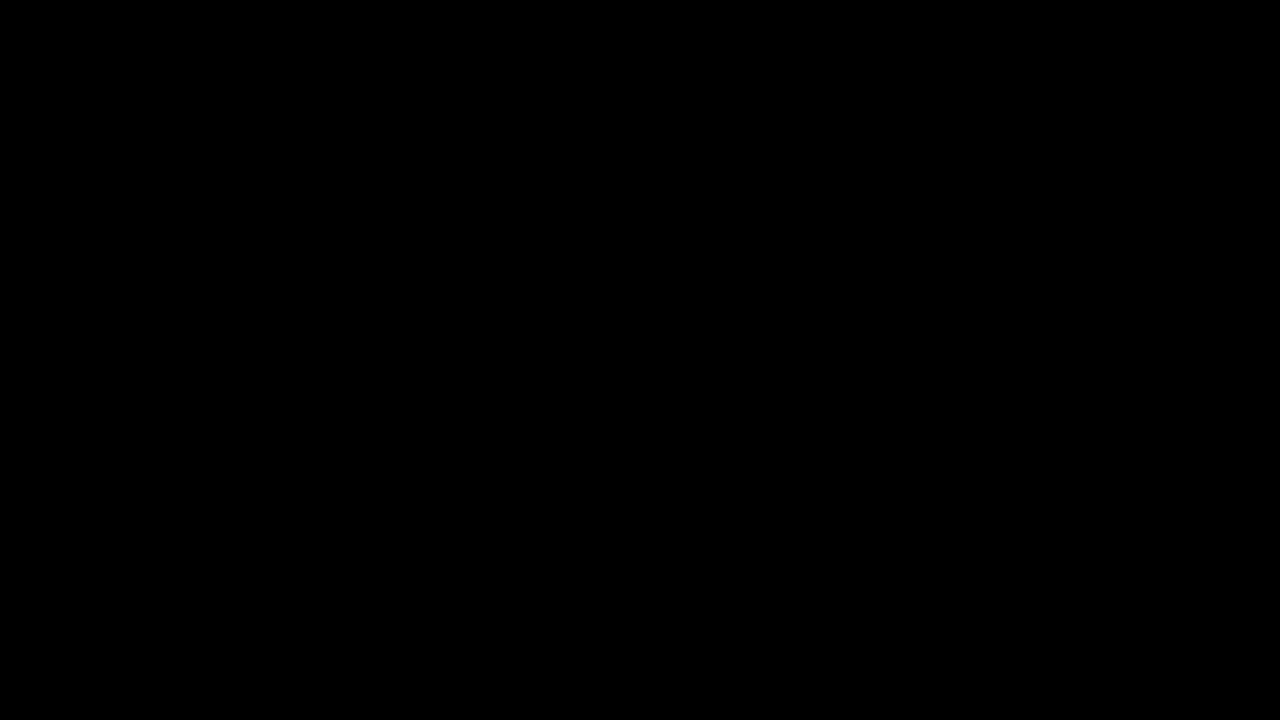

(720, 1280, 3)


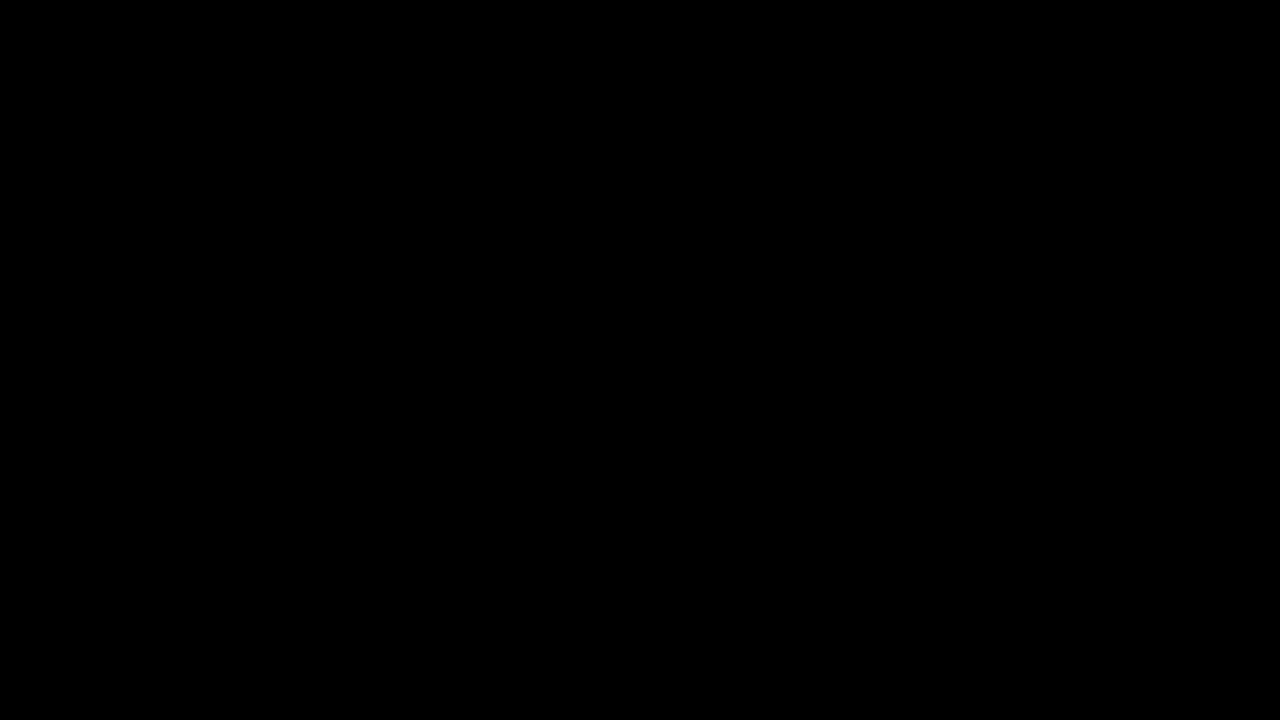

(720, 1280, 3)


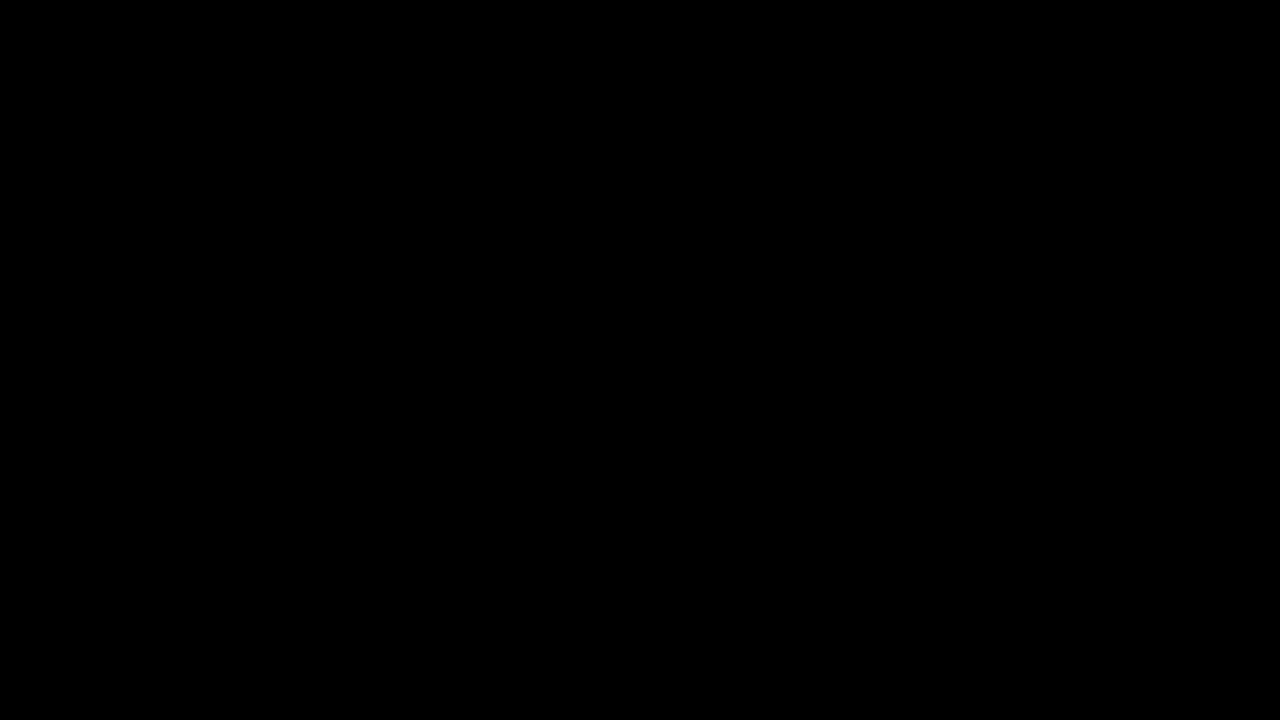

(720, 1280, 3)


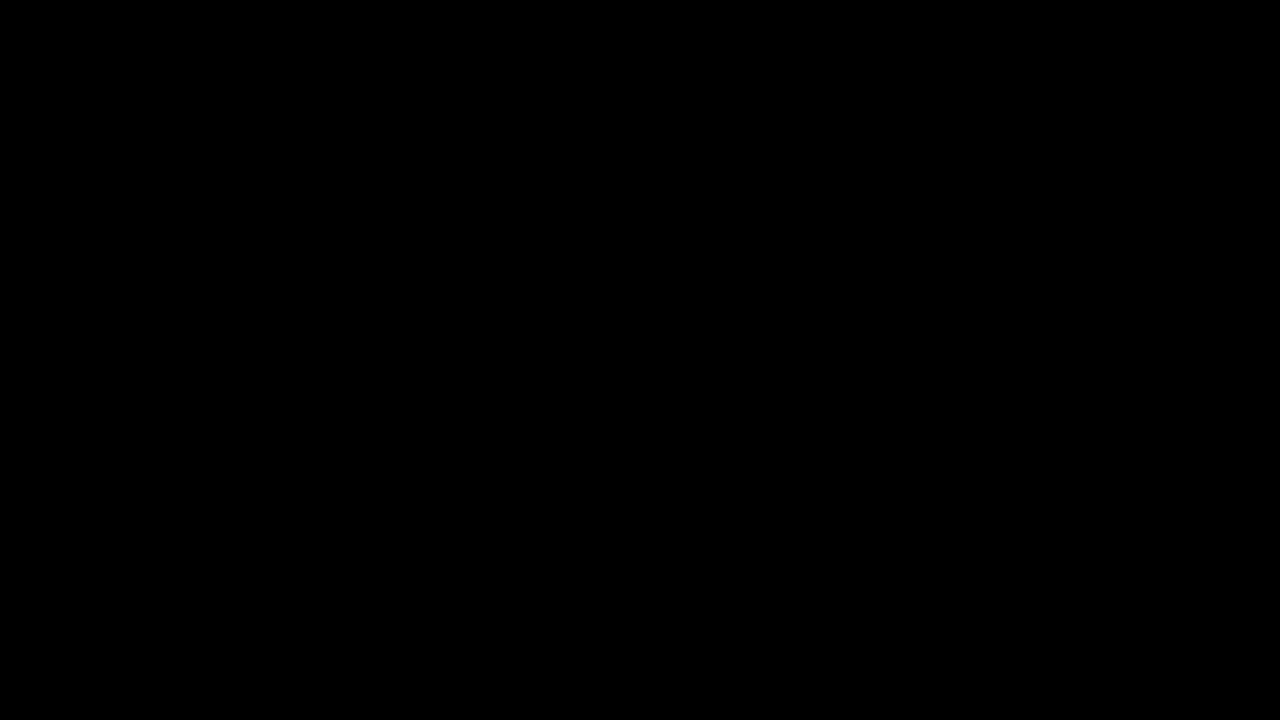

(720, 1280, 3)


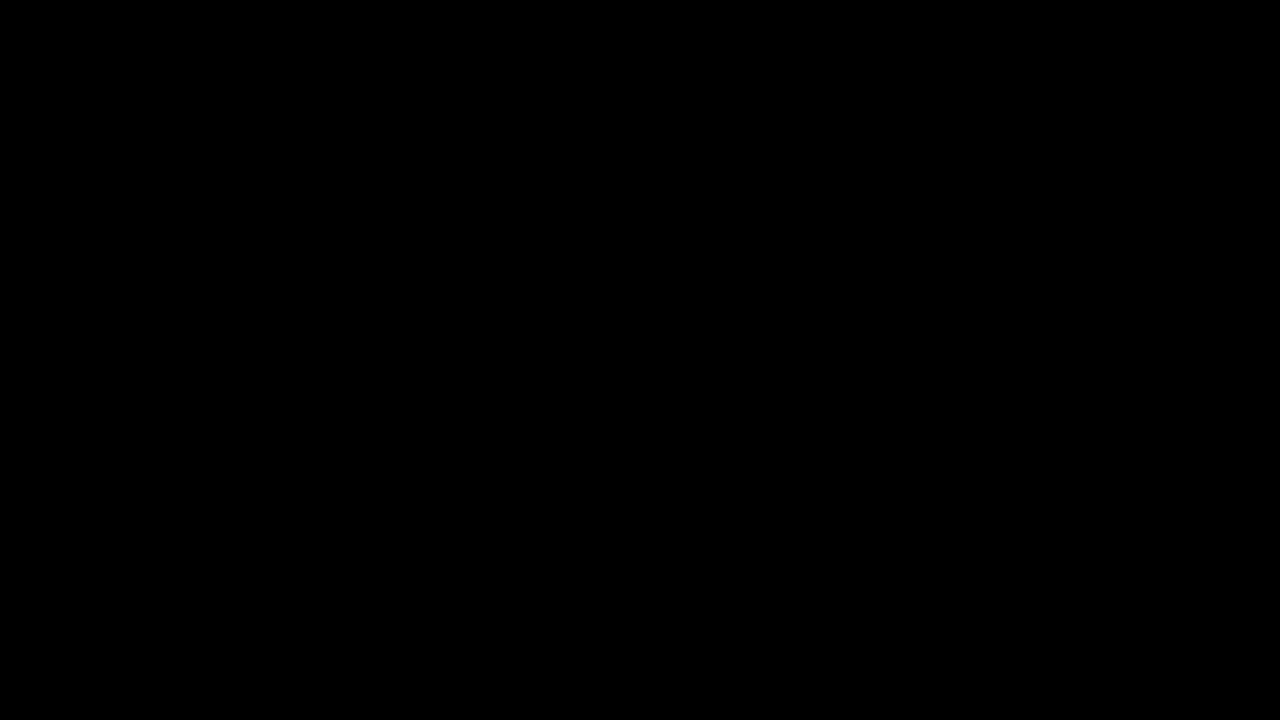

(720, 1280, 3)


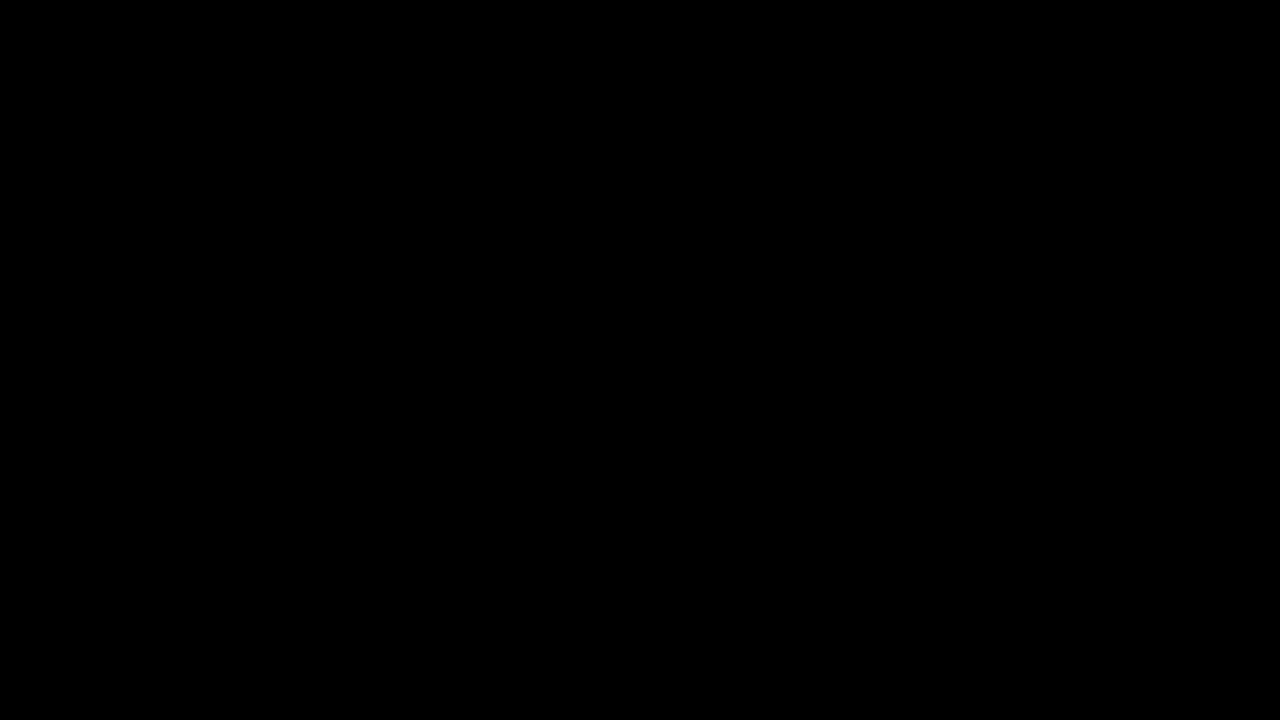

(720, 1280, 3)


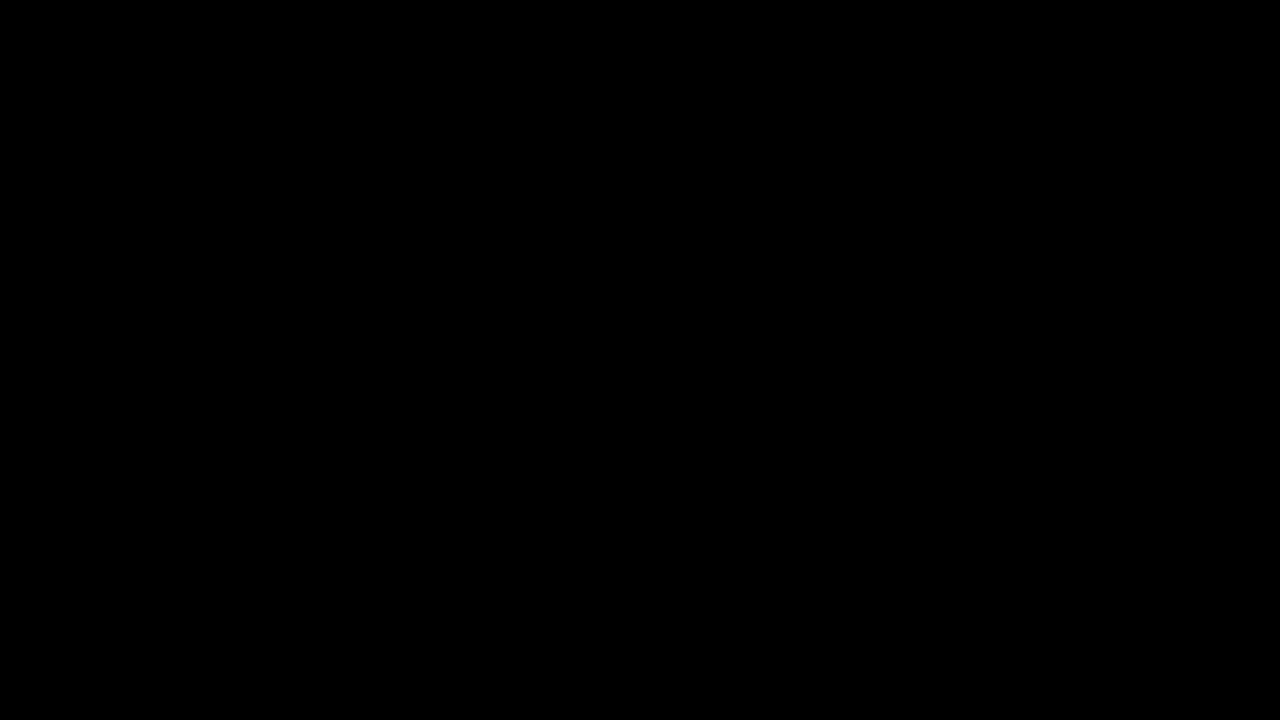

(720, 1280, 3)


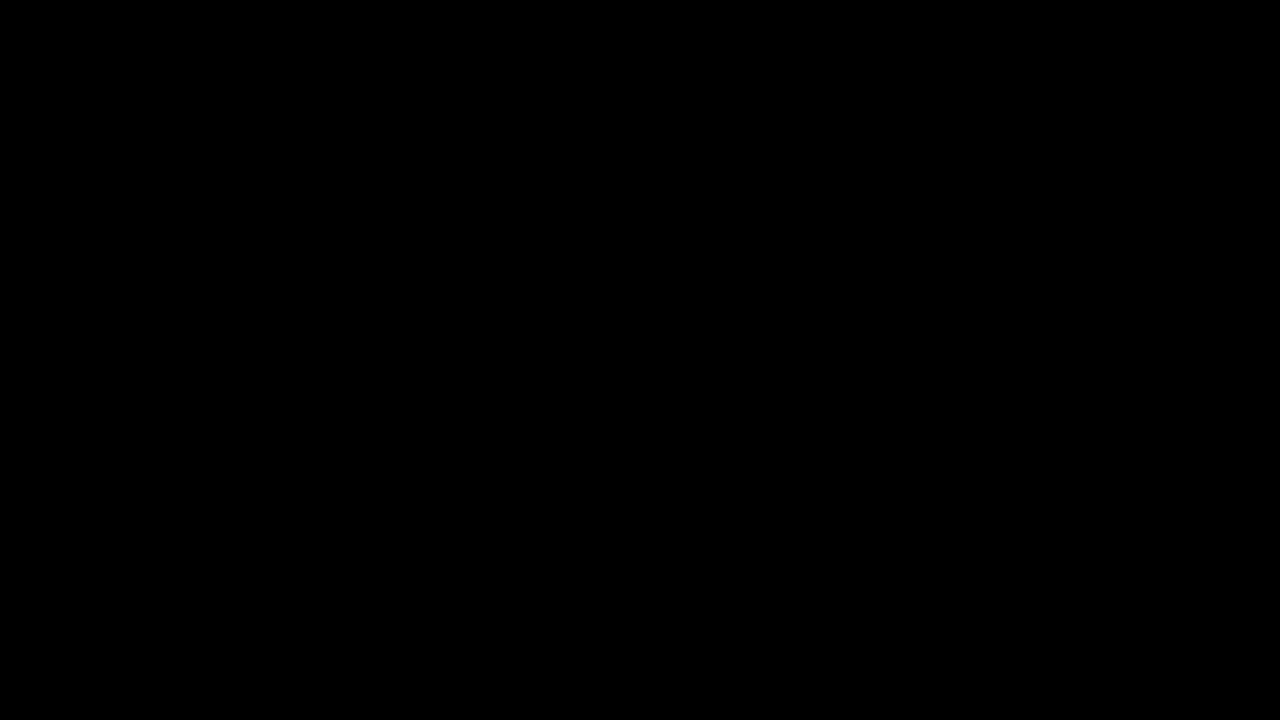

(720, 1280, 3)


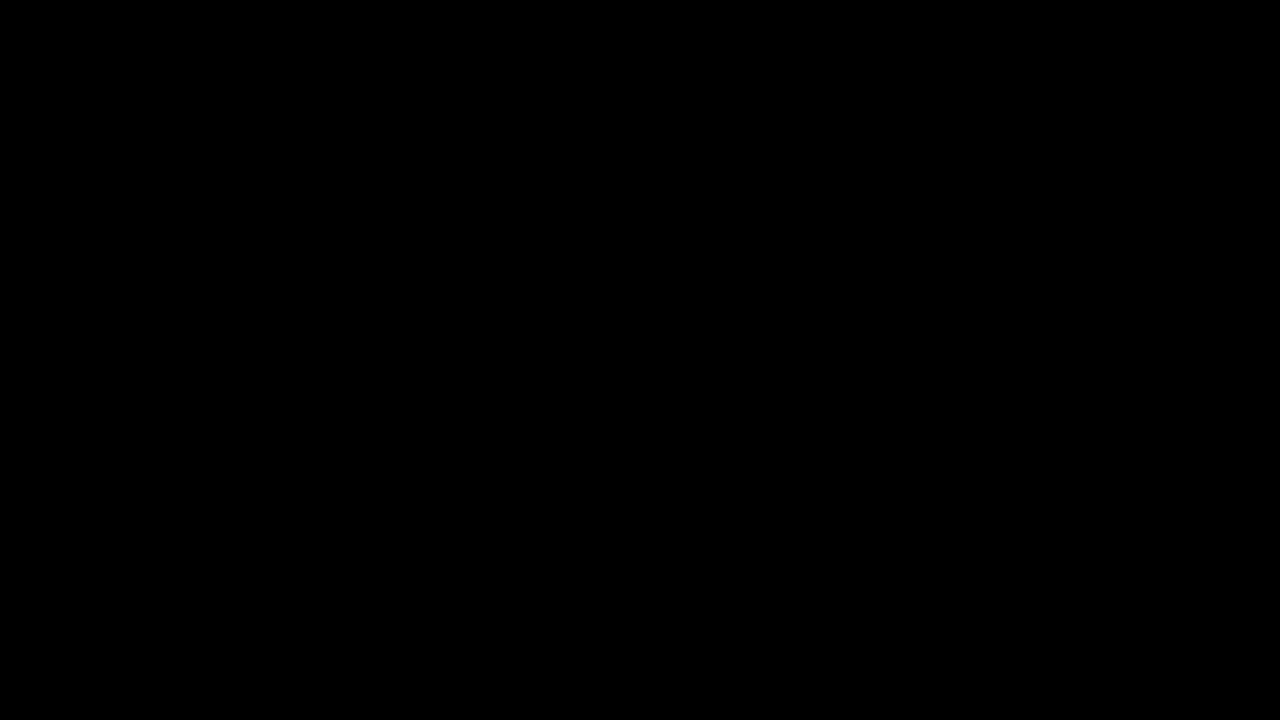

(720, 1280, 3)


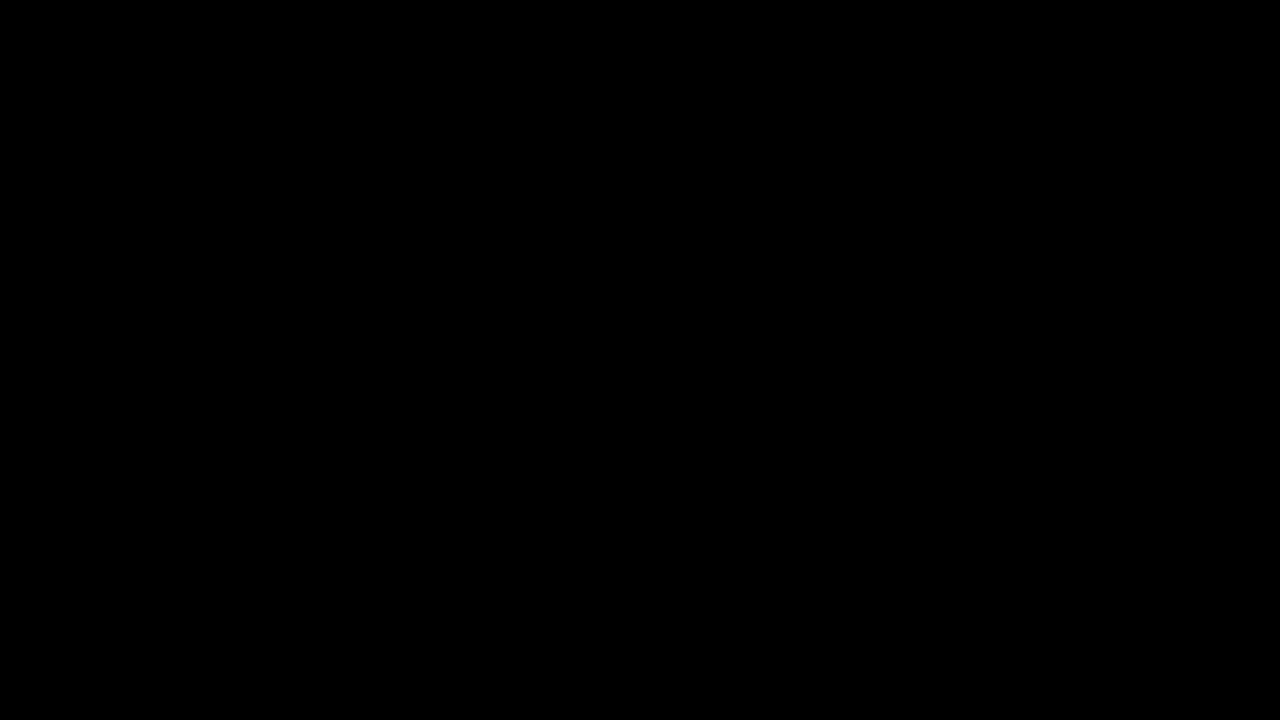

(720, 1280, 3)


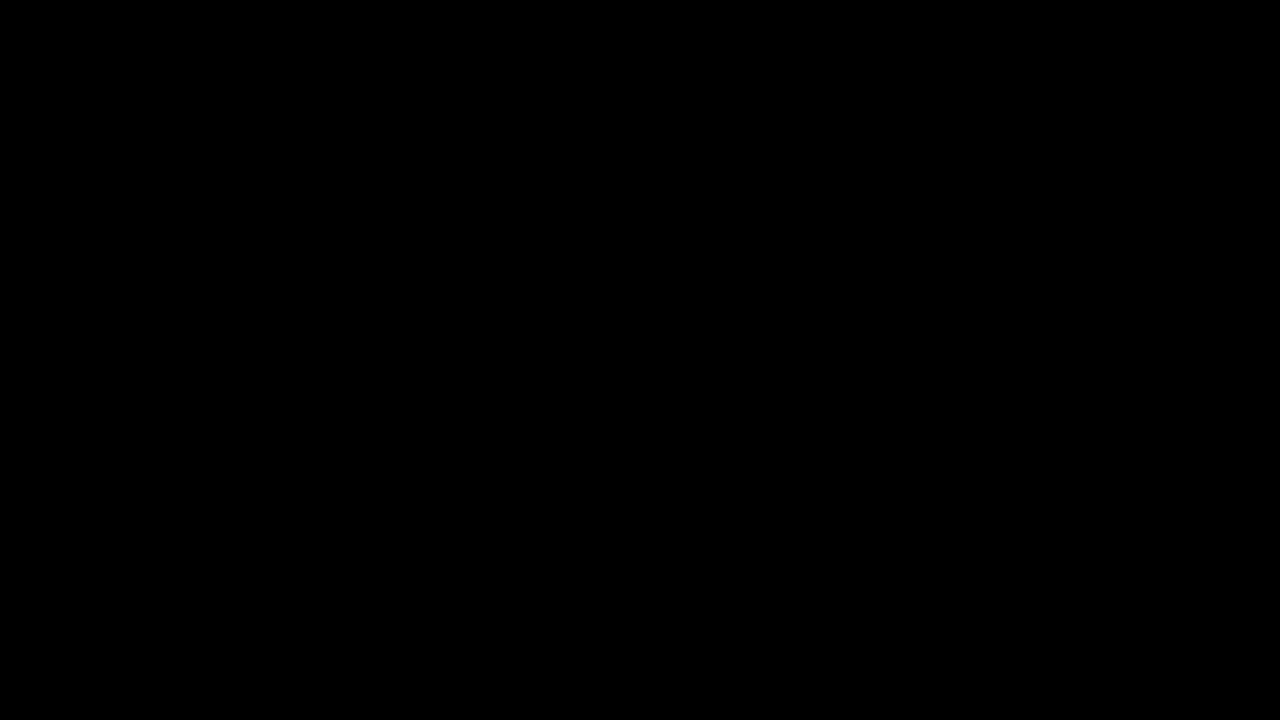

(720, 1280, 3)


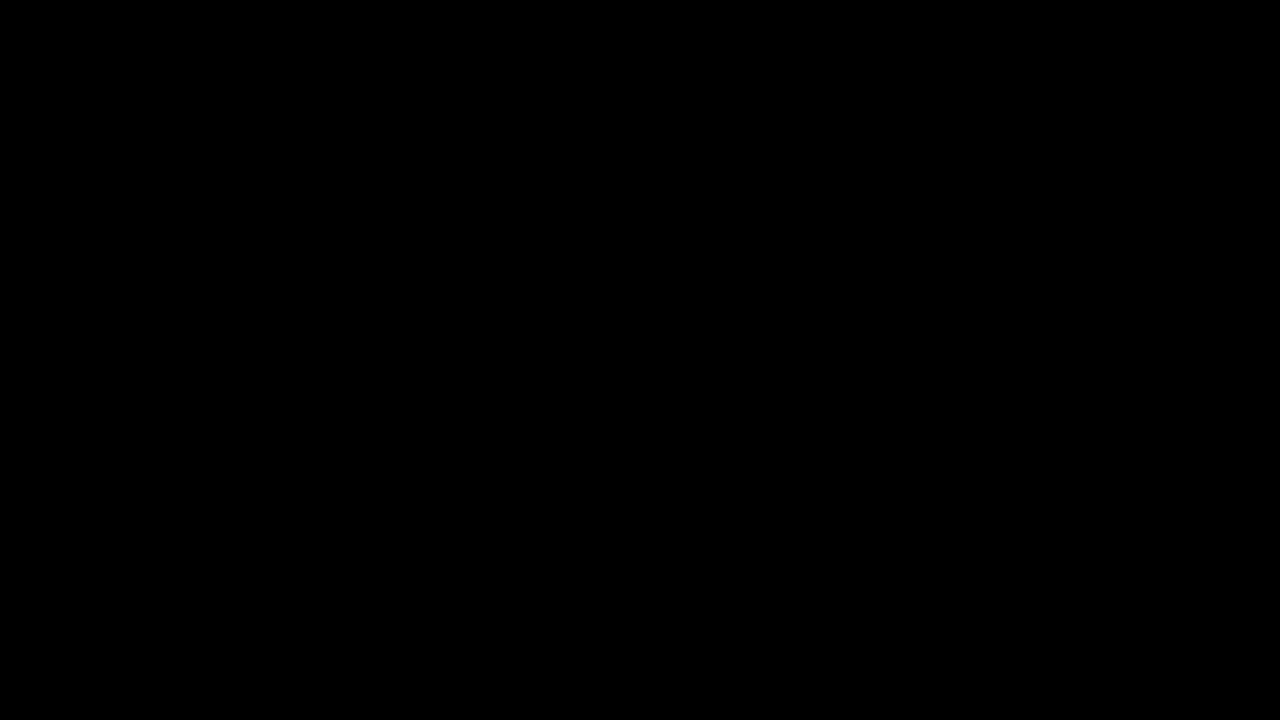

(720, 1280, 3)


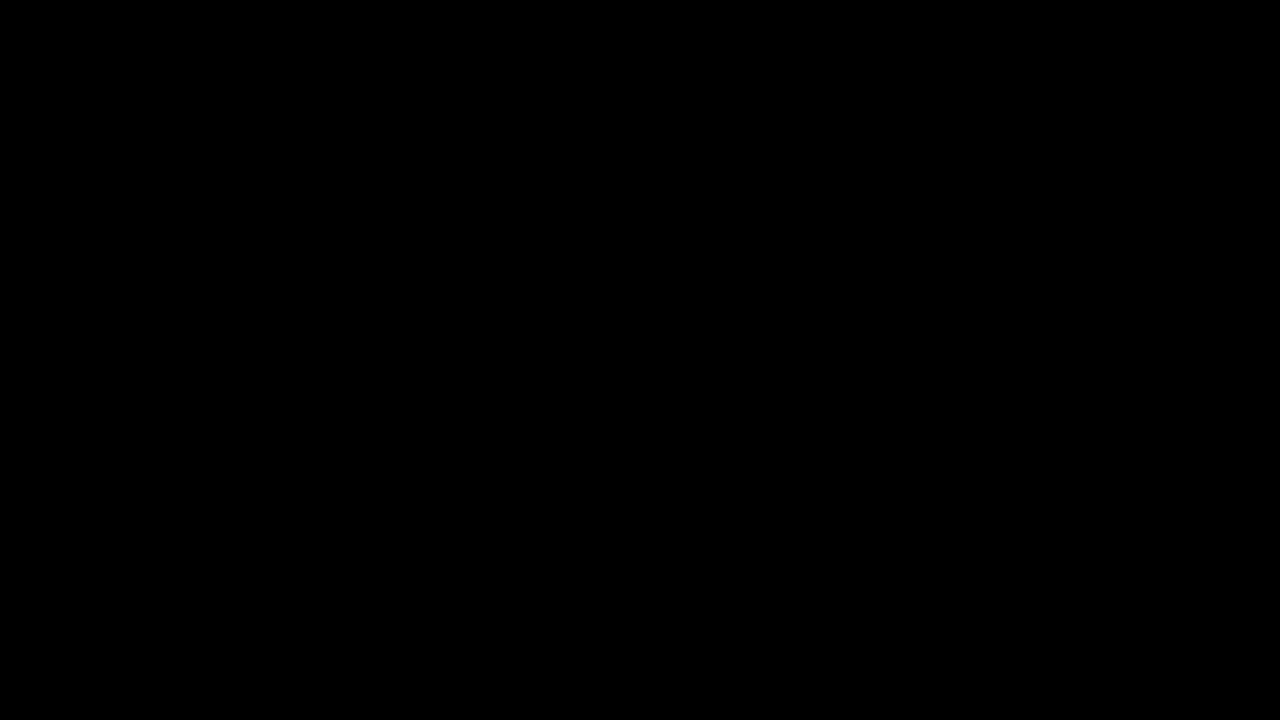

(720, 1280, 3)


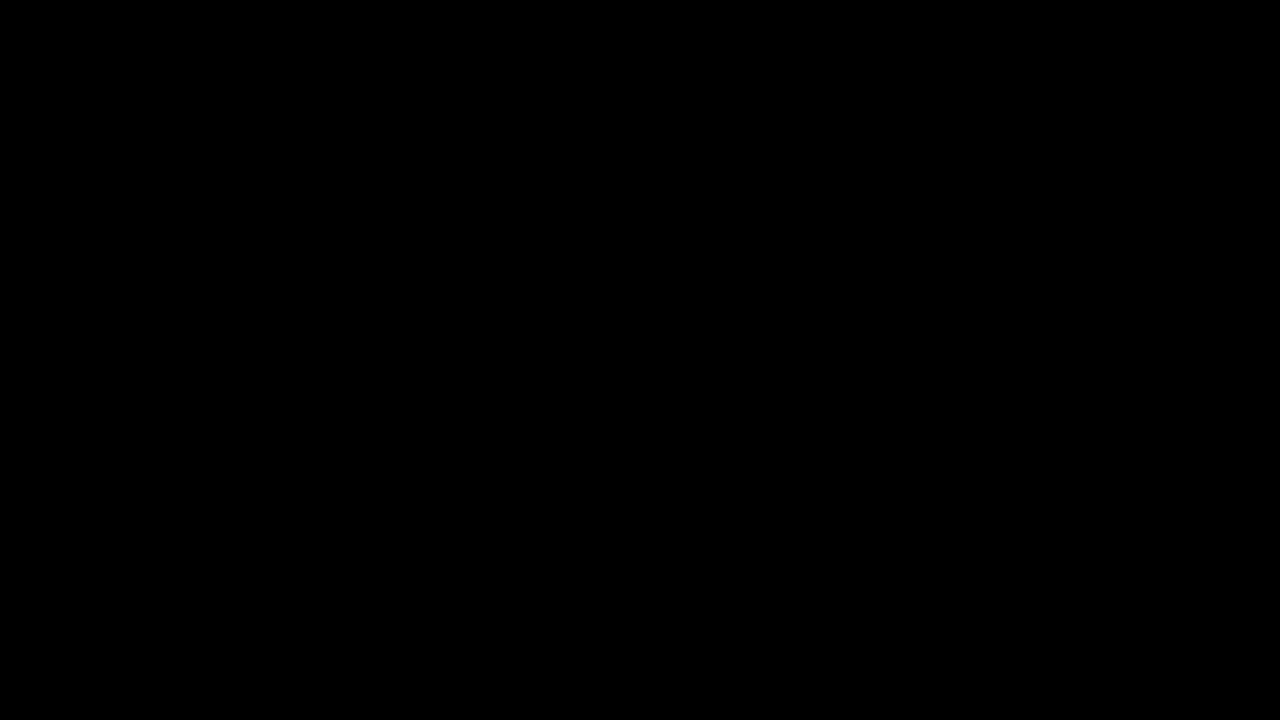

(720, 1280, 3)


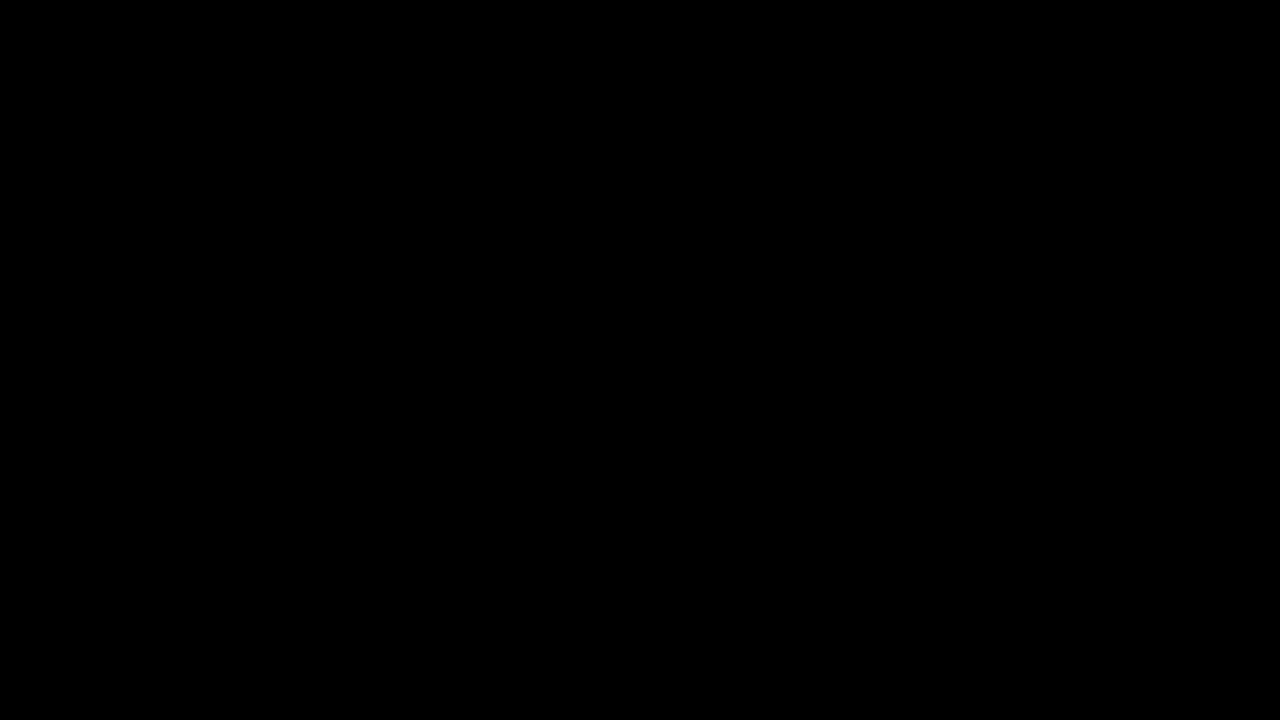

(720, 1280, 3)


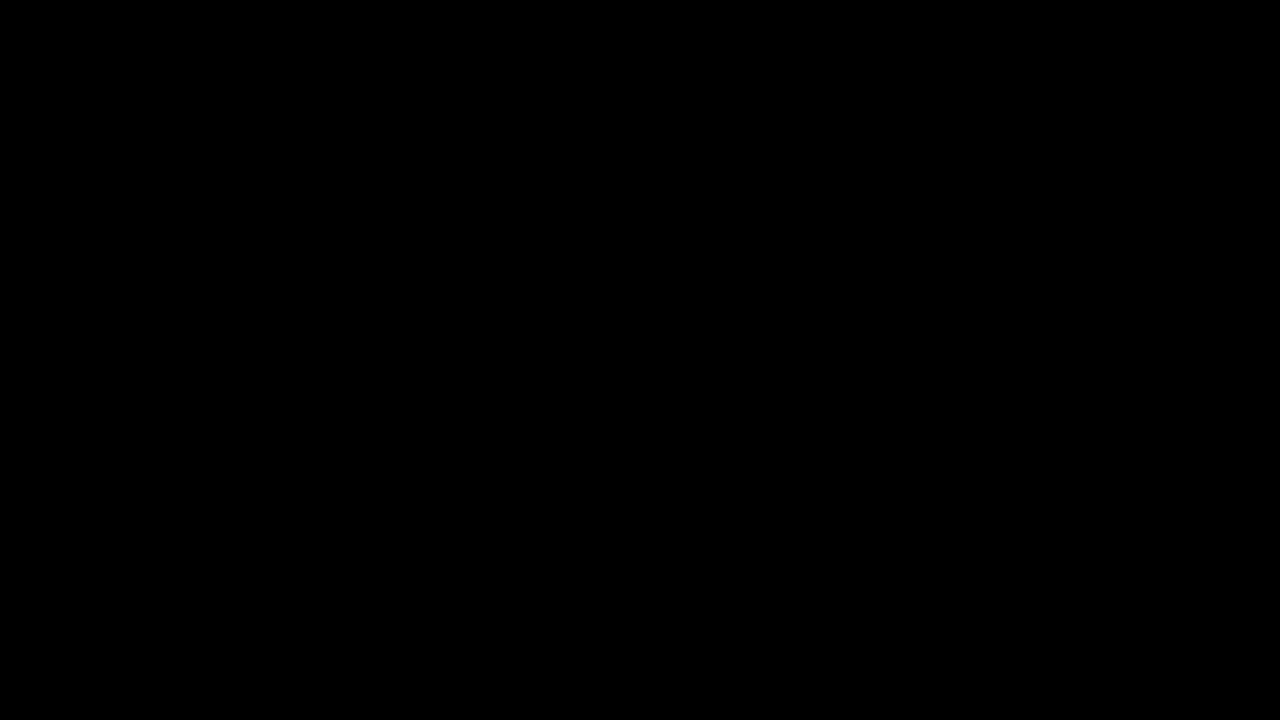

(720, 1280, 3)


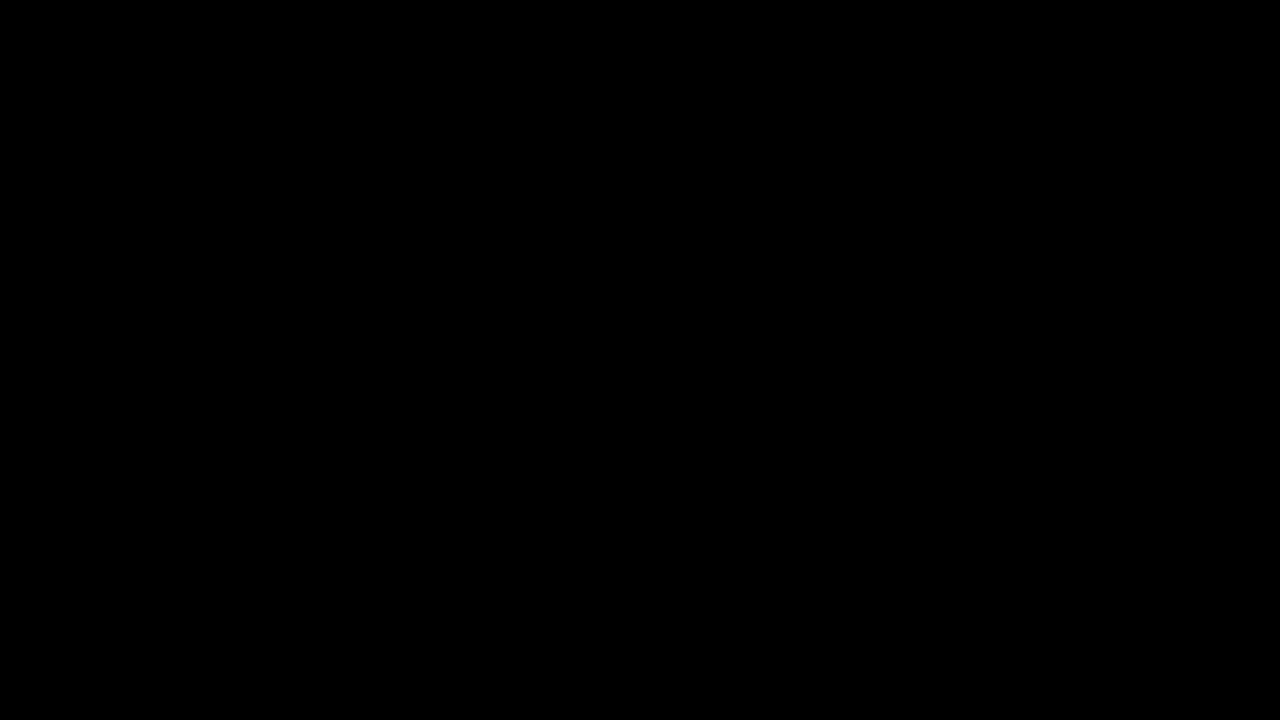

(720, 1280, 3)


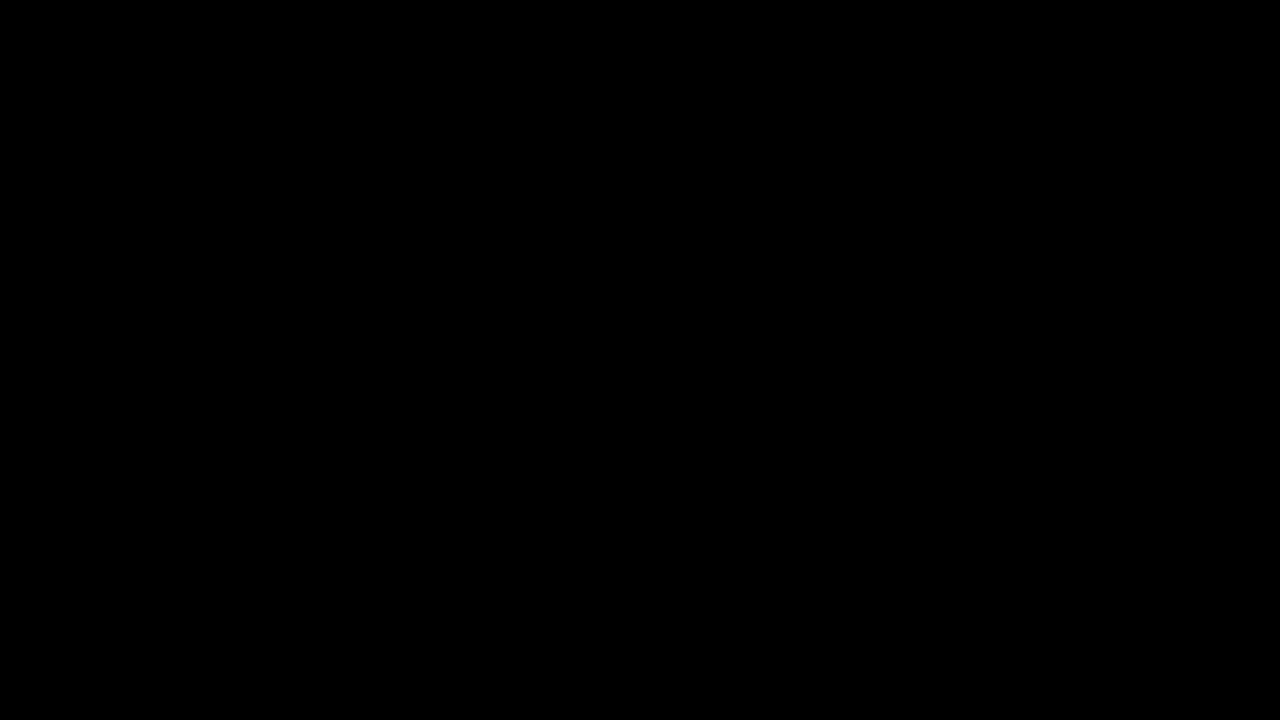

(720, 1280, 3)


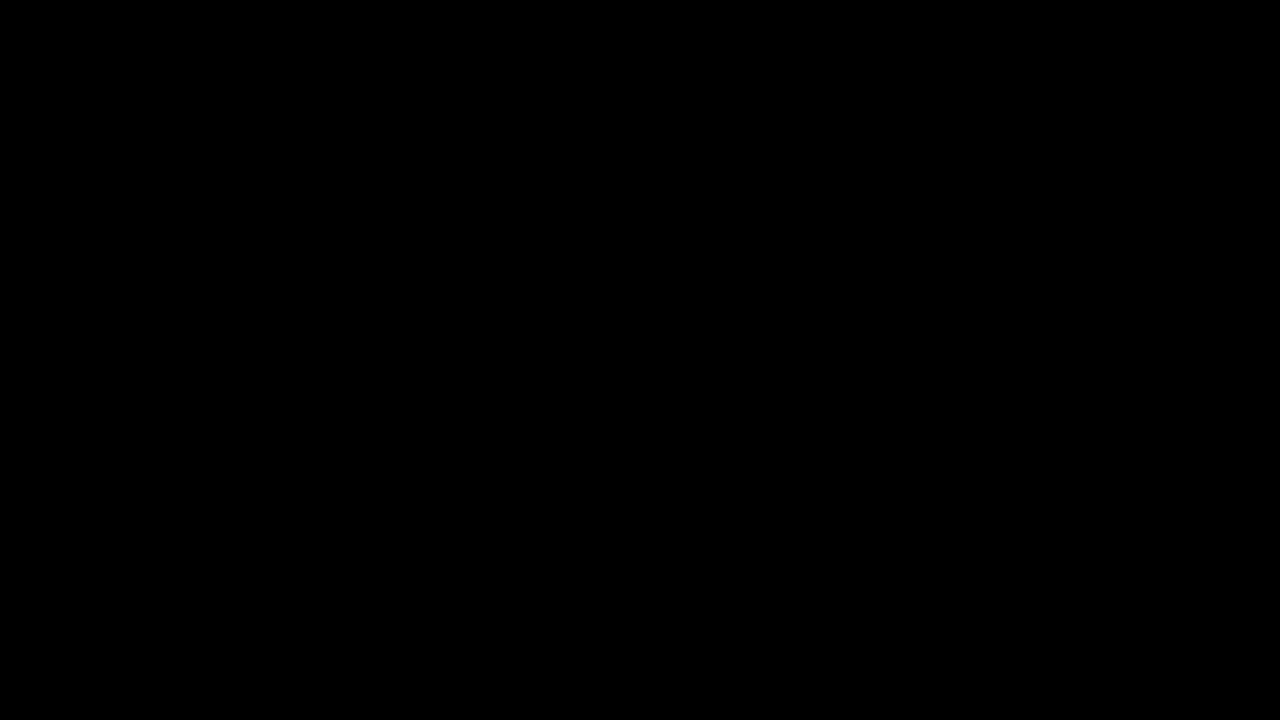

(720, 1280, 3)


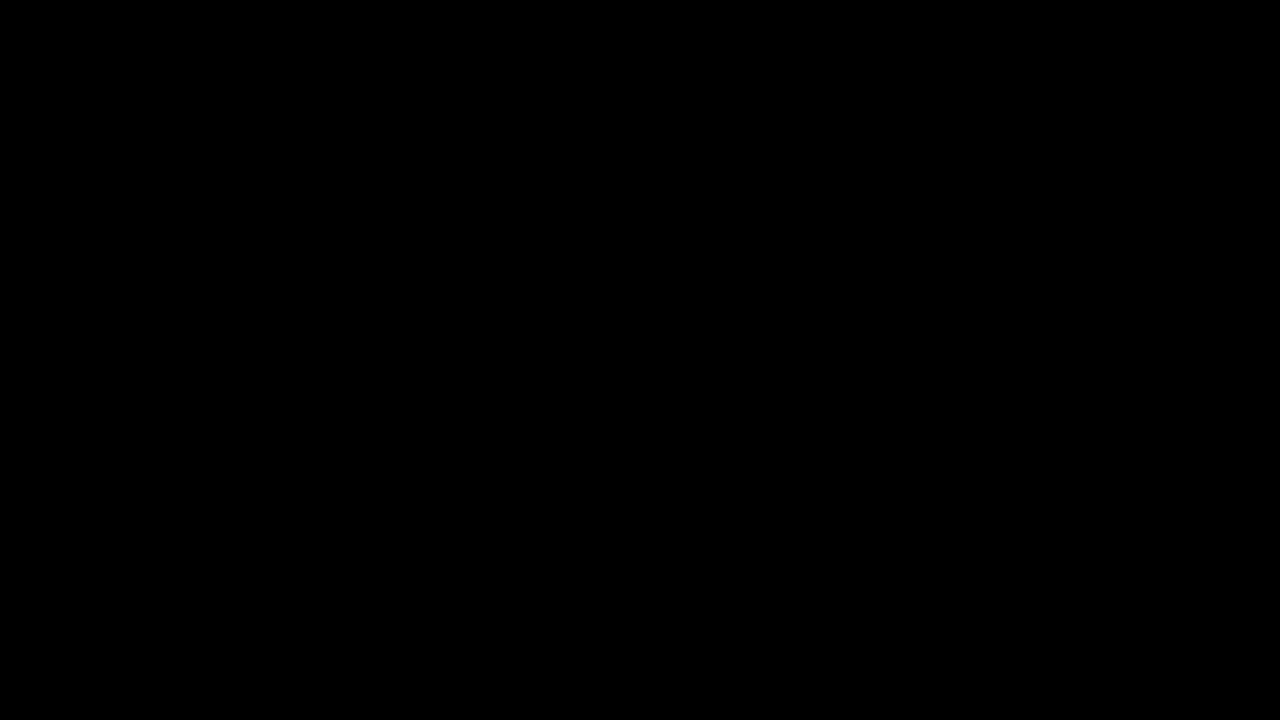

(720, 1280, 3)


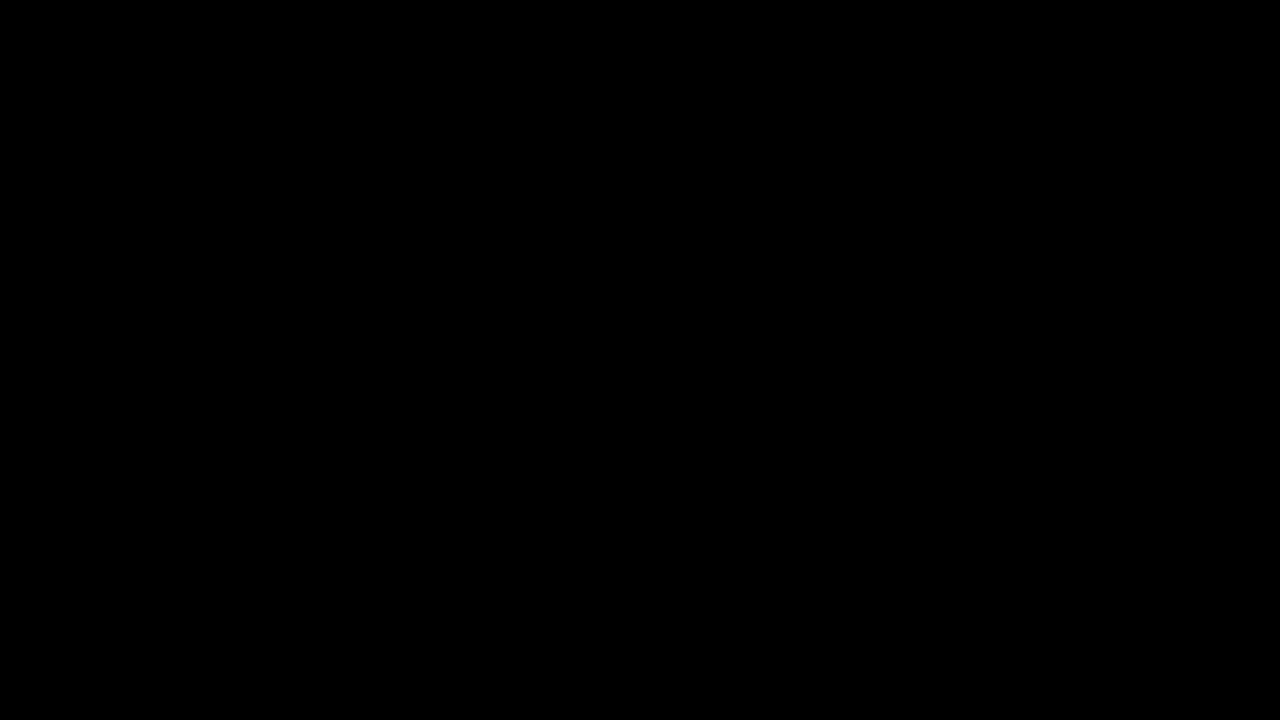

(720, 1280, 3)


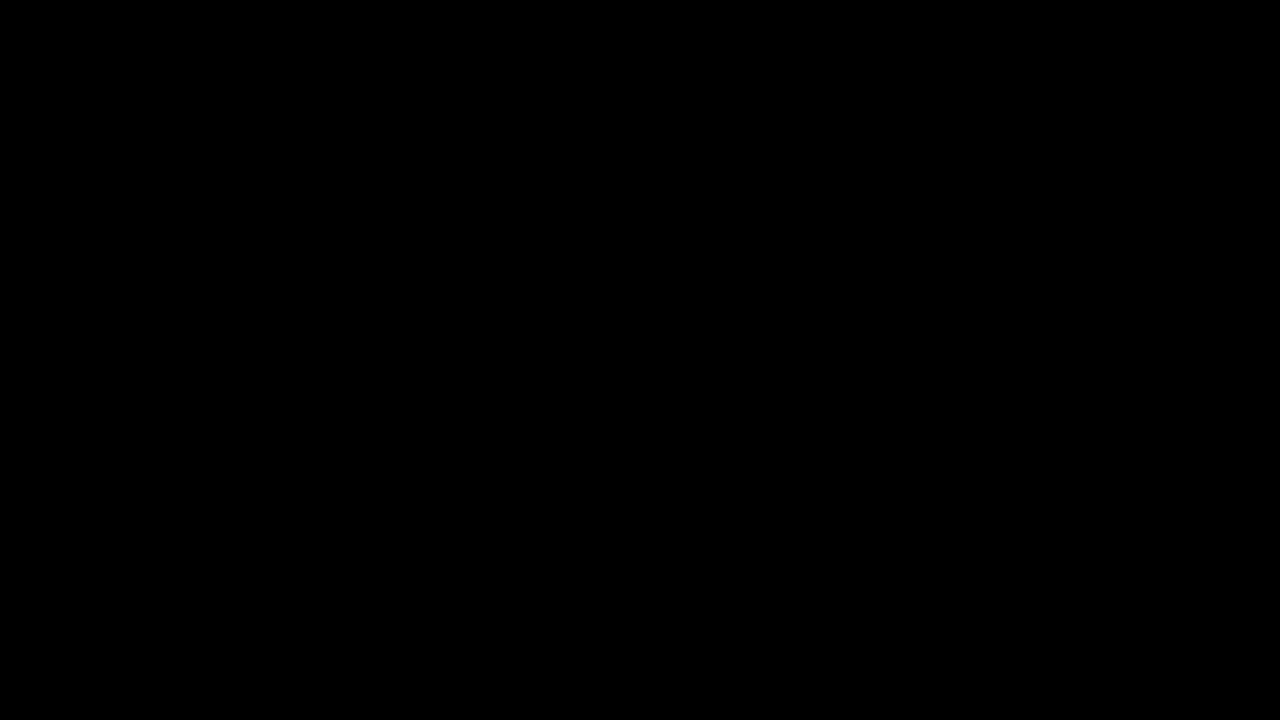

(720, 1280, 3)


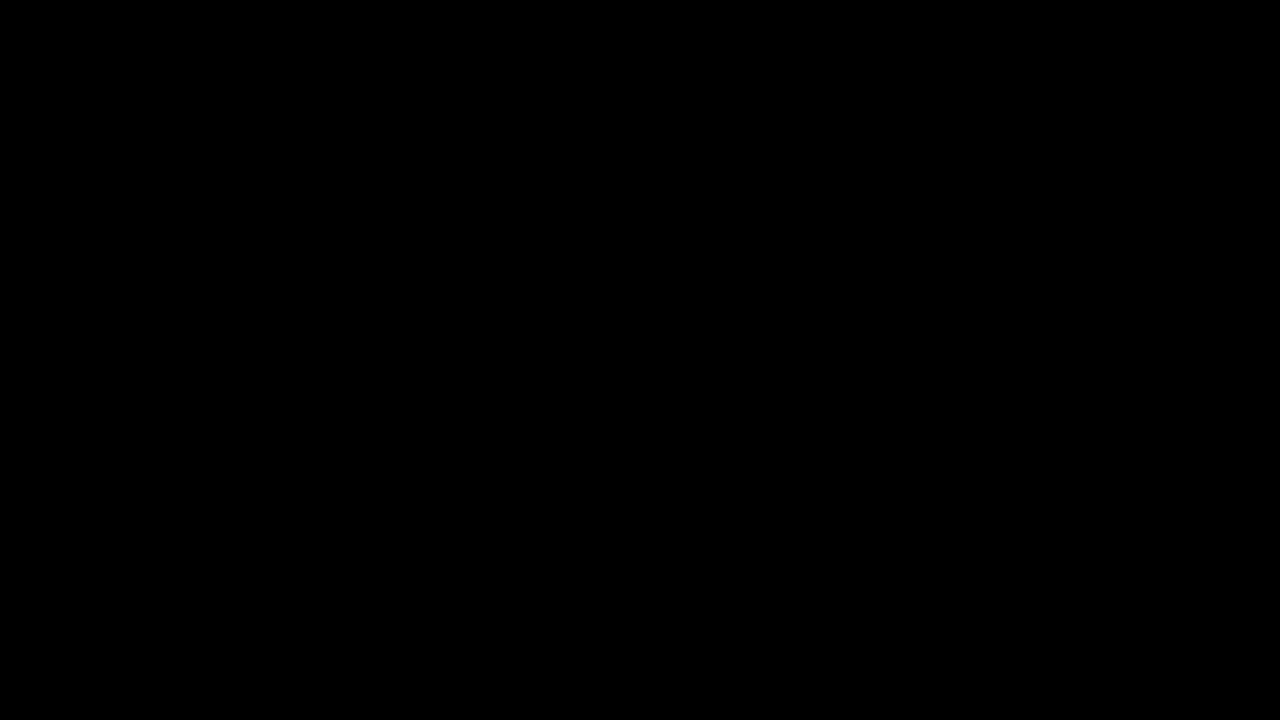

(720, 1280, 3)


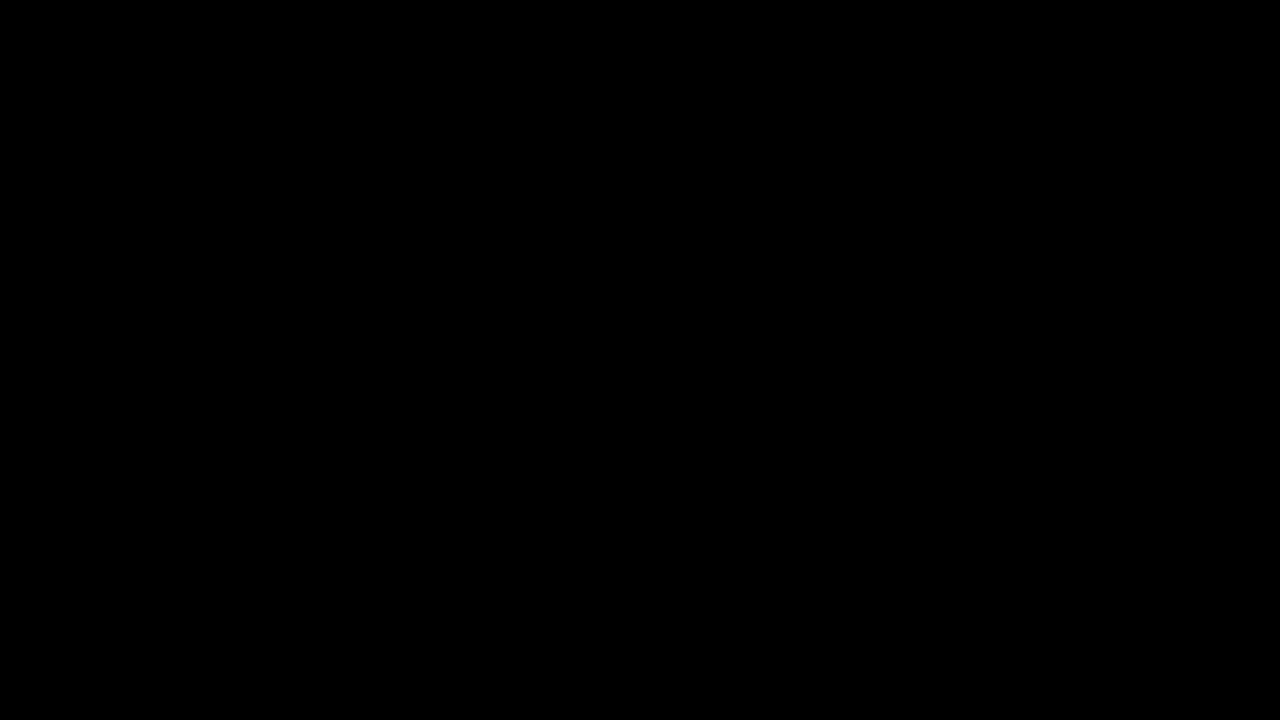

(720, 1280, 3)


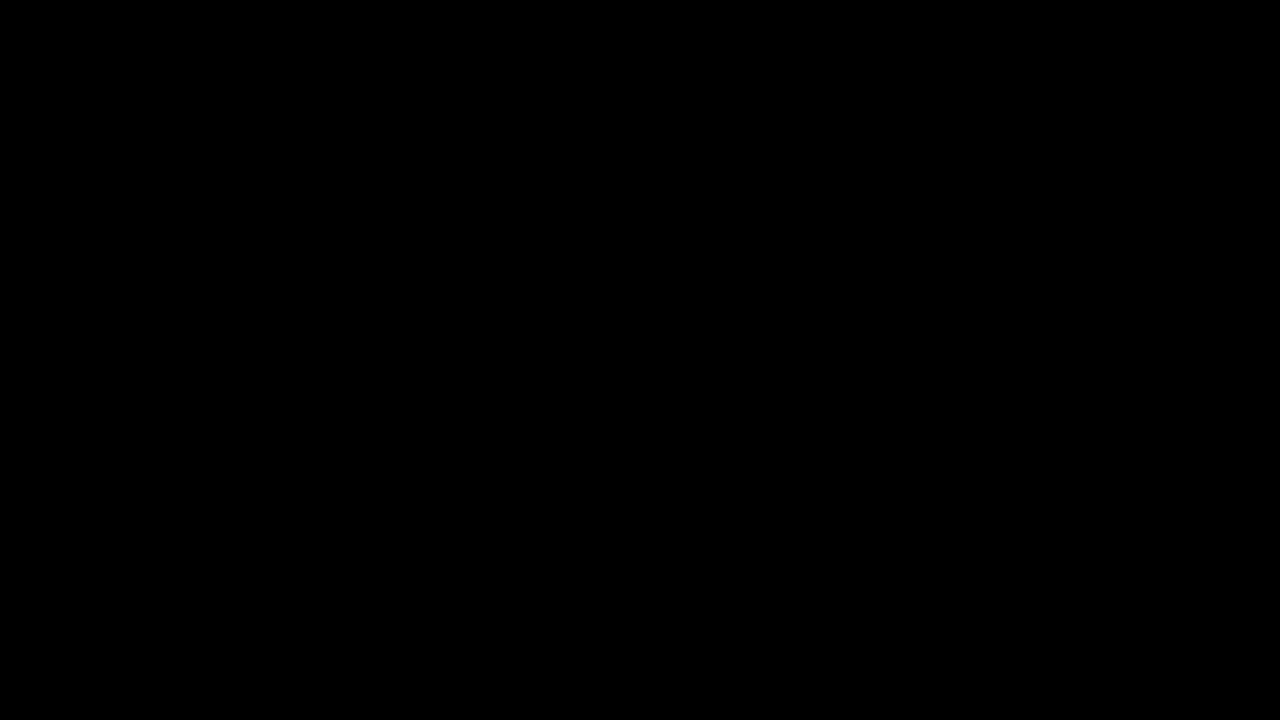

(720, 1280, 3)


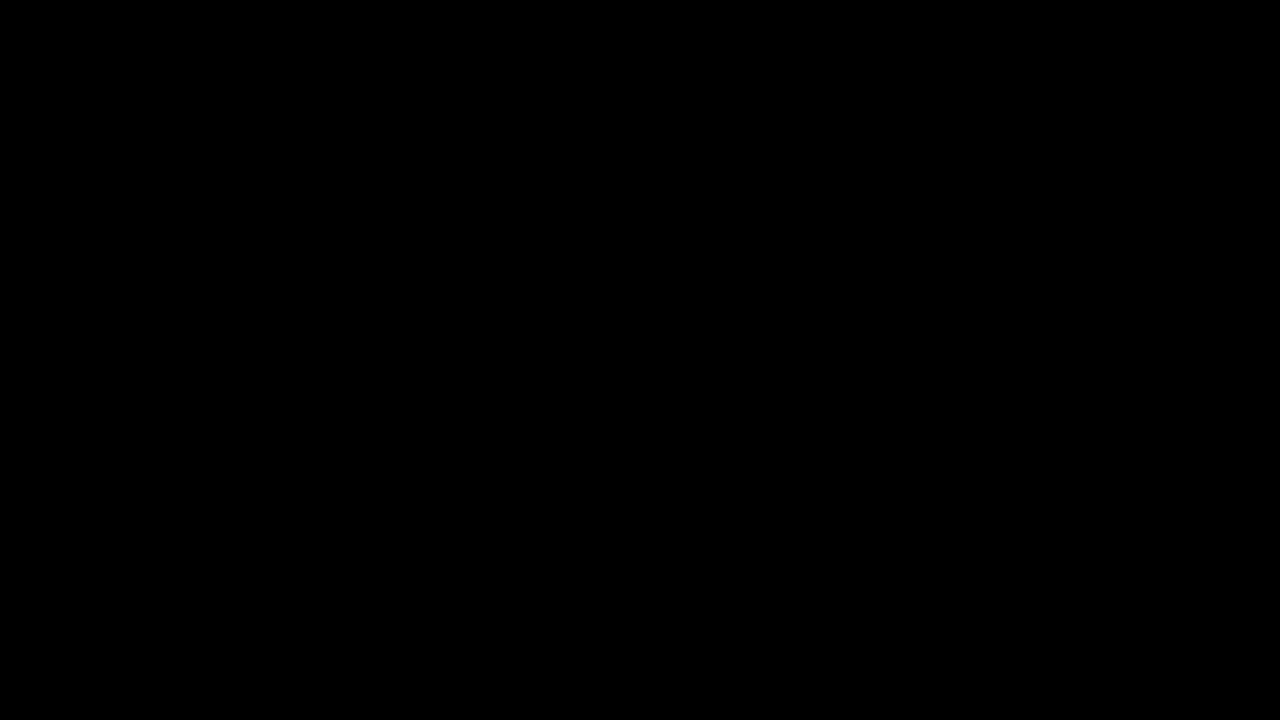

(720, 1280, 3)


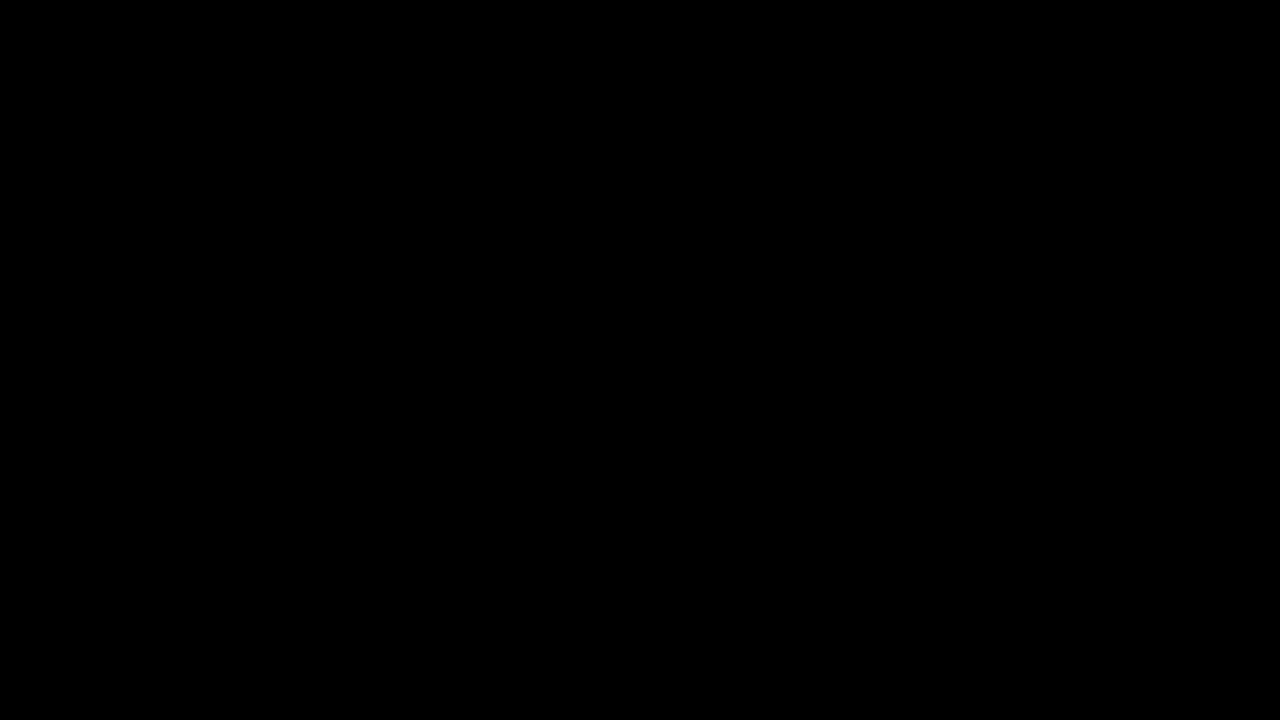

(720, 1280, 3)


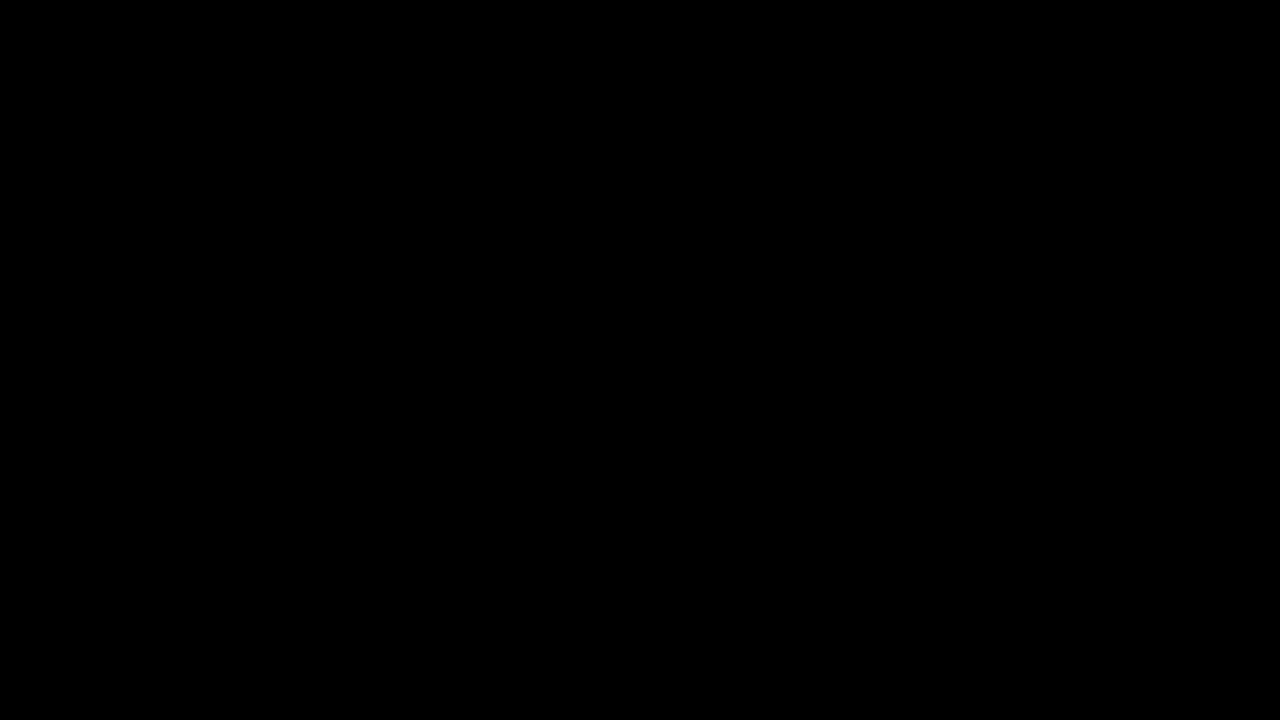

(720, 1280, 3)


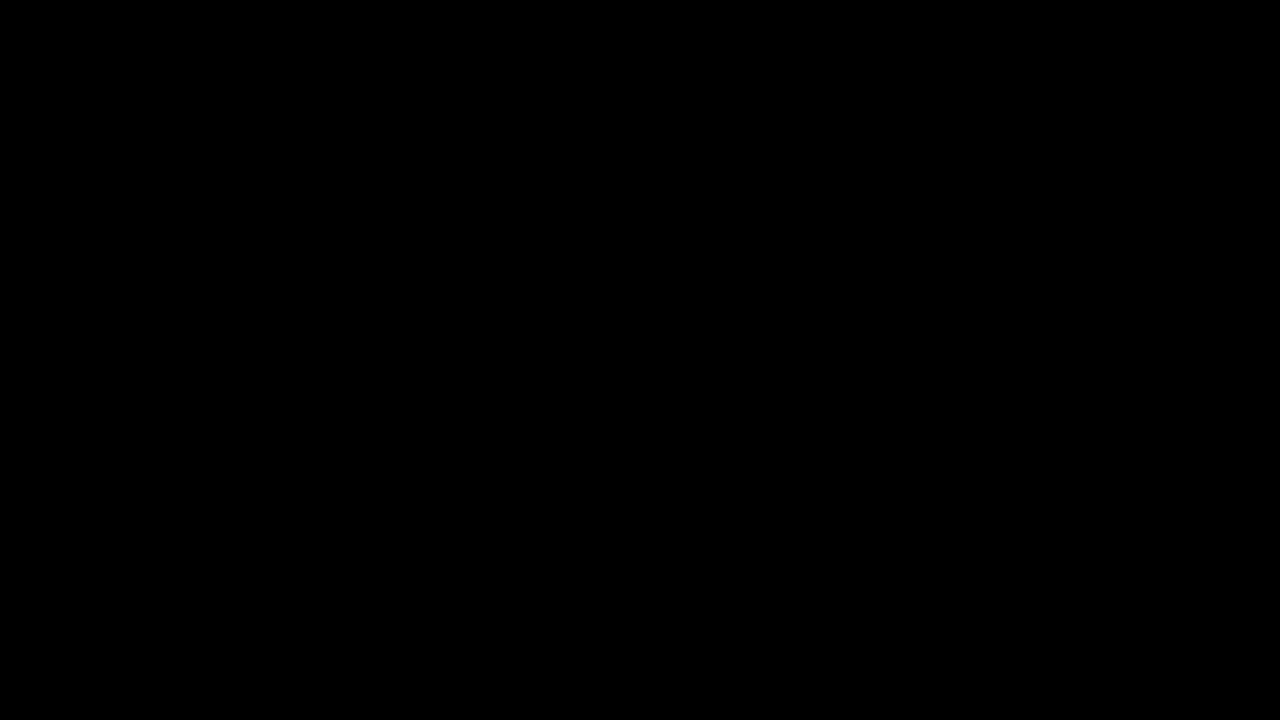

(720, 1280, 3)


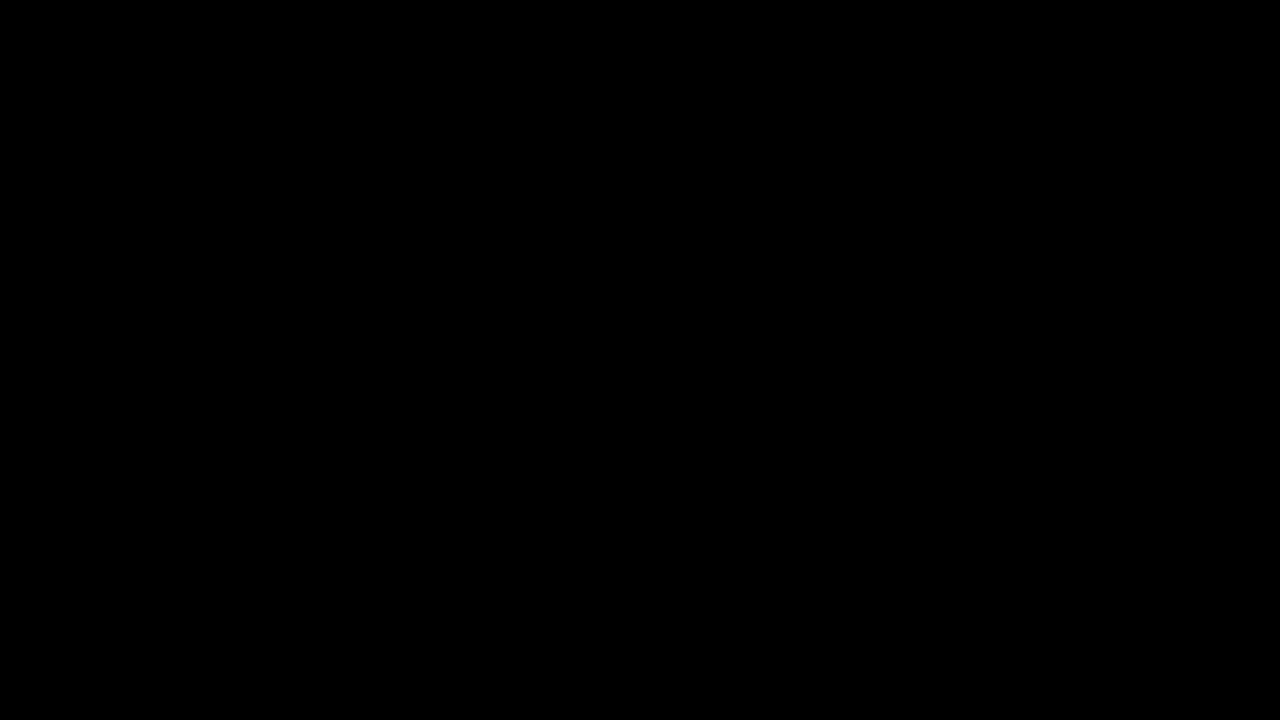

(720, 1280, 3)


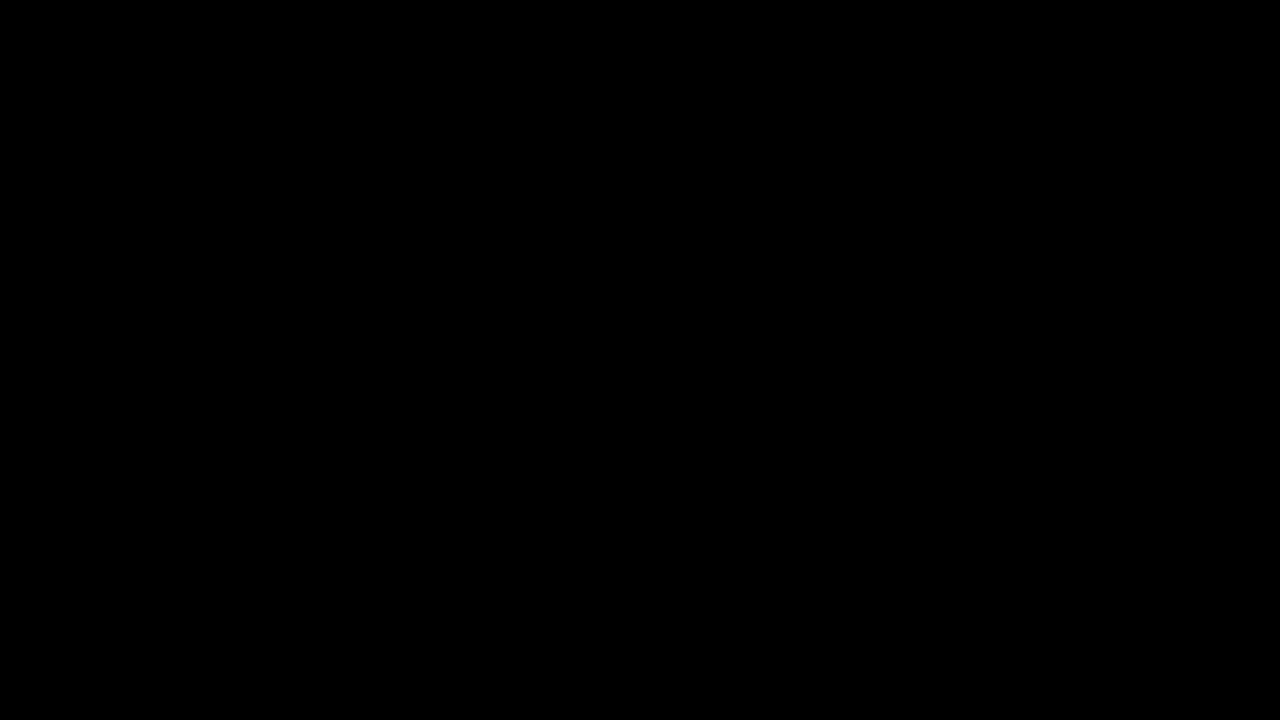

(720, 1280, 3)


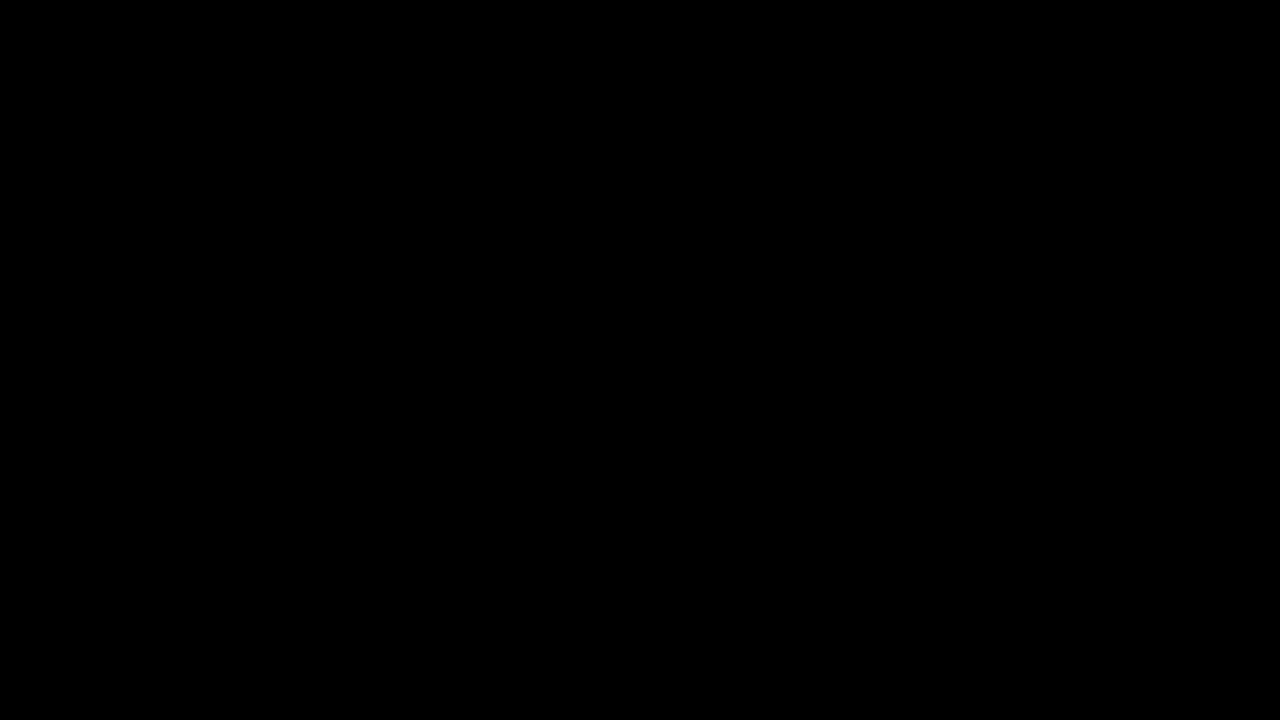

(720, 1280, 3)


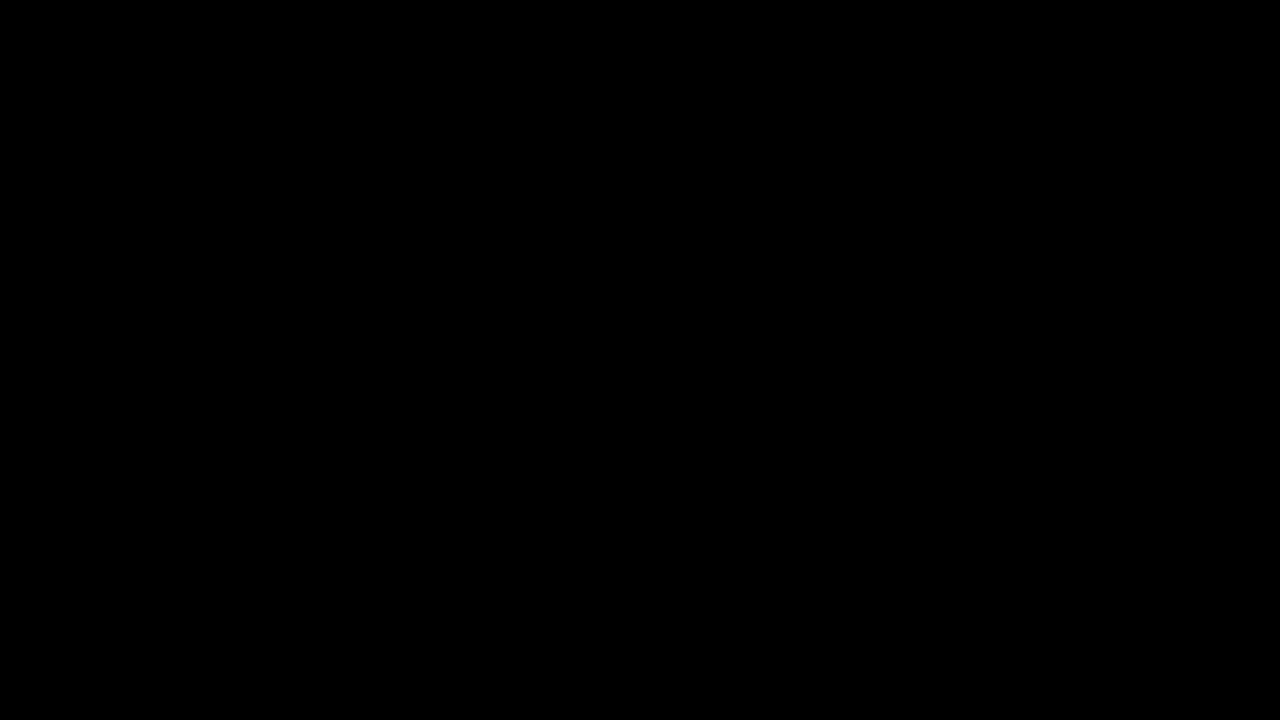

(720, 1280, 3)


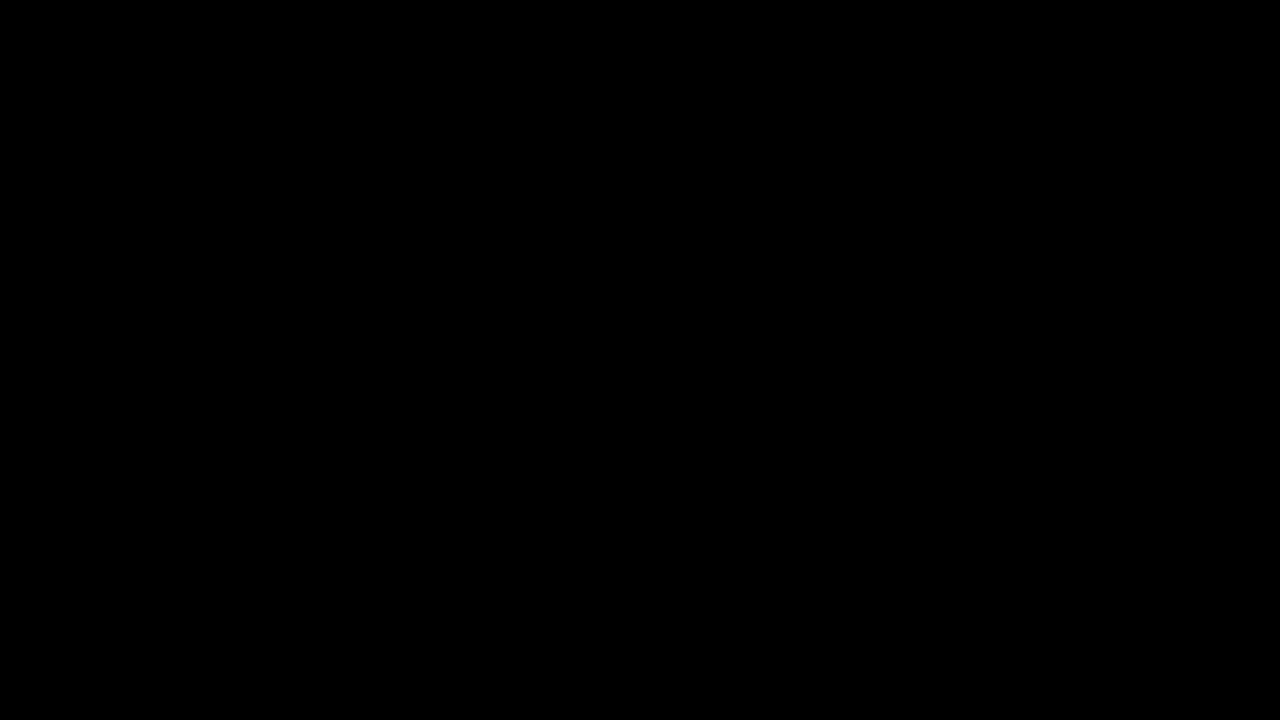

(720, 1280, 3)


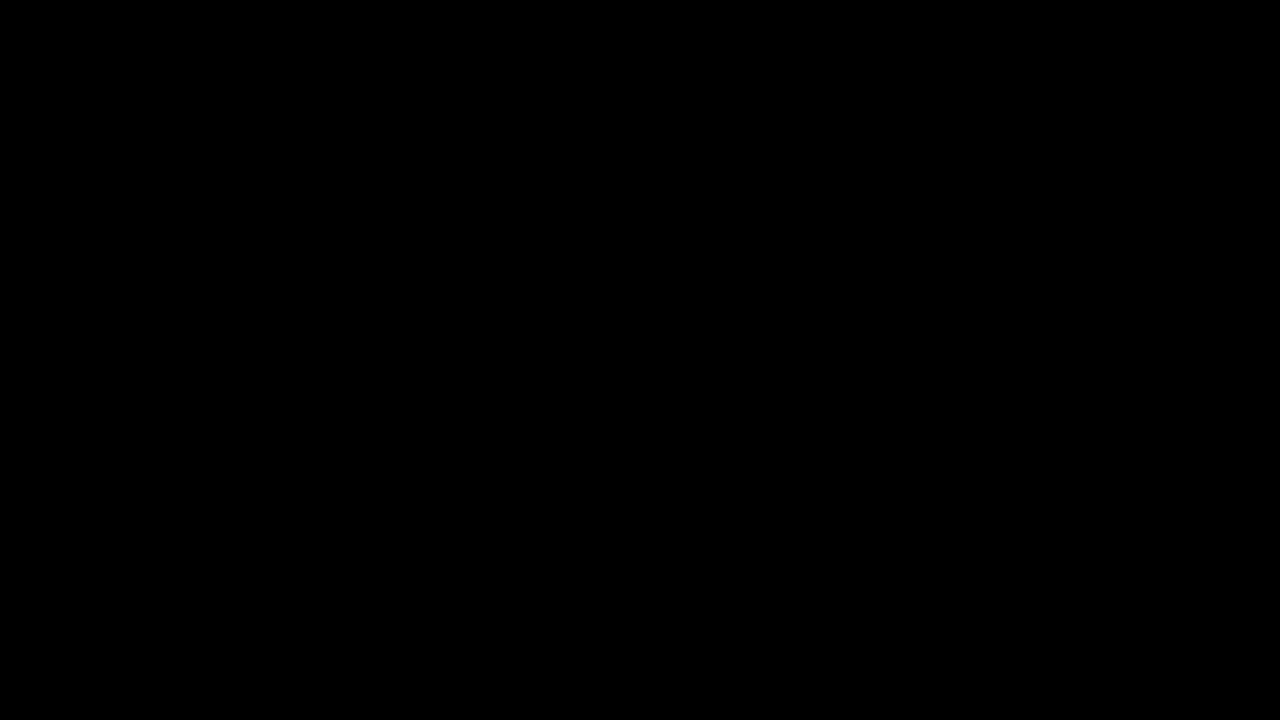

(720, 1280, 3)


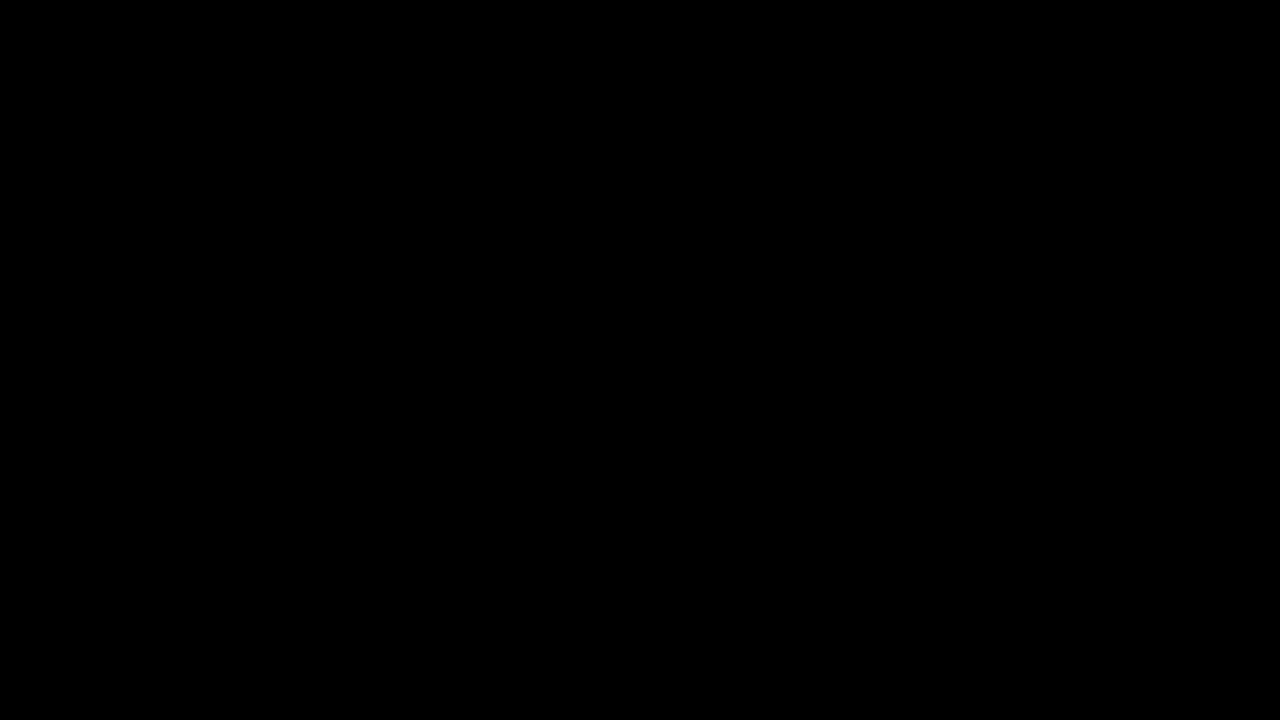

(720, 1280, 3)


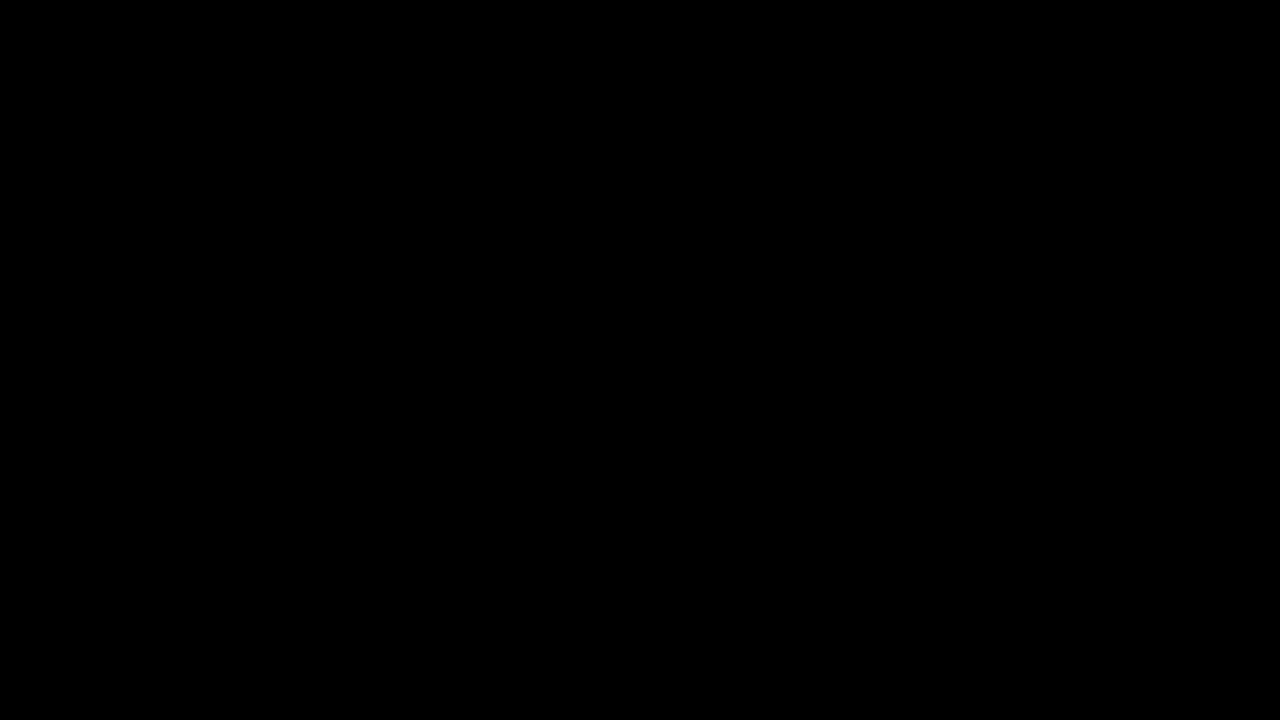

(720, 1280, 3)


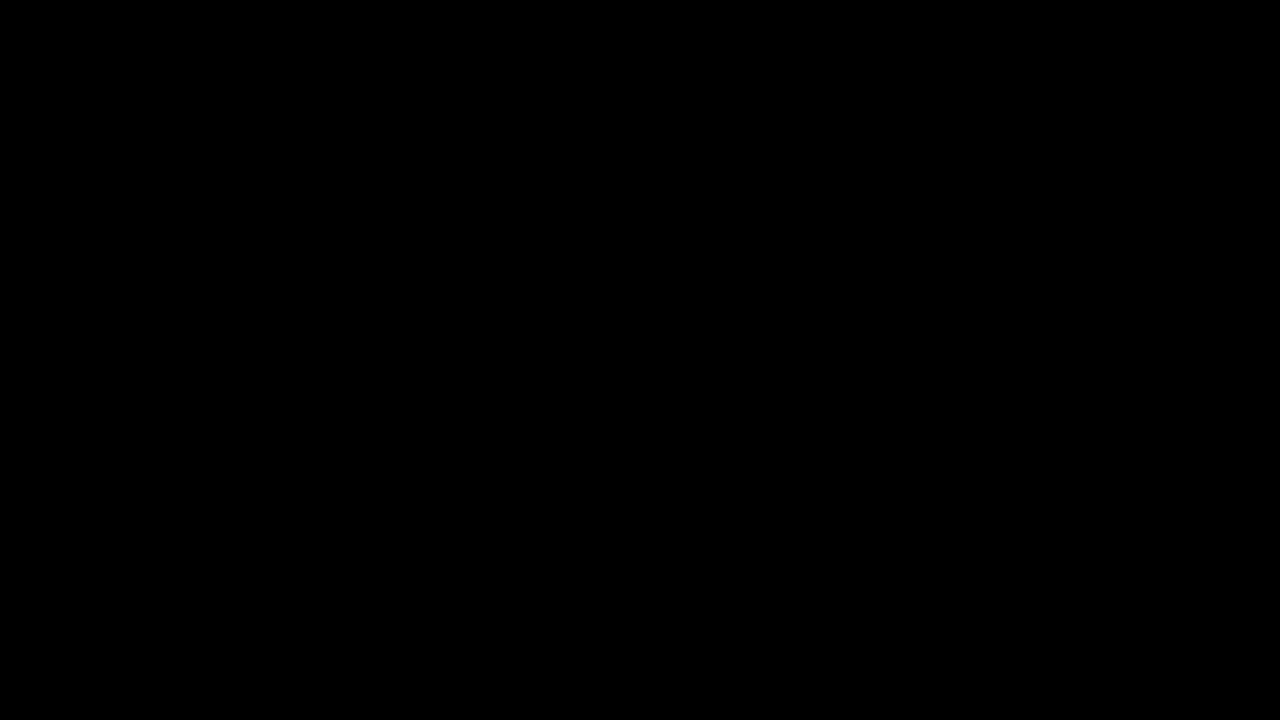

(720, 1280, 3)


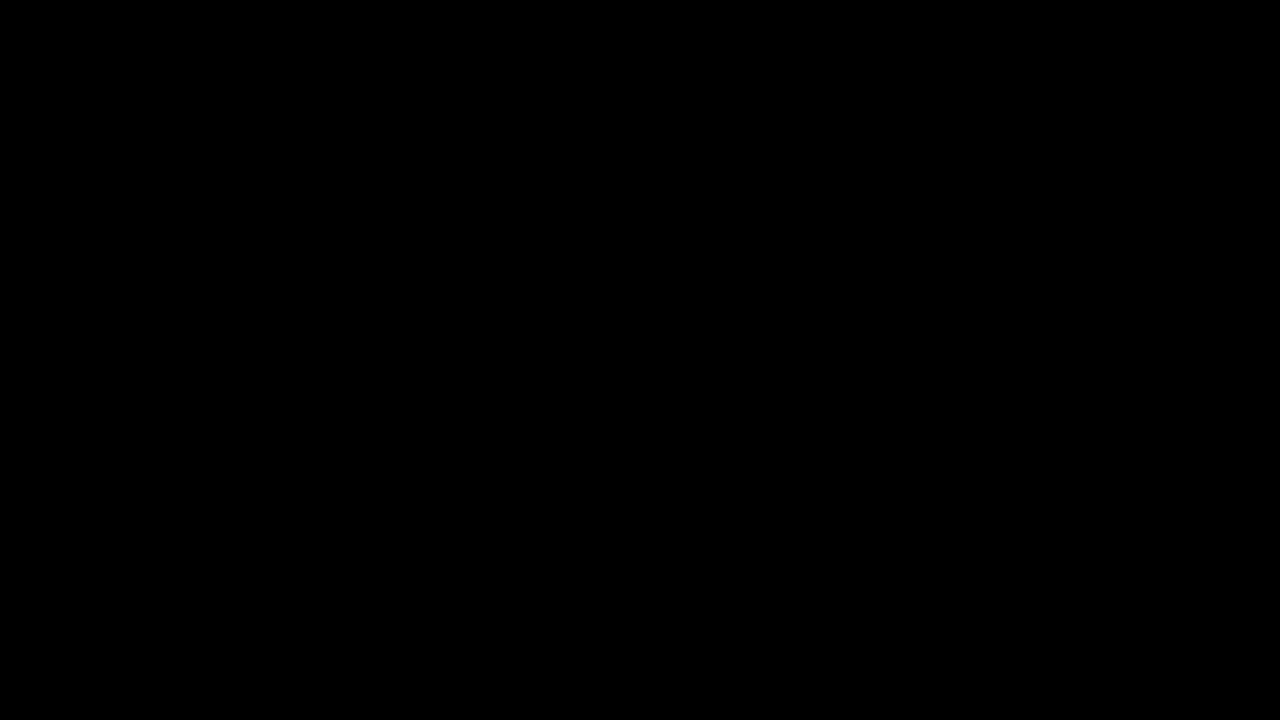

(720, 1280, 3)


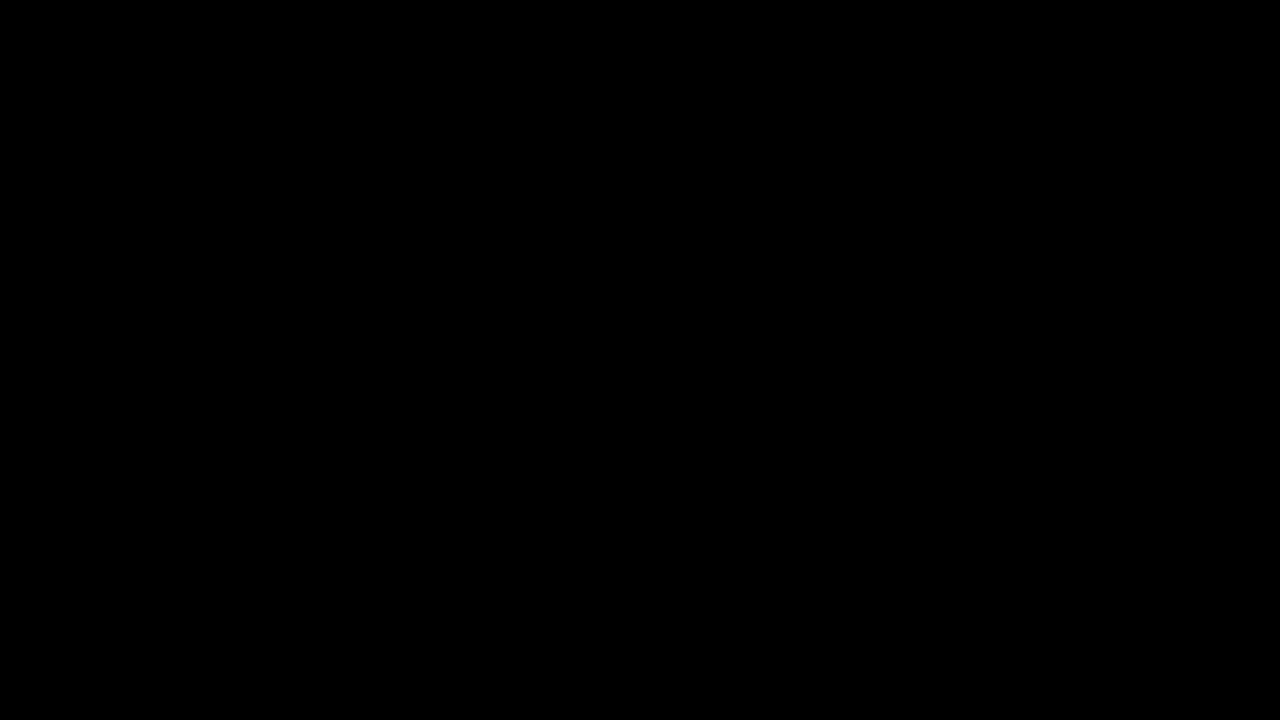

(720, 1280, 3)


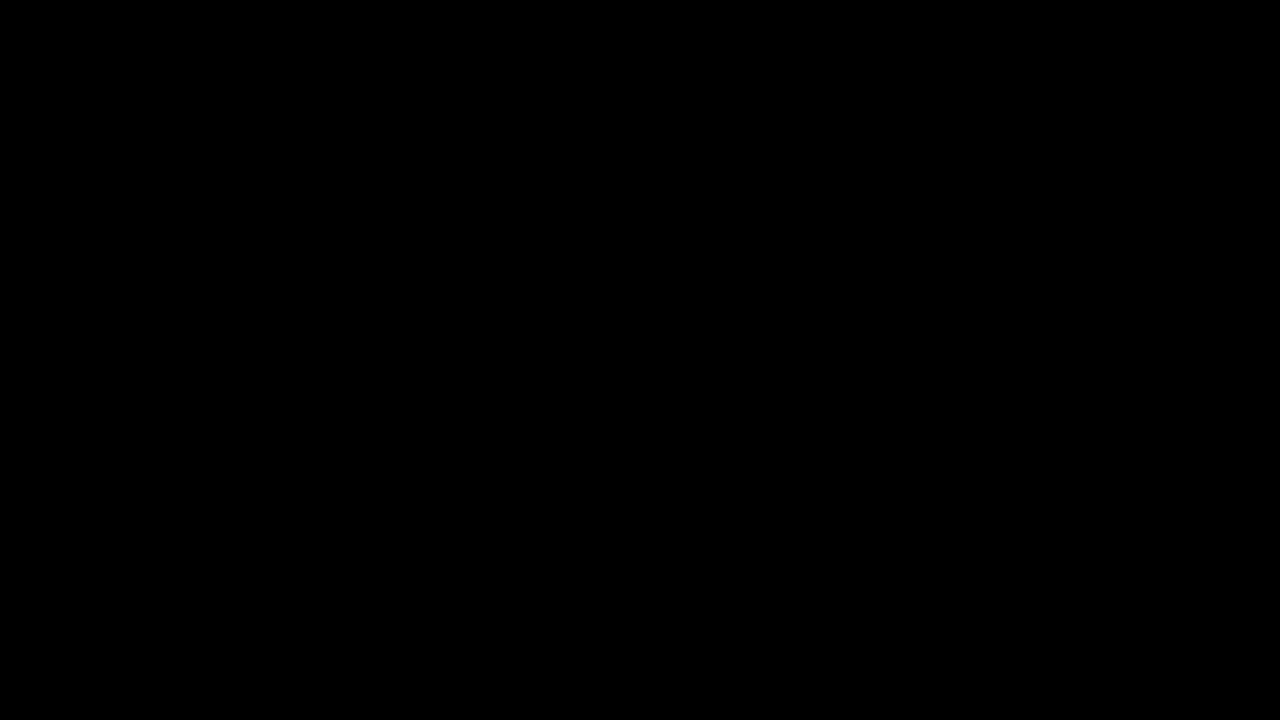

KeyboardInterrupt: ignored

In [ ]:
from skimage import img_as_ubyte
FPS= 20.0
FrameSize=(1280, 720)
fourcc = cv2.VideoWriter_fourcc(*'MJPG')

out = cv2.VideoWriter('Video_output.avi', fourcc, FPS, FrameSize,1)

for i in (colorized_frames):
  i = np.array(i)
  print(i.shape)
  #frame = (i - np.min(i))/(np.max(i) - np.min(i)) # this set the range from 0 till 1
  #frame = img_as_ubyte(i)
  out.write(np.uint8(i*255))
  cv2_imshow(i)
    
out.release()